# Forcasting with LSTM on NGA time serie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
path_1 = "../Data/test_st.csv"
path_2 = "../Data/extaction_missing_data.csv"

df = pd.read_csv(path_1)
#df2 = pd.read_csv(path_2) 

In [3]:
df

,value_created_at,measure_id,point_id,NGA,NGV,K,VCC_g,VC_g
0,2023-06-24 15:05:48,12870679,232710,0.10832,2.77359,1.891347,0.49635,0.41004
1,2023-06-24 15:22:51,12870678,232710,0.10783,3.13995,1.896530,0.48180,0.42522
2,2023-06-24 15:50:00,12870677,232710,0.10815,2.66659,1.887733,0.48101,0.40710
3,2023-06-24 15:55:00,12870676,232710,0.10708,2.65100,1.901864,0.48632,0.40771
4,2023-06-24 16:00:00,12870675,232710,0.10750,2.55173,1.898690,0.49191,0.42289
...,...,...,...,...,...,...,...,...
5699,2024-03-01 06:40:00,21130040,232710,0.54927,4.42352,4.068230,9.18245,4.87565
5700,2024-03-01 07:40:00,21132241,232710,0.52915,4.16160,4.259252,8.98788,5.14323
5701,2024-03-01 08:40:00,21134403,232710,0.55540,4.46625,4.059374,8.60813,4.33526
5702,2024-03-01 09:40:00,21136658,232710,0.50074,4.34932,4.110944,7.49714,3.75781


In [4]:
df.index = pd.to_datetime(df['value_created_at'])

In [5]:
df

,value_created_at,measure_id,point_id,NGA,NGV,K,VCC_g,VC_g
value_created_at,,,,,,,,
2023-06-24 15:05:48,2023-06-24 15:05:48,12870679,232710,0.10832,2.77359,1.891347,0.49635,0.41004
2023-06-24 15:22:51,2023-06-24 15:22:51,12870678,232710,0.10783,3.13995,1.896530,0.48180,0.42522
2023-06-24 15:50:00,2023-06-24 15:50:00,12870677,232710,0.10815,2.66659,1.887733,0.48101,0.40710
2023-06-24 15:55:00,2023-06-24 15:55:00,12870676,232710,0.10708,2.65100,1.901864,0.48632,0.40771
2023-06-24 16:00:00,2023-06-24 16:00:00,12870675,232710,0.10750,2.55173,1.898690,0.49191,0.42289
...,...,...,...,...,...,...,...,...
2024-03-01 06:40:00,2024-03-01 06:40:00,21130040,232710,0.54927,4.42352,4.068230,9.18245,4.87565
2024-03-01 07:40:00,2024-03-01 07:40:00,21132241,232710,0.52915,4.16160,4.259252,8.98788,5.14323
2024-03-01 08:40:00,2024-03-01 08:40:00,21134403,232710,0.55540,4.46625,4.059374,8.60813,4.33526


In [6]:
nga = df['NGA']

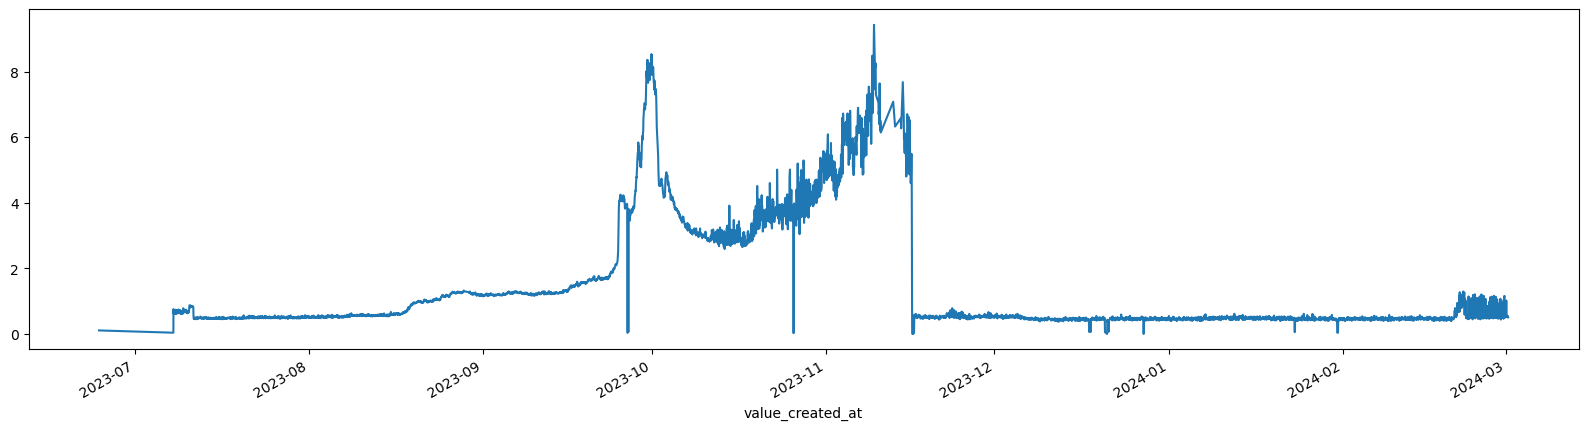

In [7]:
fig, ax = plt.subplots(figsize=(20, 5))
nga.plot();

In [8]:
nga.index

DatetimeIndex(['2023-06-24 15:05:48', '2023-06-24 15:22:51',
               '2023-06-24 15:50:00', '2023-06-24 15:55:00',
               '2023-06-24 16:00:00', '2023-06-24 16:05:00',
               '2023-06-24 16:10:00', '2023-06-24 16:20:00',
               '2023-06-24 16:30:00', '2023-07-07 20:37:52',
               ...
               '2024-03-01 01:40:00', '2024-03-01 02:40:00',
               '2024-03-01 03:40:00', '2024-03-01 04:40:00',
               '2024-03-01 05:40:00', '2024-03-01 06:40:00',
               '2024-03-01 07:40:00', '2024-03-01 08:40:00',
               '2024-03-01 09:40:00', '2024-03-01 10:40:00'],
              dtype='datetime64[ns]', name='value_created_at', length=5704, freq=None)

In [9]:
diff = np.diff(nga.index)/1e9
diff = diff.astype(np.int32)
diff

array([1023, 1629,  300, ..., 3600, 3600, 3600])

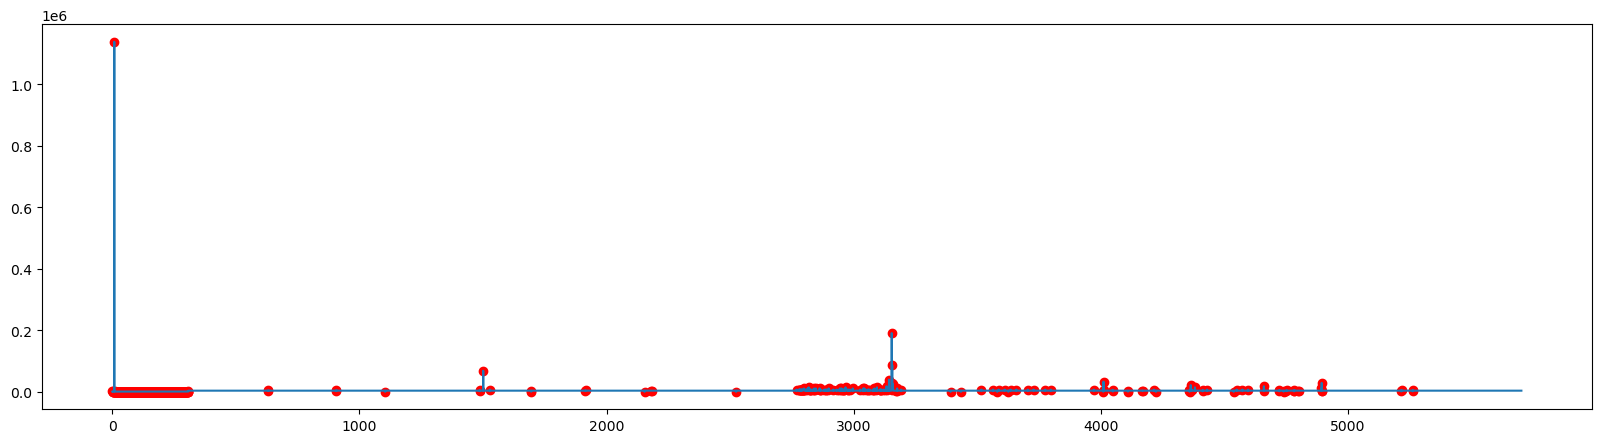

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(diff)
plt.scatter(x=np.where(diff!=3600), y=diff[diff!=3600], color='red')

<b>Remarks:</b>
- From the above plot we can see that not all points are 1-hour separated
- And inconsistencies are occuring everywhere
- Thus, we cannot have sufficient interval with 1-hour separated points
- A possible solution is make an interpolation with available points, then sample every 1 hour from the interpolation 

In [11]:
def df_to_X_y(df, window_size=5, delay=1):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size-delay+1):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size+delay-1]
    y.append(label)
  return np.array(X), np.array(y)

In [12]:
DELAY = 720

In [13]:
import optuna

from keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MAE
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import mean_absolute_error

def objective(trial):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    
    WINDOW_SIZE = trial.suggest_int("WINDOW_SIZE", 1, 400)
    X, y = df_to_X_y(nga, WINDOW_SIZE, DELAY)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

    model = Sequential()
    model.add(InputLayer((WINDOW_SIZE, 1)))
    model.add(LSTM(units=trial.suggest_int("units", 4, 128),
           dropout=trial.suggest_float("dropout", 0, 1),
           recurrent_dropout=trial.suggest_float("recurrent_dropout", 0, 1)))
    model.add(Dense(trial.suggest_int("dense1_units", 4, 128),
                    'relu'))
    model.add(Dense(1, 'linear'))

    # We compile our model with a sampled learning rate.
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    model.compile(
        loss=MeanSquaredError(),
        optimizer=Adam(learning_rate=learning_rate),
    )

    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

    # Evaluate the model accuracy on the validation set.
    val_predictions = model.predict(X_val).flatten()
    mae_val = mean_absolute_error(y_val, val_predictions)
    return mae_val


if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=1000)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

C:\Users\user\anaconda3\envs\islp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-08-20 16:27:33,185] A new study created in memory with name: no-name-c9cd8270-86ff-49e1-80a8-fddf69e73c3b



Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 2.6017 - val_loss: 0.8696
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.3204 - val_loss: 3.2771
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.1045 - val_loss: 4.0369
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.3324 - val_loss: 1.6881
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.1433 - val_loss: 2.1190
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.1717 - val_loss: 2.8191
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.2260 - val_loss: 1.2625
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.2175 - val_loss: 1.5496
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.1604 - val_loss: 0.9575
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.9816 - val_loss: 2.3351
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-20 16:27:59,074] Trial 0 finished with value: 1.3310631695438342 and parameters: {'WINDOW_SIZE': 41, 'units': 43, 'dropout': 0.16007646439329193, 'recurrent_dropout': 0.3487918487016387, 'dense1_units': 31, 'learning_rate': 0.01735600886488745}. Best is trial 0 with value: 1.3310631695438342.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - loss: 6.4514 - val_loss: 16.0753
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - loss: 6.2125 - val_loss: 14.7500
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 5.8273 - val_loss: 13.3486
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 5.5719 - val_loss: 11.9621
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - loss: 6.3890 - val_loss: 10.6885
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 5.0951 - val_loss: 9.3456
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - loss: 4.9690 - val_loss: 8.0536
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 4.8658 - val_loss: 6.9629
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - loss: 4.4642 - val_loss: 5.8903
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 4.1951 - val_loss: 4.9659
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step


[I 2024-08-20 16:29:34,101] Trial 1 finished with value: 2.116394560897093 and parameters: {'WINDOW_SIZE': 252, 'units': 57, 'dropout': 0.2969075084570444, 'recurrent_dropout': 0.8781354928477755, 'dense1_units': 6, 'learning_rate': 0.00010977594758736484}. Best is trial 0 with value: 1.3310631695438342.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 5.4636 - val_loss: 11.1420
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.3421 - val_loss: 10.6747
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.2890 - val_loss: 10.2459
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.7677 - val_loss: 9.8414
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.4041 - val_loss: 9.4487
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.3252 - val_loss: 9.0677
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.6845 - val_loss: 8.6883
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.4167 - val_loss: 8.3217
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.3312 - val_loss: 7.9973
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1768 - val_loss: 7.6356
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-20 16:29:53,158] Trial 2 finished with value: 2.7136544420081083 and parameters: {'WINDOW_SIZE': 34, 'units': 25, 'dropout': 0.4625228268888243, 'recurrent_dropout': 0.9950581630717601, 'dense1_units': 57, 'learning_rate': 3.424570608363457e-05}. Best is trial 0 with value: 1.3310631695438342.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - loss: 6.2122 - val_loss: 9.5541
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 4.8634 - val_loss: 4.7844
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 4.4513 - val_loss: 2.0416
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 3.9508 - val_loss: 1.3027
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 3.0029 - val_loss: 1.6157
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 2.9090 - val_loss: 1.9236
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 2.8948 - val_loss: 2.1543
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 2.7056 - val_loss: 2.2024
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.7069 - val_loss: 2.0686
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 2.3594 - val_loss: 1.9188
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step


[I 2024-08-20 16:31:16,288] Trial 3 finished with value: 1.2859175169857506 and parameters: {'WINDOW_SIZE': 155, 'units': 97, 'dropout': 0.672326330381855, 'recurrent_dropout': 0.532392583700885, 'dense1_units': 112, 'learning_rate': 6.433826156706157e-05}. Best is trial 3 with value: 1.2859175169857506.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 6.2395 - val_loss: 16.1951
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.6864 - val_loss: 15.4930
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.0012 - val_loss: 14.8165
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.1037 - val_loss: 14.2024
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.7862 - val_loss: 13.5571
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.2466 - val_loss: 12.8368
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.6216 - val_loss: 12.0427
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.4142 - val_loss: 11.1213
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.2918 - val_loss: 10.1508
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.7573 - val_loss: 9.0825
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-08-20 16:31:36,192] Trial 4 finished with value: 2.9333700092634567 and parameters: {'WINDOW_SIZE': 40, 'units': 34, 'dropout': 0.520891295602636, 'recurrent_dropout': 0.3168237040753247, 'dense1_units': 76, 'learning_rate': 2.4615397691591075e-05}. Best is trial 3 with value: 1.2859175169857506.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - loss: 10.7957 - val_loss: 5.7253
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - loss: 2.8544 - val_loss: 5.8868
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - loss: 2.8077 - val_loss: 5.9357
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - loss: 2.5242 - val_loss: 5.9391
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - loss: 2.8449 - val_loss: 5.4858
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - loss: 3.0083 - val_loss: 6.2419
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - loss: 2.5814 - val_loss: 5.4465
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - loss: 2.8150 - val_loss: 5.5741
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - loss: 2.5765 - val_loss: 5.3845
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - loss: 2.6176 - val_loss: 5.9497
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step


[I 2024-08-20 16:33:35,158] Trial 5 finished with value: 2.247882405387416 and parameters: {'WINDOW_SIZE': 219, 'units': 109, 'dropout': 0.6534311014832229, 'recurrent_dropout': 0.8285570951503841, 'dense1_units': 50, 'learning_rate': 0.09317111191326578}. Best is trial 3 with value: 1.2859175169857506.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 4.4351 - val_loss: 2.7886
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 2.5875 - val_loss: 2.0517
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.2495 - val_loss: 2.6862
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.0304 - val_loss: 3.0624
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.1103 - val_loss: 3.7093
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 1.9882 - val_loss: 3.1310
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 1.9885 - val_loss: 3.6032
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.1537 - val_loss: 3.0533
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 1.9667 - val_loss: 3.7027
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 1.8960 - val_loss: 3.5107
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


[I 2024-08-20 16:34:39,008] Trial 6 finished with value: 1.6296521898644156 and parameters: {'WINDOW_SIZE': 124, 'units': 92, 'dropout': 0.5746465791733334, 'recurrent_dropout': 0.4026410053880396, 'dense1_units': 118, 'learning_rate': 0.0007434988242580435}. Best is trial 3 with value: 1.2859175169857506.


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 209ms/step - loss: 5.7488 - val_loss: 11.3952
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 3.8665 - val_loss: 3.5080
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - loss: 2.6001 - val_loss: 2.4721
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 2.7594 - val_loss: 2.9535
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - loss: 2.8265 - val_loss: 2.8732
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - loss: 2.8069 - val_loss: 3.1550
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 2.7949 - val_loss: 3.4476
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - loss: 2.6357 - val_loss: 3.0762
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 2.2027 - val_loss: 2.7941
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - loss: 2.3953 - val_loss: 2.5864
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


[I 2024-08-20 16:36:20,188] Trial 7 finished with value: 1.2442483002383893 and parameters: {'WINDOW_SIZE': 370, 'units': 30, 'dropout': 0.5116261792519369, 'recurrent_dropout': 0.8852954865276822, 'dense1_units': 118, 'learning_rate': 0.00047561127345605584}. Best is trial 7 with value: 1.2442483002383893.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 4.0972 - val_loss: 1.1556
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2573 - val_loss: 1.7531
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9774 - val_loss: 3.9180
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.1384 - val_loss: 4.4125
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7173 - val_loss: 4.8038
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0547 - val_loss: 4.5972
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7818 - val_loss: 5.2643
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8065 - val_loss: 4.6680
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9146 - val_loss: 5.7664
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6312 - val_loss: 6.6045
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-20 16:36:31,149] Trial 8 finished with value: 2.3075976849333304 and parameters: {'WINDOW_SIZE': 7, 'units': 85, 'dropout': 0.5024801995260415, 'recurrent_dropout': 0.3785186418721901, 'dense1_units': 77, 'learning_rate': 0.0009912822651817704}. Best is trial 7 with value: 1.2442483002383893.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 24s 379ms/step - loss: 5.1900 - val_loss: 7.6201
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 371ms/step - loss: 2.4750 - val_loss: 9.4472
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 367ms/step - loss: 2.5632 - val_loss: 11.0273
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 363ms/step - loss: 2.4155 - val_loss: 10.5824
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 347ms/step - loss: 2.3767 - val_loss: 12.3997
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 366ms/step - loss: 2.4883 - val_loss: 13.1805
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 373ms/step - loss: 2.3515 - val_loss: 11.3280
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 371ms/step - loss: 2.5127 - val_loss: 14.0553
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 357ms/step - loss: 2.3579 - val_loss: 12.6561
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 349ms/step - loss: 2.3972 - val_loss: 11.3477
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step


[I 2024-08-20 16:39:55,624] Trial 9 finished with value: 3.072437270386452 and parameters: {'WINDOW_SIZE': 330, 'units': 125, 'dropout': 0.8765800824326977, 'recurrent_dropout': 0.40377252039544775, 'dense1_units': 109, 'learning_rate': 0.0007942900224383966}. Best is trial 7 with value: 1.2442483002383893.


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - loss: 5.7090 - val_loss: 7.5139
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - loss: 2.3740 - val_loss: 11.6645
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - loss: 2.4253 - val_loss: 13.0199
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 2.7004 - val_loss: 13.6254
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - loss: 2.5677 - val_loss: 15.8903
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 2.8008 - val_loss: 18.7064
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - loss: 2.7042 - val_loss: 23.1134
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 2.5036 - val_loss: 23.1526
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - loss: 2.7863 - val_loss: 30.1368
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 2.8393 - val_loss: 25.0999
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step


[I 2024-08-20 16:41:35,453] Trial 10 finished with value: 4.83633454440148 and parameters: {'WINDOW_SIZE': 400, 'units': 5, 'dropout': 0.9785872510392857, 'recurrent_dropout': 0.0045124737707714635, 'dense1_units': 95, 'learning_rate': 0.006604806072920944}. Best is trial 7 with value: 1.2442483002383893.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 5.4963 - val_loss: 6.6050
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 5.5961 - val_loss: 2.4847
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 4.0345 - val_loss: 1.2882
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 4.0266 - val_loss: 1.7634
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 3.1593 - val_loss: 1.8255
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.9087 - val_loss: 2.0516
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.6029 - val_loss: 2.0695
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 2.6303 - val_loss: 2.2054
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.7982 - val_loss: 2.2073
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.7215 - val_loss: 2.1714
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


[I 2024-08-20 16:42:40,411] Trial 11 finished with value: 1.393697222168091 and parameters: {'WINDOW_SIZE': 135, 'units': 77, 'dropout': 0.747807495684278, 'recurrent_dropout': 0.6686923628657476, 'dense1_units': 128, 'learning_rate': 0.0001261967354537391}. Best is trial 7 with value: 1.2442483002383893.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 221ms/step - loss: 6.3762 - val_loss: 6.9478
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - loss: 3.3591 - val_loss: 1.5630
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - loss: 2.4941 - val_loss: 1.2654
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - loss: 2.5506 - val_loss: 1.1160
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - loss: 2.4538 - val_loss: 0.8033
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - loss: 2.4003 - val_loss: 0.8291
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 2.3027 - val_loss: 0.6825
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - loss: 2.5874 - val_loss: 0.6568
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - loss: 2.7998 - val_loss: 0.6611
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - loss: 2.3314 - val_loss: 0.6841
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step


[I 2024-08-20 16:44:29,404] Trial 12 finished with value: 0.6448137231758082 and parameters: {'WINDOW_SIZE': 296, 'units': 62, 'dropout': 0.2770031316263131, 'recurrent_dropout': 0.6241370180943286, 'dense1_units': 96, 'learning_rate': 0.00019684385449001663}. Best is trial 12 with value: 0.6448137231758082.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - loss: 5.8964 - val_loss: 6.0412
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 2.8411 - val_loss: 0.8958
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - loss: 2.1193 - val_loss: 0.7439
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 2.0433 - val_loss: 1.1740
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 2.0068 - val_loss: 1.7786
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - loss: 1.8345 - val_loss: 2.9743
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 1.5068 - val_loss: 4.5179
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - loss: 1.4640 - val_loss: 6.1717
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - loss: 1.5938 - val_loss: 6.8860
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 1.6652 - val_loss: 7.6070
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step


[I 2024-08-20 16:46:19,410] Trial 13 finished with value: 2.328903537659996 and parameters: {'WINDOW_SIZE': 309, 'units': 58, 'dropout': 0.05064006376700264, 'recurrent_dropout': 0.7073744346537979, 'dense1_units': 93, 'learning_rate': 0.00027346352717564655}. Best is trial 12 with value: 0.6448137231758082.


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - loss: 7.6559 - val_loss: 26.7421
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 7.3473 - val_loss: 26.5018
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 7.4554 - val_loss: 26.2511
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - loss: 7.4083 - val_loss: 26.0075
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - loss: 8.0505 - val_loss: 25.7669
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - loss: 7.2475 - val_loss: 25.5333
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - loss: 7.6374 - val_loss: 25.2977
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - loss: 7.3745 - val_loss: 25.0594
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - loss: 7.5369 - val_loss: 24.8325
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - loss: 7.0571 - val_loss: 24.6064
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step


[I 2024-08-20 16:48:05,025] Trial 14 finished with value: 4.804730227125713 and parameters: {'WINDOW_SIZE': 399, 'units': 19, 'dropout': 0.32841876668481884, 'recurrent_dropout': 0.6287622829639496, 'dense1_units': 97, 'learning_rate': 1.0151176594103005e-05}. Best is trial 12 with value: 0.6448137231758082.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - loss: 4.3179 - val_loss: 1.7902
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - loss: 2.3476 - val_loss: 1.6531
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 2.3719 - val_loss: 1.2785
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - loss: 2.1991 - val_loss: 1.2555
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - loss: 2.6416 - val_loss: 1.1507
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 2.1804 - val_loss: 1.5942
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - loss: 2.2094 - val_loss: 1.8986
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 2.2650 - val_loss: 1.1173
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - loss: 1.8673 - val_loss: 1.8748
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - loss: 2.1680 - val_loss: 0.9707
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step


[I 2024-08-20 16:49:55,766] Trial 15 finished with value: 0.7510704032011488 and parameters: {'WINDOW_SIZE': 322, 'units': 50, 'dropout': 0.3367847960173444, 'recurrent_dropout': 0.827582811486357, 'dense1_units': 79, 'learning_rate': 0.004291583579093595}. Best is trial 12 with value: 0.6448137231758082.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - loss: 3.6261 - val_loss: 0.8821
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - loss: 2.3174 - val_loss: 1.2091
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - loss: 2.2600 - val_loss: 1.0159
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - loss: 2.1293 - val_loss: 1.9927
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - loss: 1.7763 - val_loss: 4.3880
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - loss: 1.6754 - val_loss: 4.0608
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - loss: 1.8589 - val_loss: 2.9558
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 1.5499 - val_loss: 6.3406
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - loss: 1.7179 - val_loss: 5.6096
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - loss: 1.7498 - val_loss: 4.7868
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


[I 2024-08-20 16:51:50,207] Trial 16 finished with value: 1.748448756250332 and parameters: {'WINDOW_SIZE': 293, 'units': 65, 'dropout': 0.30830513926413616, 'recurrent_dropout': 0.7720198432226821, 'dense1_units': 74, 'learning_rate': 0.004080957427733138}. Best is trial 12 with value: 0.6448137231758082.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 155ms/step - loss: 3.2821 - val_loss: 0.8316
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 2.2240 - val_loss: 1.8656
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 1.6813 - val_loss: 1.7214
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 1.8582 - val_loss: 3.0976
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 1.5700 - val_loss: 5.4873
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 1.4496 - val_loss: 3.2857
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 1.4060 - val_loss: 3.7133
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 1.6120 - val_loss: 3.3691
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - loss: 1.3778 - val_loss: 2.7419
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 1.4032 - val_loss: 2.0642
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step


[I 2024-08-20 16:53:16,432] Trial 17 finished with value: 1.189880465726785 and parameters: {'WINDOW_SIZE': 264, 'units': 45, 'dropout': 0.18492324352320333, 'recurrent_dropout': 0.5662449743984643, 'dense1_units': 39, 'learning_rate': 0.0032806055209065334}. Best is trial 12 with value: 0.6448137231758082.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 222ms/step - loss: 3.2127 - val_loss: 1.4351
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - loss: 1.3731 - val_loss: 1.2096
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step - loss: 1.1551 - val_loss: 1.1284
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - loss: 1.6001 - val_loss: 1.3932
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - loss: 1.6512 - val_loss: 2.9343
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - loss: 2.0705 - val_loss: 1.8079
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 230ms/step - loss: 1.4706 - val_loss: 13.5199
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - loss: 2.5927 - val_loss: 1.2128
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - loss: 2.3984 - val_loss: 1.5155
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - loss: 1.9465 - val_loss: 2.0601
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step


[I 2024-08-20 16:55:22,930] Trial 18 finished with value: 1.117433561116403 and parameters: {'WINDOW_SIZE': 333, 'units': 68, 'dropout': 0.006037485933178044, 'recurrent_dropout': 0.16323774993165663, 'dense1_units': 88, 'learning_rate': 0.023396251207134407}. Best is trial 12 with value: 0.6448137231758082.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 4.8101 - val_loss: 0.5181
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.5111 - val_loss: 0.7167
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 2.3906 - val_loss: 1.0819
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 2.3945 - val_loss: 1.3356
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.4381 - val_loss: 0.7836
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 2.7478 - val_loss: 1.6857
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.3681 - val_loss: 0.8049
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.4764 - val_loss: 0.7851
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 2.4727 - val_loss: 0.9831
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.5116 - val_loss: 0.5368
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


[I 2024-08-20 16:56:28,299] Trial 19 finished with value: 0.5589926684556183 and parameters: {'WINDOW_SIZE': 191, 'units': 48, 'dropout': 0.3934521919297679, 'recurrent_dropout': 0.9430892225046769, 'dense1_units': 65, 'learning_rate': 0.001986822045190651}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - loss: 4.8695 - val_loss: 15.6323
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 6.2557 - val_loss: 14.7085
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 5.5180 - val_loss: 13.8924
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 5.3100 - val_loss: 13.1412
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 5.0802 - val_loss: 12.4387
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 4.7658 - val_loss: 11.8007
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - loss: 4.2524 - val_loss: 11.1991
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 3.8431 - val_loss: 10.6468
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 3.8158 - val_loss: 10.1338
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 3.6095 - val_loss: 9.6457
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 16:57:44,535] Trial 20 finished with value: 2.9688733180423155 and parameters: {'WINDOW_SIZE': 168, 'units': 75, 'dropout': 0.17497013194843614, 'recurrent_dropout': 0.9748618895001888, 'dense1_units': 30, 'learning_rate': 0.0020485726819239915}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - loss: 3.6905 - val_loss: 1.6830
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.4510 - val_loss: 0.5320
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 2.3390 - val_loss: 0.8610
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 1.8589 - val_loss: 1.3310
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 2.5007 - val_loss: 0.8444
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 2.3704 - val_loss: 0.5719
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.5973 - val_loss: 0.6139
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 2.6670 - val_loss: 4.5300
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.8649 - val_loss: 1.8191
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.8060 - val_loss: 11.7200
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step


[I 2024-08-20 16:58:55,026] Trial 21 finished with value: 3.2883893826722437 and parameters: {'WINDOW_SIZE': 207, 'units': 48, 'dropout': 0.3978920576920054, 'recurrent_dropout': 0.7539040281829698, 'dense1_units': 63, 'learning_rate': 0.010685294340098796}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - loss: 4.0712 - val_loss: 0.6137
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 2.3471 - val_loss: 0.7134
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 2.2303 - val_loss: 0.7542
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 2.4503 - val_loss: 0.9289
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - loss: 2.3774 - val_loss: 0.8138
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 2.4738 - val_loss: 0.8293
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - loss: 2.4880 - val_loss: 0.8511
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 2.6365 - val_loss: 0.8273
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - loss: 2.3949 - val_loss: 0.8670
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 2.3941 - val_loss: 1.1084
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


[I 2024-08-20 17:00:25,977] Trial 22 finished with value: 0.7955544258964788 and parameters: {'WINDOW_SIZE': 255, 'units': 53, 'dropout': 0.38159098036471306, 'recurrent_dropout': 0.8735532992190187, 'dense1_units': 83, 'learning_rate': 0.0018687362615210374}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 174ms/step - loss: 6.8039 - val_loss: 12.7410
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - loss: 3.3174 - val_loss: 2.7190
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 2.7221 - val_loss: 2.5403
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - loss: 2.5477 - val_loss: 1.9389
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - loss: 2.5039 - val_loss: 1.6752
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - loss: 2.3811 - val_loss: 1.3766
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 2.3183 - val_loss: 1.2417
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - loss: 2.2381 - val_loss: 1.1270
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 2.1052 - val_loss: 1.1119
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 1.9810 - val_loss: 1.1065
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step


[I 2024-08-20 17:02:12,294] Trial 23 finished with value: 0.7939235448163076 and parameters: {'WINDOW_SIZE': 351, 'units': 41, 'dropout': 0.28417670339686724, 'recurrent_dropout': 0.6106128423320716, 'dense1_units': 66, 'learning_rate': 0.0002915985788509304}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 206ms/step - loss: 4.2569 - val_loss: 0.6906
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - loss: 2.6975 - val_loss: 0.8099
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - loss: 2.3060 - val_loss: 0.8415
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - loss: 2.5756 - val_loss: 0.8774
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - loss: 2.4286 - val_loss: 0.7698
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 2.2830 - val_loss: 0.7132
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - loss: 2.4712 - val_loss: 0.7150
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 2.1392 - val_loss: 0.9476
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - loss: 2.2283 - val_loss: 1.1899
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - loss: 2.2658 - val_loss: 0.8568
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step


[I 2024-08-20 17:04:05,510] Trial 24 finished with value: 0.7080358631942064 and parameters: {'WINDOW_SIZE': 285, 'units': 65, 'dropout': 0.23594725604115513, 'recurrent_dropout': 0.9338547413668139, 'dense1_units': 104, 'learning_rate': 0.001954255764615856}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - loss: 6.0175 - val_loss: 8.8314
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.9454 - val_loss: 4.3876
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.1007 - val_loss: 1.5049
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 2.9555 - val_loss: 0.5841
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.9579 - val_loss: 0.4643
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.9189 - val_loss: 0.4968
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.5924 - val_loss: 0.5873
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.4358 - val_loss: 0.6799
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 2.4385 - val_loss: 0.6879
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.3857 - val_loss: 0.7082
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2024-08-20 17:04:45,211] Trial 25 finished with value: 0.6021284441465694 and parameters: {'WINDOW_SIZE': 93, 'units': 65, 'dropout': 0.22313521763431723, 'recurrent_dropout': 0.93811942518383, 'dense1_units': 106, 'learning_rate': 0.0002388603168176378}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 5.7058 - val_loss: 9.4896
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 4.6000 - val_loss: 3.2595
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.7957 - val_loss: 0.7625
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.6884 - val_loss: 0.5482
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.2022 - val_loss: 0.3210
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.3781 - val_loss: 0.2327
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.2669 - val_loss: 0.2458
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.2324 - val_loss: 0.3194
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.0434 - val_loss: 0.4400
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.9318 - val_loss: 0.6166
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


[I 2024-08-20 17:05:29,000] Trial 26 finished with value: 0.5658434911505598 and parameters: {'WINDOW_SIZE': 87, 'units': 76, 'dropout': 0.10766609874218436, 'recurrent_dropout': 0.752598763677091, 'dense1_units': 52, 'learning_rate': 0.00018645579945372477}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 5.3699 - val_loss: 0.7723
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.7433 - val_loss: 0.3162
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.2809 - val_loss: 0.3476
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.2187 - val_loss: 0.6408
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.1548 - val_loss: 1.1569
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 1.9775 - val_loss: 1.7273
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.3059 - val_loss: 1.9156
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.7565 - val_loss: 2.9532
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.9635 - val_loss: 3.8190
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 1.9221 - val_loss: 4.4943
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-20 17:06:16,121] Trial 27 finished with value: 1.5179302162691144 and parameters: {'WINDOW_SIZE': 89, 'units': 78, 'dropout': 0.1312078813147775, 'recurrent_dropout': 0.7618760337365784, 'dense1_units': 50, 'learning_rate': 0.00043756338622745526}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 6.3937 - val_loss: 14.6118
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.9709 - val_loss: 14.0517
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 5.4337 - val_loss: 13.4664
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 5.5051 - val_loss: 12.8718
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 5.3341 - val_loss: 12.3378
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 5.0859 - val_loss: 11.8421
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 5.3689 - val_loss: 11.3536
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 5.1150 - val_loss: 10.8686
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.9001 - val_loss: 10.3802
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 4.7727 - val_loss: 9.8740
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


[I 2024-08-20 17:07:07,492] Trial 28 finished with value: 3.081956608679094 and parameters: {'WINDOW_SIZE': 88, 'units': 100, 'dropout': 0.10741756975798858, 'recurrent_dropout': 0.9325817712972406, 'dense1_units': 17, 'learning_rate': 6.292888429030556e-05}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 3.3755 - val_loss: 3.4066
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.8764 - val_loss: 4.2368
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.8637 - val_loss: 1.2756
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.8067 - val_loss: 4.4720
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.7215 - val_loss: 4.1604
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.6613 - val_loss: 3.9731
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.5470 - val_loss: 4.0362
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.8849 - val_loss: 4.2344
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.5165 - val_loss: 4.0199
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.4945 - val_loss: 3.9878
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


[I 2024-08-20 17:07:56,104] Trial 29 finished with value: 1.840665507814663 and parameters: {'WINDOW_SIZE': 89, 'units': 85, 'dropout': 0.10674108857383789, 'recurrent_dropout': 0.8157410754933309, 'dense1_units': 37, 'learning_rate': 0.026971140880899195}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - loss: 5.8442 - val_loss: 6.7781
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - loss: 3.8345 - val_loss: 1.0875
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 2.7918 - val_loss: 0.3786
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 2.6496 - val_loss: 0.3928
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 2.3279 - val_loss: 0.4325
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.4596 - val_loss: 0.5437
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - loss: 2.4343 - val_loss: 0.7079
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.3128 - val_loss: 0.7881
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - loss: 2.1636 - val_loss: 1.0340
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.4302 - val_loss: 1.1359
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


[I 2024-08-20 17:09:14,257] Trial 30 finished with value: 0.774660875693623 and parameters: {'WINDOW_SIZE': 180, 'units': 71, 'dropout': 0.2130031489141704, 'recurrent_dropout': 0.7176531705578976, 'dense1_units': 52, 'learning_rate': 0.0001676274340945191}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 5.5083 - val_loss: 4.3426
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 3.2614 - val_loss: 1.2915
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.7141 - val_loss: 1.4193
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.6387 - val_loss: 1.2624
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.8469 - val_loss: 1.0429
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.7096 - val_loss: 1.1059
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.4099 - val_loss: 0.6740
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.1492 - val_loss: 0.5422
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.1142 - val_loss: 0.4020
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.4118 - val_loss: 0.4910
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2024-08-20 17:10:03,782] Trial 31 finished with value: 0.5767872393180135 and parameters: {'WINDOW_SIZE': 114, 'units': 60, 'dropout': 0.4037536163840446, 'recurrent_dropout': 0.5076589511281784, 'dense1_units': 103, 'learning_rate': 0.00018945358386446024}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 5.8302 - val_loss: 10.3038
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.9205 - val_loss: 7.0667
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 4.0917 - val_loss: 3.5237
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.5358 - val_loss: 1.6152
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.6886 - val_loss: 1.3711
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.8536 - val_loss: 1.3653
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.7560 - val_loss: 1.2636
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.7000 - val_loss: 1.0949
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.7944 - val_loss: 1.1455
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.7708 - val_loss: 1.0354
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-20 17:10:47,232] Trial 32 finished with value: 0.9146637132935753 and parameters: {'WINDOW_SIZE': 115, 'units': 39, 'dropout': 0.40935732842535455, 'recurrent_dropout': 0.4758897301269776, 'dense1_units': 65, 'learning_rate': 8.310726231711523e-05}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 5.7621 - val_loss: 12.5817
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.8396 - val_loss: 11.7672
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.4518 - val_loss: 10.9616
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.2455 - val_loss: 10.2174
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 5.2081 - val_loss: 9.5174
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 5.1584 - val_loss: 8.8402
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.9428 - val_loss: 8.2054
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 4.7830 - val_loss: 7.5920
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.5875 - val_loss: 7.0062
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 4.3144 - val_loss: 6.4425
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-20 17:11:20,982] Trial 33 finished with value: 2.484329879559459 and parameters: {'WINDOW_SIZE': 68, 'units': 57, 'dropout': 0.23957993082840037, 'recurrent_dropout': 0.9107460378290813, 'dense1_units': 40, 'learning_rate': 3.421921892503766e-05}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - loss: 5.0701 - val_loss: 2.3269
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.6433 - val_loss: 0.9842
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 2.1302 - val_loss: 2.0859
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.0183 - val_loss: 1.6017
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 1.8733 - val_loss: 1.4669
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 1.7699 - val_loss: 1.6772
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 1.9639 - val_loss: 1.4502
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 1.7595 - val_loss: 2.7954
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 1.8243 - val_loss: 0.6117
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 1.8191 - val_loss: 1.9323
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step


[I 2024-08-20 17:12:32,799] Trial 34 finished with value: 1.214006441292544 and parameters: {'WINDOW_SIZE': 144, 'units': 83, 'dropout': 0.4410451510440528, 'recurrent_dropout': 0.2609488426529676, 'dense1_units': 60, 'learning_rate': 0.0004925085235074976}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 4.5041 - val_loss: 5.4340
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 3.3285 - val_loss: 0.9402
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.1293 - val_loss: 0.6029
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 1.9304 - val_loss: 1.0997
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 1.8977 - val_loss: 1.3903
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 1.9404 - val_loss: 1.4800
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.1069 - val_loss: 1.5266
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.0471 - val_loss: 1.7038
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.8096 - val_loss: 1.9311
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.9953 - val_loss: 1.9770
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 17:12:59,830] Trial 35 finished with value: 0.9284245775337905 and parameters: {'WINDOW_SIZE': 53, 'units': 54, 'dropout': 0.07537247751908038, 'recurrent_dropout': 0.9880941122114067, 'dense1_units': 128, 'learning_rate': 0.00028569226210546563}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 5.5682 - val_loss: 10.4929
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.1768 - val_loss: 9.9848
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1159 - val_loss: 9.3675
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.9490 - val_loss: 8.6516
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.7796 - val_loss: 7.7993
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.6012 - val_loss: 6.8094
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8747 - val_loss: 5.8016
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8883 - val_loss: 4.7566
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1755 - val_loss: 3.7321
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2595 - val_loss: 2.9066
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-20 17:13:12,165] Trial 36 finished with value: 1.6451024507726089 and parameters: {'WINDOW_SIZE': 10, 'units': 25, 'dropout': 0.3806526381292632, 'recurrent_dropout': 0.4946343376263756, 'dense1_units': 19, 'learning_rate': 5.5308037822961505e-05}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - loss: 5.5867 - val_loss: 12.1678
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - loss: 5.1704 - val_loss: 8.0864
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - loss: 4.6212 - val_loss: 4.8977
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - loss: 3.5872 - val_loss: 2.4192
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 3.3330 - val_loss: 1.2517
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - loss: 3.1699 - val_loss: 0.8186
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - loss: 3.4396 - val_loss: 0.7463
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 3.0274 - val_loss: 0.7644
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - loss: 3.3020 - val_loss: 0.8252
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - loss: 3.4279 - val_loss: 0.8384
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step


[I 2024-08-20 17:15:06,313] Trial 37 finished with value: 0.7316722458913666 and parameters: {'WINDOW_SIZE': 224, 'units': 92, 'dropout': 0.4575056618564514, 'recurrent_dropout': 0.8581105123737942, 'dense1_units': 71, 'learning_rate': 0.00011003906428262089}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 195ms/step - loss: 5.0217 - val_loss: 1.6167
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - loss: 2.8237 - val_loss: 1.6367
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - loss: 2.9664 - val_loss: 1.8444
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 2.4098 - val_loss: 1.6098
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 2.7675 - val_loss: 2.2821
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 241ms/step - loss: 2.8020 - val_loss: 1.4972
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - loss: 2.7579 - val_loss: 1.6781
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - loss: 2.5801 - val_loss: 1.3396
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 222ms/step - loss: 2.4792 - val_loss: 1.4769
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - loss: 2.4954 - val_loss: 1.5506
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step


[I 2024-08-20 17:17:07,885] Trial 38 finished with value: 1.0967014637778423 and parameters: {'WINDOW_SIZE': 183, 'units': 106, 'dropout': 0.6334200094754389, 'recurrent_dropout': 0.8066983641608074, 'dense1_units': 55, 'learning_rate': 0.0015044498885279686}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 4.8108 - val_loss: 3.3091
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 3.0612 - val_loss: 0.9266
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 2.7803 - val_loss: 1.0180
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 2.7523 - val_loss: 1.1163
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.7665 - val_loss: 1.0877
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.3987 - val_loss: 0.9568
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.7286 - val_loss: 1.0391
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.5234 - val_loss: 0.8833
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 2.5996 - val_loss: 0.9500
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.3052 - val_loss: 1.0096
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 17:17:51,659] Trial 39 finished with value: 0.904652903308695 and parameters: {'WINDOW_SIZE': 105, 'units': 33, 'dropout': 0.5547369786602661, 'recurrent_dropout': 0.9527921579336881, 'dense1_units': 104, 'learning_rate': 0.0007043482810188586}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 5.1136 - val_loss: 0.8905
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.2339 - val_loss: 0.3551
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 1.6296 - val_loss: 1.8369
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 1.4375 - val_loss: 3.5991
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 1.2305 - val_loss: 5.8749
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 1.0916 - val_loss: 6.4250
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 1.1824 - val_loss: 6.5185
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 1.1170 - val_loss: 7.1481
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 1.1444 - val_loss: 7.6013
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 1.2023 - val_loss: 8.1225
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


[I 2024-08-20 17:18:34,208] Trial 40 finished with value: 2.6589134578396556 and parameters: {'WINDOW_SIZE': 64, 'units': 72, 'dropout': 0.022346013838087916, 'recurrent_dropout': 0.271133536304337, 'dense1_units': 117, 'learning_rate': 0.00019171915580205894}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - loss: 5.9296 - val_loss: 7.8441
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step - loss: 3.3842 - val_loss: 1.8179
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - loss: 2.9189 - val_loss: 1.5814
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 2.7021 - val_loss: 1.1942
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - loss: 2.4252 - val_loss: 0.8805
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 2.3559 - val_loss: 0.6622
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - loss: 2.3233 - val_loss: 0.4991
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - loss: 2.3937 - val_loss: 0.4884
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - loss: 2.3967 - val_loss: 0.4756
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 2.0308 - val_loss: 0.5510
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step


[I 2024-08-20 17:20:21,420] Trial 41 finished with value: 0.560459412308274 and parameters: {'WINDOW_SIZE': 235, 'units': 63, 'dropout': 0.25864773140032327, 'recurrent_dropout': 0.5407663890941399, 'dense1_units': 86, 'learning_rate': 0.00016303526362725245}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 182ms/step - loss: 6.3227 - val_loss: 1.7321
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - loss: 2.4975 - val_loss: 0.7592
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - loss: 2.0574 - val_loss: 0.5548
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 1.9360 - val_loss: 1.3923
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - loss: 2.1001 - val_loss: 2.2194
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - loss: 2.0431 - val_loss: 3.5311
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 1.8188 - val_loss: 4.5000
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - loss: 1.6784 - val_loss: 5.4615
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 1.7631 - val_loss: 5.9777
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - loss: 1.5937 - val_loss: 4.2438
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step


[I 2024-08-20 17:22:05,905] Trial 42 finished with value: 1.7213358636929164 and parameters: {'WINDOW_SIZE': 235, 'units': 60, 'dropout': 0.1530779551728485, 'recurrent_dropout': 0.46455887039230953, 'dense1_units': 86, 'learning_rate': 0.0004121459987922596}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 5.4885 - val_loss: 11.5480
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.3483 - val_loss: 10.6199
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.7953 - val_loss: 9.6662
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.6475 - val_loss: 8.6507
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 4.5222 - val_loss: 7.5064
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 4.2869 - val_loss: 6.1398
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 4.0946 - val_loss: 4.6919
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.5242 - val_loss: 3.2031
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.9068 - val_loss: 1.9547
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.5824 - val_loss: 1.1729
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step


[I 2024-08-20 17:22:45,986] Trial 43 finished with value: 0.9942294235251731 and parameters: {'WINDOW_SIZE': 35, 'units': 81, 'dropout': 0.25624463059771746, 'recurrent_dropout': 0.5403291987099242, 'dense1_units': 110, 'learning_rate': 1.8309286010982703e-05}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 236ms/step - loss: 6.2060 - val_loss: 8.8421
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - loss: 4.4568 - val_loss: 1.3656
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 209ms/step - loss: 3.1224 - val_loss: 1.5083
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - loss: 2.5534 - val_loss: 1.0279
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 212ms/step - loss: 2.8978 - val_loss: 0.9994
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - loss: 2.4078 - val_loss: 0.7977
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 215ms/step - loss: 2.1344 - val_loss: 0.5920
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - loss: 2.3791 - val_loss: 0.6046
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - loss: 2.5212 - val_loss: 0.5806
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 215ms/step - loss: 2.4921 - val_loss: 0.5711
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step


[I 2024-08-20 17:25:06,319] Trial 44 finished with value: 0.6119873921422849 and parameters: {'WINDOW_SIZE': 150, 'units': 68, 'dropout': 0.35765031160771793, 'recurrent_dropout': 0.5814134989083654, 'dense1_units': 104, 'learning_rate': 0.00013056390386165242}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - loss: 4.4387 - val_loss: 0.3977
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - loss: 2.2407 - val_loss: 0.7143
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 1.8392 - val_loss: 0.9053
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 1.7175 - val_loss: 2.0378
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - loss: 1.4888 - val_loss: 1.6736
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - loss: 1.6235 - val_loss: 1.9148
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - loss: 1.7404 - val_loss: 2.1055
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - loss: 1.3988 - val_loss: 1.4936
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - loss: 1.3630 - val_loss: 1.6499
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - loss: 1.3622 - val_loss: 2.6562
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step


[I 2024-08-20 17:27:03,995] Trial 45 finished with value: 1.3197953776307618 and parameters: {'WINDOW_SIZE': 129, 'units': 61, 'dropout': 0.20367884729945712, 'recurrent_dropout': 0.4463225285076432, 'dense1_units': 44, 'learning_rate': 0.0011538221229747034}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 1765s 285ms/step - loss: 6.1657 - val_loss: 13.5114
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - loss: 5.5233 - val_loss: 10.3864
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 5.3593 - val_loss: 7.0336
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 4.1746 - val_loss: 3.7031
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 3.8438 - val_loss: 1.9259
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 3.4264 - val_loss: 1.2838
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 3.4036 - val_loss: 1.0691
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 3.1611 - val_loss: 0.9672
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.8220 - val_loss: 0.9589
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.9212 - val_loss: 0.9180
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2024-08-20 17:57:33,488] Trial 46 finished with value: 0.7462965296352404 and parameters: {'WINDOW_SIZE': 166, 'units': 90, 'dropout': 0.47582804530533596, 'recurrent_dropout': 0.6766754872051851, 'dense1_units': 71, 'learning_rate': 4.600807823146632e-05}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 5.4237 - val_loss: 12.6797
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 5.2225 - val_loss: 10.7472
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 4.7551 - val_loss: 8.9361
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 4.5759 - val_loss: 7.2529
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 4.1064 - val_loss: 5.6193
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 3.8745 - val_loss: 4.1833
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 3.5241 - val_loss: 2.9978
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 3.2532 - val_loss: 2.0341
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 3.1630 - val_loss: 1.3841
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 3.1221 - val_loss: 0.9636
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 17:58:27,931] Trial 47 finished with value: 0.8400017836586229 and parameters: {'WINDOW_SIZE': 196, 'units': 50, 'dropout': 0.3001978405881164, 'recurrent_dropout': 0.9018997672638733, 'dense1_units': 92, 'learning_rate': 8.319375965432523e-05}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 4.7753 - val_loss: 2.5921
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.7232 - val_loss: 2.5264
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.6493 - val_loss: 2.2988
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.5837 - val_loss: 2.1777
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 2.1267 - val_loss: 3.1797
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 2.2401 - val_loss: 3.3490
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 1.8630 - val_loss: 3.4020
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.0544 - val_loss: 3.4856
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.1950 - val_loss: 3.7980
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.7865 - val_loss: 3.4408
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2024-08-20 17:58:58,437] Trial 48 finished with value: 1.5958922010684173 and parameters: {'WINDOW_SIZE': 106, 'units': 38, 'dropout': 0.5988858652416416, 'recurrent_dropout': 0.36712199838063475, 'dense1_units': 100, 'learning_rate': 0.0006633505453754969}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 5.8158 - val_loss: 4.3870
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 3.8413 - val_loss: 3.7984
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.7917 - val_loss: 3.7354
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.4780 - val_loss: 3.1907
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.4194 - val_loss: 3.1270
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.3538 - val_loss: 2.9774
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.3591 - val_loss: 3.2079
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.1440 - val_loss: 3.2890
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.3288 - val_loss: 3.4345
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.1062 - val_loss: 2.9342
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-20 17:59:53,176] Trial 49 finished with value: 1.5016949330897644 and parameters: {'WINDOW_SIZE': 238, 'units': 45, 'dropout': 0.6977932868353608, 'recurrent_dropout': 0.5257992835714826, 'dense1_units': 81, 'learning_rate': 0.000307421019085965}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 5.2658 - val_loss: 1.7646
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.7456 - val_loss: 0.2655
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.8564 - val_loss: 0.4408
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.6220 - val_loss: 0.5207
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 3.0102 - val_loss: 0.6359
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.8610 - val_loss: 0.6547
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.5338 - val_loss: 0.5166
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.5805 - val_loss: 0.7350
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.4983 - val_loss: 0.6660
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.3876 - val_loss: 0.6634
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-20 18:00:35,369] Trial 50 finished with value: 0.7035601154912544 and parameters: {'WINDOW_SIZE': 76, 'units': 125, 'dropout': 0.4300900082650715, 'recurrent_dropout': 0.6681251316851446, 'dense1_units': 119, 'learning_rate': 0.0001551990892482655}. Best is trial 19 with value: 0.5589926684556183.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 5.7532 - val_loss: 7.3026
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 4.1857 - val_loss: 1.5307
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 3.2469 - val_loss: 0.6760
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.8843 - val_loss: 0.6164
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.5585 - val_loss: 0.4868
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.5833 - val_loss: 0.4468
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.8065 - val_loss: 0.5022
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.3403 - val_loss: 0.4032
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.5951 - val_loss: 0.4435
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.7481 - val_loss: 0.4663
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 18:01:26,298] Trial 51 finished with value: 0.5376681611640316 and parameters: {'WINDOW_SIZE': 154, 'units': 69, 'dropout': 0.3500449067027818, 'recurrent_dropout': 0.5821222482542247, 'dense1_units': 105, 'learning_rate': 9.445794459833111e-05}. Best is trial 51 with value: 0.5376681611640316.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 5.6808 - val_loss: 8.1145
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 4.0790 - val_loss: 1.7251
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 3.2059 - val_loss: 1.1216
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 2.6760 - val_loss: 0.9466
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 2.3979 - val_loss: 1.0321
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.6524 - val_loss: 0.7620
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.5273 - val_loss: 0.7905
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.4895 - val_loss: 0.6881
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 2.2939 - val_loss: 0.6298
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.2605 - val_loss: 0.5745
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 18:02:31,830] Trial 52 finished with value: 0.6090155092247346 and parameters: {'WINDOW_SIZE': 203, 'units': 73, 'dropout': 0.3499448974208663, 'recurrent_dropout': 0.4408975901017514, 'dense1_units': 116, 'learning_rate': 8.444034456989753e-05}. Best is trial 51 with value: 0.5376681611640316.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 6.3824 - val_loss: 14.4527
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 6.0253 - val_loss: 12.1686
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 5.2191 - val_loss: 9.6064
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 4.7219 - val_loss: 6.9856
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.4549 - val_loss: 4.5452
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.8049 - val_loss: 2.6416
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.2000 - val_loss: 1.5833
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.8473 - val_loss: 1.2119
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.7414 - val_loss: 1.0290
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.7027 - val_loss: 0.9084
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 18:03:27,007] Trial 53 finished with value: 0.7263057211497083 and parameters: {'WINDOW_SIZE': 162, 'units': 62, 'dropout': 0.28250063214852394, 'recurrent_dropout': 0.5754041789726307, 'dense1_units': 88, 'learning_rate': 3.570005050005252e-05}. Best is trial 51 with value: 0.5376681611640316.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 5.4882 - val_loss: 4.2298
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.3307 - val_loss: 1.8320
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.7760 - val_loss: 2.2779
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.7975 - val_loss: 2.3395
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.6045 - val_loss: 1.6792
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.1082 - val_loss: 1.4817
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.3755 - val_loss: 1.8773
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.4348 - val_loss: 2.0696
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.2489 - val_loss: 2.0382
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 1.9625 - val_loss: 2.1506
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-20 18:04:14,069] Trial 54 finished with value: 1.2540027934913724 and parameters: {'WINDOW_SIZE': 132, 'units': 54, 'dropout': 0.5291336710650305, 'recurrent_dropout': 0.40636867325839904, 'dense1_units': 99, 'learning_rate': 0.00021145047271416582}. Best is trial 51 with value: 0.5376681611640316.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 5.8952 - val_loss: 13.4345
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.9411 - val_loss: 12.0139
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.7457 - val_loss: 10.4178
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 4.9475 - val_loss: 8.7066
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 4.6515 - val_loss: 7.0565
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 4.0668 - val_loss: 5.2836
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.6218 - val_loss: 3.7080
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.5448 - val_loss: 2.7555
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.9009 - val_loss: 2.1996
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.8984 - val_loss: 1.8697
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 18:04:55,289] Trial 55 finished with value: 1.1764237052483004 and parameters: {'WINDOW_SIZE': 115, 'units': 65, 'dropout': 0.32913843737608145, 'recurrent_dropout': 0.3204196907785125, 'dense1_units': 113, 'learning_rate': 2.082721654895406e-05}. Best is trial 51 with value: 0.5376681611640316.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 4.0654 - val_loss: 0.4520
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.3557 - val_loss: 0.9940
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.2113 - val_loss: 3.0907
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 1.9338 - val_loss: 6.5918
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 1.5670 - val_loss: 10.3786
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 1.4144 - val_loss: 13.7385
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 1.3565 - val_loss: 13.9262
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 1.5741 - val_loss: 22.5800
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 1.4664 - val_loss: 17.6276
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 1.4877 - val_loss: 24.8869
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 18:06:01,174] Trial 56 finished with value: 3.849361932906222 and parameters: {'WINDOW_SIZE': 186, 'units': 77, 'dropout': 0.22859112008605453, 'recurrent_dropout': 0.6358383449226145, 'dense1_units': 122, 'learning_rate': 0.0010453390528584855}. Best is trial 51 with value: 0.5376681611640316.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 6.3036 - val_loss: 8.2567
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.8705 - val_loss: 4.9468
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.7059 - val_loss: 4.6409
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.7923 - val_loss: 4.9495
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.8054 - val_loss: 4.9746
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.5505 - val_loss: 4.3514
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.6436 - val_loss: 4.8659
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.4112 - val_loss: 4.5548
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.5644 - val_loss: 4.5431
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.7150 - val_loss: 4.8605
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 18:06:50,555] Trial 57 finished with value: 2.0393381989001353 and parameters: {'WINDOW_SIZE': 146, 'units': 57, 'dropout': 0.16966059658051705, 'recurrent_dropout': 0.7108432720520726, 'dense1_units': 107, 'learning_rate': 0.09587681536573305}. Best is trial 51 with value: 0.5376681611640316.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 6.2875 - val_loss: 12.6786
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 5.2926 - val_loss: 7.3352
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 3.9923 - val_loss: 3.4059
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 3.2967 - val_loss: 1.2868
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.6840 - val_loss: 0.6541
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.9775 - val_loss: 0.5646
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 3.0049 - val_loss: 0.6597
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.8654 - val_loss: 0.6140
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.6076 - val_loss: 0.7019
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 2.6671 - val_loss: 0.6004
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 18:07:54,775] Trial 58 finished with value: 0.6107197622364104 and parameters: {'WINDOW_SIZE': 217, 'units': 49, 'dropout': 0.4889440266900393, 'recurrent_dropout': 0.8634223211627651, 'dense1_units': 91, 'learning_rate': 0.0002413138861095953}. Best is trial 51 with value: 0.5376681611640316.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 6.5259 - val_loss: 10.5810
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.0765 - val_loss: 4.8043
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 3.3999 - val_loss: 1.1940
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.4542 - val_loss: 1.0654
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.7640 - val_loss: 0.9716
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.9311 - val_loss: 0.8217
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.8854 - val_loss: 0.6963
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.1650 - val_loss: 0.5179
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.2031 - val_loss: 0.3854
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.1725 - val_loss: 0.3303
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


[I 2024-08-20 18:08:32,847] Trial 59 finished with value: 0.4233352569925135 and parameters: {'WINDOW_SIZE': 99, 'units': 68, 'dropout': 0.26094099954709493, 'recurrent_dropout': 0.5209414972614315, 'dense1_units': 45, 'learning_rate': 0.00010229329414180105}. Best is trial 59 with value: 0.4233352569925135.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 6.6304 - val_loss: 12.0163
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 5.7345 - val_loss: 7.2996
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 4.1660 - val_loss: 2.9623
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.0492 - val_loss: 1.8117
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.7287 - val_loss: 1.9734
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.5116 - val_loss: 2.0225
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.6730 - val_loss: 2.0284
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.5290 - val_loss: 2.0355
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.7399 - val_loss: 1.9776
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.9670 - val_loss: 2.0487
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


[I 2024-08-20 18:08:56,539] Trial 60 finished with value: 1.3200717622069627 and parameters: {'WINDOW_SIZE': 55, 'units': 69, 'dropout': 0.4162948140799495, 'recurrent_dropout': 0.5267341247092314, 'dense1_units': 45, 'learning_rate': 9.87307177235237e-05}. Best is trial 59 with value: 0.4233352569925135.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 4.7390 - val_loss: 0.3557
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.8493 - val_loss: 0.4124
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.6682 - val_loss: 0.3918
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.3775 - val_loss: 0.3991
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.2870 - val_loss: 0.6102
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.1877 - val_loss: 1.0159
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.2126 - val_loss: 1.2558
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.3148 - val_loss: 1.2370
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.1517 - val_loss: 1.5133
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.9961 - val_loss: 1.9339
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 18:09:36,776] Trial 61 finished with value: 0.9725981469620791 and parameters: {'WINDOW_SIZE': 97, 'units': 87, 'dropout': 0.30860901337568797, 'recurrent_dropout': 0.611045684386705, 'dense1_units': 57, 'learning_rate': 0.00035109186689853705}. Best is trial 59 with value: 0.4233352569925135.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 6.2738 - val_loss: 8.2589
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 3.4698 - val_loss: 1.0882
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.7842 - val_loss: 0.9496
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.5141 - val_loss: 0.7442
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.3440 - val_loss: 0.6362
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.7165 - val_loss: 0.5770
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.4009 - val_loss: 0.3377
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.2877 - val_loss: 0.3816
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.1528 - val_loss: 0.3274
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.1783 - val_loss: 0.2838
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 18:10:23,293] Trial 62 finished with value: 0.3784866240502274 and parameters: {'WINDOW_SIZE': 124, 'units': 79, 'dropout': 0.2589078860772022, 'recurrent_dropout': 0.506463301700148, 'dense1_units': 31, 'learning_rate': 0.00013829904385671897}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 4.6673 - val_loss: 4.1848
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.0829 - val_loss: 0.9401
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.9084 - val_loss: 1.0288
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.6227 - val_loss: 0.6749
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.5684 - val_loss: 0.6648
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.6081 - val_loss: 0.6864
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.6797 - val_loss: 0.6330
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.4744 - val_loss: 0.6234
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.2660 - val_loss: 0.5328
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.2095 - val_loss: 0.4909
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 18:11:09,947] Trial 63 finished with value: 0.5744764758069113 and parameters: {'WINDOW_SIZE': 124, 'units': 76, 'dropout': 0.3710474667709063, 'recurrent_dropout': 0.5014196721585643, 'dense1_units': 28, 'learning_rate': 0.00014549732020101758}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 6.1023 - val_loss: 8.4520
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 3.8652 - val_loss: 1.0333
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 3.1440 - val_loss: 1.4407
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.7727 - val_loss: 1.1087
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.7692 - val_loss: 1.0320
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.6387 - val_loss: 0.9368
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.3137 - val_loss: 0.7059
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.3054 - val_loss: 0.6001
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.5100 - val_loss: 0.4973
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.3902 - val_loss: 0.4264
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 18:12:03,753] Trial 64 finished with value: 0.504370212435941 and parameters: {'WINDOW_SIZE': 140, 'units': 81, 'dropout': 0.3575403943052427, 'recurrent_dropout': 0.5548894666811827, 'dense1_units': 22, 'learning_rate': 0.00014107660589493708}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 3.2934 - val_loss: 0.4253
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.2840 - val_loss: 1.0631
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 1.8762 - val_loss: 0.7093
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 1.9299 - val_loss: 1.7896
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 1.6270 - val_loss: 2.1212
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 1.7265 - val_loss: 2.2008
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 1.6613 - val_loss: 2.9600
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 1.5651 - val_loss: 2.3930
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 1.5818 - val_loss: 2.5156
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 1.5151 - val_loss: 1.2965
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


[I 2024-08-20 18:13:01,290] Trial 65 finished with value: 0.9200219212795397 and parameters: {'WINDOW_SIZE': 140, 'units': 98, 'dropout': 0.32685311409547857, 'recurrent_dropout': 0.548522416686747, 'dense1_units': 26, 'learning_rate': 0.0027425442672706214}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 6.1683 - val_loss: 16.6839
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 6.3794 - val_loss: 16.1635
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 6.5406 - val_loss: 15.1982
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 5.7077 - val_loss: 13.2794
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 5.1359 - val_loss: 11.1945
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 3.6010 - val_loss: 9.4396
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 3.4907 - val_loss: 8.1458
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 3.1010 - val_loss: 7.2276
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.8441 - val_loss: 6.5649
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.9005 - val_loss: 6.0578
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


[I 2024-08-20 18:14:05,799] Trial 66 finished with value: 2.2853527152517374 and parameters: {'WINDOW_SIZE': 176, 'units': 81, 'dropout': 0.2639659137314335, 'recurrent_dropout': 0.42366126853434694, 'dense1_units': 12, 'learning_rate': 6.521537691410907e-05}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 6.2199 - val_loss: 14.1765
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 6.0972 - val_loss: 12.1320
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 5.5046 - val_loss: 9.3664
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 4.5519 - val_loss: 5.4891
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 3.2542 - val_loss: 2.0532
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 2.5911 - val_loss: 1.2196
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 2.4838 - val_loss: 0.9702
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 2.3924 - val_loss: 0.8699
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 2.4537 - val_loss: 0.7618
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 2.3065 - val_loss: 0.6582
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


[I 2024-08-20 18:15:18,460] Trial 67 finished with value: 0.5769334695731958 and parameters: {'WINDOW_SIZE': 195, 'units': 89, 'dropout': 0.1366976189454262, 'recurrent_dropout': 0.5821580048409314, 'dense1_units': 34, 'learning_rate': 4.228138131051571e-05}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 3.5367 - val_loss: 5.1138
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.7452 - val_loss: 3.7050
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.5859 - val_loss: 5.8044
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.5698 - val_loss: 4.0774
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.7761 - val_loss: 4.1622
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.7289 - val_loss: 4.6446
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.6572 - val_loss: 3.4536
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.8533 - val_loss: 2.7938
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.6792 - val_loss: 3.2022
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.6203 - val_loss: 3.4379
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2024-08-20 18:16:14,551] Trial 68 finished with value: 1.701327510916699 and parameters: {'WINDOW_SIZE': 152, 'units': 78, 'dropout': 0.8795259030749317, 'recurrent_dropout': 0.7407570716710238, 'dense1_units': 7, 'learning_rate': 0.008694687990700558}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - loss: 4.6359 - val_loss: 1.4183
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - loss: 2.6266 - val_loss: 0.9302
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - loss: 2.3257 - val_loss: 0.5469
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - loss: 2.1035 - val_loss: 0.7025
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 2.3673 - val_loss: 0.8993
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 2.3358 - val_loss: 0.9583
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 2.1041 - val_loss: 1.7500
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 2.0725 - val_loss: 1.8994
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - loss: 2.2611 - val_loss: 1.3154
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 2.1321 - val_loss: 1.1860
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


[I 2024-08-20 18:17:49,870] Trial 69 finished with value: 0.8324608890831442 and parameters: {'WINDOW_SIZE': 262, 'units': 92, 'dropout': 0.2608349622618039, 'recurrent_dropout': 0.645080858983636, 'dense1_units': 23, 'learning_rate': 0.0005756076074103794}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 6.6775 - val_loss: 20.1999
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 7.1031 - val_loss: 18.9604
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 6.6168 - val_loss: 17.7507
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 6.1430 - val_loss: 16.7011
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 5.9294 - val_loss: 15.7002
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 6.0354 - val_loss: 14.7617
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 5.5808 - val_loss: 13.7962
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 5.0995 - val_loss: 12.8181
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 4.9506 - val_loss: 11.8226
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 4.7420 - val_loss: 10.8714
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


[I 2024-08-20 18:19:20,379] Trial 70 finished with value: 3.1963833909886286 and parameters: {'WINDOW_SIZE': 281, 'units': 71, 'dropout': 0.07550663533922211, 'recurrent_dropout': 0.7892265824729245, 'dense1_units': 46, 'learning_rate': 2.8424059745939398e-05}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 5.8812 - val_loss: 12.4286
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 4.9656 - val_loss: 5.7580
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.3266 - val_loss: 2.8765
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.8709 - val_loss: 2.7396
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.6181 - val_loss: 2.4973
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.8337 - val_loss: 2.3379
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.6886 - val_loss: 2.2300
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.3249 - val_loss: 1.7659
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.4875 - val_loss: 1.7430
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.5443 - val_loss: 1.5596
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 18:20:06,466] Trial 71 finished with value: 1.1382962084952228 and parameters: {'WINDOW_SIZE': 124, 'units': 75, 'dropout': 0.36473729561140383, 'recurrent_dropout': 0.4912934422892582, 'dense1_units': 29, 'learning_rate': 0.00013111329766694524}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 5.1651 - val_loss: 3.8620
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 3.0325 - val_loss: 0.3739
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.3153 - val_loss: 0.2503
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.3429 - val_loss: 0.2945
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.2334 - val_loss: 0.3939
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.0251 - val_loss: 0.6050
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.3977 - val_loss: 0.7228
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.3191 - val_loss: 0.9122
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.1503 - val_loss: 1.1516
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.0028 - val_loss: 1.3627
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-20 18:20:40,200] Trial 72 finished with value: 0.7940409359080111 and parameters: {'WINDOW_SIZE': 79, 'units': 83, 'dropout': 0.1949799588911951, 'recurrent_dropout': 0.5924855660852241, 'dense1_units': 36, 'learning_rate': 0.00015817026372523188}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 5.9476 - val_loss: 10.7358
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 5.0980 - val_loss: 5.6839
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 3.5411 - val_loss: 1.2109
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.9754 - val_loss: 0.7553
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.8302 - val_loss: 0.6449
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.5587 - val_loss: 0.5461
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.5584 - val_loss: 0.5720
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.4631 - val_loss: 0.4872
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.4544 - val_loss: 0.4768
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.4841 - val_loss: 0.4593
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 18:21:40,269] Trial 73 finished with value: 0.501191136175059 and parameters: {'WINDOW_SIZE': 164, 'units': 79, 'dropout': 0.3020736509931916, 'recurrent_dropout': 0.507958839508553, 'dense1_units': 21, 'learning_rate': 6.613761256636708e-05}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 6.5485 - val_loss: 16.8436
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 6.7129 - val_loss: 16.0246
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 6.0898 - val_loss: 15.2412
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 6.0477 - val_loss: 14.4811
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.7509 - val_loss: 13.7733
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.9782 - val_loss: 13.0789
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 5.5585 - val_loss: 12.4155
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.8929 - val_loss: 11.7667
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.6073 - val_loss: 11.0870
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.7636 - val_loss: 10.4038
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-20 18:22:17,505] Trial 74 finished with value: 3.0955225038086764 and parameters: {'WINDOW_SIZE': 166, 'units': 13, 'dropout': 0.30392447252708227, 'recurrent_dropout': 0.4575188822625103, 'dense1_units': 21, 'learning_rate': 5.854321904853666e-05}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - loss: 6.3960 - val_loss: 15.1108
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 6.0268 - val_loss: 14.3498
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 6.0049 - val_loss: 13.5228
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 5.7472 - val_loss: 12.4099
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 5.3045 - val_loss: 11.1946
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 5.5193 - val_loss: 9.9276
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 4.8554 - val_loss: 8.6641
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 4.3367 - val_loss: 7.4876
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 4.7966 - val_loss: 6.3278
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 3.9936 - val_loss: 5.2961
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step


[I 2024-08-20 18:23:34,244] Trial 75 finished with value: 2.2041902981423327 and parameters: {'WINDOW_SIZE': 218, 'units': 81, 'dropout': 0.45170729466297266, 'recurrent_dropout': 0.5611199020269212, 'dense1_units': 15, 'learning_rate': 1.5227850358303592e-05}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 6.2275 - val_loss: 12.3477
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 5.4600 - val_loss: 6.8736
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 3.2648 - val_loss: 3.0739
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.8200 - val_loss: 3.2178
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.7487 - val_loss: 2.8285
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.6886 - val_loss: 2.6696
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.5504 - val_loss: 2.1880
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.5587 - val_loss: 1.8366
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.1770 - val_loss: 1.3521
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.3318 - val_loss: 1.1537
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


[I 2024-08-20 18:24:31,219] Trial 76 finished with value: 0.867929563108801 and parameters: {'WINDOW_SIZE': 175, 'units': 67, 'dropout': 0.3295008511647893, 'recurrent_dropout': 0.38920053703184376, 'dense1_units': 41, 'learning_rate': 0.00010398494199525365}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - loss: 6.1854 - val_loss: 13.0667
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 5.3613 - val_loss: 7.6820
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 4.1194 - val_loss: 2.4019
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 3.0007 - val_loss: 1.4252
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.8087 - val_loss: 1.3499
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.4169 - val_loss: 1.0856
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.8614 - val_loss: 0.9948
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.3764 - val_loss: 0.8886
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.4821 - val_loss: 0.8451
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.4945 - val_loss: 0.6696
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


[I 2024-08-20 18:25:37,564] Trial 77 finished with value: 0.6363072264499006 and parameters: {'WINDOW_SIZE': 157, 'units': 94, 'dropout': 0.24076163669673456, 'recurrent_dropout': 0.5286859804678482, 'dense1_units': 33, 'learning_rate': 6.689098818763295e-05}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - loss: 6.2283 - val_loss: 11.5230
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 5.2327 - val_loss: 5.1272
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - loss: 3.6369 - val_loss: 1.7591
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - loss: 2.9705 - val_loss: 1.0685
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - loss: 3.4888 - val_loss: 1.1789
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 2.9220 - val_loss: 1.0218
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - loss: 2.8738 - val_loss: 1.0606
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - loss: 2.4748 - val_loss: 0.9268
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - loss: 2.8323 - val_loss: 0.9415
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - loss: 2.8565 - val_loss: 0.8543
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step


[I 2024-08-20 18:27:12,331] Trial 78 finished with value: 0.6947083025070655 and parameters: {'WINDOW_SIZE': 240, 'units': 102, 'dropout': 0.3926840817001199, 'recurrent_dropout': 0.6682228606716489, 'dense1_units': 60, 'learning_rate': 7.898672994031946e-05}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 2.3481 - val_loss: 0.3513
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.4851 - val_loss: 1.5136
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.5199 - val_loss: 2.0645
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.3035 - val_loss: 1.4291
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.4564 - val_loss: 1.6414
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.2486 - val_loss: 0.3751
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.3547 - val_loss: 1.1798
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.3080 - val_loss: 1.7735
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.2660 - val_loss: 1.3730
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.3394 - val_loss: 1.9375
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-20 18:27:30,372] Trial 79 finished with value: 1.2918935667015776 and parameters: {'WINDOW_SIZE': 23, 'units': 113, 'dropout': 0.27713111714516125, 'recurrent_dropout': 0.007554927741306838, 'dense1_units': 53, 'learning_rate': 0.005896692184906566}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 5.7194 - val_loss: 11.2519
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 5.2347 - val_loss: 7.0794
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.7901 - val_loss: 2.7907
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.2584 - val_loss: 1.4433
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.7508 - val_loss: 1.1927
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.6247 - val_loss: 0.9298
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.6440 - val_loss: 0.7134
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.5415 - val_loss: 0.5691
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.7606 - val_loss: 0.4665
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.4075 - val_loss: 0.3874
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 18:28:12,570] Trial 80 finished with value: 0.4683149442161213 and parameters: {'WINDOW_SIZE': 105, 'units': 86, 'dropout': 0.19283402389104215, 'recurrent_dropout': 0.4739981432637824, 'dense1_units': 48, 'learning_rate': 5.008322948231987e-05}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 5.8780 - val_loss: 10.9320
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 5.1174 - val_loss: 7.4579
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.5145 - val_loss: 3.1325
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.8073 - val_loss: 1.2032
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.5965 - val_loss: 0.8853
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.5836 - val_loss: 0.7112
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.6206 - val_loss: 0.6490
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.5036 - val_loss: 0.5178
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.4663 - val_loss: 0.4435
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.6096 - val_loss: 0.3808
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 18:28:56,585] Trial 81 finished with value: 0.4716847327329462 and parameters: {'WINDOW_SIZE': 104, 'units': 87, 'dropout': 0.19024732370937886, 'recurrent_dropout': 0.4816337879863146, 'dense1_units': 50, 'learning_rate': 4.813501562328112e-05}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - loss: 5.6850 - val_loss: 9.9518
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.9180 - val_loss: 5.4072
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 3.8597 - val_loss: 1.0957
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.7418 - val_loss: 0.4983
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.4023 - val_loss: 0.3492
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.5910 - val_loss: 0.2701
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.6044 - val_loss: 0.2521
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.2948 - val_loss: 0.2887
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.2057 - val_loss: 0.3769
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.0083 - val_loss: 0.5164
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


[I 2024-08-20 18:29:39,271] Trial 82 finished with value: 0.5067081570217826 and parameters: {'WINDOW_SIZE': 102, 'units': 87, 'dropout': 0.18617324176249944, 'recurrent_dropout': 0.4803692600324342, 'dense1_units': 68, 'learning_rate': 4.918893051771629e-05}. Best is trial 62 with value: 0.3784866240502274.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 6.0207 - val_loss: 12.0816
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.2979 - val_loss: 8.3429
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.7044 - val_loss: 4.2878
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.2762 - val_loss: 1.2499
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.7526 - val_loss: 0.7891
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.7113 - val_loss: 0.5731
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.8495 - val_loss: 0.4594
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.2697 - val_loss: 0.3366
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.5165 - val_loss: 0.2694
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.3090 - val_loss: 0.2700
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 18:30:25,264] Trial 83 finished with value: 0.3690958887469524 and parameters: {'WINDOW_SIZE': 114, 'units': 85, 'dropout': 0.2044931330438995, 'recurrent_dropout': 0.4760220411450999, 'dense1_units': 49, 'learning_rate': 4.156856573296088e-05}. Best is trial 83 with value: 0.3690958887469524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 6.2058 - val_loss: 12.7610
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 5.6505 - val_loss: 11.1592
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 5.8271 - val_loss: 9.4048
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.7637 - val_loss: 7.3954
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.8495 - val_loss: 4.9790
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.3477 - val_loss: 2.7787
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.0717 - val_loss: 1.6697
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.9044 - val_loss: 1.3455
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.7955 - val_loss: 1.2419
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.7035 - val_loss: 1.0826
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 18:31:08,174] Trial 84 finished with value: 0.8414732233375082 and parameters: {'WINDOW_SIZE': 106, 'units': 85, 'dropout': 0.18716980645516135, 'recurrent_dropout': 0.47879898568416057, 'dense1_units': 48, 'learning_rate': 2.6741971988269027e-05}. Best is trial 83 with value: 0.3690958887469524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 6.7078 - val_loss: 14.4281
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 6.0102 - val_loss: 13.3063
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 5.4038 - val_loss: 12.1331
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 5.1164 - val_loss: 10.8761
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 5.4434 - val_loss: 9.5245
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 4.6602 - val_loss: 8.1597
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 4.1283 - val_loss: 6.7825
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 4.0982 - val_loss: 5.3185
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 3.5659 - val_loss: 3.8236
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 3.1159 - val_loss: 2.6176
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 18:32:05,472] Trial 85 finished with value: 1.5249294826149666 and parameters: {'WINDOW_SIZE': 136, 'units': 95, 'dropout': 0.15258825795183129, 'recurrent_dropout': 0.42718917580591054, 'dense1_units': 42, 'learning_rate': 1.1421094938922368e-05}. Best is trial 83 with value: 0.3690958887469524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 6.2699 - val_loss: 11.7317
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 5.0893 - val_loss: 9.1282
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.9250 - val_loss: 6.2212
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.4042 - val_loss: 3.1230
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.1347 - val_loss: 1.5803
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.6596 - val_loss: 1.2490
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.6870 - val_loss: 1.1027
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.5431 - val_loss: 0.9487
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.7016 - val_loss: 0.8431
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.6870 - val_loss: 0.7764
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 18:32:56,128] Trial 86 finished with value: 0.6957394908851031 and parameters: {'WINDOW_SIZE': 118, 'units': 86, 'dropout': 0.2035274885176973, 'recurrent_dropout': 0.5154148160171238, 'dense1_units': 25, 'learning_rate': 4.052112745631145e-05}. Best is trial 83 with value: 0.3690958887469524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 5.4751 - val_loss: 9.3990
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 4.7041 - val_loss: 4.4487
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.8472 - val_loss: 0.8320
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.6093 - val_loss: 0.7206
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.3563 - val_loss: 0.4044
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.1749 - val_loss: 0.2800
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.1584 - val_loss: 0.2410
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.2303 - val_loss: 0.3272
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 1.8336 - val_loss: 0.5316
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.8242 - val_loss: 0.7167
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-20 18:33:30,708] Trial 87 finished with value: 0.6476114567480954 and parameters: {'WINDOW_SIZE': 95, 'units': 89, 'dropout': 0.1282511150001509, 'recurrent_dropout': 0.34736207069120945, 'dense1_units': 49, 'learning_rate': 5.112735736361273e-05}. Best is trial 83 with value: 0.3690958887469524.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 5.3095 - val_loss: 11.6356
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 4.7929 - val_loss: 10.0866
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.4730 - val_loss: 8.3730
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 4.5163 - val_loss: 6.3138
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.8715 - val_loss: 3.9561
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.6715 - val_loss: 2.1619
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.7659 - val_loss: 1.5299
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 2.6672 - val_loss: 1.3307
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 2.4859 - val_loss: 1.1213
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 2.3389 - val_loss: 0.8979
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


[I 2024-08-20 18:34:02,434] Trial 88 finished with value: 0.7575627490869582 and parameters: {'WINDOW_SIZE': 79, 'units': 73, 'dropout': 0.08653331349386473, 'recurrent_dropout': 0.47372695910945006, 'dense1_units': 11, 'learning_rate': 2.980476888891088e-05}. Best is trial 83 with value: 0.3690958887469524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - loss: 5.9551 - val_loss: 12.3052
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.6732 - val_loss: 10.1222
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 5.0522 - val_loss: 7.7438
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.9241 - val_loss: 5.2253
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 3.3795 - val_loss: 2.9034
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.8872 - val_loss: 1.5894
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 3.0107 - val_loss: 1.1163
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.6344 - val_loss: 0.9038
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.5415 - val_loss: 0.7267
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.6088 - val_loss: 0.6554
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 18:34:43,599] Trial 89 finished with value: 0.6392842257860357 and parameters: {'WINDOW_SIZE': 103, 'units': 81, 'dropout': 0.21916691303217825, 'recurrent_dropout': 0.6020043874631819, 'dense1_units': 37, 'learning_rate': 3.529722477914603e-05}. Best is trial 83 with value: 0.3690958887469524.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 5.5507 - val_loss: 13.3633
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 5.8485 - val_loss: 11.7654
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 5.3967 - val_loss: 9.9285
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 4.9716 - val_loss: 7.8225
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 4.3501 - val_loss: 5.3090
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.4059 - val_loss: 2.9267
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.3307 - val_loss: 1.8981
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.1438 - val_loss: 1.6073
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.9490 - val_loss: 1.4620
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.5976 - val_loss: 1.2681
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-20 18:35:16,265] Trial 90 finished with value: 0.9475675925555778 and parameters: {'WINDOW_SIZE': 66, 'units': 103, 'dropout': 0.2438757172282845, 'recurrent_dropout': 0.4153195614779188, 'dense1_units': 32, 'learning_rate': 1.997568855824512e-05}. Best is trial 83 with value: 0.3690958887469524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 6.1607 - val_loss: 12.9632
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 5.0561 - val_loss: 9.0706
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.9412 - val_loss: 3.8686
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.9849 - val_loss: 1.8734
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.6590 - val_loss: 1.3818
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.3659 - val_loss: 1.0777
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.3587 - val_loss: 0.7349
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.3626 - val_loss: 0.5978
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.4294 - val_loss: 0.4165
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.3990 - val_loss: 0.3259
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-20 18:36:07,980] Trial 91 finished with value: 0.39881041256790856 and parameters: {'WINDOW_SIZE': 141, 'units': 78, 'dropout': 0.1656851620519996, 'recurrent_dropout': 0.44883028942043984, 'dense1_units': 59, 'learning_rate': 5.037047365136548e-05}. Best is trial 83 with value: 0.3690958887469524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - loss: 6.5300 - val_loss: 12.1930
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.3626 - val_loss: 9.2653
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.0125 - val_loss: 4.9257
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.6365 - val_loss: 1.3543
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.6600 - val_loss: 0.6800
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.8973 - val_loss: 0.6208
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.4713 - val_loss: 0.5184
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.2824 - val_loss: 0.4299
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.5739 - val_loss: 0.3706
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.4671 - val_loss: 0.3326
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 18:36:58,292] Trial 92 finished with value: 0.41622553675479146 and parameters: {'WINDOW_SIZE': 137, 'units': 80, 'dropout': 0.16615358209394407, 'recurrent_dropout': 0.5556007819760299, 'dense1_units': 56, 'learning_rate': 5.036329981818916e-05}. Best is trial 83 with value: 0.3690958887469524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 6.0472 - val_loss: 12.2126
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.0120 - val_loss: 8.4093
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.3319 - val_loss: 2.8035
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.6151 - val_loss: 1.0535
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.2860 - val_loss: 0.8421
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.3796 - val_loss: 0.6591
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.5102 - val_loss: 0.6048
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.4854 - val_loss: 0.4294
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.1550 - val_loss: 0.3256
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.0860 - val_loss: 0.2535
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-20 18:37:48,433] Trial 93 finished with value: 0.3495382905194524 and parameters: {'WINDOW_SIZE': 132, 'units': 79, 'dropout': 0.17107465877052325, 'recurrent_dropout': 0.4518149144899387, 'dense1_units': 60, 'learning_rate': 5.1664025889390063e-05}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 6.1448 - val_loss: 12.1981
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 5.3854 - val_loss: 6.2955
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 3.0604 - val_loss: 1.9594
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.5635 - val_loss: 1.6013
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.3267 - val_loss: 1.0687
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.0652 - val_loss: 0.6331
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.2762 - val_loss: 0.3871
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 1.9512 - val_loss: 0.2754
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.3716 - val_loss: 0.3302
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.0525 - val_loss: 0.4710
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 18:38:42,660] Trial 94 finished with value: 0.5205725165585859 and parameters: {'WINDOW_SIZE': 142, 'units': 79, 'dropout': 0.12551482914745185, 'recurrent_dropout': 0.3731858046346494, 'dense1_units': 58, 'learning_rate': 7.175643140223896e-05}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 5.6894 - val_loss: 11.9917
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 5.6959 - val_loss: 10.6207
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 5.1617 - val_loss: 9.1343
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.5340 - val_loss: 7.2643
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.8653 - val_loss: 5.0094
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 3.6973 - val_loss: 3.0288
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.8263 - val_loss: 2.1490
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.0546 - val_loss: 1.7896
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.0181 - val_loss: 1.5676
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.6871 - val_loss: 1.4353
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-20 18:39:33,812] Trial 95 finished with value: 0.9881942938110212 and parameters: {'WINDOW_SIZE': 132, 'units': 84, 'dropout': 0.14743988943255332, 'recurrent_dropout': 0.44607004108764897, 'dense1_units': 54, 'learning_rate': 2.415001630384415e-05}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - loss: 6.0319 - val_loss: 10.6344
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.7594 - val_loss: 2.8164
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.8992 - val_loss: 1.5747
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.5501 - val_loss: 1.4425
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.3916 - val_loss: 0.9709
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.6819 - val_loss: 0.7738
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.6566 - val_loss: 0.5695
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.4367 - val_loss: 0.4736
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.4541 - val_loss: 0.3816
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.3162 - val_loss: 0.3507
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 18:40:18,007] Trial 96 finished with value: 0.4523385207375633 and parameters: {'WINDOW_SIZE': 114, 'units': 79, 'dropout': 0.2101800787844911, 'recurrent_dropout': 0.5568225323284673, 'dense1_units': 60, 'learning_rate': 0.00011878971224648815}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 5.8828 - val_loss: 9.7206
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 4.2216 - val_loss: 5.7781
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.3339 - val_loss: 1.5565
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.3770 - val_loss: 0.7243
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.4223 - val_loss: 0.4391
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.2043 - val_loss: 0.3040
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.2179 - val_loss: 0.2777
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 1.8071 - val_loss: 0.4091
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.6331 - val_loss: 0.6331
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 1.7611 - val_loss: 0.8793
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-20 18:40:58,804] Trial 97 finished with value: 0.7800101401775247 and parameters: {'WINDOW_SIZE': 112, 'units': 74, 'dropout': 0.048327800804203694, 'recurrent_dropout': 0.5075979937067643, 'dense1_units': 63, 'learning_rate': 5.6562812139109427e-05}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 5.9299 - val_loss: 8.2900
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 4.0488 - val_loss: 1.3287
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.3945 - val_loss: 0.8561
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.4918 - val_loss: 0.7861
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.3878 - val_loss: 0.4988
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.2635 - val_loss: 0.2587
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.0738 - val_loss: 0.2830
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 1.9808 - val_loss: 0.4463
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.0810 - val_loss: 0.5556
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 1.9230 - val_loss: 1.1121
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 18:41:46,903] Trial 98 finished with value: 0.8943318521854975 and parameters: {'WINDOW_SIZE': 121, 'units': 79, 'dropout': 0.16901392076568786, 'recurrent_dropout': 0.45859599381892024, 'dense1_units': 62, 'learning_rate': 0.00011445377549011231}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 6.2238 - val_loss: 11.9054
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.5043 - val_loss: 8.9448
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 4.0728 - val_loss: 4.6291
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.9867 - val_loss: 1.0074
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.0790 - val_loss: 0.6596
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.4630 - val_loss: 0.4031
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.2306 - val_loss: 0.2793
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.2289 - val_loss: 0.2454
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.0021 - val_loss: 0.2669
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.3330 - val_loss: 0.3628
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


[I 2024-08-20 18:42:25,196] Trial 99 finished with value: 0.4298853068689532 and parameters: {'WINDOW_SIZE': 83, 'units': 89, 'dropout': 0.0993185479278611, 'recurrent_dropout': 0.39760056711521413, 'dense1_units': 56, 'learning_rate': 4.049962129708118e-05}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 5.6228 - val_loss: 10.8008
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 5.2680 - val_loss: 7.1416
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 3.7872 - val_loss: 2.7872
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.7650 - val_loss: 1.2938
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.6788 - val_loss: 0.8928
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.2288 - val_loss: 0.5367
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.6375 - val_loss: 0.3645
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.9756 - val_loss: 0.2568
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.9635 - val_loss: 0.2676
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.8748 - val_loss: 0.4239
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[I 2024-08-20 18:42:49,949] Trial 100 finished with value: 0.5005616281043921 and parameters: {'WINDOW_SIZE': 49, 'units': 96, 'dropout': 0.1011147744293162, 'recurrent_dropout': 0.35639710871806773, 'dense1_units': 50, 'learning_rate': 3.7882358575845564e-05}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 5.8568 - val_loss: 11.8552
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 5.3848 - val_loss: 10.5787
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 5.3446 - val_loss: 9.1631
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.7556 - val_loss: 7.4204
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 4.2678 - val_loss: 5.3607
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 3.4222 - val_loss: 3.0964
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.6278 - val_loss: 1.4355
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.3038 - val_loss: 0.9098
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.0586 - val_loss: 0.6861
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.0321 - val_loss: 0.4658
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 18:43:29,078] Trial 101 finished with value: 0.49992109150495123 and parameters: {'WINDOW_SIZE': 85, 'units': 95, 'dropout': 0.047723010458028195, 'recurrent_dropout': 0.2831692463710853, 'dense1_units': 56, 'learning_rate': 1.523029995843395e-05}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 5.9361 - val_loss: 15.2753
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.5490 - val_loss: 14.1738
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 6.2401 - val_loss: 13.0713
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.3331 - val_loss: 12.0084
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 5.3954 - val_loss: 10.9676
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 5.3147 - val_loss: 9.8272
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.0465 - val_loss: 8.5098
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 4.5953 - val_loss: 6.9243
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 3.7371 - val_loss: 5.1596
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.9042 - val_loss: 3.3907
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-20 18:44:05,023] Trial 102 finished with value: 1.7518404247036543 and parameters: {'WINDOW_SIZE': 83, 'units': 90, 'dropout': 0.04496595987799396, 'recurrent_dropout': 0.25267000977917886, 'dense1_units': 68, 'learning_rate': 1.2128620294047743e-05}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 5.4249 - val_loss: 10.7630
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 4.9796 - val_loss: 7.8534
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 4.1523 - val_loss: 3.8660
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.6867 - val_loss: 1.4546
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.3802 - val_loss: 1.0723
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.1830 - val_loss: 0.6851
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.1739 - val_loss: 0.3994
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 1.7055 - val_loss: 0.2732
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 1.8745 - val_loss: 0.2894
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.6598 - val_loss: 0.4971
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-20 18:44:38,912] Trial 103 finished with value: 0.5725505367342776 and parameters: {'WINDOW_SIZE': 71, 'units': 98, 'dropout': 0.06280625800771007, 'recurrent_dropout': 0.2952489756376691, 'dense1_units': 56, 'learning_rate': 3.175005544170701e-05}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 6.6012 - val_loss: 14.0657
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 5.6804 - val_loss: 12.6910
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.5984 - val_loss: 11.4535
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 5.2424 - val_loss: 10.1973
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 4.7950 - val_loss: 8.6303
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.3427 - val_loss: 6.3838
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 3.5231 - val_loss: 4.0061
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.8859 - val_loss: 2.8618
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.7585 - val_loss: 2.4848
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.7684 - val_loss: 2.3608
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 18:45:14,278] Trial 104 finished with value: 1.3828019821350375 and parameters: {'WINDOW_SIZE': 93, 'units': 93, 'dropout': 0.1174507375349253, 'recurrent_dropout': 0.23631738939687594, 'dense1_units': 60, 'learning_rate': 1.6809230805124275e-05}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 5.7870 - val_loss: 13.9495
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.4472 - val_loss: 12.0768
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 5.7244 - val_loss: 10.0854
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 5.2462 - val_loss: 7.8971
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.3344 - val_loss: 5.3898
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.0314 - val_loss: 3.0366
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.8709 - val_loss: 2.1329
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.1219 - val_loss: 1.8032
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.0180 - val_loss: 1.6396
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.6885 - val_loss: 1.4912
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 18:45:59,225] Trial 105 finished with value: 1.0348981442557923 and parameters: {'WINDOW_SIZE': 110, 'units': 89, 'dropout': 0.17463436416707212, 'recurrent_dropout': 0.4004115650366048, 'dense1_units': 52, 'learning_rate': 2.308854199719674e-05}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - loss: 4.7374 - val_loss: 5.0958
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.4301 - val_loss: 0.4746
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 1.4214 - val_loss: 0.4896
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.9831 - val_loss: 1.2024
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.8811 - val_loss: 1.4094
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.0040 - val_loss: 0.7789
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.9291 - val_loss: 1.1336
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 1.0220 - val_loss: 1.0966
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.7819 - val_loss: 0.9622
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.8747 - val_loss: 1.0566
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


[I 2024-08-20 18:46:49,030] Trial 106 finished with value: 0.872790590211006 and parameters: {'WINDOW_SIZE': 127, 'units': 83, 'dropout': 0.005931745020476428, 'recurrent_dropout': 0.22205831777651208, 'dense1_units': 46, 'learning_rate': 0.05284213022547393}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 5.7588 - val_loss: 11.2224
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 5.5880 - val_loss: 10.1476
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 5.3671 - val_loss: 9.0168
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.7640 - val_loss: 7.8184
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 4.3526 - val_loss: 6.4268
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.9978 - val_loss: 4.9679
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 3.2428 - val_loss: 3.5266
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.7074 - val_loss: 2.2892
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.5374 - val_loss: 1.5441
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.4241 - val_loss: 1.1233
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-20 18:47:21,856] Trial 107 finished with value: 0.9117398904782249 and parameters: {'WINDOW_SIZE': 85, 'units': 71, 'dropout': 0.09486403282485756, 'recurrent_dropout': 0.3369134790186288, 'dense1_units': 58, 'learning_rate': 1.5271330364181944e-05}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 5.3517 - val_loss: 8.0720
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 4.1193 - val_loss: 1.7786
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 2.2580 - val_loss: 0.5598
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 1.7592 - val_loss: 0.3401
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 1.2941 - val_loss: 0.9740
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 1.3919 - val_loss: 1.4967
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1.2225 - val_loss: 2.0284
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 1.1246 - val_loss: 2.6739
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 1.1557 - val_loss: 2.4704
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 1.3754 - val_loss: 1.9638
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-20 18:47:53,289] Trial 108 finished with value: 1.291118469093598 and parameters: {'WINDOW_SIZE': 60, 'units': 110, 'dropout': 0.03337209398896765, 'recurrent_dropout': 0.15679541911062866, 'dense1_units': 43, 'learning_rate': 4.3952960389565036e-05}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 5.8552 - val_loss: 7.3419
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.3515 - val_loss: 0.8094
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.3607 - val_loss: 0.4062
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.3549 - val_loss: 0.2760
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.2125 - val_loss: 0.3371
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 1.9335 - val_loss: 0.5875
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 1.9868 - val_loss: 0.9578
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.8260 - val_loss: 1.2893
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 1.9412 - val_loss: 1.7239
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 1.8462 - val_loss: 2.1199
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 18:48:35,711] Trial 109 finished with value: 1.102407236068379 and parameters: {'WINDOW_SIZE': 100, 'units': 91, 'dropout': 0.15661834006253642, 'recurrent_dropout': 0.43245263825338653, 'dense1_units': 74, 'learning_rate': 9.376699721504642e-05}. Best is trial 93 with value: 0.3495382905194524.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 5.5133 - val_loss: 9.9591
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.2615 - val_loss: 6.6157
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.5960 - val_loss: 2.3387
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.8069 - val_loss: 0.8106
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.6362 - val_loss: 0.6155
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.2574 - val_loss: 0.4621
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.8952 - val_loss: 0.4093
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.3512 - val_loss: 0.3347
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.2808 - val_loss: 0.2651
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.2852 - val_loss: 0.2487
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-20 18:49:22,437] Trial 110 finished with value: 0.34364051492630077 and parameters: {'WINDOW_SIZE': 118, 'units': 87, 'dropout': 0.21449737858685203, 'recurrent_dropout': 0.55126091131052, 'dense1_units': 66, 'learning_rate': 5.0446922701541425e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 6.1000 - val_loss: 12.1576
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 5.2756 - val_loss: 8.8118
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.4477 - val_loss: 4.2382
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.2567 - val_loss: 1.1244
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.0189 - val_loss: 0.8083
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.6538 - val_loss: 0.6154
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.5506 - val_loss: 0.5565
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.4829 - val_loss: 0.4588
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.3655 - val_loss: 0.3354
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.4315 - val_loss: 0.3006
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-20 18:50:08,439] Trial 111 finished with value: 0.3984455259422407 and parameters: {'WINDOW_SIZE': 118, 'units': 86, 'dropout': 0.2059288816065134, 'recurrent_dropout': 0.5402815711797021, 'dense1_units': 67, 'learning_rate': 5.513260146889441e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 5.4552 - val_loss: 9.6829
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.7501 - val_loss: 6.0900
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 3.8140 - val_loss: 2.5469
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.9308 - val_loss: 0.8531
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.6230 - val_loss: 0.5151
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.7279 - val_loss: 0.4431
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.5787 - val_loss: 0.3357
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.5808 - val_loss: 0.2712
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.5286 - val_loss: 0.2690
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.3029 - val_loss: 0.2611
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 18:50:55,254] Trial 112 finished with value: 0.35342063659964085 and parameters: {'WINDOW_SIZE': 118, 'units': 88, 'dropout': 0.20649043972054226, 'recurrent_dropout': 0.5603861596668805, 'dense1_units': 66, 'learning_rate': 4.879928334564542e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 6.7320 - val_loss: 11.8909
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 5.0078 - val_loss: 6.0026
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.4680 - val_loss: 1.6974
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.8391 - val_loss: 1.4333
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.4810 - val_loss: 1.1755
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.5146 - val_loss: 1.0154
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.9051 - val_loss: 0.9452
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.5588 - val_loss: 0.7533
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.5294 - val_loss: 0.6500
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.7478 - val_loss: 0.6425
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 18:51:39,294] Trial 113 finished with value: 0.6638515616915978 and parameters: {'WINDOW_SIZE': 118, 'units': 76, 'dropout': 0.209865655328404, 'recurrent_dropout': 0.5586153866341681, 'dense1_units': 70, 'learning_rate': 7.625009039433871e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 6.6826 - val_loss: 11.7300
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.7326 - val_loss: 6.5354
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 4.0771 - val_loss: 1.8288
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 3.1829 - val_loss: 1.1663
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.6367 - val_loss: 0.8626
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.4937 - val_loss: 0.7730
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.7849 - val_loss: 0.6568
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.6240 - val_loss: 0.5512
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 2.3603 - val_loss: 0.4651
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.4600 - val_loss: 0.4567
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


[I 2024-08-20 18:52:39,130] Trial 114 finished with value: 0.5071295086025973 and parameters: {'WINDOW_SIZE': 148, 'units': 85, 'dropout': 0.22422357167531518, 'recurrent_dropout': 0.5441601184256697, 'dense1_units': 74, 'learning_rate': 5.6939227791754485e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 5.9749 - val_loss: 12.7224
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 5.6307 - val_loss: 10.9197
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 4.9565 - val_loss: 8.7781
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.3424 - val_loss: 6.2309
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.4981 - val_loss: 3.5659
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.9144 - val_loss: 2.1005
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.3478 - val_loss: 1.5487
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.5115 - val_loss: 1.2325
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.5986 - val_loss: 1.0796
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.4010 - val_loss: 0.9500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 18:53:28,270] Trial 115 finished with value: 0.7651121115608128 and parameters: {'WINDOW_SIZE': 131, 'units': 82, 'dropout': 0.14092423004260113, 'recurrent_dropout': 0.61091799827277, 'dense1_units': 65, 'learning_rate': 3.881645739691388e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 5.9911 - val_loss: 12.7267
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 5.3635 - val_loss: 10.7264
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 5.3780 - val_loss: 8.3323
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.4508 - val_loss: 5.3219
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 3.7825 - val_loss: 2.4417
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 3.1444 - val_loss: 1.1605
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.9222 - val_loss: 0.8877
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 3.0031 - val_loss: 0.8747
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.6702 - val_loss: 0.7239
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.5100 - val_loss: 0.7240
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-20 18:54:14,345] Trial 116 finished with value: 0.6876490708468009 and parameters: {'WINDOW_SIZE': 115, 'units': 87, 'dropout': 0.2503123405311376, 'recurrent_dropout': 0.526487978217674, 'dense1_units': 61, 'learning_rate': 3.1158780960432535e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 5.3068 - val_loss: 6.8508
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.8351 - val_loss: 1.4721
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.1965 - val_loss: 0.4474
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.6706 - val_loss: 0.3759
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.3423 - val_loss: 0.2707
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.9080 - val_loss: 0.2892
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.3770 - val_loss: 0.2690
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.6057 - val_loss: 0.3034
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.4954 - val_loss: 0.3580
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.4018 - val_loss: 0.4299
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 18:54:59,609] Trial 117 finished with value: 0.4710308281770471 and parameters: {'WINDOW_SIZE': 123, 'units': 78, 'dropout': 0.22535213172222637, 'recurrent_dropout': 0.6234792910037471, 'dense1_units': 65, 'learning_rate': 8.95067858249354e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 5.9261 - val_loss: 6.7289
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 3.8824 - val_loss: 0.4866
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.6143 - val_loss: 0.2884
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.4459 - val_loss: 0.2886
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.3431 - val_loss: 0.4185
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.0826 - val_loss: 0.6196
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.1013 - val_loss: 0.8944
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.9524 - val_loss: 1.3083
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.0234 - val_loss: 1.6414
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.8971 - val_loss: 2.2717
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 18:55:32,748] Trial 118 finished with value: 1.0942776620524919 and parameters: {'WINDOW_SIZE': 93, 'units': 84, 'dropout': 0.16544964903181922, 'recurrent_dropout': 0.5693369149769998, 'dense1_units': 69, 'learning_rate': 0.00012224144949838094}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 5.7508 - val_loss: 10.6990
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 4.7819 - val_loss: 7.4313
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.9983 - val_loss: 3.6375
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 3.0522 - val_loss: 1.5743
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 2.6409 - val_loss: 1.1369
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 2.7147 - val_loss: 1.1168
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 2.6960 - val_loss: 1.0327
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 2.6973 - val_loss: 0.9630
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 2.4886 - val_loss: 0.8023
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.5095 - val_loss: 0.7026
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


[I 2024-08-20 18:56:03,012] Trial 119 finished with value: 0.6919997425462543 and parameters: {'WINDOW_SIZE': 73, 'units': 74, 'dropout': 0.2779067435296865, 'recurrent_dropout': 0.4962596836527305, 'dense1_units': 63, 'learning_rate': 5.0179825788464724e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 5.8363 - val_loss: 10.5981
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.8596 - val_loss: 3.8583
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.9256 - val_loss: 1.1401
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.5812 - val_loss: 0.9611
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.8498 - val_loss: 0.7322
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.4632 - val_loss: 0.3954
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.2281 - val_loss: 0.3181
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.3092 - val_loss: 0.2777
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.3221 - val_loss: 0.3323
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.0569 - val_loss: 0.4385
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 18:56:46,832] Trial 120 finished with value: 0.4688132803626267 and parameters: {'WINDOW_SIZE': 110, 'units': 88, 'dropout': 0.2009545703198538, 'recurrent_dropout': 0.38502661565240004, 'dense1_units': 79, 'learning_rate': 6.863105389245411e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 6.6896 - val_loss: 10.8465
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 4.6542 - val_loss: 5.0898
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 3.2325 - val_loss: 1.7237
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.5762 - val_loss: 1.4412
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.5510 - val_loss: 1.2028
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.5397 - val_loss: 1.0041
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.3759 - val_loss: 0.8045
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.5350 - val_loss: 0.6588
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.3454 - val_loss: 0.4989
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.3766 - val_loss: 0.4396
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 18:57:41,303] Trial 121 finished with value: 0.5064179099823138 and parameters: {'WINDOW_SIZE': 139, 'units': 81, 'dropout': 0.20543708120031917, 'recurrent_dropout': 0.3940164498025656, 'dense1_units': 76, 'learning_rate': 6.822200741632752e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 5.7438 - val_loss: 10.9080
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.1905 - val_loss: 7.5219
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.2422 - val_loss: 3.2104
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.6081 - val_loss: 0.7726
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.4997 - val_loss: 0.6285
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.4201 - val_loss: 0.4982
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.1651 - val_loss: 0.3704
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.1572 - val_loss: 0.2903
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.4478 - val_loss: 0.2786
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.1539 - val_loss: 0.2739
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 18:58:27,281] Trial 122 finished with value: 0.361396782885054 and parameters: {'WINDOW_SIZE': 110, 'units': 92, 'dropout': 0.17557856033155472, 'recurrent_dropout': 0.4560109279180897, 'dense1_units': 72, 'learning_rate': 4.357347903306884e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - loss: 6.2851 - val_loss: 14.2816
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 5.8331 - val_loss: 12.8779
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 5.8316 - val_loss: 11.3612
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 5.3003 - val_loss: 9.5190
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 4.7027 - val_loss: 6.9724
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 3.7188 - val_loss: 3.9891
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.9598 - val_loss: 2.4312
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 2.6257 - val_loss: 1.9623
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.6050 - val_loss: 1.8403
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 2.7748 - val_loss: 1.7879
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


[I 2024-08-20 18:59:38,787] Trial 123 finished with value: 1.1442335826150996 and parameters: {'WINDOW_SIZE': 128, 'units': 92, 'dropout': 0.17345294367361672, 'recurrent_dropout': 0.4589864776656392, 'dense1_units': 73, 'learning_rate': 2.4946545399546175e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 5.4245 - val_loss: 10.8469
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 5.4574 - val_loss: 8.7373
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.4111 - val_loss: 5.0015
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 3.3894 - val_loss: 1.4349
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.8687 - val_loss: 0.7545
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.7991 - val_loss: 0.6224
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.4279 - val_loss: 0.5493
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.8504 - val_loss: 0.5126
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.2485 - val_loss: 0.4452
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.6176 - val_loss: 0.4230
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 19:00:33,884] Trial 124 finished with value: 0.5020392760205702 and parameters: {'WINDOW_SIZE': 98, 'units': 85, 'dropout': 0.23000052869737234, 'recurrent_dropout': 0.5222747617002178, 'dense1_units': 67, 'learning_rate': 4.237240263000066e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - loss: 5.6439 - val_loss: 10.3741
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 4.7070 - val_loss: 3.9379
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 2.8996 - val_loss: 0.6428
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 2.6030 - val_loss: 0.4825
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 2.3906 - val_loss: 0.3343
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - loss: 2.0925 - val_loss: 0.3086
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 1.9636 - val_loss: 0.3644
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 2.0419 - val_loss: 0.5236
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 2.3845 - val_loss: 0.6578
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - loss: 2.0005 - val_loss: 1.0187
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step


[I 2024-08-20 19:02:06,378] Trial 125 finished with value: 0.7663611550712147 and parameters: {'WINDOW_SIZE': 158, 'units': 100, 'dropout': 0.11663747317809503, 'recurrent_dropout': 0.5403923502231366, 'dense1_units': 59, 'learning_rate': 5.634295616860006e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 6.5400 - val_loss: 15.2134
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 6.1688 - val_loss: 12.7792
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 5.4096 - val_loss: 9.6551
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 4.3257 - val_loss: 5.5969
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 3.5959 - val_loss: 2.1246
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.7263 - val_loss: 1.1523
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.6887 - val_loss: 0.9572
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.5272 - val_loss: 0.7563
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.4110 - val_loss: 0.6469
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.4387 - val_loss: 0.4840
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


[I 2024-08-20 19:03:09,803] Trial 126 finished with value: 0.5259405058117871 and parameters: {'WINDOW_SIZE': 120, 'units': 79, 'dropout': 0.14467287114948826, 'recurrent_dropout': 0.44098479597007967, 'dense1_units': 55, 'learning_rate': 3.443774395387845e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - loss: 5.4002 - val_loss: 8.0582
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 4.0595 - val_loss: 1.0534
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 2.9864 - val_loss: 0.6705
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 2.8793 - val_loss: 0.4516
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.8837 - val_loss: 0.3639
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 2.5355 - val_loss: 0.3746
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.8195 - val_loss: 0.3623
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 2.5121 - val_loss: 0.3674
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 2.4841 - val_loss: 0.3724
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 2.2559 - val_loss: 0.4314
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step


[I 2024-08-20 19:04:25,630] Trial 127 finished with value: 0.4913934703383457 and parameters: {'WINDOW_SIZE': 136, 'units': 91, 'dropout': 0.2622817017974961, 'recurrent_dropout': 0.49469567019135136, 'dense1_units': 71, 'learning_rate': 8.286452516048277e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 6.5703 - val_loss: 13.7320
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 5.8170 - val_loss: 11.3835
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 5.2164 - val_loss: 8.6984
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 4.6509 - val_loss: 5.6237
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 3.6716 - val_loss: 2.6445
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.9682 - val_loss: 1.3293
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.6902 - val_loss: 0.9359
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.7696 - val_loss: 0.8360
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.7915 - val_loss: 0.7383
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.5063 - val_loss: 0.6616
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


[I 2024-08-20 19:05:24,541] Trial 128 finished with value: 0.6480962061846826 and parameters: {'WINDOW_SIZE': 115, 'units': 76, 'dropout': 0.1879488875875674, 'recurrent_dropout': 0.5895824154565719, 'dense1_units': 52, 'learning_rate': 4.7776074806895987e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - loss: 6.5077 - val_loss: 11.8992
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 4.4504 - val_loss: 2.8183
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.7453 - val_loss: 1.0874
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 2.5410 - val_loss: 0.7871
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 2.3407 - val_loss: 0.4314
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.1029 - val_loss: 0.3024
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 2.2188 - val_loss: 0.2971
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.1377 - val_loss: 0.3780
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.1560 - val_loss: 0.5814
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 2.1980 - val_loss: 0.6930
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


[I 2024-08-20 19:06:39,727] Trial 129 finished with value: 0.6264866223629243 and parameters: {'WINDOW_SIZE': 148, 'units': 71, 'dropout': 0.1572455887858398, 'recurrent_dropout': 0.47150703281914913, 'dense1_units': 47, 'learning_rate': 0.00010803569215653596}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - loss: 5.9047 - val_loss: 13.4519
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.6021 - val_loss: 11.7219
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 5.0026 - val_loss: 9.6153
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 5.1226 - val_loss: 6.8820
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.4802 - val_loss: 3.6851
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 3.0858 - val_loss: 1.5977
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.7333 - val_loss: 0.9637
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.4530 - val_loss: 0.8201
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.4763 - val_loss: 0.7418
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.6407 - val_loss: 0.7244
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


[I 2024-08-20 19:07:40,838] Trial 130 finished with value: 0.6941274187610252 and parameters: {'WINDOW_SIZE': 109, 'units': 88, 'dropout': 0.24237680274102458, 'recurrent_dropout': 0.5118614517371552, 'dense1_units': 63, 'learning_rate': 2.9236192081929653e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - loss: 6.3031 - val_loss: 9.4590
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 3.9561 - val_loss: 2.3595
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.6820 - val_loss: 1.2186
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.5027 - val_loss: 0.8980
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.2738 - val_loss: 0.6356
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.2074 - val_loss: 0.5189
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 2.1435 - val_loss: 0.2745
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.2368 - val_loss: 0.2520
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.2751 - val_loss: 0.2608
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.1048 - val_loss: 0.3618
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


[I 2024-08-20 19:08:40,821] Trial 131 finished with value: 0.42514796529018256 and parameters: {'WINDOW_SIZE': 108, 'units': 88, 'dropout': 0.1863414498775406, 'recurrent_dropout': 0.4219761664580166, 'dense1_units': 80, 'learning_rate': 7.682676859527633e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 6.2194 - val_loss: 11.0694
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.9531 - val_loss: 6.1296
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.6506 - val_loss: 1.5617
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.6712 - val_loss: 1.0027
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.9186 - val_loss: 0.7380
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.2819 - val_loss: 0.4125
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.2824 - val_loss: 0.2835
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.4111 - val_loss: 0.2985
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.2392 - val_loss: 0.2810
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.4167 - val_loss: 0.3433
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


[I 2024-08-20 19:09:26,206] Trial 132 finished with value: 0.39953833206245964 and parameters: {'WINDOW_SIZE': 92, 'units': 83, 'dropout': 0.2123233119559759, 'recurrent_dropout': 0.4307094169329593, 'dense1_units': 54, 'learning_rate': 6.333876202137938e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 5.1270 - val_loss: 9.0546
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 4.3750 - val_loss: 3.0233
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 3.0055 - val_loss: 1.0487
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.5853 - val_loss: 0.6439
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.5361 - val_loss: 0.4923
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.4361 - val_loss: 0.3862
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.1535 - val_loss: 0.2960
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.1702 - val_loss: 0.2926
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.1852 - val_loss: 0.3957
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.1938 - val_loss: 0.5373
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 19:10:23,330] Trial 133 finished with value: 0.5120720179210498 and parameters: {'WINDOW_SIZE': 91, 'units': 83, 'dropout': 0.2076379777537769, 'recurrent_dropout': 0.4188499185948694, 'dense1_units': 81, 'learning_rate': 7.285507394288772e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - loss: 5.9012 - val_loss: 8.8979
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 4.2157 - val_loss: 2.5614
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 2.8218 - val_loss: 0.6319
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.3149 - val_loss: 0.4291
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 2.5316 - val_loss: 0.3040
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 2.2650 - val_loss: 0.2653
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 2.1444 - val_loss: 0.3257
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 2.0008 - val_loss: 0.5220
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.3659 - val_loss: 0.6089
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - loss: 2.4181 - val_loss: 0.7159
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step


[I 2024-08-20 19:11:41,188] Trial 134 finished with value: 0.6115655089651146 and parameters: {'WINDOW_SIZE': 133, 'units': 97, 'dropout': 0.17677751415706744, 'recurrent_dropout': 0.4382639136558303, 'dense1_units': 57, 'learning_rate': 6.0853053723599444e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - loss: 6.3932 - val_loss: 12.5232
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 5.4289 - val_loss: 9.0008
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 5.1143 - val_loss: 5.0027
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 3.8700 - val_loss: 1.7312
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.6852 - val_loss: 0.4656
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 3.1402 - val_loss: 0.4130
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 3.1085 - val_loss: 0.3395
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.5257 - val_loss: 0.3209
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 2.5461 - val_loss: 0.3402
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 2.8510 - val_loss: 0.3303
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


[I 2024-08-20 19:12:51,018] Trial 135 finished with value: 0.4278742522397324 and parameters: {'WINDOW_SIZE': 124, 'units': 94, 'dropout': 0.2893506267624064, 'recurrent_dropout': 0.5567134341489955, 'dense1_units': 65, 'learning_rate': 4.052160787193189e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - loss: 5.7714 - val_loss: 12.0443
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 5.3010 - val_loss: 9.6461
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 4.2831 - val_loss: 5.9842
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 3.5461 - val_loss: 2.5245
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.6786 - val_loss: 1.6871
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.8156 - val_loss: 1.6987
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.5033 - val_loss: 1.6276
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.9709 - val_loss: 1.6112
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.3901 - val_loss: 1.5455
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.7207 - val_loss: 1.5111
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


[I 2024-08-20 19:13:49,350] Trial 136 finished with value: 1.0884045469835453 and parameters: {'WINDOW_SIZE': 97, 'units': 94, 'dropout': 0.2849627698860245, 'recurrent_dropout': 0.460595607146871, 'dense1_units': 72, 'learning_rate': 3.624891586718206e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - loss: 6.4595 - val_loss: 12.9137
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 5.4379 - val_loss: 9.3431
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 5.1375 - val_loss: 4.7369
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 3.1406 - val_loss: 1.0076
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 3.0454 - val_loss: 0.5235
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 2.7321 - val_loss: 0.3714
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 2.8848 - val_loss: 0.3419
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 2.5153 - val_loss: 0.2933
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 2.2564 - val_loss: 0.3353
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 2.5104 - val_loss: 0.4275
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


[I 2024-08-20 19:15:11,684] Trial 137 finished with value: 0.4681006700755478 and parameters: {'WINDOW_SIZE': 141, 'units': 100, 'dropout': 0.25217566675970765, 'recurrent_dropout': 0.4166908625920307, 'dense1_units': 66, 'learning_rate': 4.075260095559839e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - loss: 6.3084 - val_loss: 11.3202
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 5.2137 - val_loss: 6.4099
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 3.5284 - val_loss: 1.4011
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.7700 - val_loss: 0.7791
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.8126 - val_loss: 0.5745
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 2.5739 - val_loss: 0.4639
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 2.5268 - val_loss: 0.3969
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.6379 - val_loss: 0.3239
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 2.6526 - val_loss: 0.2901
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.3718 - val_loss: 0.2664
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


[I 2024-08-20 19:16:20,618] Trial 138 finished with value: 0.3612127371720963 and parameters: {'WINDOW_SIZE': 126, 'units': 90, 'dropout': 0.22615629138945706, 'recurrent_dropout': 0.4924844355145629, 'dense1_units': 54, 'learning_rate': 5.8573124911225857e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - loss: 6.0173 - val_loss: 10.4960
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 5.0444 - val_loss: 5.7358
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 3.5044 - val_loss: 1.3738
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.6697 - val_loss: 1.0160
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 2.7614 - val_loss: 0.8028
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.5094 - val_loss: 0.6650
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.4911 - val_loss: 0.5580
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 2.3031 - val_loss: 0.3585
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.4073 - val_loss: 0.3378
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 2.5673 - val_loss: 0.2784
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step


[I 2024-08-20 19:17:30,955] Trial 139 finished with value: 0.37479884288125925 and parameters: {'WINDOW_SIZE': 124, 'units': 93, 'dropout': 0.22924022898811663, 'recurrent_dropout': 0.49822002974068663, 'dense1_units': 79, 'learning_rate': 5.7279865053592647e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - loss: 5.6974 - val_loss: 6.2842
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 3.8717 - val_loss: 0.7646
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 3.0368 - val_loss: 0.5370
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 2.6387 - val_loss: 0.3165
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 2.3786 - val_loss: 0.2829
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.6022 - val_loss: 0.3373
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 2.4383 - val_loss: 0.4088
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.4741 - val_loss: 0.6092
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 2.2316 - val_loss: 0.7510
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 2.2639 - val_loss: 0.8979
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 19:18:40,468] Trial 140 finished with value: 0.6844988125943812 and parameters: {'WINDOW_SIZE': 128, 'units': 83, 'dropout': 0.2326481982163014, 'recurrent_dropout': 0.49124643457932504, 'dense1_units': 84, 'learning_rate': 8.166090810737516e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - loss: 5.2847 - val_loss: 8.4783
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 4.1714 - val_loss: 4.0425
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 3.1546 - val_loss: 1.1201
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.7139 - val_loss: 0.5923
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.6511 - val_loss: 0.4740
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 2.4643 - val_loss: 0.3272
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.5473 - val_loss: 0.3061
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 2.6397 - val_loss: 0.3328
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 2.3239 - val_loss: 0.3784
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.4915 - val_loss: 0.4481
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step


[I 2024-08-20 19:19:50,602] Trial 141 finished with value: 0.5031216148888575 and parameters: {'WINDOW_SIZE': 123, 'units': 93, 'dropout': 0.26505376993128343, 'recurrent_dropout': 0.5348615214386103, 'dense1_units': 76, 'learning_rate': 5.779061474517381e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 6.3724 - val_loss: 13.4241
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 5.7595 - val_loss: 9.9224
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 4.5926 - val_loss: 5.8680
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 3.6426 - val_loss: 1.8723
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 2.7079 - val_loss: 1.0704
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.7449 - val_loss: 0.9060
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.7313 - val_loss: 0.6998
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 2.3795 - val_loss: 0.5402
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.3126 - val_loss: 0.4908
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 2.2998 - val_loss: 0.4011
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step


[I 2024-08-20 19:20:58,800] Trial 142 finished with value: 0.4758125863938354 and parameters: {'WINDOW_SIZE': 123, 'units': 91, 'dropout': 0.21850436896451275, 'recurrent_dropout': 0.5714104155084202, 'dense1_units': 81, 'learning_rate': 4.895999070419371e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 5.7463 - val_loss: 4.5112
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 3.2289 - val_loss: 0.4416
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.9334 - val_loss: 0.3650
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 2.6964 - val_loss: 0.3458
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.6820 - val_loss: 0.3914
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.6795 - val_loss: 0.4302
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 2.4729 - val_loss: 0.4586
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.1669 - val_loss: 0.5275
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.3264 - val_loss: 0.6523
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.3192 - val_loss: 0.7296
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


[I 2024-08-20 19:22:07,101] Trial 143 finished with value: 0.7260424675653631 and parameters: {'WINDOW_SIZE': 105, 'units': 105, 'dropout': 0.3138700904380663, 'recurrent_dropout': 0.5046115240209866, 'dense1_units': 79, 'learning_rate': 0.00010091984283981484}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 162ms/step - loss: 6.3875 - val_loss: 12.0835
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 4.8558 - val_loss: 5.6978
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 3.2857 - val_loss: 1.0039
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 2.9553 - val_loss: 0.9431
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 2.7620 - val_loss: 0.8096
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 2.5716 - val_loss: 0.6619
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 2.6153 - val_loss: 0.6596
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 2.6029 - val_loss: 0.5894
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 2.3384 - val_loss: 0.4989
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 2.5780 - val_loss: 0.4832
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


[I 2024-08-20 19:23:30,567] Trial 144 finished with value: 0.5406348920540416 and parameters: {'WINDOW_SIZE': 146, 'units': 97, 'dropout': 0.29259840528317405, 'recurrent_dropout': 0.5205476941251482, 'dense1_units': 64, 'learning_rate': 6.354232606091858e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - loss: 5.1917 - val_loss: 9.5603
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 5.0707 - val_loss: 7.0109
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 4.5390 - val_loss: 4.2485
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 3.5003 - val_loss: 1.8397
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 2.6254 - val_loss: 0.9259
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.4068 - val_loss: 0.6643
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.8576 - val_loss: 0.6268
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 2.6147 - val_loss: 0.5337
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.8501 - val_loss: 0.4267
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 2.6136 - val_loss: 0.4082
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step


[I 2024-08-20 19:24:45,012] Trial 145 finished with value: 0.4896312702089916 and parameters: {'WINDOW_SIZE': 134, 'units': 86, 'dropout': 0.1880931392155652, 'recurrent_dropout': 0.45117151566721103, 'dense1_units': 53, 'learning_rate': 2.8711853728945286e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - loss: 5.3760 - val_loss: 10.3129
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 4.6824 - val_loss: 6.9727
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 4.2055 - val_loss: 3.7373
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 3.0732 - val_loss: 1.3582
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.8569 - val_loss: 0.6747
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.5919 - val_loss: 0.4742
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.6931 - val_loss: 0.4264
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.8400 - val_loss: 0.4206
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 3.0487 - val_loss: 0.3806
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 2.3798 - val_loss: 0.3305
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 19:25:51,806] Trial 146 finished with value: 0.4245583092436215 and parameters: {'WINDOW_SIZE': 115, 'units': 95, 'dropout': 0.23996994855100873, 'recurrent_dropout': 0.6492410583598993, 'dense1_units': 67, 'learning_rate': 4.496043876000719e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - loss: 6.4123 - val_loss: 10.2987
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.6119 - val_loss: 4.6895
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 3.0682 - val_loss: 0.7655
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.5422 - val_loss: 0.3634
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.5627 - val_loss: 0.3205
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.6159 - val_loss: 0.3006
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.5777 - val_loss: 0.2596
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.4105 - val_loss: 0.2820
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.3786 - val_loss: 0.3183
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.2703 - val_loss: 0.3619
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


[I 2024-08-20 19:26:55,301] Trial 147 finished with value: 0.4254039116216846 and parameters: {'WINDOW_SIZE': 110, 'units': 90, 'dropout': 0.2379915299056963, 'recurrent_dropout': 0.6455642410768063, 'dense1_units': 77, 'learning_rate': 7.7232182621842e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - loss: 5.7195 - val_loss: 11.6517
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.0547 - val_loss: 8.1006
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.0403 - val_loss: 3.4724
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.8554 - val_loss: 1.6129
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.5494 - val_loss: 1.3297
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.6165 - val_loss: 1.1589
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 2.2546 - val_loss: 0.9719
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.5182 - val_loss: 0.8010
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.4015 - val_loss: 0.6228
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.1059 - val_loss: 0.4053
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


[I 2024-08-20 19:27:52,218] Trial 148 finished with value: 0.47331633641086923 and parameters: {'WINDOW_SIZE': 98, 'units': 81, 'dropout': 0.13124930083401987, 'recurrent_dropout': 0.4823140849035334, 'dense1_units': 69, 'learning_rate': 5.0969117643466284e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - loss: 7.4638 - val_loss: 18.5833
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - loss: 7.1357 - val_loss: 17.0536
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 6.3169 - val_loss: 15.6089
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 6.2198 - val_loss: 14.2445
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 5.8030 - val_loss: 12.8809
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - loss: 5.5780 - val_loss: 11.5926
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 5.4342 - val_loss: 10.2906
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 5.4428 - val_loss: 9.0266
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 4.7659 - val_loss: 7.7063
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 4.3357 - val_loss: 6.4123
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step


[I 2024-08-20 19:29:13,490] Trial 149 finished with value: 2.4373465303523623 and parameters: {'WINDOW_SIZE': 153, 'units': 87, 'dropout': 0.17120174164564825, 'recurrent_dropout': 0.6897894951299843, 'dense1_units': 61, 'learning_rate': 2.2284525056590598e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - loss: 6.0578 - val_loss: 9.4304
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 4.5121 - val_loss: 2.7667
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.8478 - val_loss: 0.9896
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.6862 - val_loss: 0.7914
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.3264 - val_loss: 0.4373
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.3286 - val_loss: 0.3483
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.1514 - val_loss: 0.2700
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.4863 - val_loss: 0.2715
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.4525 - val_loss: 0.3171
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 2.1778 - val_loss: 0.3992
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step


[I 2024-08-20 19:30:21,111] Trial 150 finished with value: 0.4443961385656543 and parameters: {'WINDOW_SIZE': 116, 'units': 96, 'dropout': 0.21855129520092395, 'recurrent_dropout': 0.4382893839635564, 'dense1_units': 50, 'learning_rate': 5.989341551739667e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 6.3040 - val_loss: 12.2548
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 5.4397 - val_loss: 8.2084
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.3499 - val_loss: 2.3641
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.9182 - val_loss: 0.9895
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.8553 - val_loss: 0.7669
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.8468 - val_loss: 0.6801
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.7280 - val_loss: 0.5612
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.4015 - val_loss: 0.4182
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 2.6106 - val_loss: 0.3709
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.7320 - val_loss: 0.3462
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 19:31:28,850] Trial 151 finished with value: 0.43326375133662126 and parameters: {'WINDOW_SIZE': 106, 'units': 91, 'dropout': 0.2641590849624886, 'recurrent_dropout': 0.6334027910923818, 'dense1_units': 88, 'learning_rate': 7.632793574196279e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - loss: 5.5609 - val_loss: 7.5428
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 4.2718 - val_loss: 0.9917
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 2.9384 - val_loss: 0.5890
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.5968 - val_loss: 0.3529
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.6916 - val_loss: 0.3444
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 2.3111 - val_loss: 0.2522
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.2969 - val_loss: 0.2831
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 2.3083 - val_loss: 0.3406
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - loss: 2.1431 - val_loss: 0.4534
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 2.1920 - val_loss: 0.5641
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step


[I 2024-08-20 19:32:41,666] Trial 152 finished with value: 0.5371013636712006 and parameters: {'WINDOW_SIZE': 111, 'units': 100, 'dropout': 0.24816098756088112, 'recurrent_dropout': 0.5995384878078109, 'dense1_units': 77, 'learning_rate': 9.36805467973866e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step - loss: 6.1932 - val_loss: 10.9429
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - loss: 4.9867 - val_loss: 7.3057
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - loss: 4.3187 - val_loss: 3.6143
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 3.4369 - val_loss: 1.2131
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - loss: 2.8272 - val_loss: 0.6611
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 2.4255 - val_loss: 0.4828
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - loss: 2.6204 - val_loss: 0.3898
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 2.8820 - val_loss: 0.3590
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - loss: 2.7571 - val_loss: 0.3359
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 2.5873 - val_loss: 0.3017
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step


[I 2024-08-20 19:34:17,994] Trial 153 finished with value: 0.3973136243616799 and parameters: {'WINDOW_SIZE': 132, 'units': 89, 'dropout': 0.19666338603231096, 'recurrent_dropout': 0.6516583180756894, 'dense1_units': 71, 'learning_rate': 4.487923604402366e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step - loss: 5.8352 - val_loss: 10.9646
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - loss: 4.6284 - val_loss: 7.9706
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 4.0320 - val_loss: 4.3636
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - loss: 2.5859 - val_loss: 1.7007
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - loss: 2.5562 - val_loss: 1.0732
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 2.7588 - val_loss: 0.9409
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 2.4770 - val_loss: 0.6776
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 2.4190 - val_loss: 0.5072
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - loss: 2.3203 - val_loss: 0.3748
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 2.5764 - val_loss: 0.3000
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step


[I 2024-08-20 19:35:50,216] Trial 154 finished with value: 0.3885827916378833 and parameters: {'WINDOW_SIZE': 132, 'units': 85, 'dropout': 0.15381111849660833, 'recurrent_dropout': 0.46605540610779905, 'dense1_units': 71, 'learning_rate': 3.3509400573531804e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - loss: 5.9894 - val_loss: 12.0286
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - loss: 5.4891 - val_loss: 9.3101
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 5.0469 - val_loss: 6.4188
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - loss: 3.5852 - val_loss: 3.2384
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 2.9298 - val_loss: 1.2612
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - loss: 3.2093 - val_loss: 0.7394
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 2.3999 - val_loss: 0.5362
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 2.3153 - val_loss: 0.4053
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - loss: 2.3637 - val_loss: 0.3405
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - loss: 2.5884 - val_loss: 0.2878
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step


[I 2024-08-20 19:37:24,123] Trial 155 finished with value: 0.3720253981863249 and parameters: {'WINDOW_SIZE': 140, 'units': 84, 'dropout': 0.15557305574463615, 'recurrent_dropout': 0.4731424714517494, 'dense1_units': 67, 'learning_rate': 3.428804326459146e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - loss: 6.3357 - val_loss: 12.2615
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step - loss: 5.3729 - val_loss: 9.6999
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 4.8955 - val_loss: 6.6794
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - loss: 3.7511 - val_loss: 3.2764
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 3.1659 - val_loss: 1.3040
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - loss: 2.3847 - val_loss: 0.9433
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 2.3270 - val_loss: 0.7510
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - loss: 2.4476 - val_loss: 0.6092
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 2.6554 - val_loss: 0.4820
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - loss: 2.6342 - val_loss: 0.3631
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step


[I 2024-08-20 19:38:59,643] Trial 156 finished with value: 0.43076552028350484 and parameters: {'WINDOW_SIZE': 137, 'units': 84, 'dropout': 0.14863206186961683, 'recurrent_dropout': 0.46215441887765657, 'dense1_units': 71, 'learning_rate': 3.356163617597614e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - loss: 6.8965 - val_loss: 16.5838
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - loss: 6.1937 - val_loss: 15.1018
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 6.0661 - val_loss: 13.5237
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - loss: 5.3903 - val_loss: 11.5695
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 4.7730 - val_loss: 8.9713
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - loss: 3.9481 - val_loss: 5.9111
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 3.3117 - val_loss: 3.6741
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 257ms/step - loss: 3.0484 - val_loss: 2.7769
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 262ms/step - loss: 2.6747 - val_loss: 2.4675
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 265ms/step - loss: 3.0407 - val_loss: 2.2720
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step


[I 2024-08-20 19:40:57,412] Trial 157 finished with value: 1.2839710006579128 and parameters: {'WINDOW_SIZE': 144, 'units': 77, 'dropout': 0.1577525005643766, 'recurrent_dropout': 0.4970597710588501, 'dense1_units': 74, 'learning_rate': 2.8159089951862656e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 303ms/step - loss: 6.5552 - val_loss: 14.9247
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 273ms/step - loss: 5.3828 - val_loss: 12.5655
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 271ms/step - loss: 4.9891 - val_loss: 9.7426
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - loss: 4.5693 - val_loss: 6.1898
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 3.1872 - val_loss: 3.2745
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 3.1696 - val_loss: 2.1370
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.8502 - val_loss: 1.7557
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.6383 - val_loss: 1.4717
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.4254 - val_loss: 1.2240
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.5652 - val_loss: 1.0713
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 19:42:47,302] Trial 158 finished with value: 0.8033046941731771 and parameters: {'WINDOW_SIZE': 155, 'units': 80, 'dropout': 0.1318194353485105, 'recurrent_dropout': 0.5310607159617232, 'dense1_units': 59, 'learning_rate': 3.7045220139389955e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 278ms/step - loss: 6.4524 - val_loss: 14.0123
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 6.0942 - val_loss: 11.4670
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 4.9259 - val_loss: 5.5553
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 3.1234 - val_loss: 5.3228
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.9389 - val_loss: 5.2410
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.8444 - val_loss: 5.2784
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.6815 - val_loss: 5.2024
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.9898 - val_loss: 5.3929
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.5456 - val_loss: 5.1755
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.5407 - val_loss: 5.3404
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


[I 2024-08-20 19:44:05,264] Trial 159 finished with value: 2.055946230172276 and parameters: {'WINDOW_SIZE': 170, 'units': 85, 'dropout': 0.9653026303137332, 'recurrent_dropout': 0.4793313433933075, 'dense1_units': 69, 'learning_rate': 5.3092827560937325e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 5.8754 - val_loss: 12.6171
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 5.5933 - val_loss: 11.1033
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.9725 - val_loss: 9.2594
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.9654 - val_loss: 7.2868
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.1363 - val_loss: 5.1170
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.5805 - val_loss: 3.0507
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.7589 - val_loss: 1.6263
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.9091 - val_loss: 1.0561
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.5351 - val_loss: 0.8263
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.4519 - val_loss: 0.6820
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 19:44:55,340] Trial 160 finished with value: 0.6578998553892786 and parameters: {'WINDOW_SIZE': 129, 'units': 82, 'dropout': 0.19969218540066686, 'recurrent_dropout': 0.5173775177708606, 'dense1_units': 62, 'learning_rate': 2.5515459100678425e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 5.6341 - val_loss: 9.5112
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 5.0908 - val_loss: 6.6611
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.1675 - val_loss: 3.8334
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.6146 - val_loss: 1.5064
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.9483 - val_loss: 0.6300
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.5227 - val_loss: 0.4096
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.6164 - val_loss: 0.2998
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.6792 - val_loss: 0.2972
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.4989 - val_loss: 0.2710
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.3929 - val_loss: 0.2506
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-20 19:45:43,925] Trial 161 finished with value: 0.3468645291871023 and parameters: {'WINDOW_SIZE': 120, 'units': 89, 'dropout': 0.21812261199783217, 'recurrent_dropout': 0.6626812131122971, 'dense1_units': 66, 'learning_rate': 4.653913996460501e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 6.0020 - val_loss: 12.8543
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 5.1873 - val_loss: 11.7124
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 5.7730 - val_loss: 10.2825
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.9125 - val_loss: 8.3757
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 3.8627 - val_loss: 6.1464
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 3.6579 - val_loss: 3.9683
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.4576 - val_loss: 2.3598
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.8761 - val_loss: 1.5842
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 3.0263 - val_loss: 1.1964
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.4910 - val_loss: 0.9605
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 19:46:36,546] Trial 162 finished with value: 0.7617994840093827 and parameters: {'WINDOW_SIZE': 137, 'units': 88, 'dropout': 0.17396481780307152, 'recurrent_dropout': 0.6995222168300689, 'dense1_units': 68, 'learning_rate': 3.424246182091275e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 5.5082 - val_loss: 10.7222
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.6511 - val_loss: 6.9159
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 3.7939 - val_loss: 2.2186
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.7729 - val_loss: 1.0330
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.5632 - val_loss: 0.8404
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.6348 - val_loss: 0.8236
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.6035 - val_loss: 0.6891
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.3727 - val_loss: 0.5885
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.5421 - val_loss: 0.5167
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.3735 - val_loss: 0.4512
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2024-08-20 19:47:28,697] Trial 163 finished with value: 0.5238716518051182 and parameters: {'WINDOW_SIZE': 130, 'units': 85, 'dropout': 0.20618592190072763, 'recurrent_dropout': 0.46239666735614376, 'dense1_units': 72, 'learning_rate': 4.5830270926757543e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 5.5930 - val_loss: 8.3322
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 4.5541 - val_loss: 3.8588
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 3.0575 - val_loss: 1.0450
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.6980 - val_loss: 0.7994
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.4571 - val_loss: 0.6061
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.4444 - val_loss: 0.4589
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.4714 - val_loss: 0.3459
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.2817 - val_loss: 0.3205
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.1021 - val_loss: 0.2509
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.2087 - val_loss: 0.2666
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


[I 2024-08-20 19:48:18,782] Trial 164 finished with value: 0.36101209756407016 and parameters: {'WINDOW_SIZE': 120, 'units': 91, 'dropout': 0.22181860315938165, 'recurrent_dropout': 0.49974244760845454, 'dense1_units': 66, 'learning_rate': 6.187595051761511e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 6.0607 - val_loss: 10.3437
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.9107 - val_loss: 4.7758
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.3109 - val_loss: 1.1820
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.7610 - val_loss: 0.8710
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.7540 - val_loss: 0.6757
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.7647 - val_loss: 0.4600
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.5889 - val_loss: 0.3785
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.5244 - val_loss: 0.3241
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.5179 - val_loss: 0.2926
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.5663 - val_loss: 0.3203
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 19:49:09,343] Trial 165 finished with value: 0.4133907393367541 and parameters: {'WINDOW_SIZE': 125, 'units': 90, 'dropout': 0.22380912728313096, 'recurrent_dropout': 0.5000390700955614, 'dense1_units': 67, 'learning_rate': 5.904538053668188e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 5.9163 - val_loss: 11.8257
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 5.5042 - val_loss: 10.2279
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.0117 - val_loss: 8.6487
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.8212 - val_loss: 6.9959
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.4076 - val_loss: 5.1790
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 4.1050 - val_loss: 3.2823
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.9895 - val_loss: 1.7710
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.8872 - val_loss: 0.9061
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.5228 - val_loss: 0.5750
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.6072 - val_loss: 0.4308
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-20 19:49:58,846] Trial 166 finished with value: 0.5062314784134468 and parameters: {'WINDOW_SIZE': 122, 'units': 92, 'dropout': 0.22067191776414902, 'recurrent_dropout': 0.49349845531709535, 'dense1_units': 65, 'learning_rate': 1.955517877184785e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 5.8605 - val_loss: 10.5720
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 4.5671 - val_loss: 4.6320
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.1972 - val_loss: 0.9504
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.6617 - val_loss: 0.7432
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.5803 - val_loss: 0.4928
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.5048 - val_loss: 0.3577
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.2520 - val_loss: 0.2799
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.0208 - val_loss: 0.2546
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 1.9825 - val_loss: 0.3056
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.1388 - val_loss: 0.4046
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 19:50:47,759] Trial 167 finished with value: 0.44749681304217476 and parameters: {'WINDOW_SIZE': 120, 'units': 90, 'dropout': 0.19371179431748112, 'recurrent_dropout': 0.44995456803559347, 'dense1_units': 67, 'learning_rate': 6.108243558404462e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 6.3706 - val_loss: 15.9820
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 5.8961 - val_loss: 13.9971
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 5.6597 - val_loss: 12.0973
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 5.8172 - val_loss: 10.2576
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 5.5950 - val_loss: 8.4674
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 5.3600 - val_loss: 6.9459
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 4.9437 - val_loss: 5.6204
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 4.7937 - val_loss: 4.4461
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 4.5536 - val_loss: 3.1198
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 4.5899 - val_loss: 2.2428
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


[I 2024-08-20 19:51:46,333] Trial 168 finished with value: 1.4030176303473307 and parameters: {'WINDOW_SIZE': 146, 'units': 93, 'dropout': 0.7879117637434166, 'recurrent_dropout': 0.7380693838099088, 'dense1_units': 74, 'learning_rate': 4.2306470238396146e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 6.1773 - val_loss: 14.0373
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 5.5308 - val_loss: 11.6339
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 5.2731 - val_loss: 9.0448
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.2159 - val_loss: 5.9477
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 3.5756 - val_loss: 2.8661
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 3.2383 - val_loss: 1.4901
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.8971 - val_loss: 1.1066
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.7111 - val_loss: 0.8841
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.5686 - val_loss: 0.6980
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.5277 - val_loss: 0.5377
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 19:52:38,007] Trial 169 finished with value: 0.5429584220311844 and parameters: {'WINDOW_SIZE': 129, 'units': 87, 'dropout': 0.22174872797179768, 'recurrent_dropout': 0.4822298783459631, 'dense1_units': 70, 'learning_rate': 3.149549116081707e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 6.2174 - val_loss: 11.3350
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 5.1565 - val_loss: 5.9824
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 3.3190 - val_loss: 1.6203
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.6045 - val_loss: 1.2691
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.3832 - val_loss: 0.8807
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.6794 - val_loss: 0.5917
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.4947 - val_loss: 0.4531
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.2906 - val_loss: 0.3150
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.1671 - val_loss: 0.2460
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.1280 - val_loss: 0.2596
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 19:53:26,395] Trial 170 finished with value: 0.3475772859360856 and parameters: {'WINDOW_SIZE': 119, 'units': 89, 'dropout': 0.15266203194441677, 'recurrent_dropout': 0.5083824934077379, 'dense1_units': 64, 'learning_rate': 6.489958616656444e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 5.7437 - val_loss: 8.2126
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.2804 - val_loss: 3.0374
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.7839 - val_loss: 0.4296
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.3523 - val_loss: 0.2836
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.4734 - val_loss: 0.2749
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.2998 - val_loss: 0.3822
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.1407 - val_loss: 0.5371
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 1.9517 - val_loss: 0.8083
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 1.9109 - val_loss: 1.0249
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.2208 - val_loss: 1.2683
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 19:54:14,660] Trial 171 finished with value: 0.8439614966010176 and parameters: {'WINDOW_SIZE': 118, 'units': 89, 'dropout': 0.1527234076733419, 'recurrent_dropout': 0.5145987674687394, 'dense1_units': 62, 'learning_rate': 6.155660974670716e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 5.5181 - val_loss: 9.4050
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 4.6694 - val_loss: 5.5015
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.7533 - val_loss: 1.8832
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.6740 - val_loss: 0.9730
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.6425 - val_loss: 0.7068
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.6442 - val_loss: 0.5769
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.3960 - val_loss: 0.3989
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.3319 - val_loss: 0.3029
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.0971 - val_loss: 0.2537
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.4010 - val_loss: 0.2722
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-20 19:55:04,011] Trial 172 finished with value: 0.3693772109185832 and parameters: {'WINDOW_SIZE': 126, 'units': 84, 'dropout': 0.18327282172417855, 'recurrent_dropout': 0.5414553143382694, 'dense1_units': 63, 'learning_rate': 5.2796400927353065e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 5.5664 - val_loss: 9.6517
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 4.8528 - val_loss: 5.7563
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 3.5361 - val_loss: 2.1964
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.8369 - val_loss: 0.6258
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.3789 - val_loss: 0.3864
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.7091 - val_loss: 0.3413
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.1883 - val_loss: 0.2747
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.2431 - val_loss: 0.2694
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.3102 - val_loss: 0.2933
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.1989 - val_loss: 0.3616
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-20 19:55:55,963] Trial 173 finished with value: 0.42113518773792535 and parameters: {'WINDOW_SIZE': 135, 'units': 84, 'dropout': 0.1800849835252649, 'recurrent_dropout': 0.5394278975791834, 'dense1_units': 64, 'learning_rate': 4.4972107515062245e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 6.8084 - val_loss: 14.3767
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 5.6170 - val_loss: 10.2843
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 4.6536 - val_loss: 5.2662
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 3.5070 - val_loss: 2.0568
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.6689 - val_loss: 1.1222
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.3677 - val_loss: 0.8850
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.3541 - val_loss: 0.6743
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.4785 - val_loss: 0.5282
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.4033 - val_loss: 0.3943
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.1944 - val_loss: 0.3002
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2024-08-20 19:56:52,302] Trial 174 finished with value: 0.38198724355015184 and parameters: {'WINDOW_SIZE': 143, 'units': 86, 'dropout': 0.12449811629534253, 'recurrent_dropout': 0.575716097552312, 'dense1_units': 59, 'learning_rate': 5.361420626271234e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 6.4918 - val_loss: 12.0014
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 5.4126 - val_loss: 9.7546
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 4.7213 - val_loss: 6.8224
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 3.6108 - val_loss: 3.5205
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.9174 - val_loss: 1.7027
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.8674 - val_loss: 1.2718
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.6043 - val_loss: 1.0468
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.3587 - val_loss: 0.8623
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.4701 - val_loss: 0.7078
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.6178 - val_loss: 0.6154
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


[I 2024-08-20 19:57:56,504] Trial 175 finished with value: 0.5610189223169072 and parameters: {'WINDOW_SIZE': 162, 'units': 86, 'dropout': 0.10822965736037896, 'recurrent_dropout': 0.5687489824810179, 'dense1_units': 61, 'learning_rate': 3.6677220364892046e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 5.8468 - val_loss: 13.0800
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 5.7843 - val_loss: 9.1313
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 4.2385 - val_loss: 3.8639
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 3.1241 - val_loss: 1.3584
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 2.5059 - val_loss: 0.9351
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.6915 - val_loss: 0.6489
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.4224 - val_loss: 0.4950
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.6273 - val_loss: 0.3660
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.2722 - val_loss: 0.3027
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.4848 - val_loss: 0.2789
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 19:58:55,069] Trial 176 finished with value: 0.361257882686405 and parameters: {'WINDOW_SIZE': 145, 'units': 93, 'dropout': 0.12746751953508748, 'recurrent_dropout': 0.5916625358327777, 'dense1_units': 58, 'learning_rate': 5.0037314752701735e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - loss: 5.5426 - val_loss: 9.9365
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 4.9759 - val_loss: 5.2461
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 3.2652 - val_loss: 1.2869
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.3824 - val_loss: 0.3770
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.3485 - val_loss: 0.2989
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.3047 - val_loss: 0.3433
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.1066 - val_loss: 0.5057
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 1.9919 - val_loss: 0.7426
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 1.9650 - val_loss: 1.0061
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 1.8696 - val_loss: 1.4261
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


[I 2024-08-20 20:00:00,159] Trial 177 finished with value: 0.9455614500292195 and parameters: {'WINDOW_SIZE': 153, 'units': 93, 'dropout': 0.0757680497829966, 'recurrent_dropout': 0.5840648485396147, 'dense1_units': 64, 'learning_rate': 5.2620880265509655e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - loss: 7.1927 - val_loss: 20.8888
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - loss: 6.0439 - val_loss: 15.1656
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step - loss: 4.7323 - val_loss: 8.0351
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - loss: 3.4237 - val_loss: 3.0926
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 254ms/step - loss: 2.7702 - val_loss: 2.5635
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 247ms/step - loss: 2.5362 - val_loss: 2.3026
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 252ms/step - loss: 2.4403 - val_loss: 2.1425
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 251ms/step - loss: 2.2827 - val_loss: 1.8643
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 251ms/step - loss: 2.1306 - val_loss: 1.6824
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 250ms/step - loss: 2.2369 - val_loss: 1.4656
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step


[I 2024-08-20 20:02:29,480] Trial 178 finished with value: 0.8249876912346439 and parameters: {'WINDOW_SIZE': 384, 'units': 98, 'dropout': 0.13552420086532085, 'recurrent_dropout': 0.5489028931887853, 'dense1_units': 70, 'learning_rate': 3.949519328921789e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 6.1433 - val_loss: 12.8940
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 5.5366 - val_loss: 10.6298
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 5.0840 - val_loss: 8.1352
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.3221 - val_loss: 5.2888
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 3.6155 - val_loss: 2.8333
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.8054 - val_loss: 1.6030
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.6859 - val_loss: 1.1199
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.5600 - val_loss: 0.9118
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.7730 - val_loss: 0.8326
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.6000 - val_loss: 0.7232
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 20:03:22,676] Trial 179 finished with value: 0.658091813084059 and parameters: {'WINDOW_SIZE': 130, 'units': 91, 'dropout': 0.11612592923212009, 'recurrent_dropout': 0.6185763165632638, 'dense1_units': 66, 'learning_rate': 3.3546072904440054e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - loss: 6.0190 - val_loss: 11.5298
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 5.4546 - val_loss: 9.5935
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 4.9084 - val_loss: 7.5939
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 4.4832 - val_loss: 5.3393
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 3.7923 - val_loss: 2.8960
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 2.6797 - val_loss: 1.1237
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 2.6791 - val_loss: 0.5230
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 2.4566 - val_loss: 0.3535
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 2.4036 - val_loss: 0.3075
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 2.4230 - val_loss: 0.2685
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


[I 2024-08-20 20:04:36,774] Trial 180 finished with value: 0.3603849816864783 and parameters: {'WINDOW_SIZE': 143, 'units': 128, 'dropout': 0.0922352518130019, 'recurrent_dropout': 0.6675377950401741, 'dense1_units': 59, 'learning_rate': 2.379224791649326e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - loss: 6.2939 - val_loss: 14.2867
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 6.3417 - val_loss: 12.6794
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 5.4367 - val_loss: 11.0468
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 5.1470 - val_loss: 9.1162
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 4.7107 - val_loss: 6.9568
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 4.2399 - val_loss: 4.7390
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 3.5053 - val_loss: 2.7229
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 3.1287 - val_loss: 1.5383
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 2.4687 - val_loss: 0.9434
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 2.9461 - val_loss: 0.6857
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


[I 2024-08-20 20:05:48,434] Trial 181 finished with value: 0.6453925408121862 and parameters: {'WINDOW_SIZE': 143, 'units': 116, 'dropout': 0.1407285229885821, 'recurrent_dropout': 0.6709526246246442, 'dense1_units': 59, 'learning_rate': 2.3808687207898385e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 6.3095 - val_loss: 13.8008
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 5.4065 - val_loss: 11.2671
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 5.3370 - val_loss: 8.2057
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 4.7453 - val_loss: 4.7378
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 3.5106 - val_loss: 1.8555
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.7592 - val_loss: 0.7917
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.5715 - val_loss: 0.5269
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.6174 - val_loss: 0.3909
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.4319 - val_loss: 0.3530
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 2.5205 - val_loss: 0.2963
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


[I 2024-08-20 20:06:53,216] Trial 182 finished with value: 0.3836885765934426 and parameters: {'WINDOW_SIZE': 120, 'units': 123, 'dropout': 0.06835247793730964, 'recurrent_dropout': 0.652823973971295, 'dense1_units': 63, 'learning_rate': 2.795120016722958e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - loss: 7.1857 - val_loss: 14.2391
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 6.8021 - val_loss: 11.9328
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 5.4531 - val_loss: 9.5428
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 4.9645 - val_loss: 6.9556
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 4.3431 - val_loss: 4.1936
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 3.1785 - val_loss: 1.8932
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 2.9450 - val_loss: 0.8386
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 2.3996 - val_loss: 0.5490
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 2.4746 - val_loss: 0.4632
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 2.9098 - val_loss: 0.4002
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


[I 2024-08-20 20:08:11,638] Trial 183 finished with value: 0.4456151233634599 and parameters: {'WINDOW_SIZE': 149, 'units': 123, 'dropout': 0.08537422602564954, 'recurrent_dropout': 0.6854831871844266, 'dense1_units': 62, 'learning_rate': 2.9407023604940798e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 6.3535 - val_loss: 11.4172
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 4.8717 - val_loss: 7.4957
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 4.0767 - val_loss: 3.0665
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.8877 - val_loss: 0.8054
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.9459 - val_loss: 0.4358
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.6263 - val_loss: 0.3086
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.0511 - val_loss: 0.2420
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.2149 - val_loss: 0.2372
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.8703 - val_loss: 0.2610
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.3489 - val_loss: 0.3121
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2024-08-20 20:09:17,995] Trial 184 finished with value: 0.39271624810170913 and parameters: {'WINDOW_SIZE': 126, 'units': 128, 'dropout': 0.09593951990495161, 'recurrent_dropout': 0.656988844832112, 'dense1_units': 57, 'learning_rate': 4.325436593468887e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 6.1731 - val_loss: 12.8078
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 5.5433 - val_loss: 10.5154
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 4.9936 - val_loss: 8.1506
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 4.1062 - val_loss: 5.5325
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 3.5037 - val_loss: 3.1008
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 3.0872 - val_loss: 1.3736
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.8190 - val_loss: 0.7113
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.5969 - val_loss: 0.4713
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.3979 - val_loss: 0.3659
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.4990 - val_loss: 0.2903
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


[I 2024-08-20 20:10:24,743] Trial 185 finished with value: 0.382852375334474 and parameters: {'WINDOW_SIZE': 124, 'units': 122, 'dropout': 0.1037817930146295, 'recurrent_dropout': 0.667504318477552, 'dense1_units': 56, 'learning_rate': 2.5953626410870813e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 5.7636 - val_loss: 12.5354
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 5.6876 - val_loss: 10.1317
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 4.6366 - val_loss: 7.5852
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 4.3449 - val_loss: 4.9044
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 4.1900 - val_loss: 2.3510
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 2.8788 - val_loss: 0.6935
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.5899 - val_loss: 0.3188
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.1642 - val_loss: 0.2667
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.3525 - val_loss: 0.2478
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.3487 - val_loss: 0.2486
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 20:11:26,129] Trial 186 finished with value: 0.3516341957902148 and parameters: {'WINDOW_SIZE': 116, 'units': 124, 'dropout': 0.06030875846810617, 'recurrent_dropout': 0.5796499583660492, 'dense1_units': 59, 'learning_rate': 2.0458476232918528e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 6.3945 - val_loss: 12.8787
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 5.9063 - val_loss: 11.5487
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 5.4551 - val_loss: 10.0631
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 5.1748 - val_loss: 8.3585
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 4.8204 - val_loss: 6.5183
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 4.2851 - val_loss: 4.5964
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 4.1211 - val_loss: 2.7119
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.9005 - val_loss: 1.2883
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.3820 - val_loss: 0.5657
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.4927 - val_loss: 0.3457
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 20:12:27,454] Trial 187 finished with value: 0.4397937530828662 and parameters: {'WINDOW_SIZE': 114, 'units': 123, 'dropout': 0.09068498421686627, 'recurrent_dropout': 0.6108166970244404, 'dense1_units': 57, 'learning_rate': 1.6656531882150862e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 5.9036 - val_loss: 12.0610
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 5.5070 - val_loss: 10.9086
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 5.6951 - val_loss: 9.7078
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 5.3266 - val_loss: 8.4856
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 4.5723 - val_loss: 7.1441
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 4.2177 - val_loss: 5.7425
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 3.9695 - val_loss: 4.2956
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 3.5893 - val_loss: 2.9058
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 3.4980 - val_loss: 1.7855
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.9950 - val_loss: 0.9950
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2024-08-20 20:13:21,878] Trial 188 finished with value: 0.9048643747643558 and parameters: {'WINDOW_SIZE': 104, 'units': 120, 'dropout': 0.0684002860842044, 'recurrent_dropout': 0.7120640939433982, 'dense1_units': 60, 'learning_rate': 2.1226002393672818e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 5.6624 - val_loss: 12.4074
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 5.6945 - val_loss: 10.9053
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 5.1538 - val_loss: 9.3707
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 5.0103 - val_loss: 7.7004
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 4.6559 - val_loss: 6.0378
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 4.1059 - val_loss: 4.3039
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 3.5596 - val_loss: 2.6727
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.8565 - val_loss: 1.4258
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 2.3860 - val_loss: 0.6879
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - loss: 2.5556 - val_loss: 0.3941
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


[I 2024-08-20 20:14:28,661] Trial 189 finished with value: 0.48110306526793734 and parameters: {'WINDOW_SIZE': 121, 'units': 119, 'dropout': 0.02287251192525451, 'recurrent_dropout': 0.5767235028227508, 'dense1_units': 58, 'learning_rate': 1.3615455693612213e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - loss: 6.2394 - val_loss: 12.8354
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 5.5223 - val_loss: 11.0468
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 5.2812 - val_loss: 9.2185
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 5.3496 - val_loss: 7.2548
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 4.1249 - val_loss: 5.0870
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 3.5623 - val_loss: 2.8361
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - loss: 3.0964 - val_loss: 1.2853
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.7283 - val_loss: 0.7100
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.8553 - val_loss: 0.5069
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.4646 - val_loss: 0.4137
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


[I 2024-08-20 20:15:48,267] Trial 190 finished with value: 0.4734900661576256 and parameters: {'WINDOW_SIZE': 112, 'units': 127, 'dropout': 0.032363594760916804, 'recurrent_dropout': 0.6301459379274591, 'dense1_units': 54, 'learning_rate': 1.8727749352100393e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 5.5347 - val_loss: 8.5326
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 4.7245 - val_loss: 5.8506
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 4.1253 - val_loss: 2.7557
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 2.8006 - val_loss: 0.5493
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.0574 - val_loss: 0.2536
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.2968 - val_loss: 0.2604
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 2.1109 - val_loss: 0.2988
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.0617 - val_loss: 0.3682
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 1.8640 - val_loss: 0.5360
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.0787 - val_loss: 0.6815
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


[I 2024-08-20 20:17:00,167] Trial 191 finished with value: 0.6430942279030039 and parameters: {'WINDOW_SIZE': 138, 'units': 125, 'dropout': 0.06334254714965626, 'recurrent_dropout': 0.5547964284058459, 'dense1_units': 63, 'learning_rate': 2.5590059859844868e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 5.9193 - val_loss: 11.6070
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 5.3663 - val_loss: 9.4796
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 5.2556 - val_loss: 7.3325
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 4.0384 - val_loss: 5.0794
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 3.6842 - val_loss: 2.8090
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.8837 - val_loss: 1.2819
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.4937 - val_loss: 0.6564
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.6523 - val_loss: 0.4789
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 2.3932 - val_loss: 0.4093
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.5537 - val_loss: 0.3275
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


[I 2024-08-20 20:18:05,820] Trial 192 finished with value: 0.42003778686488596 and parameters: {'WINDOW_SIZE': 124, 'units': 123, 'dropout': 0.11887925012008332, 'recurrent_dropout': 0.598176083513455, 'dense1_units': 60, 'learning_rate': 2.174896207778767e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 6.5549 - val_loss: 11.0083
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 4.8157 - val_loss: 7.6952
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 4.3837 - val_loss: 4.1317
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 3.3518 - val_loss: 1.3290
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.4759 - val_loss: 0.4416
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.1739 - val_loss: 0.2824
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.2476 - val_loss: 0.2450
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 2.4909 - val_loss: 0.2546
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.1500 - val_loss: 0.2979
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.2206 - val_loss: 0.3748
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


[I 2024-08-20 20:19:14,149] Trial 193 finished with value: 0.43770757276364813 and parameters: {'WINDOW_SIZE': 132, 'units': 120, 'dropout': 0.1062890510411537, 'recurrent_dropout': 0.5957621197067352, 'dense1_units': 55, 'learning_rate': 3.0338010613016613e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 6.1752 - val_loss: 12.8361
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 6.3373 - val_loss: 11.4026
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 5.6322 - val_loss: 10.0587
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 4.8290 - val_loss: 8.6774
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 4.7165 - val_loss: 7.0358
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 4.4990 - val_loss: 5.3084
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 4.2906 - val_loss: 3.5892
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 3.0941 - val_loss: 2.1480
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.6055 - val_loss: 1.1482
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.9551 - val_loss: 0.5960
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 20:20:13,020] Trial 194 finished with value: 0.6424837543733152 and parameters: {'WINDOW_SIZE': 117, 'units': 116, 'dropout': 0.12648800056920256, 'recurrent_dropout': 0.7284740267185319, 'dense1_units': 52, 'learning_rate': 2.622396905207983e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - loss: 5.9439 - val_loss: 9.8958
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 4.9935 - val_loss: 4.8662
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 3.1793 - val_loss: 0.7623
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 2.3530 - val_loss: 0.3620
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 2.1581 - val_loss: 0.2792
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 2.0842 - val_loss: 0.2949
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 1.9170 - val_loss: 0.4017
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 1.9371 - val_loss: 0.5826
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 2.1595 - val_loss: 0.8271
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 1.9511 - val_loss: 1.2399
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


[I 2024-08-20 20:21:29,360] Trial 195 finished with value: 0.9335846702745422 and parameters: {'WINDOW_SIZE': 144, 'units': 126, 'dropout': 0.05745302556379952, 'recurrent_dropout': 0.5099603390930595, 'dense1_units': 64, 'learning_rate': 3.5327070145828926e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 5.9234 - val_loss: 11.3389
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 5.6542 - val_loss: 8.5358
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 4.6302 - val_loss: 5.3485
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 3.5606 - val_loss: 2.3210
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.8279 - val_loss: 0.6919
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.4288 - val_loss: 0.3607
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.4008 - val_loss: 0.2565
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.4757 - val_loss: 0.2471
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.3847 - val_loss: 0.2416
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.0983 - val_loss: 0.2582
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


[I 2024-08-20 20:22:27,678] Trial 196 finished with value: 0.35114858231789975 and parameters: {'WINDOW_SIZE': 109, 'units': 128, 'dropout': 0.07704782385203932, 'recurrent_dropout': 0.6942996653814368, 'dense1_units': 62, 'learning_rate': 3.683395701018171e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 5.3303 - val_loss: 7.7126
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 3.9251 - val_loss: 2.1568
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.8549 - val_loss: 0.3481
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.4083 - val_loss: 0.2464
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.3293 - val_loss: 0.2928
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.2660 - val_loss: 0.4363
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.1533 - val_loss: 0.6018
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.0235 - val_loss: 0.9101
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.1929 - val_loss: 1.1814
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.0783 - val_loss: 1.6310
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-20 20:23:21,905] Trial 197 finished with value: 0.9198266214618684 and parameters: {'WINDOW_SIZE': 102, 'units': 124, 'dropout': 0.07873641810529901, 'recurrent_dropout': 0.677970219045836, 'dense1_units': 60, 'learning_rate': 6.851195821707171e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 5.5926 - val_loss: 12.8943
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 5.6626 - val_loss: 11.2333
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 5.2655 - val_loss: 9.4744
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 5.0875 - val_loss: 7.6898
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 4.5580 - val_loss: 5.8072
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 3.6964 - val_loss: 3.8184
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 3.3912 - val_loss: 2.1372
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 3.1296 - val_loss: 1.1753
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.8788 - val_loss: 0.6799
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.4493 - val_loss: 0.4476
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


[I 2024-08-20 20:24:19,003] Trial 198 finished with value: 0.5207123462567514 and parameters: {'WINDOW_SIZE': 107, 'units': 128, 'dropout': 0.09040281832747339, 'recurrent_dropout': 0.6680621079627398, 'dense1_units': 62, 'learning_rate': 1.9512454178196004e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 5.8073 - val_loss: 10.7142
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 4.6173 - val_loss: 4.8365
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 3.4769 - val_loss: 0.6742
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.5339 - val_loss: 0.3676
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.1711 - val_loss: 0.2360
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.1519 - val_loss: 0.2342
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.3775 - val_loss: 0.2778
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.0395 - val_loss: 0.4070
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.2800 - val_loss: 0.6217
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.0627 - val_loss: 0.8186
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 20:25:19,225] Trial 199 finished with value: 0.6825692964587722 and parameters: {'WINDOW_SIZE': 114, 'units': 126, 'dropout': 0.05228540652345748, 'recurrent_dropout': 0.6267808018676113, 'dense1_units': 57, 'learning_rate': 4.995102934009097e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 5.9728 - val_loss: 14.9920
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 5.9624 - val_loss: 14.0558
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 5.3788 - val_loss: 13.1209
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 5.6668 - val_loss: 12.2472
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 4.6046 - val_loss: 11.3837
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 5.0438 - val_loss: 10.4659
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 5.0547 - val_loss: 9.5572
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 4.9118 - val_loss: 8.6468
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 4.4003 - val_loss: 7.7018
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 4.3444 - val_loss: 6.7595
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


[I 2024-08-20 20:26:24,170] Trial 200 finished with value: 2.5454654352587434 and parameters: {'WINDOW_SIZE': 123, 'units': 128, 'dropout': 0.015239514700866909, 'recurrent_dropout': 0.7061531459613221, 'dense1_units': 65, 'learning_rate': 1.0409258183772445e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 5.9489 - val_loss: 11.6316
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 5.2213 - val_loss: 6.8431
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 3.4066 - val_loss: 1.4261
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.8388 - val_loss: 0.6680
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 2.4297 - val_loss: 0.5289
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.3386 - val_loss: 0.3279
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 2.3945 - val_loss: 0.2838
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 2.2750 - val_loss: 0.2638
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.4277 - val_loss: 0.2906
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 2.0896 - val_loss: 0.3765
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


[I 2024-08-20 20:27:35,451] Trial 201 finished with value: 0.4320537426588465 and parameters: {'WINDOW_SIZE': 136, 'units': 122, 'dropout': 0.15499078272645742, 'recurrent_dropout': 0.5263393441310805, 'dense1_units': 68, 'learning_rate': 3.898511705985254e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 6.2657 - val_loss: 13.5865
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 5.9257 - val_loss: 11.6442
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 5.3757 - val_loss: 9.2691
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 5.2429 - val_loss: 6.6630
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 4.0801 - val_loss: 4.1104
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 3.2704 - val_loss: 2.0344
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 3.1006 - val_loss: 1.0800
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.8818 - val_loss: 0.7630
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.4356 - val_loss: 0.6238
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 2.6922 - val_loss: 0.4906
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


[I 2024-08-20 20:28:41,560] Trial 202 finished with value: 0.5284196870930408 and parameters: {'WINDOW_SIZE': 128, 'units': 121, 'dropout': 0.11336426043420783, 'recurrent_dropout': 0.686263516235292, 'dense1_units': 63, 'learning_rate': 2.9271707604142518e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 5.9692 - val_loss: 11.9685
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 5.1784 - val_loss: 9.1492
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 4.6287 - val_loss: 4.8586
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 3.1625 - val_loss: 1.0822
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.8216 - val_loss: 0.6866
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.3052 - val_loss: 0.4281
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.4208 - val_loss: 0.3170
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.4889 - val_loss: 0.2437
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.1708 - val_loss: 0.2608
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.2739 - val_loss: 0.3438
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


[I 2024-08-20 20:29:41,217] Trial 203 finished with value: 0.4094149049004681 and parameters: {'WINDOW_SIZE': 120, 'units': 111, 'dropout': 0.14186591747580193, 'recurrent_dropout': 0.47258875901208436, 'dense1_units': 66, 'learning_rate': 3.417074966208356e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 5.9681 - val_loss: 13.2644
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 6.0219 - val_loss: 11.3853
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 5.3685 - val_loss: 9.3316
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 4.4136 - val_loss: 6.8370
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 4.2717 - val_loss: 3.9290
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 3.3027 - val_loss: 1.7978
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.4246 - val_loss: 1.0172
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.7614 - val_loss: 0.8158
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.6376 - val_loss: 0.7579
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 3.0105 - val_loss: 0.6720
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 20:30:37,709] Trial 204 finished with value: 0.6492081442441483 and parameters: {'WINDOW_SIZE': 112, 'units': 115, 'dropout': 0.1713379068325216, 'recurrent_dropout': 0.5802593209686198, 'dense1_units': 59, 'learning_rate': 2.4970475740498807e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 5.5022 - val_loss: 9.2242
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 4.5250 - val_loss: 5.3187
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 3.9071 - val_loss: 1.9243
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.4254 - val_loss: 0.5396
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.5410 - val_loss: 0.3224
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.6169 - val_loss: 0.2917
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.3936 - val_loss: 0.2538
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.0416 - val_loss: 0.2522
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.4259 - val_loss: 0.2827
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.3732 - val_loss: 0.3385
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2024-08-20 20:31:33,604] Trial 205 finished with value: 0.4050921165513125 and parameters: {'WINDOW_SIZE': 101, 'units': 126, 'dropout': 0.12209681950096804, 'recurrent_dropout': 0.652117651645742, 'dense1_units': 55, 'learning_rate': 4.197979858512222e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 6.6315 - val_loss: 13.5961
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 5.4057 - val_loss: 11.3316
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 5.1724 - val_loss: 8.9661
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.4430 - val_loss: 6.4117
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 3.8040 - val_loss: 4.0035
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 3.2212 - val_loss: 2.2652
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.6888 - val_loss: 1.2075
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.7664 - val_loss: 0.7427
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.2907 - val_loss: 0.5275
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.4280 - val_loss: 0.4227
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-20 20:32:25,448] Trial 206 finished with value: 0.4858237472600522 and parameters: {'WINDOW_SIZE': 137, 'units': 88, 'dropout': 0.07301884604071009, 'recurrent_dropout': 0.7599179598781377, 'dense1_units': 62, 'learning_rate': 5.2338067770026766e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 5.9180 - val_loss: 13.7403
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.4349 - val_loss: 13.3801
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 5.7191 - val_loss: 13.0125
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.4767 - val_loss: 12.6185
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 4.9298 - val_loss: 12.2148
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.1377 - val_loss: 11.7726
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 4.9309 - val_loss: 11.3166
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.4200 - val_loss: 10.7940
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.9406 - val_loss: 10.2470
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 3.8079 - val_loss: 9.6844
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-20 20:32:57,979] Trial 207 finished with value: 2.9765721559366973 and parameters: {'WINDOW_SIZE': 128, 'units': 4, 'dropout': 0.18130299321047352, 'recurrent_dropout': 0.49495714791611917, 'dense1_units': 66, 'learning_rate': 6.994224203672262e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - loss: 6.7856 - val_loss: 12.2914
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 5.0177 - val_loss: 9.3669
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 4.4870 - val_loss: 5.3103
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 3.7556 - val_loss: 1.2585
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.7983 - val_loss: 0.6805
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.4415 - val_loss: 0.5067
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.6214 - val_loss: 0.4730
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 2.3423 - val_loss: 0.3363
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.2907 - val_loss: 0.3159
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.5561 - val_loss: 0.2837
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 20:34:00,580] Trial 208 finished with value: 0.38195523515605495 and parameters: {'WINDOW_SIZE': 120, 'units': 119, 'dropout': 0.15730753172721984, 'recurrent_dropout': 0.5392720789742493, 'dense1_units': 69, 'learning_rate': 3.2288543373581786e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - loss: 5.2370 - val_loss: 8.0100
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 4.1791 - val_loss: 2.8812
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.7255 - val_loss: 0.4731
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.3802 - val_loss: 0.3060
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.3357 - val_loss: 0.2377
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.2466 - val_loss: 0.3150
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.1979 - val_loss: 0.4927
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 1.9365 - val_loss: 0.8302
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 1.9817 - val_loss: 1.1445
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.0991 - val_loss: 1.5457
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2024-08-20 20:34:58,155] Trial 209 finished with value: 0.9491054924021659 and parameters: {'WINDOW_SIZE': 110, 'units': 124, 'dropout': 0.10284300680263797, 'recurrent_dropout': 0.5413415350587697, 'dense1_units': 68, 'learning_rate': 4.4808208192735026e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 6.1043 - val_loss: 10.3870
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 4.5280 - val_loss: 3.6371
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 3.4082 - val_loss: 0.7465
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.8208 - val_loss: 0.5446
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.6192 - val_loss: 0.3480
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 2.4454 - val_loss: 0.2815
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.5864 - val_loss: 0.2538
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.3727 - val_loss: 0.2671
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.4858 - val_loss: 0.3146
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.4598 - val_loss: 0.4176
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 20:36:00,456] Trial 210 finished with value: 0.45555405938013505 and parameters: {'WINDOW_SIZE': 119, 'units': 120, 'dropout': 0.1651432674022052, 'recurrent_dropout': 0.5622468508028658, 'dense1_units': 58, 'learning_rate': 5.4283146567851695e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - loss: 6.9357 - val_loss: 12.8815
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 5.1292 - val_loss: 9.0120
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 4.2408 - val_loss: 4.2238
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.9771 - val_loss: 0.8254
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.5112 - val_loss: 0.5339
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.2663 - val_loss: 0.3614
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.5160 - val_loss: 0.3087
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 2.2945 - val_loss: 0.2569
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.4548 - val_loss: 0.2470
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.4080 - val_loss: 0.2876
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


[I 2024-08-20 20:37:07,868] Trial 211 finished with value: 0.3726370348660188 and parameters: {'WINDOW_SIZE': 128, 'units': 128, 'dropout': 0.15394864061491803, 'recurrent_dropout': 0.5126327885641269, 'dense1_units': 70, 'learning_rate': 3.2312679748158834e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 5.9845 - val_loss: 9.4828
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 5.2343 - val_loss: 5.9156
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 3.4590 - val_loss: 2.0807
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.9687 - val_loss: 0.3758
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.4187 - val_loss: 0.2545
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.5335 - val_loss: 0.2644
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.3960 - val_loss: 0.2964
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.2339 - val_loss: 0.3543
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 2.4730 - val_loss: 0.4362
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.2067 - val_loss: 0.5525
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


[I 2024-08-20 20:38:12,146] Trial 212 finished with value: 0.5346080136568252 and parameters: {'WINDOW_SIZE': 124, 'units': 128, 'dropout': 0.18919348854362933, 'recurrent_dropout': 0.5120531573622669, 'dense1_units': 63, 'learning_rate': 2.6174716576675527e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 6.2704 - val_loss: 12.8604
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 5.2464 - val_loss: 9.8978
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 4.9105 - val_loss: 5.8191
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 3.2640 - val_loss: 1.9120
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.4634 - val_loss: 1.2370
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.8080 - val_loss: 1.0419
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.2312 - val_loss: 0.6957
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.3090 - val_loss: 0.5135
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.5508 - val_loss: 0.3761
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.0670 - val_loss: 0.2597
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


[I 2024-08-20 20:39:13,789] Trial 213 finished with value: 0.3590312601528298 and parameters: {'WINDOW_SIZE': 116, 'units': 118, 'dropout': 0.04280059633292673, 'recurrent_dropout': 0.5386986607694825, 'dense1_units': 69, 'learning_rate': 3.775081942103982e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 6.2308 - val_loss: 12.9263
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 5.0692 - val_loss: 9.9492
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 5.0178 - val_loss: 5.6420
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.4107 - val_loss: 1.5071
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.6888 - val_loss: 0.9595
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.4444 - val_loss: 0.7867
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.6892 - val_loss: 0.5627
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.4504 - val_loss: 0.3962
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.4664 - val_loss: 0.3281
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.2021 - val_loss: 0.2677
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 20:40:08,167] Trial 214 finished with value: 0.36521138912929185 and parameters: {'WINDOW_SIZE': 103, 'units': 116, 'dropout': 0.13871957907210505, 'recurrent_dropout': 0.53516722732896, 'dense1_units': 73, 'learning_rate': 3.7741737095403346e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 6.2716 - val_loss: 11.3775
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 5.4365 - val_loss: 8.0105
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.1141 - val_loss: 3.1311
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.9151 - val_loss: 0.6452
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.5294 - val_loss: 0.4199
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.5254 - val_loss: 0.3187
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.4085 - val_loss: 0.2450
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.2928 - val_loss: 0.2367
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.4276 - val_loss: 0.2789
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.3364 - val_loss: 0.3755
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 20:40:59,526] Trial 215 finished with value: 0.42715182860149037 and parameters: {'WINDOW_SIZE': 97, 'units': 117, 'dropout': 0.14197650077890225, 'recurrent_dropout': 0.5352507512271153, 'dense1_units': 73, 'learning_rate': 3.8983499634214294e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - loss: 7.4299 - val_loss: 14.5284
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 5.5894 - val_loss: 10.6387
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.9065 - val_loss: 5.0336
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 3.1991 - val_loss: 1.2952
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.9986 - val_loss: 1.2186
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.5461 - val_loss: 0.8539
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.4961 - val_loss: 0.7184
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.3708 - val_loss: 0.5751
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.4920 - val_loss: 0.4566
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.2448 - val_loss: 0.3619
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


[I 2024-08-20 20:41:57,245] Trial 216 finished with value: 0.452765644397779 and parameters: {'WINDOW_SIZE': 111, 'units': 118, 'dropout': 0.16849130303337786, 'recurrent_dropout': 0.5262592001132449, 'dense1_units': 75, 'learning_rate': 4.706164289475786e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 5.4803 - val_loss: 7.9655
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 3.6055 - val_loss: 1.0597
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.9665 - val_loss: 0.5967
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.2612 - val_loss: 0.2571
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.3656 - val_loss: 0.2413
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.0484 - val_loss: 0.4432
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 1.8759 - val_loss: 0.7752
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 1.9217 - val_loss: 1.1996
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 1.7758 - val_loss: 1.6691
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 1.5155 - val_loss: 2.3019
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-20 20:42:53,775] Trial 217 finished with value: 1.2479838364155509 and parameters: {'WINDOW_SIZE': 104, 'units': 125, 'dropout': 0.038259416171984355, 'recurrent_dropout': 0.5433221525566818, 'dense1_units': 71, 'learning_rate': 6.248618038032053e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 5.9001 - val_loss: 11.6745
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 5.2513 - val_loss: 7.5727
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 4.1586 - val_loss: 2.9130
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 3.1327 - val_loss: 0.7697
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 2.5106 - val_loss: 0.4982
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.5468 - val_loss: 0.3611
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 2.7983 - val_loss: 0.3651
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 2.6108 - val_loss: 0.2990
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.6370 - val_loss: 0.2787
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 2.2025 - val_loss: 0.2847
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


[I 2024-08-20 20:44:05,735] Trial 218 finished with value: 0.37106040073814744 and parameters: {'WINDOW_SIZE': 143, 'units': 111, 'dropout': 0.19614034948380868, 'recurrent_dropout': 0.560804023892364, 'dense1_units': 69, 'learning_rate': 3.714986596086709e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 6.0434 - val_loss: 11.5078
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 5.2308 - val_loss: 8.0908
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.4419 - val_loss: 4.3656
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 3.3361 - val_loss: 1.0197
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.7379 - val_loss: 0.3660
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.6087 - val_loss: 0.3277
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.2970 - val_loss: 0.2585
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.4992 - val_loss: 0.2523
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.6129 - val_loss: 0.2609
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.1233 - val_loss: 0.2870
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


[I 2024-08-20 20:45:02,999] Trial 219 finished with value: 0.37136115989042034 and parameters: {'WINDOW_SIZE': 113, 'units': 115, 'dropout': 0.19523567663817978, 'recurrent_dropout': 0.5069600942462338, 'dense1_units': 69, 'learning_rate': 3.1426079999906744e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 6.0312 - val_loss: 12.9436
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.9807 - val_loss: 9.6477
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.9834 - val_loss: 4.8874
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.1836 - val_loss: 1.4076
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.6912 - val_loss: 1.0027
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.6533 - val_loss: 0.8474
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.5218 - val_loss: 0.6388
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.6544 - val_loss: 0.6145
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.2529 - val_loss: 0.4080
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.6629 - val_loss: 0.3264
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 20:45:49,238] Trial 220 finished with value: 0.4128218439961128 and parameters: {'WINDOW_SIZE': 93, 'units': 113, 'dropout': 0.20006151273214617, 'recurrent_dropout': 0.48909844243206807, 'dense1_units': 76, 'learning_rate': 3.4636766313240475e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - loss: 6.0334 - val_loss: 12.0212
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 5.5511 - val_loss: 8.0422
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.2501 - val_loss: 3.4753
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 3.0588 - val_loss: 1.2736
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.9933 - val_loss: 0.9759
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.7794 - val_loss: 0.7881
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.6184 - val_loss: 0.6459
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.7189 - val_loss: 0.5546
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.3521 - val_loss: 0.4318
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.5757 - val_loss: 0.3609
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


[I 2024-08-20 20:46:41,847] Trial 221 finished with value: 0.4471666930703964 and parameters: {'WINDOW_SIZE': 112, 'units': 106, 'dropout': 0.2283272174857512, 'recurrent_dropout': 0.509379218034757, 'dense1_units': 69, 'learning_rate': 3.93247210829854e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 5.8739 - val_loss: 10.3208
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 5.0356 - val_loss: 7.0898
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 3.8927 - val_loss: 3.5884
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.8305 - val_loss: 0.8990
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.4400 - val_loss: 0.3968
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.5994 - val_loss: 0.2765
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.4238 - val_loss: 0.2514
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.5283 - val_loss: 0.2599
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.6816 - val_loss: 0.2970
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.4505 - val_loss: 0.3472
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 20:47:42,809] Trial 222 finished with value: 0.41081473417482417 and parameters: {'WINDOW_SIZE': 117, 'units': 113, 'dropout': 0.18778905344154972, 'recurrent_dropout': 0.5610988323244066, 'dense1_units': 72, 'learning_rate': 3.0756733938931726e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 5.5412 - val_loss: 10.1665
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.9333 - val_loss: 5.6286
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 4.2000 - val_loss: 1.3045
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.7807 - val_loss: 0.5524
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.4774 - val_loss: 0.3729
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.4344 - val_loss: 0.3318
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.6265 - val_loss: 0.2632
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.4067 - val_loss: 0.2638
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.4629 - val_loss: 0.2889
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.3984 - val_loss: 0.3384
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 20:48:42,447] Trial 223 finished with value: 0.4086198479486112 and parameters: {'WINDOW_SIZE': 131, 'units': 109, 'dropout': 0.20184838227495266, 'recurrent_dropout': 0.5305450659519431, 'dense1_units': 69, 'learning_rate': 4.313850020154251e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 6.3223 - val_loss: 11.4798
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 5.4883 - val_loss: 8.5603
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.1574 - val_loss: 4.1832
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 3.2053 - val_loss: 1.0034
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.8336 - val_loss: 0.8476
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.7111 - val_loss: 0.8517
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.7002 - val_loss: 0.7936
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.4547 - val_loss: 0.7770
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.5854 - val_loss: 0.6666
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.4032 - val_loss: 0.6189
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 20:49:36,084] Trial 224 finished with value: 0.6431336958477715 and parameters: {'WINDOW_SIZE': 105, 'units': 116, 'dropout': 0.23987560647816447, 'recurrent_dropout': 0.4964393686228475, 'dense1_units': 67, 'learning_rate': 3.527906581662354e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - loss: 6.5660 - val_loss: 11.6506
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 5.3364 - val_loss: 6.8072
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 3.9672 - val_loss: 1.4292
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.6945 - val_loss: 0.6877
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.2509 - val_loss: 0.4916
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.5514 - val_loss: 0.3609
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.4222 - val_loss: 0.2755
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.3225 - val_loss: 0.2415
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.3713 - val_loss: 0.2695
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.1630 - val_loss: 0.3579
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 20:50:37,575] Trial 225 finished with value: 0.42031744517757463 and parameters: {'WINDOW_SIZE': 117, 'units': 119, 'dropout': 0.16134640746313897, 'recurrent_dropout': 0.5154402340792389, 'dense1_units': 69, 'learning_rate': 4.393294073603755e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - loss: 6.0337 - val_loss: 13.1627
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 5.7492 - val_loss: 11.0860
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 5.2350 - val_loss: 8.4858
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 4.5241 - val_loss: 3.9199
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.9442 - val_loss: 1.0935
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.6610 - val_loss: 0.8173
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.7007 - val_loss: 0.6522
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.6971 - val_loss: 0.5882
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.6650 - val_loss: 0.4733
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.5826 - val_loss: 0.4179
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


[I 2024-08-20 20:51:30,074] Trial 226 finished with value: 0.5005818676489049 and parameters: {'WINDOW_SIZE': 101, 'units': 114, 'dropout': 0.18162752010815722, 'recurrent_dropout': 0.47774640347588776, 'dense1_units': 73, 'learning_rate': 3.1392620190363855e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 5.7682 - val_loss: 11.5582
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 5.6519 - val_loss: 9.1881
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 4.7562 - val_loss: 6.6226
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 4.0697 - val_loss: 3.9542
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 3.3411 - val_loss: 1.4927
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.8009 - val_loss: 0.5036
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 2.6060 - val_loss: 0.3507
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.7340 - val_loss: 0.2969
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.6435 - val_loss: 0.3050
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 2.3973 - val_loss: 0.3350
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2024-08-20 20:52:41,594] Trial 227 finished with value: 0.42224253254242294 and parameters: {'WINDOW_SIZE': 137, 'units': 121, 'dropout': 0.21371808955580776, 'recurrent_dropout': 0.5499821445067973, 'dense1_units': 66, 'learning_rate': 2.1411957466001268e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 6.0136 - val_loss: 10.1846
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 4.7287 - val_loss: 4.1510
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 3.4341 - val_loss: 0.9567
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.7789 - val_loss: 0.5723
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 2.5991 - val_loss: 0.4350
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.5477 - val_loss: 0.3200
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.3064 - val_loss: 0.2424
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 2.1615 - val_loss: 0.2572
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.2838 - val_loss: 0.3309
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.1962 - val_loss: 0.4198
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


[I 2024-08-20 20:53:49,471] Trial 228 finished with value: 0.45990813456391627 and parameters: {'WINDOW_SIZE': 126, 'units': 118, 'dropout': 0.15224799366261332, 'recurrent_dropout': 0.506511206344936, 'dense1_units': 71, 'learning_rate': 5.5459142927739e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 4.2509 - val_loss: 0.4662
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.1100 - val_loss: 1.2189
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.1467 - val_loss: 1.8746
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 1.6720 - val_loss: 4.3645
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.0375 - val_loss: 4.8612
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 1.6864 - val_loss: 5.0709
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 1.6928 - val_loss: 7.7289
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 1.3379 - val_loss: 7.9877
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 1.3473 - val_loss: 10.0093
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 1.3370 - val_loss: 9.7643
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 20:54:56,983] Trial 229 finished with value: 2.644566190338135 and parameters: {'WINDOW_SIZE': 152, 'units': 110, 'dropout': 0.20719228934487097, 'recurrent_dropout': 0.5287431939759818, 'dense1_units': 78, 'learning_rate': 0.0008670937858542208}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 5.6693 - val_loss: 11.5919
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 5.1677 - val_loss: 8.9041
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.6706 - val_loss: 5.8732
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 3.8103 - val_loss: 2.6462
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.9650 - val_loss: 1.1862
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.5032 - val_loss: 0.8538
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.7530 - val_loss: 0.7369
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.3094 - val_loss: 0.6415
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.7512 - val_loss: 0.5865
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.5120 - val_loss: 0.5127
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-20 20:55:45,319] Trial 230 finished with value: 0.5480164975067695 and parameters: {'WINDOW_SIZE': 109, 'units': 95, 'dropout': 0.17879757753590575, 'recurrent_dropout': 0.5640529660524924, 'dense1_units': 65, 'learning_rate': 3.740995792587487e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 6.4789 - val_loss: 13.8398
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 5.9381 - val_loss: 9.5350
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 4.4227 - val_loss: 4.8406
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 3.6474 - val_loss: 1.3764
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.5649 - val_loss: 0.7555
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.2660 - val_loss: 0.5562
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.3680 - val_loss: 0.4163
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.4825 - val_loss: 0.3147
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.0726 - val_loss: 0.2868
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.0948 - val_loss: 0.2991
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


[I 2024-08-20 20:56:44,988] Trial 231 finished with value: 0.3842000392448356 and parameters: {'WINDOW_SIZE': 143, 'units': 91, 'dropout': 0.12899738597955898, 'recurrent_dropout': 0.5817027156663875, 'dense1_units': 67, 'learning_rate': 5.194486910477389e-05}. Best is trial 110 with value: 0.34364051492630077.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 5.8772 - val_loss: 10.2114
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 4.5376 - val_loss: 4.4140
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 3.0415 - val_loss: 1.5376
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.6504 - val_loss: 1.0677
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.5034 - val_loss: 0.9020
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.7935 - val_loss: 0.6824
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.4322 - val_loss: 0.4427
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.1351 - val_loss: 0.3109
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.3176 - val_loss: 0.2638
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.1790 - val_loss: 0.2430
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


[I 2024-08-20 20:57:40,992] Trial 232 finished with value: 0.34203424868097015 and parameters: {'WINDOW_SIZE': 131, 'units': 88, 'dropout': 0.13259366219272026, 'recurrent_dropout': 0.5738169409784057, 'dense1_units': 69, 'learning_rate': 6.851982200274004e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 5.6853 - val_loss: 9.3322
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 4.4889 - val_loss: 3.0717
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.7795 - val_loss: 0.6708
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.2970 - val_loss: 0.5320
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.7544 - val_loss: 0.4041
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.5108 - val_loss: 0.2696
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.1686 - val_loss: 0.2400
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.5989 - val_loss: 0.2681
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.2000 - val_loss: 0.3262
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.2335 - val_loss: 0.4866
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 20:58:35,862] Trial 233 finished with value: 0.5030407589725171 and parameters: {'WINDOW_SIZE': 128, 'units': 93, 'dropout': 0.1420257178801578, 'recurrent_dropout': 0.5329600551604441, 'dense1_units': 70, 'learning_rate': 6.730722408732741e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - loss: 5.7339 - val_loss: 7.8900
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.2512 - val_loss: 1.4335
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.9882 - val_loss: 0.4779
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.7152 - val_loss: 0.3960
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.8331 - val_loss: 0.2616
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.4691 - val_loss: 0.2549
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.4180 - val_loss: 0.2711
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.3512 - val_loss: 0.3331
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.2800 - val_loss: 0.4408
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.4043 - val_loss: 0.5208
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


[I 2024-08-20 20:59:27,166] Trial 234 finished with value: 0.5159180182374231 and parameters: {'WINDOW_SIZE': 118, 'units': 89, 'dropout': 0.23268910213781718, 'recurrent_dropout': 0.5540730079725154, 'dense1_units': 72, 'learning_rate': 8.223398384991096e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 6.6555 - val_loss: 12.3179
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 5.5878 - val_loss: 7.7204
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 4.1046 - val_loss: 1.6702
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.7640 - val_loss: 0.4433
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.4821 - val_loss: 0.3435
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.4871 - val_loss: 0.2899
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.6804 - val_loss: 0.2662
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 2.1924 - val_loss: 0.2823
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.3337 - val_loss: 0.3306
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.3142 - val_loss: 0.4255
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


[I 2024-08-20 21:00:37,175] Trial 235 finished with value: 0.46477518555560426 and parameters: {'WINDOW_SIZE': 132, 'units': 113, 'dropout': 0.19398355441357246, 'recurrent_dropout': 0.4823885652968687, 'dense1_units': 74, 'learning_rate': 4.573304207461361e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 3.5706 - val_loss: 1.2328
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.7587 - val_loss: 5.4045
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 1.4757 - val_loss: 7.4700
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 1.3685 - val_loss: 2.4078
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 1.2445 - val_loss: 2.1802
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.2374 - val_loss: 4.1164
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.1369 - val_loss: 2.5132
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 1.2376 - val_loss: 1.1081
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 1.2017 - val_loss: 1.3615
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 1.1656 - val_loss: 3.5061
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 21:01:26,727] Trial 236 finished with value: 1.7137734938989928 and parameters: {'WINDOW_SIZE': 121, 'units': 88, 'dropout': 0.1668087664377228, 'recurrent_dropout': 0.5089713279306798, 'dense1_units': 68, 'learning_rate': 0.013159091726101444}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 5.5431 - val_loss: 7.1890
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 3.6694 - val_loss: 0.9578
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.5302 - val_loss: 0.2556
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.7798 - val_loss: 0.2665
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.1968 - val_loss: 0.3040
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.6629 - val_loss: 0.3747
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.4700 - val_loss: 0.4464
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.5178 - val_loss: 0.5648
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.4397 - val_loss: 0.7519
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.2390 - val_loss: 1.0008
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


[I 2024-08-20 21:02:27,066] Trial 237 finished with value: 0.7080564507430995 and parameters: {'WINDOW_SIZE': 111, 'units': 125, 'dropout': 0.21830517563307822, 'recurrent_dropout': 0.5957681913120171, 'dense1_units': 65, 'learning_rate': 6.249867460131819e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - loss: 5.4733 - val_loss: 7.7243
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 4.4923 - val_loss: 2.7659
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 3.1304 - val_loss: 0.5640
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 2.5209 - val_loss: 0.4210
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 2.6641 - val_loss: 0.3507
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.7455 - val_loss: 0.3810
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 2.6264 - val_loss: 0.4391
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 2.5310 - val_loss: 0.5407
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 2.5310 - val_loss: 0.7019
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 2.1665 - val_loss: 0.8695
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


[I 2024-08-20 21:03:41,922] Trial 238 finished with value: 0.7017448704347239 and parameters: {'WINDOW_SIZE': 138, 'units': 128, 'dropout': 0.24814683173490015, 'recurrent_dropout': 0.4671378772597115, 'dense1_units': 68, 'learning_rate': 3.857203691998803e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 5.1450 - val_loss: 8.7418
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 4.6709 - val_loss: 3.3004
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.8008 - val_loss: 0.2894
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.1075 - val_loss: 0.2380
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 1.8472 - val_loss: 0.4876
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 1.9804 - val_loss: 0.7829
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 1.6786 - val_loss: 1.4271
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 1.7869 - val_loss: 2.0957
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 1.6051 - val_loss: 2.6284
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 1.4492 - val_loss: 3.7149
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 21:04:44,127] Trial 239 finished with value: 1.663017841442753 and parameters: {'WINDOW_SIZE': 117, 'units': 118, 'dropout': 0.001214267190965998, 'recurrent_dropout': 0.5690910089744992, 'dense1_units': 65, 'learning_rate': 4.768635723214076e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 6.2755 - val_loss: 13.3686
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 5.3716 - val_loss: 10.9637
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.9936 - val_loss: 8.4566
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.4945 - val_loss: 5.6805
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 3.9480 - val_loss: 3.0359
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.3691 - val_loss: 1.3094
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.8227 - val_loss: 0.7075
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.9416 - val_loss: 0.5472
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.5220 - val_loss: 0.4606
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.3432 - val_loss: 0.4332
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-20 21:05:34,249] Trial 240 finished with value: 0.5028301667210827 and parameters: {'WINDOW_SIZE': 127, 'units': 83, 'dropout': 0.150943008870726, 'recurrent_dropout': 0.5423893822294542, 'dense1_units': 61, 'learning_rate': 3.046809355033972e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - loss: 5.2785 - val_loss: 8.3205
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 4.2717 - val_loss: 3.3729
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.5661 - val_loss: 0.7441
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.6971 - val_loss: 0.4374
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.4645 - val_loss: 0.2958
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.1489 - val_loss: 0.2934
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.0866 - val_loss: 0.3577
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.2303 - val_loss: 0.4879
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.0162 - val_loss: 0.6514
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 1.9287 - val_loss: 0.8951
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


[I 2024-08-20 21:06:31,030] Trial 241 finished with value: 0.7317042281940004 and parameters: {'WINDOW_SIZE': 145, 'units': 85, 'dropout': 0.13678581200928547, 'recurrent_dropout': 0.5815141227368456, 'dense1_units': 61, 'learning_rate': 5.892326152286166e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 5.9031 - val_loss: 11.5786
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 5.5558 - val_loss: 7.9170
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 4.2499 - val_loss: 3.7306
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 3.2904 - val_loss: 1.1060
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.6674 - val_loss: 0.7219
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.5044 - val_loss: 0.5818
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.4505 - val_loss: 0.4585
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.3593 - val_loss: 0.3771
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.3126 - val_loss: 0.3351
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.3860 - val_loss: 0.3090
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


[I 2024-08-20 21:07:34,996] Trial 242 finished with value: 0.37973874637244215 and parameters: {'WINDOW_SIZE': 159, 'units': 87, 'dropout': 0.11468919962403233, 'recurrent_dropout': 0.5703776940873048, 'dense1_units': 83, 'learning_rate': 4.985050016145026e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 6.2790 - val_loss: 12.8050
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 5.6326 - val_loss: 9.1672
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 4.3873 - val_loss: 4.3338
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 3.2181 - val_loss: 1.3584
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.9847 - val_loss: 0.9372
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.5096 - val_loss: 0.8036
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.6715 - val_loss: 0.6300
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.5069 - val_loss: 0.4979
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.4477 - val_loss: 0.3879
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.4118 - val_loss: 0.3668
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


[I 2024-08-20 21:08:37,667] Trial 243 finished with value: 0.42350665028170886 and parameters: {'WINDOW_SIZE': 154, 'units': 91, 'dropout': 0.1814083769450469, 'recurrent_dropout': 0.5496048308348342, 'dense1_units': 75, 'learning_rate': 4.601883018134792e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 6.1275 - val_loss: 8.7376
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 4.4816 - val_loss: 2.3291
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.6081 - val_loss: 0.8915
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.4073 - val_loss: 0.5119
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.3613 - val_loss: 0.2963
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.0043 - val_loss: 0.2677
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.3114 - val_loss: 0.3636
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.9757 - val_loss: 0.6770
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 1.9124 - val_loss: 0.9258
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 1.8096 - val_loss: 1.0390
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 21:09:30,653] Trial 244 finished with value: 0.8004672542737877 and parameters: {'WINDOW_SIZE': 134, 'units': 87, 'dropout': 0.09802693800359849, 'recurrent_dropout': 0.5000578786330784, 'dense1_units': 70, 'learning_rate': 7.081630720764216e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 5.4322 - val_loss: 11.0806
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 5.0293 - val_loss: 8.1085
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 4.4402 - val_loss: 4.4581
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 3.4165 - val_loss: 1.5040
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.5321 - val_loss: 0.7553
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.4493 - val_loss: 0.5773
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.3859 - val_loss: 0.4588
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.3996 - val_loss: 0.3843
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.2798 - val_loss: 0.3232
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.5107 - val_loss: 0.3080
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 21:10:36,477] Trial 245 finished with value: 0.3805471786932233 and parameters: {'WINDOW_SIZE': 160, 'units': 94, 'dropout': 0.12222754018759156, 'recurrent_dropout': 0.5213366634764899, 'dense1_units': 64, 'learning_rate': 3.747416557572444e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 6.7764 - val_loss: 15.4549
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 5.5880 - val_loss: 11.5279
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 4.8974 - val_loss: 6.2830
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 3.3355 - val_loss: 2.3584
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.4084 - val_loss: 1.6070
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.4723 - val_loss: 1.3988
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.4694 - val_loss: 1.0980
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.4403 - val_loss: 0.8841
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.3449 - val_loss: 0.7038
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.4025 - val_loss: 0.5252
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 21:11:41,037] Trial 246 finished with value: 0.5134681923056748 and parameters: {'WINDOW_SIZE': 163, 'units': 92, 'dropout': 0.11719055353865321, 'recurrent_dropout': 0.5197254832214039, 'dense1_units': 87, 'learning_rate': 5.487721156177709e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 3.6852 - val_loss: 0.8020
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 1.9898 - val_loss: 7.0275
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 1.5725 - val_loss: 16.5304
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 1.4381 - val_loss: 22.2081
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 1.1325 - val_loss: 31.4373
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 1.2061 - val_loss: 32.0624
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.9620 - val_loss: 31.2205
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 1.0023 - val_loss: 32.7151
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 1.0998 - val_loss: 37.2208
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.9789 - val_loss: 42.4472
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


[I 2024-08-20 21:12:50,435] Trial 247 finished with value: 5.446337171289035 and parameters: {'WINDOW_SIZE': 174, 'units': 94, 'dropout': 0.05209850617479468, 'recurrent_dropout': 0.608936538505945, 'dense1_units': 83, 'learning_rate': 0.0013060326723328302}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 6.5858 - val_loss: 15.1024
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 5.6868 - val_loss: 11.7000
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 4.9381 - val_loss: 7.0603
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 3.2542 - val_loss: 2.6425
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 2.3690 - val_loss: 1.6726
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.5999 - val_loss: 1.5616
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.2573 - val_loss: 1.2043
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.2994 - val_loss: 0.9053
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.1173 - val_loss: 0.6654
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.4124 - val_loss: 0.4940
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


[I 2024-08-20 21:13:57,802] Trial 248 finished with value: 0.49583607980381755 and parameters: {'WINDOW_SIZE': 160, 'units': 96, 'dropout': 0.08695943434191994, 'recurrent_dropout': 0.48968323024197624, 'dense1_units': 64, 'learning_rate': 3.986889171874841e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 5.7298 - val_loss: 9.2510
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 4.3400 - val_loss: 1.7096
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.4283 - val_loss: 0.9923
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.3288 - val_loss: 0.4938
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.3167 - val_loss: 0.3263
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.1289 - val_loss: 0.3433
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.1773 - val_loss: 0.4571
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 1.9780 - val_loss: 0.7918
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.1386 - val_loss: 1.2092
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.0239 - val_loss: 1.3794
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 21:14:57,452] Trial 249 finished with value: 0.9701428274320899 and parameters: {'WINDOW_SIZE': 148, 'units': 89, 'dropout': 0.1197797553073314, 'recurrent_dropout': 0.4517098265314173, 'dense1_units': 63, 'learning_rate': 8.689746096367917e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 6.2275 - val_loss: 11.4038
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 5.6070 - val_loss: 7.2735
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 4.2347 - val_loss: 2.2880
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 2.5844 - val_loss: 1.0062
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.4600 - val_loss: 0.7165
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.5396 - val_loss: 0.6176
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.6122 - val_loss: 0.4547
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.1372 - val_loss: 0.3518
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 2.5013 - val_loss: 0.3154
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.7357 - val_loss: 0.3052
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


[I 2024-08-20 21:16:03,332] Trial 250 finished with value: 0.37564708731605273 and parameters: {'WINDOW_SIZE': 156, 'units': 91, 'dropout': 0.20263014543133182, 'recurrent_dropout': 0.5234086438978488, 'dense1_units': 85, 'learning_rate': 5.0762202527107565e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 5.5232 - val_loss: 9.4718
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 4.7144 - val_loss: 5.7821
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 3.9160 - val_loss: 2.0063
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.8253 - val_loss: 0.6265
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.6382 - val_loss: 0.4315
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.4467 - val_loss: 0.3196
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.5655 - val_loss: 0.3039
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.4298 - val_loss: 0.2856
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.5188 - val_loss: 0.3038
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.2898 - val_loss: 0.3295
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 21:17:00,931] Trial 251 finished with value: 0.40506759114554164 and parameters: {'WINDOW_SIZE': 140, 'units': 87, 'dropout': 0.20977734130229214, 'recurrent_dropout': 0.5649718406377516, 'dense1_units': 83, 'learning_rate': 5.0976971005610974e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 5.5276 - val_loss: 8.5480
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 4.5526 - val_loss: 2.3684
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.8822 - val_loss: 0.5930
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.6391 - val_loss: 0.4793
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.7656 - val_loss: 0.3885
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.4029 - val_loss: 0.3757
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.6138 - val_loss: 0.4361
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 1.9001 - val_loss: 0.6369
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.3224 - val_loss: 0.7271
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.4427 - val_loss: 0.8769
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 21:18:01,673] Trial 252 finished with value: 0.6896045663529855 and parameters: {'WINDOW_SIZE': 183, 'units': 82, 'dropout': 0.22904176520857208, 'recurrent_dropout': 0.46979878442893336, 'dense1_units': 85, 'learning_rate': 7.155033552782817e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - loss: 5.8044 - val_loss: 10.5532
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 5.1013 - val_loss: 4.6315
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 3.2572 - val_loss: 0.9137
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.5780 - val_loss: 0.6535
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.7052 - val_loss: 0.5193
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.8318 - val_loss: 0.4071
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.4057 - val_loss: 0.3257
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.1452 - val_loss: 0.3290
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.2969 - val_loss: 0.3916
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.6893 - val_loss: 0.4914
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2024-08-20 21:19:03,083] Trial 253 finished with value: 0.5104153864398825 and parameters: {'WINDOW_SIZE': 151, 'units': 91, 'dropout': 0.19579209963059008, 'recurrent_dropout': 0.4896421043738547, 'dense1_units': 81, 'learning_rate': 5.983049146118889e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 6.0208 - val_loss: 12.3149
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 5.2258 - val_loss: 8.5101
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 4.9624 - val_loss: 4.5132
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.9876 - val_loss: 1.9682
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 3.6688 - val_loss: 1.2479
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 3.4423 - val_loss: 1.2420
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 3.2484 - val_loss: 1.3057
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.8902 - val_loss: 1.3996
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.8618 - val_loss: 1.4375
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.9461 - val_loss: 1.4822
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 21:19:55,988] Trial 254 finished with value: 1.0996004732747373 and parameters: {'WINDOW_SIZE': 129, 'units': 89, 'dropout': 0.583502800500495, 'recurrent_dropout': 0.5865590602316796, 'dense1_units': 93, 'learning_rate': 4.957334260753663e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 5.3495 - val_loss: 10.0246
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 4.4346 - val_loss: 6.5389
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.9061 - val_loss: 2.6075
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.9230 - val_loss: 0.7752
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.8813 - val_loss: 0.5622
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.4780 - val_loss: 0.4759
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.4645 - val_loss: 0.3849
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.6833 - val_loss: 0.3030
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.4047 - val_loss: 0.3172
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.2446 - val_loss: 0.3041
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 21:20:40,521] Trial 255 finished with value: 0.40319650272039936 and parameters: {'WINDOW_SIZE': 104, 'units': 85, 'dropout': 0.26114025337455427, 'recurrent_dropout': 0.511515017107865, 'dense1_units': 91, 'learning_rate': 4.5205494258014065e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 5.8041 - val_loss: 9.8971
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 4.6611 - val_loss: 4.1114
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.9008 - val_loss: 0.7512
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.5382 - val_loss: 0.6200
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.4726 - val_loss: 0.4115
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.6467 - val_loss: 0.3319
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.4886 - val_loss: 0.2531
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.5093 - val_loss: 0.2419
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.3108 - val_loss: 0.2696
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.2981 - val_loss: 0.3097
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-20 21:21:31,864] Trial 256 finished with value: 0.38745522463127263 and parameters: {'WINDOW_SIZE': 113, 'units': 102, 'dropout': 0.18240871889696755, 'recurrent_dropout': 0.55054649629814, 'dense1_units': 85, 'learning_rate': 6.250569903172194e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 199ms/step - loss: 6.8533 - val_loss: 18.9854
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - loss: 6.2581 - val_loss: 14.5306
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - loss: 5.3236 - val_loss: 9.7305
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - loss: 4.1795 - val_loss: 5.1425
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - loss: 2.6324 - val_loss: 2.8667
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - loss: 2.6714 - val_loss: 2.5233
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - loss: 2.6896 - val_loss: 2.3044
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - loss: 2.7019 - val_loss: 2.3528
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - loss: 2.5276 - val_loss: 2.2350
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - loss: 2.3150 - val_loss: 2.1966
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


[I 2024-08-20 21:23:25,104] Trial 257 finished with value: 1.1011525858440125 and parameters: {'WINDOW_SIZE': 346, 'units': 87, 'dropout': 0.20995779335645123, 'recurrent_dropout': 0.5207336509152146, 'dense1_units': 82, 'learning_rate': 4.031967296950478e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 6.1602 - val_loss: 12.5408
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 5.7373 - val_loss: 10.7899
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 5.2258 - val_loss: 8.4228
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.4629 - val_loss: 5.5949
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 3.2819 - val_loss: 2.8827
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.8008 - val_loss: 1.5225
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.9384 - val_loss: 1.1626
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.7755 - val_loss: 1.0415
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.6313 - val_loss: 0.9450
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.5354 - val_loss: 0.8422
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 21:24:15,194] Trial 258 finished with value: 0.761328949043029 and parameters: {'WINDOW_SIZE': 139, 'units': 82, 'dropout': 0.23472573657167017, 'recurrent_dropout': 0.4480534886784382, 'dense1_units': 88, 'learning_rate': 2.436716703612612e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 6.4664 - val_loss: 14.7814
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 5.7297 - val_loss: 10.6858
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 4.3167 - val_loss: 5.8719
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 3.4854 - val_loss: 1.4834
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.1862 - val_loss: 0.7441
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.8085 - val_loss: 0.5481
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.9104 - val_loss: 0.4407
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.2674 - val_loss: 0.3121
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.6205 - val_loss: 0.2798
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.3344 - val_loss: 0.2597
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 21:25:08,553] Trial 259 finished with value: 0.35088207170024854 and parameters: {'WINDOW_SIZE': 125, 'units': 108, 'dropout': 0.16006402226232297, 'recurrent_dropout': 0.4881473987000577, 'dense1_units': 79, 'learning_rate': 3.3037265957155986e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 6.0361 - val_loss: 12.0007
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 5.0146 - val_loss: 7.4479
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 4.1633 - val_loss: 2.7490
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 3.2485 - val_loss: 0.5783
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.5751 - val_loss: 0.3403
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.6772 - val_loss: 0.2957
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.5376 - val_loss: 0.2880
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.3790 - val_loss: 0.3540
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.4764 - val_loss: 0.4525
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.5396 - val_loss: 0.6030
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


[I 2024-08-20 21:26:05,431] Trial 260 finished with value: 0.5619990393784057 and parameters: {'WINDOW_SIZE': 124, 'units': 111, 'dropout': 0.16671753738705836, 'recurrent_dropout': 0.4808531997611073, 'dense1_units': 76, 'learning_rate': 3.2443694025566076e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 6.5088 - val_loss: 13.2959
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 5.8865 - val_loss: 11.4468
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 5.2572 - val_loss: 8.5432
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 4.5860 - val_loss: 4.4105
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 3.5824 - val_loss: 1.5640
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.7949 - val_loss: 0.9585
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.6811 - val_loss: 0.8900
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.6650 - val_loss: 0.8239
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.7387 - val_loss: 0.7096
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.4039 - val_loss: 0.6524
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


[I 2024-08-20 21:27:01,357] Trial 261 finished with value: 0.6313686241382102 and parameters: {'WINDOW_SIZE': 132, 'units': 107, 'dropout': 0.19881162444222533, 'recurrent_dropout': 0.4993732815834706, 'dense1_units': 78, 'learning_rate': 2.9237865920738377e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 6.0360 - val_loss: 12.1441
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.9798 - val_loss: 10.2123
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 5.1757 - val_loss: 8.1914
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.3370 - val_loss: 5.7562
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.4161 - val_loss: 3.0852
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.7744 - val_loss: 1.6711
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.7618 - val_loss: 1.2892
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.7724 - val_loss: 1.1889
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.4863 - val_loss: 0.9683
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.5660 - val_loss: 0.8018
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 21:27:48,635] Trial 262 finished with value: 0.7013164338070602 and parameters: {'WINDOW_SIZE': 110, 'units': 108, 'dropout': 0.1670054742335137, 'recurrent_dropout': 0.4628329109300071, 'dense1_units': 73, 'learning_rate': 2.2581802151541164e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 5.7652 - val_loss: 11.0551
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.1288 - val_loss: 8.0402
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 4.5406 - val_loss: 4.0453
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.3488 - val_loss: 1.5060
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.6852 - val_loss: 1.1605
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.8417 - val_loss: 0.9476
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.6897 - val_loss: 0.8626
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.6724 - val_loss: 0.6742
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.6089 - val_loss: 0.6784
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.6049 - val_loss: 0.5654
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-20 21:28:29,903] Trial 263 finished with value: 0.5957556377542669 and parameters: {'WINDOW_SIZE': 97, 'units': 99, 'dropout': 0.18216084923189188, 'recurrent_dropout': 0.4871005634912656, 'dense1_units': 67, 'learning_rate': 3.633990939643478e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 5.5731 - val_loss: 13.8416
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 5.7684 - val_loss: 12.5511
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 5.6576 - val_loss: 11.2115
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 5.2829 - val_loss: 9.3893
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 5.0074 - val_loss: 6.7707
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 4.1195 - val_loss: 3.4708
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.8941 - val_loss: 1.2460
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.7491 - val_loss: 0.7419
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.7234 - val_loss: 0.6403
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.8955 - val_loss: 0.6085
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 21:29:28,738] Trial 264 finished with value: 0.6142765655667379 and parameters: {'WINDOW_SIZE': 124, 'units': 114, 'dropout': 0.21844206644327346, 'recurrent_dropout': 0.4363443785395403, 'dense1_units': 72, 'learning_rate': 1.7373548050272588e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 5.7916 - val_loss: 12.1343
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 5.3188 - val_loss: 8.9422
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 4.7708 - val_loss: 5.4441
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 4.8264 - val_loss: 2.8338
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 3.9000 - val_loss: 1.6303
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 3.2080 - val_loss: 2.0819
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.7780 - val_loss: 2.2028
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.7867 - val_loss: 2.4812
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.7428 - val_loss: 2.4348
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.7304 - val_loss: 2.4646
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2024-08-20 21:30:26,663] Trial 265 finished with value: 1.4769256270254392 and parameters: {'WINDOW_SIZE': 116, 'units': 126, 'dropout': 0.6831797871595109, 'recurrent_dropout': 0.533382894936352, 'dense1_units': 66, 'learning_rate': 4.137218264792998e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 5.2439 - val_loss: 5.9420
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.1903 - val_loss: 0.4482
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.3516 - val_loss: 0.2980
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.2124 - val_loss: 0.2851
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.0984 - val_loss: 0.4579
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.0407 - val_loss: 0.7676
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 1.9519 - val_loss: 1.0754
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 1.8455 - val_loss: 1.6888
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 1.8799 - val_loss: 2.1183
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 1.9380 - val_loss: 2.5564
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 21:31:17,953] Trial 266 finished with value: 1.2437908450827175 and parameters: {'WINDOW_SIZE': 134, 'units': 91, 'dropout': 0.1392327187407308, 'recurrent_dropout': 0.5062077038881547, 'dense1_units': 61, 'learning_rate': 8.938927999125671e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 5.3177 - val_loss: 10.8221
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.5461 - val_loss: 9.1938
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 4.5021 - val_loss: 7.5267
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 4.1257 - val_loss: 5.6872
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.8114 - val_loss: 3.7882
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.2769 - val_loss: 2.2053
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.2610 - val_loss: 1.1063
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.6898 - val_loss: 0.6068
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.6670 - val_loss: 0.3691
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.5882 - val_loss: 0.2787
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 21:32:02,380] Trial 267 finished with value: 0.3810088133935215 and parameters: {'WINDOW_SIZE': 89, 'units': 112, 'dropout': 0.16292752539453106, 'recurrent_dropout': 0.7221221018470544, 'dense1_units': 70, 'learning_rate': 2.6810700460658845e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 5.7790 - val_loss: 9.5883
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.9427 - val_loss: 3.7614
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.2526 - val_loss: 1.1827
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.7612 - val_loss: 0.9415
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.6249 - val_loss: 0.8017
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.4916 - val_loss: 0.5521
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.2946 - val_loss: 0.4599
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.4200 - val_loss: 0.4272
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.3893 - val_loss: 0.3340
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.1812 - val_loss: 0.2724
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-20 21:32:45,193] Trial 268 finished with value: 0.3709314152290501 and parameters: {'WINDOW_SIZE': 106, 'units': 90, 'dropout': 0.19553070439887904, 'recurrent_dropout': 0.5320279329666258, 'dense1_units': 79, 'learning_rate': 7.177349715582018e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 6.1483 - val_loss: 11.3864
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 5.3090 - val_loss: 4.8084
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.1215 - val_loss: 0.4840
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.5373 - val_loss: 0.4473
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.2782 - val_loss: 0.3368
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.4033 - val_loss: 0.2463
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.2429 - val_loss: 0.2626
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.2940 - val_loss: 0.3110
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.2186 - val_loss: 0.4081
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 1.9988 - val_loss: 0.5994
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-20 21:33:28,454] Trial 269 finished with value: 0.5499175747432143 and parameters: {'WINDOW_SIZE': 106, 'units': 93, 'dropout': 0.18487171270395547, 'recurrent_dropout': 0.5445741199939749, 'dense1_units': 77, 'learning_rate': 7.876516805765154e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 5.5709 - val_loss: 10.7191
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.3422 - val_loss: 6.6754
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.7802 - val_loss: 1.5139
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.7406 - val_loss: 0.7794
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.5813 - val_loss: 0.5705
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.6104 - val_loss: 0.4974
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.0581 - val_loss: 0.3161
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.2992 - val_loss: 0.3075
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.2729 - val_loss: 0.2485
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.3013 - val_loss: 0.2665
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


[I 2024-08-20 21:34:13,298] Trial 270 finished with value: 0.36073898257088277 and parameters: {'WINDOW_SIZE': 106, 'units': 97, 'dropout': 0.20079749427021748, 'recurrent_dropout': 0.5224793079759965, 'dense1_units': 80, 'learning_rate': 5.764113001428106e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 5.2855 - val_loss: 8.0288
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 4.6447 - val_loss: 1.5008
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.8940 - val_loss: 0.4323
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.3980 - val_loss: 0.2836
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.2197 - val_loss: 0.2459
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.2377 - val_loss: 0.3283
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 1.9263 - val_loss: 0.5438
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.3006 - val_loss: 0.7880
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.3225 - val_loss: 1.0004
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.8237 - val_loss: 1.5603
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-20 21:34:55,233] Trial 271 finished with value: 1.0201137268505096 and parameters: {'WINDOW_SIZE': 98, 'units': 97, 'dropout': 0.1484853960675974, 'recurrent_dropout': 0.4710606553156816, 'dense1_units': 79, 'learning_rate': 6.565150634604331e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 22.2272 - val_loss: 5.9390
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.1234 - val_loss: 5.6562
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.6919 - val_loss: 4.5110
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.8514 - val_loss: 10.2957
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.8274 - val_loss: 6.6932
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.9471 - val_loss: 2.0657
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.0741 - val_loss: 4.2396
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.4444 - val_loss: 4.0694
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.4497 - val_loss: 3.9279
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.7255 - val_loss: 4.2773
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-20 21:35:39,188] Trial 272 finished with value: 1.9176784416409018 and parameters: {'WINDOW_SIZE': 106, 'units': 94, 'dropout': 0.030052485935142006, 'recurrent_dropout': 0.5539408142861665, 'dense1_units': 75, 'learning_rate': 0.05949229271359955}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 2.6041 - val_loss: 1.1884
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 1.9196 - val_loss: 2.9008
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 1.6175 - val_loss: 4.9234
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 1.3342 - val_loss: 9.2883
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.2711 - val_loss: 8.0711
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 1.4050 - val_loss: 9.3960
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 1.3228 - val_loss: 6.9593
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 1.2976 - val_loss: 7.8591
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 1.2571 - val_loss: 6.6389
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 1.2693 - val_loss: 7.9555
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 21:36:26,879] Trial 273 finished with value: 2.240278358248583 and parameters: {'WINDOW_SIZE': 88, 'units': 128, 'dropout': 0.18891991335843716, 'recurrent_dropout': 0.5303636484902896, 'dense1_units': 80, 'learning_rate': 0.0028149235059709357}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 5.5463 - val_loss: 9.5882
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 4.4812 - val_loss: 3.4216
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 3.2583 - val_loss: 0.8041
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.6656 - val_loss: 0.6182
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.6798 - val_loss: 0.4568
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.3340 - val_loss: 0.3648
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.3786 - val_loss: 0.2748
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.4132 - val_loss: 0.2594
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.5131 - val_loss: 0.2607
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.2922 - val_loss: 0.3083
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 21:37:21,559] Trial 274 finished with value: 0.38999479300409895 and parameters: {'WINDOW_SIZE': 115, 'units': 116, 'dropout': 0.1533212217690139, 'recurrent_dropout': 0.6039199041670418, 'dense1_units': 68, 'learning_rate': 6.777065752287322e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 5.4159 - val_loss: 11.0128
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.1137 - val_loss: 9.0230
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.1434 - val_loss: 6.6194
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 4.3091 - val_loss: 3.7438
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 3.1546 - val_loss: 1.6617
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.7161 - val_loss: 1.0767
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.6460 - val_loss: 0.9025
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.8234 - val_loss: 0.7025
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.4562 - val_loss: 0.6401
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.5079 - val_loss: 0.5389
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-20 21:38:02,457] Trial 275 finished with value: 0.5795765973302667 and parameters: {'WINDOW_SIZE': 101, 'units': 89, 'dropout': 0.21735408331646158, 'recurrent_dropout': 0.49722796853220974, 'dense1_units': 50, 'learning_rate': 3.3221241842122106e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 6.0729 - val_loss: 13.9154
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 5.5371 - val_loss: 13.0911
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 5.9031 - val_loss: 12.2201
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.2464 - val_loss: 11.2562
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 5.0155 - val_loss: 10.1974
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.9047 - val_loss: 9.0644
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.0993 - val_loss: 7.8683
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 3.9774 - val_loss: 6.5225
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.3575 - val_loss: 5.2634
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 3.1911 - val_loss: 4.1534
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-20 21:38:32,031] Trial 276 finished with value: 1.9238200918327975 and parameters: {'WINDOW_SIZE': 110, 'units': 15, 'dropout': 0.17190320711168874, 'recurrent_dropout': 0.565710340584917, 'dense1_units': 78, 'learning_rate': 5.6053875546407605e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 6.3237 - val_loss: 11.1680
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.6988 - val_loss: 6.6000
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.4207 - val_loss: 0.9240
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 1.6958 - val_loss: 0.2974
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 1.4718 - val_loss: 0.5538
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.4590 - val_loss: 0.7038
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 1.5560 - val_loss: 1.5903
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.5297 - val_loss: 0.9058
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.3908 - val_loss: 1.5617
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 1.5611 - val_loss: 1.1842
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 21:39:20,803] Trial 277 finished with value: 0.9507980670545744 and parameters: {'WINDOW_SIZE': 120, 'units': 97, 'dropout': 0.08019493506983003, 'recurrent_dropout': 0.05931157577334034, 'dense1_units': 73, 'learning_rate': 4.5035030473891095e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 6.5394 - val_loss: 10.9381
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.0182 - val_loss: 7.3042
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.1115 - val_loss: 2.3121
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.7612 - val_loss: 1.0753
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.8754 - val_loss: 1.0318
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.7393 - val_loss: 0.7837
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.5219 - val_loss: 0.6886
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.5035 - val_loss: 0.5537
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.7491 - val_loss: 0.4854
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.2366 - val_loss: 0.3758
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 21:40:06,554] Trial 278 finished with value: 0.45947751560436595 and parameters: {'WINDOW_SIZE': 96, 'units': 123, 'dropout': 0.23968849478255033, 'recurrent_dropout': 0.455997431596898, 'dense1_units': 58, 'learning_rate': 3.6581847754463364e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - loss: 6.1705 - val_loss: 13.5354
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 5.0299 - val_loss: 5.9423
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 3.1472 - val_loss: 1.9495
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - loss: 2.4586 - val_loss: 1.5225
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 2.4024 - val_loss: 1.3193
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 2.4060 - val_loss: 1.1145
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - loss: 2.5187 - val_loss: 0.9802
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 2.5649 - val_loss: 0.8329
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - loss: 2.2856 - val_loss: 0.7329
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 2.0198 - val_loss: 0.6579
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


[I 2024-08-20 21:41:44,313] Trial 279 finished with value: 0.5838292369289806 and parameters: {'WINDOW_SIZE': 307, 'units': 90, 'dropout': 0.13892653235793184, 'recurrent_dropout': 0.5123697981293979, 'dense1_units': 52, 'learning_rate': 5.864825258827243e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 5.2486 - val_loss: 9.4937
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.7592 - val_loss: 6.3632
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.0349 - val_loss: 3.0901
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.0357 - val_loss: 1.0755
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.9285 - val_loss: 0.6706
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.4722 - val_loss: 0.4666
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.9209 - val_loss: 0.3893
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.3917 - val_loss: 0.3322
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.3802 - val_loss: 0.2613
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.4291 - val_loss: 0.2481
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 21:42:32,271] Trial 280 finished with value: 0.3454405021017763 and parameters: {'WINDOW_SIZE': 123, 'units': 93, 'dropout': 0.19666130533117568, 'recurrent_dropout': 0.5378522848651969, 'dense1_units': 66, 'learning_rate': 4.222030704578012e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 6.2736 - val_loss: 12.9353
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 5.6403 - val_loss: 11.0786
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 5.7490 - val_loss: 9.3588
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.9634 - val_loss: 7.5147
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.4974 - val_loss: 5.2811
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 4.3290 - val_loss: 2.9625
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.7724 - val_loss: 1.6382
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 3.5830 - val_loss: 1.4445
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.1610 - val_loss: 1.5317
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.8125 - val_loss: 1.6766
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-20 21:43:19,642] Trial 281 finished with value: 1.1073786060218551 and parameters: {'WINDOW_SIZE': 114, 'units': 104, 'dropout': 0.6218210072429579, 'recurrent_dropout': 0.5431030089961965, 'dense1_units': 66, 'learning_rate': 2.9592147390011292e-05}. Best is trial 232 with value: 0.34203424868097015.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 5.8980 - val_loss: 11.0139
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 5.2490 - val_loss: 8.0443
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 4.4325 - val_loss: 4.8665
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.6146 - val_loss: 1.8105
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.7209 - val_loss: 0.6499
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.5438 - val_loss: 0.3983
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.6448 - val_loss: 0.3361
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.4681 - val_loss: 0.2790
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.5687 - val_loss: 0.2696
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.5408 - val_loss: 0.2402
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-20 21:44:00,085] Trial 282 finished with value: 0.33780565076215396 and parameters: {'WINDOW_SIZE': 107, 'units': 84, 'dropout': 0.1911692847949424, 'recurrent_dropout': 0.5829890204162813, 'dense1_units': 63, 'learning_rate': 4.121216070807219e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 5.5826 - val_loss: 10.8152
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 4.9885 - val_loss: 8.4191
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 4.5152 - val_loss: 5.3154
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.6138 - val_loss: 2.7005
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.9907 - val_loss: 1.4595
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.8855 - val_loss: 0.9755
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.8632 - val_loss: 0.8763
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.5703 - val_loss: 0.7134
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.5703 - val_loss: 0.6476
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.5873 - val_loss: 0.5232
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


[I 2024-08-20 21:44:41,285] Trial 283 finished with value: 0.5626707261784581 and parameters: {'WINDOW_SIZE': 106, 'units': 84, 'dropout': 0.19700632392443712, 'recurrent_dropout': 0.5967579100981308, 'dense1_units': 61, 'learning_rate': 4.0921273350944605e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 6.0230 - val_loss: 10.7411
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.9734 - val_loss: 7.9578
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.5902 - val_loss: 5.2985
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 4.2696 - val_loss: 2.8065
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 3.7868 - val_loss: 1.3947
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 3.5813 - val_loss: 1.0838
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.2337 - val_loss: 1.0793
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.1767 - val_loss: 1.0593
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.7815 - val_loss: 1.0777
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.6337 - val_loss: 1.1573
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-20 21:45:12,853] Trial 284 finished with value: 0.9411392358817102 and parameters: {'WINDOW_SIZE': 92, 'units': 86, 'dropout': 0.5348193541895472, 'recurrent_dropout': 0.6192507401131113, 'dense1_units': 63, 'learning_rate': 4.559835120291601e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 6.4561 - val_loss: 13.4900
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 6.2548 - val_loss: 10.8831
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.8670 - val_loss: 7.8142
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.4043 - val_loss: 4.2453
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.3056 - val_loss: 1.6504
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.6310 - val_loss: 0.9165
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.6036 - val_loss: 0.7472
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.3585 - val_loss: 0.5436
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.3881 - val_loss: 0.4349
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.4427 - val_loss: 0.3984
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-20 21:45:46,960] Trial 285 finished with value: 0.47798580305453336 and parameters: {'WINDOW_SIZE': 82, 'units': 89, 'dropout': 0.18209639037252878, 'recurrent_dropout': 0.5874552079818856, 'dense1_units': 64, 'learning_rate': 3.750588587725646e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 4.9511 - val_loss: 6.7522
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.8015 - val_loss: 1.7486
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 3.0228 - val_loss: 0.5366
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.4633 - val_loss: 0.3767
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.3580 - val_loss: 0.3299
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.6802 - val_loss: 0.3079
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.4370 - val_loss: 0.2987
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.4053 - val_loss: 0.3168
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.5502 - val_loss: 0.3602
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.4192 - val_loss: 0.4246
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 21:46:27,002] Trial 286 finished with value: 0.46592407787669793 and parameters: {'WINDOW_SIZE': 101, 'units': 84, 'dropout': 0.20671813668035227, 'recurrent_dropout': 0.572018295825938, 'dense1_units': 59, 'learning_rate': 7.559635657518816e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 6.1835 - val_loss: 11.6947
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 5.4003 - val_loss: 9.4445
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 5.0692 - val_loss: 7.0635
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.4325 - val_loss: 4.7417
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 4.2934 - val_loss: 2.7084
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.4392 - val_loss: 1.8688
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.2789 - val_loss: 1.9824
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.2894 - val_loss: 2.1375
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.9445 - val_loss: 2.2535
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.8220 - val_loss: 2.1290
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-20 21:47:11,770] Trial 287 finished with value: 1.363958870921211 and parameters: {'WINDOW_SIZE': 110, 'units': 93, 'dropout': 0.7291533732899442, 'recurrent_dropout': 0.6352154830983205, 'dense1_units': 65, 'learning_rate': 4.943618859826292e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 5.6667 - val_loss: 13.2367
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 5.5629 - val_loss: 12.6618
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 5.3045 - val_loss: 12.1398
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 6.0482 - val_loss: 11.5866
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.3584 - val_loss: 11.0098
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.2087 - val_loss: 10.4190
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 4.8955 - val_loss: 9.8063
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.9155 - val_loss: 9.1574
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 4.0585 - val_loss: 8.4839
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 4.1474 - val_loss: 7.7908
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-20 21:47:46,621] Trial 288 finished with value: 2.7180216487080644 and parameters: {'WINDOW_SIZE': 120, 'units': 26, 'dropout': 0.050632514645622254, 'recurrent_dropout': 0.5612373719690674, 'dense1_units': 62, 'learning_rate': 2.590439992800305e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 5.9240 - val_loss: 13.0717
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.9208 - val_loss: 11.9615
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 5.5245 - val_loss: 10.8430
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.3360 - val_loss: 9.6768
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.2924 - val_loss: 8.4620
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.6213 - val_loss: 7.2369
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.2345 - val_loss: 5.9916
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.0231 - val_loss: 4.7995
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.3065 - val_loss: 3.6905
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 3.0867 - val_loss: 2.7623
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


[I 2024-08-20 21:48:37,241] Trial 289 finished with value: 1.5856669028388612 and parameters: {'WINDOW_SIZE': 116, 'units': 110, 'dropout': 0.16728793895138025, 'recurrent_dropout': 0.6988445132143257, 'dense1_units': 55, 'learning_rate': 1.9682045042910684e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 3.0581 - val_loss: 2.6441
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 1.8062 - val_loss: 5.4851
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 1.5782 - val_loss: 7.5796
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 1.3655 - val_loss: 9.0782
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 1.3652 - val_loss: 8.4409
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 1.4944 - val_loss: 5.3393
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 1.5656 - val_loss: 6.8187
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 1.2225 - val_loss: 4.9002
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 1.4566 - val_loss: 5.1433
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 1.3258 - val_loss: 4.6388
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-20 21:49:22,215] Trial 290 finished with value: 1.6556380399273962 and parameters: {'WINDOW_SIZE': 103, 'units': 101, 'dropout': 0.19448357003414787, 'recurrent_dropout': 0.5845895564226672, 'dense1_units': 60, 'learning_rate': 0.004452644034978078}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 5.7461 - val_loss: 11.7712
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 5.5034 - val_loss: 9.3287
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.5875 - val_loss: 5.9655
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.5672 - val_loss: 2.3197
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.7884 - val_loss: 1.3188
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.7040 - val_loss: 1.1469
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.8737 - val_loss: 0.9958
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.6462 - val_loss: 0.9484
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.6975 - val_loss: 0.8845
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.7098 - val_loss: 0.8031
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 21:50:08,880] Trial 291 finished with value: 0.7431576792987842 and parameters: {'WINDOW_SIZE': 124, 'units': 81, 'dropout': 0.21457439797775987, 'recurrent_dropout': 0.53953918530195, 'dense1_units': 67, 'learning_rate': 4.291548035322621e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 5.5591 - val_loss: 11.2281
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 5.2971 - val_loss: 6.6338
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.3700 - val_loss: 2.4623
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 3.0616 - val_loss: 0.8827
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.8789 - val_loss: 0.5749
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.1967 - val_loss: 0.4512
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.5255 - val_loss: 0.3656
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.3127 - val_loss: 0.3057
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.2575 - val_loss: 0.2530
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.1739 - val_loss: 0.2570
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 21:50:52,153] Trial 292 finished with value: 0.3525714278782039 and parameters: {'WINDOW_SIZE': 109, 'units': 87, 'dropout': 0.17480995186060552, 'recurrent_dropout': 0.5549088171325464, 'dense1_units': 69, 'learning_rate': 5.590280201106523e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 5.6900 - val_loss: 9.6662
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.5522 - val_loss: 2.4151
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.4568 - val_loss: 1.0471
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.6536 - val_loss: 0.9157
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.3276 - val_loss: 0.5594
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.4589 - val_loss: 0.3362
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.6812 - val_loss: 0.2674
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.5898 - val_loss: 0.2818
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.2250 - val_loss: 0.3266
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.2536 - val_loss: 0.4387
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-20 21:51:26,457] Trial 293 finished with value: 0.4617876369165941 and parameters: {'WINDOW_SIZE': 95, 'units': 96, 'dropout': 0.17963857597891322, 'recurrent_dropout': 0.5574350840601925, 'dense1_units': 70, 'learning_rate': 9.32771358427777e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 5.8522 - val_loss: 12.3129
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 5.2767 - val_loss: 8.3811
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 4.0797 - val_loss: 3.4996
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.3245 - val_loss: 1.0189
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.8632 - val_loss: 0.7352
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.6828 - val_loss: 0.6226
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.8727 - val_loss: 0.4420
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.4825 - val_loss: 0.3484
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.7589 - val_loss: 0.3408
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.4436 - val_loss: 0.2782
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-20 21:52:09,224] Trial 294 finished with value: 0.3755822746229932 and parameters: {'WINDOW_SIZE': 108, 'units': 87, 'dropout': 0.23394278224530712, 'recurrent_dropout': 0.6016152820113321, 'dense1_units': 58, 'learning_rate': 5.879629168098499e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 5.9624 - val_loss: 10.0607
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 4.6561 - val_loss: 4.1203
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 3.3718 - val_loss: 0.6740
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.1624 - val_loss: 0.3967
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.5105 - val_loss: 0.2937
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.1440 - val_loss: 0.2378
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.2897 - val_loss: 0.2495
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.2676 - val_loss: 0.3116
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.2166 - val_loss: 0.4048
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.1548 - val_loss: 0.4919
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 21:52:53,857] Trial 295 finished with value: 0.4985910093416114 and parameters: {'WINDOW_SIZE': 112, 'units': 91, 'dropout': 0.20131528933106188, 'recurrent_dropout': 0.5672003823880126, 'dense1_units': 64, 'learning_rate': 7.30092704989127e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 5.9974 - val_loss: 11.5786
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 5.0800 - val_loss: 7.0222
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.7949 - val_loss: 1.6030
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.5361 - val_loss: 0.8116
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.2636 - val_loss: 0.4999
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.6282 - val_loss: 0.3481
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.4232 - val_loss: 0.2854
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.0357 - val_loss: 0.2356
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 1.9523 - val_loss: 0.2741
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 1.9822 - val_loss: 0.3336
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-20 21:53:34,544] Trial 296 finished with value: 0.4103869684928547 and parameters: {'WINDOW_SIZE': 102, 'units': 89, 'dropout': 0.0635710446898328, 'recurrent_dropout': 0.534490638740295, 'dense1_units': 68, 'learning_rate': 5.359824657112044e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - loss: 6.0892 - val_loss: 9.2031
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - loss: 4.3653 - val_loss: 2.0762
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 2.9295 - val_loss: 0.9217
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - loss: 2.9135 - val_loss: 0.6322
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 2.3715 - val_loss: 0.4425
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 2.1830 - val_loss: 0.3804
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 2.2859 - val_loss: 0.3785
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 2.2833 - val_loss: 0.4290
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 2.1229 - val_loss: 0.5422
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 2.3588 - val_loss: 0.7253
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


[I 2024-08-20 21:55:06,608] Trial 297 finished with value: 0.6636954389724732 and parameters: {'WINDOW_SIZE': 209, 'units': 115, 'dropout': 0.1726629614644023, 'recurrent_dropout': 0.584338512433329, 'dense1_units': 62, 'learning_rate': 6.772846814203904e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 6.1835 - val_loss: 12.5213
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 5.6807 - val_loss: 8.7903
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.8927 - val_loss: 3.7744
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.9090 - val_loss: 1.2426
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.9155 - val_loss: 1.0770
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.6185 - val_loss: 0.9594
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.7076 - val_loss: 0.9351
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.6573 - val_loss: 0.9143
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.6416 - val_loss: 0.7851
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.4582 - val_loss: 0.6800
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 21:55:52,535] Trial 298 finished with value: 0.6769963249420305 and parameters: {'WINDOW_SIZE': 116, 'units': 94, 'dropout': 0.2525794201787389, 'recurrent_dropout': 0.5477828592350653, 'dense1_units': 71, 'learning_rate': 5.1658351965553185e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 6.6131 - val_loss: 13.6913
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 5.4012 - val_loss: 9.7933
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 4.2977 - val_loss: 5.0911
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.1613 - val_loss: 2.0570
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.7751 - val_loss: 1.5001
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.5528 - val_loss: 1.3510
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.6879 - val_loss: 1.2475
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.7464 - val_loss: 1.0483
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.5372 - val_loss: 0.9328
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.3371 - val_loss: 0.8089
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 21:56:39,674] Trial 299 finished with value: 0.7182743636024163 and parameters: {'WINDOW_SIZE': 124, 'units': 87, 'dropout': 0.2204014283048616, 'recurrent_dropout': 0.526461704593041, 'dense1_units': 66, 'learning_rate': 4.7616924704159686e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 5.5195 - val_loss: 6.1569
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 3.1584 - val_loss: 0.7025
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.4447 - val_loss: 0.5278
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.6490 - val_loss: 0.3712
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.2414 - val_loss: 0.2914
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.0460 - val_loss: 0.2582
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.2705 - val_loss: 0.3403
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.0301 - val_loss: 0.5240
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.1432 - val_loss: 0.7711
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.1699 - val_loss: 1.0323
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-20 21:57:16,910] Trial 300 finished with value: 0.7248243061358047 and parameters: {'WINDOW_SIZE': 88, 'units': 91, 'dropout': 0.1345421252649216, 'recurrent_dropout': 0.5732350172555641, 'dense1_units': 53, 'learning_rate': 0.00010578273999817092}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 5.8925 - val_loss: 10.9790
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 5.3125 - val_loss: 8.0147
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 4.3629 - val_loss: 4.6372
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 3.4301 - val_loss: 1.5811
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.6809 - val_loss: 0.6102
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.8183 - val_loss: 0.4824
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.4750 - val_loss: 0.3637
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.5566 - val_loss: 0.3503
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.2858 - val_loss: 0.2550
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.2798 - val_loss: 0.2391
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 21:58:04,257] Trial 301 finished with value: 0.3387675676355384 and parameters: {'WINDOW_SIZE': 109, 'units': 108, 'dropout': 0.09610994418734042, 'recurrent_dropout': 0.6316451646878157, 'dense1_units': 56, 'learning_rate': 4.043205113826652e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 6.2242 - val_loss: 13.0616
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 6.0201 - val_loss: 11.0620
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.8598 - val_loss: 8.8272
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.7816 - val_loss: 5.9946
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 3.4155 - val_loss: 2.9322
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.6734 - val_loss: 1.4876
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.5423 - val_loss: 1.1293
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.5699 - val_loss: 1.0145
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.5694 - val_loss: 0.9417
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.6257 - val_loss: 0.8154
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-20 21:58:37,532] Trial 302 finished with value: 0.6884350177388623 and parameters: {'WINDOW_SIZE': 96, 'units': 85, 'dropout': 0.10321544766896124, 'recurrent_dropout': 0.6200135137402063, 'dense1_units': 48, 'learning_rate': 4.160644115453682e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - loss: 5.8047 - val_loss: 10.2648
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.9801 - val_loss: 5.7308
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.5144 - val_loss: 1.6580
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.3983 - val_loss: 0.5014
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.3844 - val_loss: 0.3194
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.6763 - val_loss: 0.2689
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.2321 - val_loss: 0.2355
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.3629 - val_loss: 0.2653
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.8651 - val_loss: 0.3719
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.1161 - val_loss: 0.4708
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 21:59:25,026] Trial 303 finished with value: 0.49114964460055754 and parameters: {'WINDOW_SIZE': 106, 'units': 107, 'dropout': 0.08425578338435052, 'recurrent_dropout': 0.6554638128480087, 'dense1_units': 57, 'learning_rate': 5.8129568613631405e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 5.4477 - val_loss: 9.4173
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.5391 - val_loss: 3.0227
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.9249 - val_loss: 0.7759
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.2361 - val_loss: 0.4411
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.2740 - val_loss: 0.3102
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.4050 - val_loss: 0.2373
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.0100 - val_loss: 0.3011
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.0626 - val_loss: 0.4180
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.1286 - val_loss: 0.6311
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 1.8206 - val_loss: 1.0376
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-20 22:00:17,578] Trial 304 finished with value: 0.8254466857952057 and parameters: {'WINDOW_SIZE': 130, 'units': 99, 'dropout': 0.0430544959520275, 'recurrent_dropout': 0.6447812506979183, 'dense1_units': 55, 'learning_rate': 8.51012000862794e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 5.5518 - val_loss: 9.0947
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.7183 - val_loss: 3.4046
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.9026 - val_loss: 0.5223
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.2526 - val_loss: 0.3401
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.2241 - val_loss: 0.2466
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.1414 - val_loss: 0.2404
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.0038 - val_loss: 0.3107
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.1065 - val_loss: 0.5005
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 1.9658 - val_loss: 0.6679
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 1.9150 - val_loss: 1.0075
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


[I 2024-08-20 22:01:09,576] Trial 305 finished with value: 0.7736161899122473 and parameters: {'WINDOW_SIZE': 118, 'units': 105, 'dropout': 0.07133031460115247, 'recurrent_dropout': 0.624036859626477, 'dense1_units': 59, 'learning_rate': 6.870402819240249e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 5.6044 - val_loss: 12.6634
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 5.8058 - val_loss: 10.5155
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.9250 - val_loss: 7.7490
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.9445 - val_loss: 4.6295
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.0850 - val_loss: 2.1556
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.6205 - val_loss: 0.9377
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.7716 - val_loss: 0.7254
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.8641 - val_loss: 0.5527
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.7144 - val_loss: 0.4690
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.2418 - val_loss: 0.3819
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-20 22:01:52,526] Trial 306 finished with value: 0.4537925612927135 and parameters: {'WINDOW_SIZE': 108, 'units': 89, 'dropout': 0.09522238918699541, 'recurrent_dropout': 0.6763726708817582, 'dense1_units': 51, 'learning_rate': 4.076812902718239e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 5.4940 - val_loss: 8.8019
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 4.8715 - val_loss: 4.0389
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 3.1347 - val_loss: 0.6307
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.5746 - val_loss: 0.3352
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.3507 - val_loss: 0.2591
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.3608 - val_loss: 0.2395
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.2532 - val_loss: 0.2718
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.1122 - val_loss: 0.3389
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.4195 - val_loss: 0.4404
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.3910 - val_loss: 0.5382
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 22:02:47,682] Trial 307 finished with value: 0.5277194593577624 and parameters: {'WINDOW_SIZE': 127, 'units': 108, 'dropout': 0.13280640037969224, 'recurrent_dropout': 0.60762765505373, 'dense1_units': 61, 'learning_rate': 5.592434670122866e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 6.3289 - val_loss: 10.6633
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 5.3437 - val_loss: 7.2012
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.0533 - val_loss: 3.7910
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.9516 - val_loss: 1.5556
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.4266 - val_loss: 0.8981
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.5701 - val_loss: 0.7438
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.5695 - val_loss: 0.5590
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.7220 - val_loss: 0.4623
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.5139 - val_loss: 0.4078
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.4135 - val_loss: 0.2906
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-20 22:03:28,837] Trial 308 finished with value: 0.3835245179509249 and parameters: {'WINDOW_SIZE': 100, 'units': 93, 'dropout': 0.1528659902830171, 'recurrent_dropout': 0.5949608101533407, 'dense1_units': 64, 'learning_rate': 4.614313029575733e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 5.9777 - val_loss: 11.9261
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.5864 - val_loss: 7.5612
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.9185 - val_loss: 3.1968
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.6509 - val_loss: 1.5357
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.6997 - val_loss: 1.1828
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.5312 - val_loss: 0.9546
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.4154 - val_loss: 0.7905
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.3523 - val_loss: 0.6233
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.3103 - val_loss: 0.5057
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.6767 - val_loss: 0.4048
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-20 22:04:15,375] Trial 309 finished with value: 0.47582310544279616 and parameters: {'WINDOW_SIZE': 119, 'units': 87, 'dropout': 0.1198277746007167, 'recurrent_dropout': 0.6293739071457826, 'dense1_units': 56, 'learning_rate': 6.568138277059844e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - loss: 5.7690 - val_loss: 10.8821
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 5.3631 - val_loss: 8.6436
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.4799 - val_loss: 6.0995
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.8806 - val_loss: 3.5192
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 3.4333 - val_loss: 1.6590
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.8237 - val_loss: 0.7152
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.7222 - val_loss: 0.4437
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.7079 - val_loss: 0.3247
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.4910 - val_loss: 0.2711
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.7098 - val_loss: 0.2652
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 22:05:02,993] Trial 310 finished with value: 0.3627949206348324 and parameters: {'WINDOW_SIZE': 111, 'units': 104, 'dropout': 0.17475392872143897, 'recurrent_dropout': 0.6915811047963948, 'dense1_units': 53, 'learning_rate': 3.712026147562195e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 5.8850 - val_loss: 13.3960
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.5535 - val_loss: 12.6428
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.8581 - val_loss: 11.9188
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 5.9473 - val_loss: 11.1833
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.4867 - val_loss: 10.4169
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.2007 - val_loss: 9.5966
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.8543 - val_loss: 8.7422
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.3955 - val_loss: 7.8126
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.3703 - val_loss: 6.8682
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.2674 - val_loss: 5.9057
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 22:05:40,877] Trial 311 finished with value: 2.3781137838221675 and parameters: {'WINDOW_SIZE': 79, 'units': 102, 'dropout': 0.1558106185953596, 'recurrent_dropout': 0.6396232883677888, 'dense1_units': 46, 'learning_rate': 1.3211954028169884e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 4.5878 - val_loss: 0.4237
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.0591 - val_loss: 0.8003
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 1.8314 - val_loss: 4.7899
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 1.5352 - val_loss: 8.2385
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 1.1937 - val_loss: 18.2454
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 1.4177 - val_loss: 21.1225
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 1.2227 - val_loss: 22.4429
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 1.1837 - val_loss: 29.9840
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 1.1386 - val_loss: 32.2267
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 1.1696 - val_loss: 31.9873
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


[I 2024-08-20 22:06:35,141] Trial 312 finished with value: 4.7003629134770355 and parameters: {'WINDOW_SIZE': 108, 'units': 92, 'dropout': 0.017019880741577037, 'recurrent_dropout': 0.6994862234578955, 'dense1_units': 55, 'learning_rate': 0.0005545339858019408}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 5.6132 - val_loss: 11.4208
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 5.1305 - val_loss: 7.1321
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 3.5471 - val_loss: 3.4467
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 3.1622 - val_loss: 1.1122
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 2.3698 - val_loss: 0.4715
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.8860 - val_loss: 0.3661
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.2583 - val_loss: 0.2917
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.1968 - val_loss: 0.2518
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.2557 - val_loss: 0.2534
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 2.6576 - val_loss: 0.2800
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


[I 2024-08-20 22:07:43,525] Trial 313 finished with value: 0.3709664089830264 and parameters: {'WINDOW_SIZE': 114, 'units': 103, 'dropout': 0.10292301989396462, 'recurrent_dropout': 0.6892547649253771, 'dense1_units': 48, 'learning_rate': 5.137241573158123e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 6.3569 - val_loss: 15.3419
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 6.3726 - val_loss: 13.5131
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 5.9285 - val_loss: 11.6246
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.2123 - val_loss: 9.2783
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.7160 - val_loss: 6.4188
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.7043 - val_loss: 3.6065
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.0950 - val_loss: 1.7664
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.9236 - val_loss: 0.9805
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.4335 - val_loss: 0.7739
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.7488 - val_loss: 0.6658
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


[I 2024-08-20 22:08:31,674] Trial 314 finished with value: 0.6480713117205908 and parameters: {'WINDOW_SIZE': 93, 'units': 99, 'dropout': 0.18063844225775558, 'recurrent_dropout': 0.6868589899602847, 'dense1_units': 53, 'learning_rate': 3.8837269624449904e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - loss: 7.5997 - val_loss: 14.2943
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 5.7991 - val_loss: 11.0121
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 4.6687 - val_loss: 7.6950
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 4.5735 - val_loss: 4.3996
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 3.4485 - val_loss: 2.2606
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 2.7418 - val_loss: 1.4183
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 2.4424 - val_loss: 1.0680
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.5169 - val_loss: 0.8153
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.3245 - val_loss: 0.6168
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 2.2345 - val_loss: 0.4124
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


[I 2024-08-20 22:09:39,895] Trial 315 finished with value: 0.47828389319119385 and parameters: {'WINDOW_SIZE': 121, 'units': 96, 'dropout': 0.06255159381354938, 'recurrent_dropout': 0.7357757106827756, 'dense1_units': 50, 'learning_rate': 7.815123757017191e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 5.3311 - val_loss: 10.1790
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 5.0377 - val_loss: 7.5307
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 4.2806 - val_loss: 4.9885
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 4.0138 - val_loss: 2.6528
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.9909 - val_loss: 1.0941
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.5818 - val_loss: 0.4697
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.5110 - val_loss: 0.3353
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.3319 - val_loss: 0.2935
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.1331 - val_loss: 0.2730
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.0149 - val_loss: 0.2961
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 22:10:44,519] Trial 316 finished with value: 0.3786831290451396 and parameters: {'WINDOW_SIZE': 103, 'units': 105, 'dropout': 0.13715786632682994, 'recurrent_dropout': 0.6540040281064478, 'dense1_units': 57, 'learning_rate': 3.400851315244851e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - loss: 5.7754 - val_loss: 11.5775
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 5.4585 - val_loss: 8.7690
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 4.6116 - val_loss: 5.7696
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 4.2111 - val_loss: 2.9442
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.9369 - val_loss: 1.2568
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.6002 - val_loss: 0.7629
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.6360 - val_loss: 0.5836
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.7040 - val_loss: 0.4508
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.4328 - val_loss: 0.3778
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.4704 - val_loss: 0.3333
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 22:11:45,001] Trial 317 finished with value: 0.41252228021347986 and parameters: {'WINDOW_SIZE': 111, 'units': 83, 'dropout': 0.1618231710663612, 'recurrent_dropout': 0.6644654767009586, 'dense1_units': 54, 'learning_rate': 4.592534026776015e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - loss: 5.8782 - val_loss: 10.2111
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 4.5429 - val_loss: 3.9726
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 2.8448 - val_loss: 1.1244
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 2.8860 - val_loss: 0.9724
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.3984 - val_loss: 0.7461
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 2.6512 - val_loss: 0.5274
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.3534 - val_loss: 0.3897
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.2895 - val_loss: 0.2687
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 2.5736 - val_loss: 0.2983
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.3685 - val_loss: 0.3237
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 22:12:55,856] Trial 318 finished with value: 0.3995972747109629 and parameters: {'WINDOW_SIZE': 129, 'units': 95, 'dropout': 0.21611130612141818, 'recurrent_dropout': 0.4145211793925357, 'dense1_units': 60, 'learning_rate': 5.907398186884144e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 5.9694 - val_loss: 13.1861
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 5.6893 - val_loss: 11.0370
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 5.3993 - val_loss: 8.8113
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.7730 - val_loss: 6.5180
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 3.9072 - val_loss: 4.2460
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 3.3405 - val_loss: 2.6165
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.9563 - val_loss: 1.7919
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.5176 - val_loss: 1.4771
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.5735 - val_loss: 1.2216
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.7665 - val_loss: 1.0720
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


[I 2024-08-20 22:14:00,635] Trial 319 finished with value: 0.8309987270991007 and parameters: {'WINDOW_SIZE': 120, 'units': 89, 'dropout': 0.0897651551275456, 'recurrent_dropout': 0.550205736183274, 'dense1_units': 58, 'learning_rate': 2.6709750186846682e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 5.2944 - val_loss: 10.8546
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.7181 - val_loss: 7.9636
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.6214 - val_loss: 5.2260
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.5583 - val_loss: 2.7188
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.3354 - val_loss: 1.1704
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.1834 - val_loss: 0.5767
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.4595 - val_loss: 0.3535
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.5308 - val_loss: 0.2792
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.3877 - val_loss: 0.2672
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.4636 - val_loss: 0.2631
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 22:14:50,978] Trial 320 finished with value: 0.3582634129330028 and parameters: {'WINDOW_SIZE': 98, 'units': 86, 'dropout': 0.17754083339357896, 'recurrent_dropout': 0.7196948575514298, 'dense1_units': 62, 'learning_rate': 4.866995256556814e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 6.0250 - val_loss: 12.7160
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 5.7282 - val_loss: 11.0837
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.3386 - val_loss: 9.5096
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 5.4553 - val_loss: 7.8002
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 4.4448 - val_loss: 6.0149
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.2222 - val_loss: 4.1771
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.6023 - val_loss: 2.6355
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.8014 - val_loss: 1.4782
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.2292 - val_loss: 0.8730
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.0871 - val_loss: 0.5295
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 22:15:31,877] Trial 321 finished with value: 0.5879841836909425 and parameters: {'WINDOW_SIZE': 93, 'units': 80, 'dropout': 0.17076270260433302, 'recurrent_dropout': 0.7270512520587741, 'dense1_units': 61, 'learning_rate': 3.616090206106396e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 5.4655 - val_loss: 11.2420
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 5.0323 - val_loss: 8.9807
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.2962 - val_loss: 6.6603
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.3439 - val_loss: 4.6498
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.8264 - val_loss: 2.9838
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.8890 - val_loss: 1.7316
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.8008 - val_loss: 0.9147
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.9850 - val_loss: 0.5182
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.6510 - val_loss: 0.3809
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.3684 - val_loss: 0.3218
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 22:16:20,658] Trial 322 finished with value: 0.42644744544533103 and parameters: {'WINDOW_SIZE': 85, 'units': 85, 'dropout': 0.12425961883219598, 'recurrent_dropout': 0.7721331737164412, 'dense1_units': 63, 'learning_rate': 4.423195273480702e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - loss: 5.3485 - val_loss: 12.1493
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 5.7017 - val_loss: 10.7197
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.4974 - val_loss: 9.2086
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.7377 - val_loss: 7.6156
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.2904 - val_loss: 5.9558
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 4.0738 - val_loss: 4.3706
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.3779 - val_loss: 3.0287
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.7607 - val_loss: 1.9541
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 3.0998 - val_loss: 1.2607
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.7361 - val_loss: 0.8553
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 22:17:11,662] Trial 323 finished with value: 0.771064840155168 and parameters: {'WINDOW_SIZE': 101, 'units': 82, 'dropout': 0.1414572321422975, 'recurrent_dropout': 0.7166460904442347, 'dense1_units': 52, 'learning_rate': 2.9151326627696755e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - loss: 6.1725 - val_loss: 12.4199
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 5.8622 - val_loss: 9.8664
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 4.5785 - val_loss: 6.9497
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 4.1260 - val_loss: 4.1363
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 3.1827 - val_loss: 2.0542
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.8138 - val_loss: 0.8752
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.3566 - val_loss: 0.4524
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 2.6485 - val_loss: 0.2988
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.4572 - val_loss: 0.2670
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 2.1879 - val_loss: 0.2831
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


[I 2024-08-20 22:18:22,301] Trial 324 finished with value: 0.37196513399591163 and parameters: {'WINDOW_SIZE': 133, 'units': 86, 'dropout': 0.033484081093980524, 'recurrent_dropout': 0.7541751921938254, 'dense1_units': 65, 'learning_rate': 5.2180203722625336e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - loss: 5.5130 - val_loss: 11.7771
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 5.6210 - val_loss: 10.2172
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 5.1671 - val_loss: 8.7626
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 4.8115 - val_loss: 7.2744
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 4.3375 - val_loss: 5.8066
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 3.6984 - val_loss: 4.3200
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 3.5413 - val_loss: 3.0128
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 3.4539 - val_loss: 1.9721
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.8977 - val_loss: 1.2599
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - loss: 2.7160 - val_loss: 0.8366
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


[I 2024-08-20 22:19:44,998] Trial 325 finished with value: 0.8091928106793728 and parameters: {'WINDOW_SIZE': 114, 'units': 125, 'dropout': 0.17599280255462424, 'recurrent_dropout': 0.7144220677549781, 'dense1_units': 59, 'learning_rate': 2.1716117478654544e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - loss: 6.1073 - val_loss: 13.9225
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 6.1352 - val_loss: 11.8722
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 5.3809 - val_loss: 10.0706
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 5.4356 - val_loss: 8.3149
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 5.4274 - val_loss: 6.5059
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 4.8718 - val_loss: 4.7672
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 4.4419 - val_loss: 3.1784
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.9731 - val_loss: 2.3583
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 3.2043 - val_loss: 2.0894
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 3.2773 - val_loss: 1.9423
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


[I 2024-08-20 22:20:52,439] Trial 326 finished with value: 1.1976380661871227 and parameters: {'WINDOW_SIZE': 125, 'units': 88, 'dropout': 0.8285790506873978, 'recurrent_dropout': 0.6802098373742832, 'dense1_units': 62, 'learning_rate': 3.793495281354996e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - loss: 5.4112 - val_loss: 10.2136
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 5.0948 - val_loss: 7.8570
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.2106 - val_loss: 5.5680
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.7045 - val_loss: 3.4125
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.9957 - val_loss: 1.7381
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.5594 - val_loss: 0.9095
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.6598 - val_loss: 0.6161
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.3749 - val_loss: 0.4002
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.3838 - val_loss: 0.3230
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.1999 - val_loss: 0.2885
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 22:21:43,744] Trial 327 finished with value: 0.37940278592179044 and parameters: {'WINDOW_SIZE': 99, 'units': 84, 'dropout': 0.15180530086378216, 'recurrent_dropout': 0.6995241742280985, 'dense1_units': 56, 'learning_rate': 4.567073121642385e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - loss: 5.9154 - val_loss: 12.4832
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 5.4061 - val_loss: 9.8858
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 4.6368 - val_loss: 5.4984
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.0894 - val_loss: 2.4064
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.8167 - val_loss: 1.7467
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.6816 - val_loss: 1.5261
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.8651 - val_loss: 1.3416
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.7699 - val_loss: 1.0786
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.5728 - val_loss: 0.9099
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.4705 - val_loss: 0.7281
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


[I 2024-08-20 22:22:47,083] Trial 328 finished with value: 0.665630265128933 and parameters: {'WINDOW_SIZE': 116, 'units': 92, 'dropout': 0.107111170946015, 'recurrent_dropout': 0.611045900517183, 'dense1_units': 66, 'learning_rate': 5.8014003540747553e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - loss: 5.9940 - val_loss: 14.1128
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 5.6877 - val_loss: 11.8556
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 5.5355 - val_loss: 9.4131
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 4.7867 - val_loss: 6.8557
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 4.0137 - val_loss: 4.4378
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 3.3682 - val_loss: 2.3211
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 3.1976 - val_loss: 1.2850
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 2.8745 - val_loss: 0.9337
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.7624 - val_loss: 0.7052
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 2.9049 - val_loss: 0.5994
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


[I 2024-08-20 22:23:59,309] Trial 329 finished with value: 0.5925632350493896 and parameters: {'WINDOW_SIZE': 134, 'units': 87, 'dropout': 0.2747607637740599, 'recurrent_dropout': 0.6715449404336322, 'dense1_units': 63, 'learning_rate': 3.194927272308302e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - loss: 5.8164 - val_loss: 11.3772
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 5.4227 - val_loss: 7.1386
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 3.8709 - val_loss: 2.0866
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.8474 - val_loss: 0.4093
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.2266 - val_loss: 0.2603
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.2485 - val_loss: 0.2460
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.3473 - val_loss: 0.3037
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.2618 - val_loss: 0.4252
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.2882 - val_loss: 0.6006
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 1.9356 - val_loss: 0.8310
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


[I 2024-08-20 22:25:01,335] Trial 330 finished with value: 0.6672090247174657 and parameters: {'WINDOW_SIZE': 109, 'units': 98, 'dropout': 0.07279460121568537, 'recurrent_dropout': 0.5822340094815767, 'dense1_units': 60, 'learning_rate': 4.196412736671476e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - loss: 5.3823 - val_loss: 8.3653
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 4.6750 - val_loss: 3.5520
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 3.5047 - val_loss: 0.5699
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 2.7039 - val_loss: 0.3988
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.7228 - val_loss: 0.3425
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.7354 - val_loss: 0.3045
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 2.2824 - val_loss: 0.2790
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.2864 - val_loss: 0.3163
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 2.4298 - val_loss: 0.3577
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 2.3472 - val_loss: 0.4118
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


[I 2024-08-20 22:26:13,105] Trial 331 finished with value: 0.46921706062403984 and parameters: {'WINDOW_SIZE': 126, 'units': 95, 'dropout': 0.23491605738917568, 'recurrent_dropout': 0.4423729832754498, 'dense1_units': 57, 'learning_rate': 5.144157321884305e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 5.6690 - val_loss: 9.7022
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.7952 - val_loss: 7.2356
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 4.5601 - val_loss: 4.2794
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 3.2715 - val_loss: 1.7889
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.5891 - val_loss: 0.8424
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.5707 - val_loss: 0.6147
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.8502 - val_loss: 0.5209
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.6589 - val_loss: 0.4837
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.4801 - val_loss: 0.4089
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.3310 - val_loss: 0.3614
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-20 22:27:09,081] Trial 332 finished with value: 0.46161479278356854 and parameters: {'WINDOW_SIZE': 90, 'units': 90, 'dropout': 0.18562089551157557, 'recurrent_dropout': 0.4854595681256202, 'dense1_units': 67, 'learning_rate': 3.378618391227267e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 6.2278 - val_loss: 15.4006
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 6.3270 - val_loss: 14.3626
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.6333 - val_loss: 13.4479
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.5644 - val_loss: 12.5573
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 5.0307 - val_loss: 11.6829
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 5.4627 - val_loss: 10.7628
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.2607 - val_loss: 9.8021
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.2208 - val_loss: 8.8125
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 4.6702 - val_loss: 7.7485
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 4.5411 - val_loss: 6.5891
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-20 22:27:49,810] Trial 333 finished with value: 2.5003098281197524 and parameters: {'WINDOW_SIZE': 73, 'units': 79, 'dropout': 0.20456363663329774, 'recurrent_dropout': 0.6374248465758446, 'dense1_units': 64, 'learning_rate': 1.7746669190188413e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - loss: 6.0261 - val_loss: 10.7959
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 5.3077 - val_loss: 7.7484
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 4.2998 - val_loss: 4.3430
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 3.7438 - val_loss: 1.7670
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 3.0364 - val_loss: 0.7908
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 3.4189 - val_loss: 0.6073
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 3.2924 - val_loss: 0.4913
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 3.3718 - val_loss: 0.4760
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - loss: 2.9028 - val_loss: 0.4327
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 3.0168 - val_loss: 0.4297
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step


[I 2024-08-20 22:29:14,838] Trial 334 finished with value: 0.5134375779504645 and parameters: {'WINDOW_SIZE': 120, 'units': 122, 'dropout': 0.47978657154332427, 'recurrent_dropout': 0.7414171416648885, 'dense1_units': 43, 'learning_rate': 6.171557443226802e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 5.7713 - val_loss: 12.5139
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 5.1546 - val_loss: 10.8757
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 5.2546 - val_loss: 9.3917
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 5.1808 - val_loss: 7.8871
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 4.3235 - val_loss: 6.1884
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 3.4176 - val_loss: 4.3302
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.7834 - val_loss: 2.6204
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.6777 - val_loss: 1.4018
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.6681 - val_loss: 0.8327
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.4779 - val_loss: 0.5830
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-20 22:30:13,047] Trial 335 finished with value: 0.6087207712909463 and parameters: {'WINDOW_SIZE': 110, 'units': 83, 'dropout': 0.15935977559357217, 'recurrent_dropout': 0.5741231051051584, 'dense1_units': 54, 'learning_rate': 2.356980974458734e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 4.9735 - val_loss: 8.7103
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.0128 - val_loss: 5.6690
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.3547 - val_loss: 2.6001
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9567 - val_loss: 0.7975
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.5509 - val_loss: 0.3775
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.6445 - val_loss: 0.3000
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6766 - val_loss: 0.2709
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.5627 - val_loss: 0.2402
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.2485 - val_loss: 0.2617
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.2634 - val_loss: 0.2935
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-20 22:30:36,508] Trial 336 finished with value: 0.3658738004207398 and parameters: {'WINDOW_SIZE': 24, 'units': 109, 'dropout': 0.13002276443676672, 'recurrent_dropout': 0.6994008589691969, 'dense1_units': 73, 'learning_rate': 4.431811460944129e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 156ms/step - loss: 5.2428 - val_loss: 9.5374
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 4.6509 - val_loss: 6.6558
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 4.5013 - val_loss: 3.9424
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 3.2585 - val_loss: 1.7865
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 2.9547 - val_loss: 0.7022
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 2.4143 - val_loss: 0.3596
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 2.3659 - val_loss: 0.2903
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - loss: 2.4955 - val_loss: 0.2606
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 2.4711 - val_loss: 0.2540
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 2.2507 - val_loss: 0.2623
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


[I 2024-08-20 22:31:59,830] Trial 337 finished with value: 0.3555668487672784 and parameters: {'WINDOW_SIZE': 138, 'units': 107, 'dropout': 0.11721228612727565, 'recurrent_dropout': 0.7087690605436163, 'dense1_units': 74, 'learning_rate': 4.11264760155049e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 5.8590 - val_loss: 11.5296
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.4581 - val_loss: 9.9881
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 4.3327 - val_loss: 8.1797
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 4.6472 - val_loss: 5.9637
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.6504 - val_loss: 3.6561
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.9849 - val_loss: 1.7618
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.7382 - val_loss: 0.8614
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.6550 - val_loss: 0.4990
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.8003 - val_loss: 0.4317
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.5896 - val_loss: 0.3599
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 22:32:28,104] Trial 338 finished with value: 0.46702374482295966 and parameters: {'WINDOW_SIZE': 37, 'units': 105, 'dropout': 0.10926672056740322, 'recurrent_dropout': 0.7046083998415241, 'dense1_units': 75, 'learning_rate': 2.9776089517020062e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - loss: 6.1430 - val_loss: 12.4129
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 5.8187 - val_loss: 10.4865
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 4.4753 - val_loss: 8.5159
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 4.5322 - val_loss: 6.2070
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 4.0229 - val_loss: 3.7580
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 3.3831 - val_loss: 1.8791
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 2.7763 - val_loss: 0.8955
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 2.3326 - val_loss: 0.5338
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 2.6365 - val_loss: 0.4225
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.5083 - val_loss: 0.3306
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


[I 2024-08-20 22:33:47,869] Trial 339 finished with value: 0.4079891903165065 and parameters: {'WINDOW_SIZE': 140, 'units': 99, 'dropout': 0.11444141623092749, 'recurrent_dropout': 0.7082729038397905, 'dense1_units': 73, 'learning_rate': 3.844608990517994e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 5.1104 - val_loss: 9.3159
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.7899 - val_loss: 5.7222
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.4021 - val_loss: 1.8841
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3225 - val_loss: 0.3318
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0076 - val_loss: 0.4293
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3469 - val_loss: 0.5185
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0260 - val_loss: 0.6463
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7928 - val_loss: 0.9670
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9645 - val_loss: 1.1142
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9496 - val_loss: 1.2954
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


[I 2024-08-20 22:34:05,367] Trial 340 finished with value: 0.7404454664947305 and parameters: {'WINDOW_SIZE': 13, 'units': 109, 'dropout': 0.08224398770152645, 'recurrent_dropout': 0.6849174993468605, 'dense1_units': 76, 'learning_rate': 4.523385510269984e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - loss: 6.2604 - val_loss: 12.6983
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 5.9986 - val_loss: 11.0273
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 5.4265 - val_loss: 8.9462
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 4.3636 - val_loss: 6.5796
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 4.4609 - val_loss: 4.0848
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 3.6776 - val_loss: 2.0536
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 2.9249 - val_loss: 0.9619
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 3.0084 - val_loss: 0.5541
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 2.6782 - val_loss: 0.4345
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - loss: 2.7008 - val_loss: 0.3481
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


[I 2024-08-20 22:35:33,097] Trial 341 finished with value: 0.4248379342799765 and parameters: {'WINDOW_SIZE': 134, 'units': 107, 'dropout': 0.13196540676450708, 'recurrent_dropout': 0.7268268692429023, 'dense1_units': 72, 'learning_rate': 3.5491233721616106e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - loss: 4.9775 - val_loss: 0.2589
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 2.4885 - val_loss: 0.4519
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 2.0159 - val_loss: 1.2189
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 2.2314 - val_loss: 2.3417
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 2.1860 - val_loss: 3.7505
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 1.8534 - val_loss: 6.3445
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - loss: 1.7412 - val_loss: 7.1341
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 1.9512 - val_loss: 8.0673
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 1.8761 - val_loss: 8.0742
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 1.8633 - val_loss: 10.3223
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


[I 2024-08-20 22:36:55,763] Trial 342 finished with value: 2.4643421693665393 and parameters: {'WINDOW_SIZE': 139, 'units': 108, 'dropout': 0.1355159718205051, 'recurrent_dropout': 0.6877298530045519, 'dense1_units': 72, 'learning_rate': 0.00038740554185178643}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 4.8827 - val_loss: 11.9059
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5489 - val_loss: 11.4383
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8081 - val_loss: 10.9426
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4569 - val_loss: 10.3100
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8764 - val_loss: 9.6091
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7204 - val_loss: 8.8293
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8164 - val_loss: 8.0056
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1612 - val_loss: 7.1100
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9810 - val_loss: 6.1987
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8504 - val_loss: 5.2608
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-20 22:37:10,417] Trial 343 finished with value: 2.2534263834237946 and parameters: {'WINDOW_SIZE': 1, 'units': 111, 'dropout': 0.09513639232163817, 'recurrent_dropout': 0.6654248937981188, 'dense1_units': 74, 'learning_rate': 4.71092808754643e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 5.3228 - val_loss: 9.6644
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.5562 - val_loss: 8.0286
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 4.1937 - val_loss: 6.3669
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 4.3607 - val_loss: 4.8013
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.7684 - val_loss: 3.3470
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.5397 - val_loss: 2.0978
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.9402 - val_loss: 1.2381
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.5466 - val_loss: 0.6576
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.7730 - val_loss: 0.4236
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.7271 - val_loss: 0.3046
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 22:37:41,544] Trial 344 finished with value: 0.4156483333632222 and parameters: {'WINDOW_SIZE': 42, 'units': 103, 'dropout': 0.05288335701578306, 'recurrent_dropout': 0.7452598063509505, 'dense1_units': 70, 'learning_rate': 2.6788861977039705e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.3911 - val_loss: 9.3175
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.6779 - val_loss: 5.6364
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.3137 - val_loss: 1.2749
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4736 - val_loss: 0.2574
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.2881 - val_loss: 0.2274
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.1745 - val_loss: 0.2566
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.6672 - val_loss: 0.3075
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2183 - val_loss: 0.3921
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1957 - val_loss: 0.4481
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.2724 - val_loss: 0.5827
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


[I 2024-08-20 22:37:59,449] Trial 345 finished with value: 0.5049598750696035 and parameters: {'WINDOW_SIZE': 19, 'units': 110, 'dropout': 0.12035849520253394, 'recurrent_dropout': 0.6990248804019032, 'dense1_units': 69, 'learning_rate': 6.397784565629256e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 6.8242 - val_loss: 12.8991
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 5.5529 - val_loss: 10.0409
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 5.0709 - val_loss: 7.3489
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 4.2507 - val_loss: 4.7086
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 3.8773 - val_loss: 2.3039
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 2.9099 - val_loss: 0.8768
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.8386 - val_loss: 0.4047
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.3265 - val_loss: 0.3117
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.3255 - val_loss: 0.2735
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 2.1353 - val_loss: 0.2922
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-20 22:39:05,421] Trial 346 finished with value: 0.3796605451837592 and parameters: {'WINDOW_SIZE': 146, 'units': 105, 'dropout': 0.0910195655167151, 'recurrent_dropout': 0.7235551986172726, 'dense1_units': 74, 'learning_rate': 4.088499009992738e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 5.1866 - val_loss: 8.2451
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 4.9620 - val_loss: 5.5185
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 3.6165 - val_loss: 3.1763
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 3.3219 - val_loss: 1.4747
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 3.0208 - val_loss: 0.5767
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.7392 - val_loss: 0.3206
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.8756 - val_loss: 0.3177
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.7227 - val_loss: 0.3959
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.5763 - val_loss: 0.4898
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.5244 - val_loss: 0.5987
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


[I 2024-08-20 22:40:01,702] Trial 347 finished with value: 0.5645068636851016 and parameters: {'WINDOW_SIZE': 129, 'units': 107, 'dropout': 0.1382595984967036, 'recurrent_dropout': 0.7791677369363539, 'dense1_units': 77, 'learning_rate': 5.572780743287395e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 5.9497 - val_loss: 12.9358
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 5.3014 - val_loss: 11.0573
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 4.5196 - val_loss: 8.6673
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.3985 - val_loss: 5.7630
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 3.5753 - val_loss: 2.9481
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.1450 - val_loss: 1.4153
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.8162 - val_loss: 0.9065
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.3811 - val_loss: 0.6961
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.5603 - val_loss: 0.5500
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.4449 - val_loss: 0.4394
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


[I 2024-08-20 22:40:56,385] Trial 348 finished with value: 0.4922521295613676 and parameters: {'WINDOW_SIZE': 120, 'units': 110, 'dropout': 0.06959892256123142, 'recurrent_dropout': 0.6657447723353216, 'dense1_units': 67, 'learning_rate': 3.184046131433992e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - loss: 7.1775 - val_loss: 16.6113
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - loss: 6.1260 - val_loss: 12.5113
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - loss: 5.3550 - val_loss: 8.0425
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 4.3187 - val_loss: 3.8561
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 3.1274 - val_loss: 1.6071
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 2.5735 - val_loss: 1.0302
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 2.6589 - val_loss: 0.8604
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 2.6742 - val_loss: 0.7621
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - loss: 2.4715 - val_loss: 0.6649
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - loss: 2.5155 - val_loss: 0.5886
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


[I 2024-08-20 22:42:36,705] Trial 349 finished with value: 0.5380298022246811 and parameters: {'WINDOW_SIZE': 275, 'units': 103, 'dropout': 0.11512622457362054, 'recurrent_dropout': 0.7175298526540969, 'dense1_units': 70, 'learning_rate': 5.0563873016131375e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 4.7731 - val_loss: 6.6334
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.4443 - val_loss: 1.2144
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.7853 - val_loss: 0.3564
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.4101 - val_loss: 0.2447
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.4442 - val_loss: 0.2592
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3867 - val_loss: 0.3201
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3027 - val_loss: 0.4451
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1725 - val_loss: 0.5917
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2381 - val_loss: 0.8142
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1608 - val_loss: 0.8937
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2024-08-20 22:42:54,538] Trial 350 finished with value: 0.6139995691655308 and parameters: {'WINDOW_SIZE': 25, 'units': 92, 'dropout': 0.15118938868928802, 'recurrent_dropout': 0.6478506071763019, 'dense1_units': 126, 'learning_rate': 7.565420453509848e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 5.2769 - val_loss: 10.5247
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 4.8935 - val_loss: 8.5232
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 4.4637 - val_loss: 6.2505
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.1248 - val_loss: 3.7853
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.7508 - val_loss: 1.8645
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.1646 - val_loss: 1.1437
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.0571 - val_loss: 0.9324
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.8553 - val_loss: 0.8729
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.1432 - val_loss: 0.9111
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.7617 - val_loss: 0.7695
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


[I 2024-08-20 22:43:22,399] Trial 351 finished with value: 0.7621938697160257 and parameters: {'WINDOW_SIZE': 51, 'units': 101, 'dropout': 0.4220952984740711, 'recurrent_dropout': 0.6126979958913225, 'dense1_units': 72, 'learning_rate': 3.619138310583165e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - loss: 6.4250 - val_loss: 14.7633
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 5.7447 - val_loss: 10.1273
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 4.5516 - val_loss: 5.5255
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - loss: 3.4214 - val_loss: 2.0041
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - loss: 2.7002 - val_loss: 0.8869
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 2.5214 - val_loss: 0.6542
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 2.7820 - val_loss: 0.5042
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 2.3831 - val_loss: 0.4223
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 2.3798 - val_loss: 0.3839
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 2.1834 - val_loss: 0.3735
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


[I 2024-08-20 22:44:52,264] Trial 352 finished with value: 0.43397169310057604 and parameters: {'WINDOW_SIZE': 190, 'units': 126, 'dropout': 0.10181748990920214, 'recurrent_dropout': 0.6887609429088224, 'dense1_units': 60, 'learning_rate': 4.3215985944722395e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 6.1843 - val_loss: 13.8811
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 5.9278 - val_loss: 12.4643
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 5.8781 - val_loss: 11.0629
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.2918 - val_loss: 9.3968
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 4.4810 - val_loss: 6.9086
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 3.9163 - val_loss: 3.9629
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.8316 - val_loss: 2.0048
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.1437 - val_loss: 1.3405
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.8535 - val_loss: 1.1660
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.7892 - val_loss: 1.0285
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


[I 2024-08-20 22:45:42,575] Trial 353 finished with value: 0.8307680759778456 and parameters: {'WINDOW_SIZE': 100, 'units': 112, 'dropout': 0.16486754864721004, 'recurrent_dropout': 0.590405873751858, 'dense1_units': 66, 'learning_rate': 2.328372989796524e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 6.0808 - val_loss: 14.2191
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 6.1239 - val_loss: 13.2944
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.9373 - val_loss: 12.4182
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 5.4353 - val_loss: 11.4653
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 5.5146 - val_loss: 10.5224
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 5.3135 - val_loss: 9.6803
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 4.7125 - val_loss: 8.7915
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.7130 - val_loss: 7.9374
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.7401 - val_loss: 7.0857
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.6580 - val_loss: 6.2613
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 22:46:30,306] Trial 354 finished with value: 2.4614815972656214 and parameters: {'WINDOW_SIZE': 115, 'units': 95, 'dropout': 0.13352041010046567, 'recurrent_dropout': 0.7532878819246326, 'dense1_units': 76, 'learning_rate': 1.5105451329776102e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 5.0695 - val_loss: 0.2411
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.2633 - val_loss: 0.4205
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.2333 - val_loss: 1.1216
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.3041 - val_loss: 1.6052
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 1.9617 - val_loss: 3.1129
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.1624 - val_loss: 3.8926
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.7775 - val_loss: 5.2557
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.1530 - val_loss: 5.1180
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 1.9263 - val_loss: 6.8244
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 1.7782 - val_loss: 7.9000
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 22:47:22,309] Trial 355 finished with value: 2.020549264318261 and parameters: {'WINDOW_SIZE': 134, 'units': 92, 'dropout': 0.1697971324087088, 'recurrent_dropout': 0.6277242335958443, 'dense1_units': 67, 'learning_rate': 0.0002590598251476299}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 5.5589 - val_loss: 11.7315
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 4.9379 - val_loss: 6.7935
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 3.6329 - val_loss: 2.0871
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.6483 - val_loss: 0.8049
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.4647 - val_loss: 0.5335
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.1625 - val_loss: 0.3322
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.0478 - val_loss: 0.2570
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.0682 - val_loss: 0.2432
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.1073 - val_loss: 0.3073
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 1.9398 - val_loss: 0.4633
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


[I 2024-08-20 22:48:16,296] Trial 356 finished with value: 0.5051385524594729 and parameters: {'WINDOW_SIZE': 124, 'units': 105, 'dropout': 0.025853072988030003, 'recurrent_dropout': 0.6763695144413416, 'dense1_units': 58, 'learning_rate': 6.390132148529627e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 5.7912 - val_loss: 12.3092
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 5.4921 - val_loss: 11.0615
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 5.2609 - val_loss: 9.8341
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.9737 - val_loss: 8.5645
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 5.2834 - val_loss: 7.2357
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.4471 - val_loss: 5.8932
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 3.8622 - val_loss: 4.5834
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.6241 - val_loss: 3.3936
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 3.4256 - val_loss: 2.3183
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 3.1418 - val_loss: 1.4459
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-20 22:48:52,340] Trial 357 finished with value: 1.132311934449995 and parameters: {'WINDOW_SIZE': 60, 'units': 124, 'dropout': 0.0806171680560719, 'recurrent_dropout': 0.8114144653470304, 'dense1_units': 62, 'learning_rate': 2.9421174718193985e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - loss: 6.4788 - val_loss: 9.2388
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 3.8388 - val_loss: 0.8076
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 2.2091 - val_loss: 0.5766
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 2.3994 - val_loss: 0.4389
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 2.1571 - val_loss: 0.5177
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 1.7980 - val_loss: 0.7729
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 2.2391 - val_loss: 1.0437
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 1.9654 - val_loss: 1.3856
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 2.1049 - val_loss: 1.8620
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 2.0559 - val_loss: 2.5755
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


[I 2024-08-20 22:50:24,831] Trial 358 finished with value: 1.288223386885563 and parameters: {'WINDOW_SIZE': 232, 'units': 107, 'dropout': 0.1473341176916011, 'recurrent_dropout': 0.556770201948474, 'dense1_units': 69, 'learning_rate': 8.687025591739612e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - loss: 5.7143 - val_loss: 12.1844
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 5.5366 - val_loss: 8.8678
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 4.5241 - val_loss: 4.1367
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.5082 - val_loss: 1.1608
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.7071 - val_loss: 0.7617
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.4126 - val_loss: 0.6699
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.4166 - val_loss: 0.4862
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.1896 - val_loss: 0.3342
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.6511 - val_loss: 0.2985
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.1671 - val_loss: 0.2471
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


[I 2024-08-20 22:51:11,579] Trial 359 finished with value: 0.34719001424507023 and parameters: {'WINDOW_SIZE': 106, 'units': 97, 'dropout': 0.05261682707745532, 'recurrent_dropout': 0.6019016610756754, 'dense1_units': 65, 'learning_rate': 5.2107802213947744e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 3.2877 - val_loss: 2.2299
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.6616 - val_loss: 3.2292
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.5024 - val_loss: 1.4117
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.4575 - val_loss: 4.0799
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.0908 - val_loss: 4.8626
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.7334 - val_loss: 4.9557
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.8474 - val_loss: 3.5235
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.8034 - val_loss: 2.3992
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.7281 - val_loss: 1.8576
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.5894 - val_loss: 3.2337
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-20 22:51:55,227] Trial 360 finished with value: 1.659222992049824 and parameters: {'WINDOW_SIZE': 99, 'units': 97, 'dropout': 0.009212649324436148, 'recurrent_dropout': 0.6027277056014263, 'dense1_units': 64, 'learning_rate': 0.02023807670006935}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 5.7862 - val_loss: 9.9739
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 4.7433 - val_loss: 6.2291
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 3.2683 - val_loss: 1.8820
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.7839 - val_loss: 0.5920
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.4301 - val_loss: 0.4415
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.5275 - val_loss: 0.2962
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.2446 - val_loss: 0.2338
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.3664 - val_loss: 0.2379
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.3288 - val_loss: 0.3057
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.0496 - val_loss: 0.4346
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-20 22:52:34,520] Trial 361 finished with value: 0.4773506865157563 and parameters: {'WINDOW_SIZE': 86, 'units': 100, 'dropout': 0.045478371981459965, 'recurrent_dropout': 0.5948242657339269, 'dense1_units': 65, 'learning_rate': 5.0782229731762804e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 5.6578 - val_loss: 9.7596
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 4.7164 - val_loss: 3.9647
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.0180 - val_loss: 0.6860
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.5575 - val_loss: 0.3622
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.1594 - val_loss: 0.2539
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.2227 - val_loss: 0.2719
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.3636 - val_loss: 0.4123
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 1.8986 - val_loss: 0.7132
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 1.8798 - val_loss: 1.0502
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 1.7191 - val_loss: 1.5558
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 22:53:19,790] Trial 362 finished with value: 0.9714534405241252 and parameters: {'WINDOW_SIZE': 108, 'units': 96, 'dropout': 0.038124884214810834, 'recurrent_dropout': 0.6320447100034129, 'dense1_units': 61, 'learning_rate': 6.630102916589689e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 5.3426 - val_loss: 9.4573
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.7295 - val_loss: 5.5547
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 3.5217 - val_loss: 1.6418
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.3312 - val_loss: 0.5641
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.2029 - val_loss: 0.3408
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.3212 - val_loss: 0.2667
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.0775 - val_loss: 0.2359
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.0656 - val_loss: 0.2858
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.0993 - val_loss: 0.3823
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.9250 - val_loss: 0.5372
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-20 22:53:55,945] Trial 363 finished with value: 0.5301623403672305 and parameters: {'WINDOW_SIZE': 94, 'units': 93, 'dropout': 0.07713353512100973, 'recurrent_dropout': 0.5782628321093763, 'dense1_units': 58, 'learning_rate': 5.33065203190078e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 6.0845 - val_loss: 12.5609
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 5.4732 - val_loss: 9.6941
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 4.7315 - val_loss: 6.0315
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 3.7691 - val_loss: 1.7950
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.6533 - val_loss: 0.5587
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.5464 - val_loss: 0.3803
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.3502 - val_loss: 0.2616
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.4070 - val_loss: 0.2368
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.0827 - val_loss: 0.2649
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.0431 - val_loss: 0.3830
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


[I 2024-08-20 22:54:50,223] Trial 364 finished with value: 0.4430339319417689 and parameters: {'WINDOW_SIZE': 106, 'units': 121, 'dropout': 0.049892518207574905, 'recurrent_dropout': 0.6052405310188965, 'dense1_units': 62, 'learning_rate': 3.6738595891668474e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 6.6114 - val_loss: 14.0263
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 5.5649 - val_loss: 9.5469
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.9284 - val_loss: 4.2600
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.1922 - val_loss: 1.8897
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.6896 - val_loss: 1.3823
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.4575 - val_loss: 1.0722
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.6324 - val_loss: 0.8819
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.4053 - val_loss: 0.6130
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.2638 - val_loss: 0.4199
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 1.8983 - val_loss: 0.2837
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 22:55:37,266] Trial 365 finished with value: 0.3791582892538968 and parameters: {'WINDOW_SIZE': 117, 'units': 89, 'dropout': 0.05957309337004903, 'recurrent_dropout': 0.5683949519870456, 'dense1_units': 65, 'learning_rate': 5.9287937017807194e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 5.1447 - val_loss: 6.9015
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.6977 - val_loss: 1.3305
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.4639 - val_loss: 0.8591
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.6564 - val_loss: 0.7079
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.4042 - val_loss: 0.4817
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.2960 - val_loss: 0.4563
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.3858 - val_loss: 0.3277
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.2757 - val_loss: 0.2747
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.2308 - val_loss: 0.2696
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.1889 - val_loss: 0.3011
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 22:56:20,422] Trial 366 finished with value: 0.3886286473562067 and parameters: {'WINDOW_SIZE': 105, 'units': 94, 'dropout': 0.2489762787172573, 'recurrent_dropout': 0.5227806938996704, 'dense1_units': 68, 'learning_rate': 7.726969595284824e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 6.7094 - val_loss: 15.3120
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.9393 - val_loss: 13.5594
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 6.0965 - val_loss: 11.6530
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 5.8031 - val_loss: 9.5361
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.5952 - val_loss: 7.2752
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 4.0540 - val_loss: 4.8688
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 3.0736 - val_loss: 3.0914
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.9070 - val_loss: 2.1507
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.5220 - val_loss: 1.7153
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.5924 - val_loss: 1.5026
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 22:56:54,954] Trial 367 finished with value: 1.0655092639546826 and parameters: {'WINDOW_SIZE': 100, 'units': 53, 'dropout': 0.1872527744922877, 'recurrent_dropout': 0.5479996607288361, 'dense1_units': 55, 'learning_rate': 4.05847257960491e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 5.4946 - val_loss: 7.5435
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.6579 - val_loss: 1.3494
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.8271 - val_loss: 0.7281
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.8143 - val_loss: 0.6596
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.5562 - val_loss: 0.5483
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.2974 - val_loss: 0.3724
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.5821 - val_loss: 0.3174
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.3773 - val_loss: 0.2670
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.7031 - val_loss: 0.2891
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.2094 - val_loss: 0.3021
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 22:57:39,747] Trial 368 finished with value: 0.38395508496225833 and parameters: {'WINDOW_SIZE': 112, 'units': 90, 'dropout': 0.22491036687856408, 'recurrent_dropout': 0.614380127788956, 'dense1_units': 60, 'learning_rate': 0.00010716777541665851}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 6.0489 - val_loss: 14.3216
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 5.9646 - val_loss: 13.0602
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 5.5717 - val_loss: 11.7809
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.1760 - val_loss: 10.3796
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.7413 - val_loss: 8.8028
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.9068 - val_loss: 7.0439
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.3405 - val_loss: 5.2094
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.1190 - val_loss: 3.4837
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.2402 - val_loss: 2.3001
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 3.1726 - val_loss: 1.5700
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 22:58:31,837] Trial 369 finished with value: 1.1070090374999721 and parameters: {'WINDOW_SIZE': 122, 'units': 97, 'dropout': 0.2104526280930118, 'recurrent_dropout': 0.5850283186863131, 'dense1_units': 64, 'learning_rate': 2.0205092622152763e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 5.5399 - val_loss: 12.7832
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 5.6512 - val_loss: 11.2567
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.2650 - val_loss: 9.7412
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 5.1818 - val_loss: 5.3544
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.2798 - val_loss: 3.5816
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 3.2659 - val_loss: 3.7481
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.0749 - val_loss: 3.7645
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.9021 - val_loss: 3.8562
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 3.0213 - val_loss: 3.9632
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.7835 - val_loss: 3.8782
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 22:59:22,461] Trial 370 finished with value: 1.7454193204013018 and parameters: {'WINDOW_SIZE': 90, 'units': 128, 'dropout': 0.9356324806406949, 'recurrent_dropout': 0.518821536734025, 'dense1_units': 67, 'learning_rate': 2.8795703068951058e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 5.3883 - val_loss: 7.4153
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 4.3856 - val_loss: 3.2157
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 3.4771 - val_loss: 0.6118
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.1381 - val_loss: 0.2441
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.2123 - val_loss: 0.2723
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.3811 - val_loss: 0.3617
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.5116 - val_loss: 0.4840
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.1072 - val_loss: 0.6593
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.1997 - val_loss: 0.9054
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.1036 - val_loss: 1.1418
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 23:00:18,833] Trial 371 finished with value: 0.8116144764060014 and parameters: {'WINDOW_SIZE': 131, 'units': 102, 'dropout': 0.10023335622532435, 'recurrent_dropout': 0.6430751796434917, 'dense1_units': 70, 'learning_rate': 4.9552714081019144e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 6.3780 - val_loss: 13.8350
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.4630 - val_loss: 11.4555
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 4.9334 - val_loss: 8.8702
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 4.1930 - val_loss: 5.7251
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.2852 - val_loss: 2.6027
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.7843 - val_loss: 1.2911
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.5591 - val_loss: 0.9928
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.7125 - val_loss: 0.8784
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.4357 - val_loss: 0.7666
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.7113 - val_loss: 0.6774
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 23:01:09,774] Trial 372 finished with value: 0.6275281063399608 and parameters: {'WINDOW_SIZE': 114, 'units': 88, 'dropout': 0.17136741715349088, 'recurrent_dropout': 0.554834480528501, 'dense1_units': 56, 'learning_rate': 3.640791064661645e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 6.2949 - val_loss: 12.5627
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 5.2720 - val_loss: 9.4189
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 4.0696 - val_loss: 5.1459
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 3.0414 - val_loss: 1.7738
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.8708 - val_loss: 1.1957
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.8936 - val_loss: 1.0197
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.6281 - val_loss: 0.8122
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.4195 - val_loss: 0.6675
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.5054 - val_loss: 0.5262
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.6165 - val_loss: 0.4542
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-20 23:01:49,403] Trial 373 finished with value: 0.5284228812198161 and parameters: {'WINDOW_SIZE': 106, 'units': 64, 'dropout': 0.19700318543250106, 'recurrent_dropout': 0.4957271272465915, 'dense1_units': 62, 'learning_rate': 5.683687827738773e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 3.1456 - val_loss: 3.6730
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.7716 - val_loss: 10.4201
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.5918 - val_loss: 18.0301
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.3401 - val_loss: 16.6636
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.2115 - val_loss: 27.8927
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1.1013 - val_loss: 26.2826
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.8891 - val_loss: 28.6821
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.1437 - val_loss: 21.2890
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1.1411 - val_loss: 27.6128
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 1.0375 - val_loss: 24.0362
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


[I 2024-08-20 23:02:24,836] Trial 374 finished with value: 3.8222539775147593 and parameters: {'WINDOW_SIZE': 80, 'units': 92, 'dropout': 0.06503134565331045, 'recurrent_dropout': 0.5378660855027233, 'dense1_units': 60, 'learning_rate': 0.0019261268452912376}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - loss: 5.5076 - val_loss: 12.1114
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 5.3807 - val_loss: 9.7946
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 5.0518 - val_loss: 7.4365
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.5719 - val_loss: 4.9373
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 3.2880 - val_loss: 2.2406
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.7579 - val_loss: 0.8017
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.6611 - val_loss: 0.4807
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.3848 - val_loss: 0.3897
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.1352 - val_loss: 0.2837
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.2499 - val_loss: 0.2556
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-20 23:03:13,994] Trial 375 finished with value: 0.35182266401108 and parameters: {'WINDOW_SIZE': 124, 'units': 87, 'dropout': 0.15322252450928953, 'recurrent_dropout': 0.42820941157011616, 'dense1_units': 81, 'learning_rate': 2.5604396399997927e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 6.1226 - val_loss: 13.0767
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 5.8473 - val_loss: 11.6791
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 5.2366 - val_loss: 10.1494
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 4.6403 - val_loss: 8.4170
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 4.4224 - val_loss: 6.2964
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 3.6287 - val_loss: 3.9459
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.9447 - val_loss: 2.1938
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.7637 - val_loss: 1.3696
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.6945 - val_loss: 1.0928
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.4555 - val_loss: 0.9067
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-20 23:04:09,777] Trial 376 finished with value: 0.7550878298311495 and parameters: {'WINDOW_SIZE': 144, 'units': 86, 'dropout': 0.18180336977638026, 'recurrent_dropout': 0.40669189387526705, 'dense1_units': 80, 'learning_rate': 1.7312394306866136e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 6.4258 - val_loss: 14.4106
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 5.7276 - val_loss: 12.5187
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 5.3827 - val_loss: 10.4737
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.7971 - val_loss: 8.3955
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 4.4922 - val_loss: 6.2317
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.1880 - val_loss: 4.0745
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.1939 - val_loss: 2.4673
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.8153 - val_loss: 1.7933
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.7754 - val_loss: 1.4976
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.7463 - val_loss: 1.4009
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 23:04:59,011] Trial 377 finished with value: 0.9979178219264828 and parameters: {'WINDOW_SIZE': 126, 'units': 90, 'dropout': 0.21956164105087242, 'recurrent_dropout': 0.4405884158309395, 'dense1_units': 52, 'learning_rate': 2.297293177714679e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 6.0380 - val_loss: 12.2892
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 5.3345 - val_loss: 10.3610
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.6962 - val_loss: 8.3026
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 3.8710 - val_loss: 5.4633
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.0836 - val_loss: 2.4094
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.5676 - val_loss: 1.4195
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.5009 - val_loss: 1.0702
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.4200 - val_loss: 0.8864
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.3950 - val_loss: 0.7309
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.2583 - val_loss: 0.6194
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 23:05:49,789] Trial 378 finished with value: 0.6002360214090238 and parameters: {'WINDOW_SIZE': 133, 'units': 88, 'dropout': 0.1691542038120808, 'recurrent_dropout': 0.43522657498678097, 'dense1_units': 81, 'learning_rate': 2.6093455088412395e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - loss: 6.1179 - val_loss: 11.2347
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.6936 - val_loss: 4.1076
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.6413 - val_loss: 0.9798
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.1043 - val_loss: 0.4799
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.9768 - val_loss: 0.2536
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 1.9459 - val_loss: 0.3424
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 1.8160 - val_loss: 0.7466
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 1.7544 - val_loss: 1.2166
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 1.4670 - val_loss: 1.7887
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.6716 - val_loss: 2.3744
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 23:06:39,641] Trial 379 finished with value: 1.4130506926126347 and parameters: {'WINDOW_SIZE': 124, 'units': 94, 'dropout': 0.032234880104441296, 'recurrent_dropout': 0.46333789132248576, 'dense1_units': 82, 'learning_rate': 6.859222160159585e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - loss: 5.7792 - val_loss: 12.7014
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.7090 - val_loss: 9.9278
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 4.5998 - val_loss: 6.7459
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.8471 - val_loss: 3.3448
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.9593 - val_loss: 1.3970
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.7365 - val_loss: 0.9450
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.5575 - val_loss: 0.7179
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.4724 - val_loss: 0.5148
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.6313 - val_loss: 0.3743
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.3562 - val_loss: 0.2787
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 23:07:26,268] Trial 380 finished with value: 0.36936925043167046 and parameters: {'WINDOW_SIZE': 118, 'units': 86, 'dropout': 0.15539399102297907, 'recurrent_dropout': 0.4211157786738496, 'dense1_units': 64, 'learning_rate': 3.092816339083718e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - loss: 5.7168 - val_loss: 11.4637
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 5.6090 - val_loss: 9.0535
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 4.7859 - val_loss: 6.2761
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 3.7042 - val_loss: 3.1933
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.9812 - val_loss: 1.4934
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.7658 - val_loss: 0.9606
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.8497 - val_loss: 0.8200
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.4847 - val_loss: 0.7577
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.6341 - val_loss: 0.6240
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.6489 - val_loss: 0.5577
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


[I 2024-08-20 23:08:22,730] Trial 381 finished with value: 0.564059551487319 and parameters: {'WINDOW_SIZE': 140, 'units': 91, 'dropout': 0.19852155208185057, 'recurrent_dropout': 0.6572638196208247, 'dense1_units': 58, 'learning_rate': 4.780218988846568e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - loss: 6.7441 - val_loss: 15.3357
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 6.0786 - val_loss: 13.1385
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 5.2000 - val_loss: 9.9737
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 4.6211 - val_loss: 6.3118
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 3.5476 - val_loss: 2.8238
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 2.6132 - val_loss: 1.5789
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 2.5691 - val_loss: 1.3173
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 2.3793 - val_loss: 1.0663
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - loss: 2.5932 - val_loss: 0.8638
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 2.1761 - val_loss: 0.7143
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


[I 2024-08-20 23:09:53,652] Trial 382 finished with value: 0.5958104890486563 and parameters: {'WINDOW_SIZE': 247, 'units': 98, 'dropout': 0.11591570351117199, 'recurrent_dropout': 0.367450530097256, 'dense1_units': 66, 'learning_rate': 2.2265434158041774e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 6.1516 - val_loss: 12.3476
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 5.8678 - val_loss: 9.1833
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 4.3451 - val_loss: 5.0843
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.5731 - val_loss: 1.6697
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.0125 - val_loss: 1.0245
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.5310 - val_loss: 0.7456
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.7130 - val_loss: 0.6244
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.7901 - val_loss: 0.5598
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.7058 - val_loss: 0.4182
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.6663 - val_loss: 0.3720
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 23:10:39,572] Trial 383 finished with value: 0.4620763802132574 and parameters: {'WINDOW_SIZE': 114, 'units': 87, 'dropout': 0.2466328142871858, 'recurrent_dropout': 0.45965986385457513, 'dense1_units': 78, 'learning_rate': 4.143448049937975e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 6.1498 - val_loss: 9.5726
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 4.4563 - val_loss: 3.7960
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 3.0634 - val_loss: 0.8446
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.3488 - val_loss: 0.5114
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.3171 - val_loss: 0.3194
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.1571 - val_loss: 0.2386
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.1278 - val_loss: 0.2492
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.2669 - val_loss: 0.3571
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.0844 - val_loss: 0.5669
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.1198 - val_loss: 0.7803
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-20 23:11:30,803] Trial 384 finished with value: 0.6764742968048164 and parameters: {'WINDOW_SIZE': 128, 'units': 90, 'dropout': 0.08823416886680287, 'recurrent_dropout': 0.6139597300308526, 'dense1_units': 62, 'learning_rate': 8.47216243185721e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 5.6828 - val_loss: 2.6700
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.4774 - val_loss: 0.6298
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 1.7376 - val_loss: 0.7078
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.5384 - val_loss: 4.7294
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.5021 - val_loss: 1.2540
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 1.5012 - val_loss: 0.8505
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 1.4403 - val_loss: 0.6588
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.1506 - val_loss: 0.3906
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 1.2671 - val_loss: 1.5802
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 1.2051 - val_loss: 0.5010
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 23:12:20,992] Trial 385 finished with value: 0.5668137572989616 and parameters: {'WINDOW_SIZE': 120, 'units': 95, 'dropout': 0.18897247408294585, 'recurrent_dropout': 0.47262064793954695, 'dense1_units': 68, 'learning_rate': 0.03312360715191272}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 6.1043 - val_loss: 10.7738
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 4.4023 - val_loss: 3.3222
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.2303 - val_loss: 0.9908
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 1.7245 - val_loss: 0.5646
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 1.2329 - val_loss: 1.0702
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 1.0346 - val_loss: 1.4521
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 1.2859 - val_loss: 1.6406
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 1.0352 - val_loss: 1.8666
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 1.0687 - val_loss: 1.6707
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 1.1397 - val_loss: 2.1509
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 23:13:21,924] Trial 386 finished with value: 1.3274398372135687 and parameters: {'WINDOW_SIZE': 149, 'units': 100, 'dropout': 0.0003477239026009188, 'recurrent_dropout': 0.14135910082501224, 'dense1_units': 53, 'learning_rate': 5.8515683227239166e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 5.8181 - val_loss: 14.1721
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.2150 - val_loss: 13.9437
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.2522 - val_loss: 13.7144
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 5.4315 - val_loss: 13.4925
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 5.8778 - val_loss: 13.2647
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 5.5861 - val_loss: 13.0364
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 5.3363 - val_loss: 12.7937
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.3636 - val_loss: 12.5397
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.5102 - val_loss: 12.2844
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.2541 - val_loss: 12.0266
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


[I 2024-08-20 23:13:54,928] Trial 387 finished with value: 3.3581858074523767 and parameters: {'WINDOW_SIZE': 139, 'units': 8, 'dropout': 0.15030790003087013, 'recurrent_dropout': 0.38855176381569123, 'dense1_units': 57, 'learning_rate': 3.204541287520822e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 5.8274 - val_loss: 11.3661
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.7068 - val_loss: 10.0320
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 4.8974 - val_loss: 8.3879
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.7128 - val_loss: 6.3984
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 3.6841 - val_loss: 4.3258
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.2743 - val_loss: 2.8294
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.8927 - val_loss: 2.1424
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.8267 - val_loss: 1.6936
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.7365 - val_loss: 1.5191
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.7582 - val_loss: 1.4580
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


[I 2024-08-20 23:14:33,828] Trial 388 finished with value: 1.0378489227166316 and parameters: {'WINDOW_SIZE': 111, 'units': 43, 'dropout': 0.21534641331733714, 'recurrent_dropout': 0.5720404710472505, 'dense1_units': 65, 'learning_rate': 4.627138229696419e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 6.4800 - val_loss: 16.2288
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 6.2805 - val_loss: 14.5129
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 6.0362 - val_loss: 12.9099
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.7221 - val_loss: 11.2299
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 5.2023 - val_loss: 9.2458
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 4.0858 - val_loss: 6.7617
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.3880 - val_loss: 4.2823
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.8079 - val_loss: 2.8961
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.6384 - val_loss: 2.2981
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.6240 - val_loss: 2.0428
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 23:15:24,090] Trial 389 finished with value: 1.2155784963858318 and parameters: {'WINDOW_SIZE': 130, 'units': 85, 'dropout': 0.06514799000602274, 'recurrent_dropout': 0.4119853190123465, 'dense1_units': 60, 'learning_rate': 1.9088636732268732e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 5.5516 - val_loss: 12.2865
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.3574 - val_loss: 9.6707
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.8306 - val_loss: 6.8475
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.9034 - val_loss: 3.7963
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.4696 - val_loss: 1.7777
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.9704 - val_loss: 1.0823
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.8307 - val_loss: 0.8402
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.6569 - val_loss: 0.7459
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.3639 - val_loss: 0.6327
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.7836 - val_loss: 0.5839
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-20 23:16:14,631] Trial 390 finished with value: 0.605940041601451 and parameters: {'WINDOW_SIZE': 121, 'units': 93, 'dropout': 0.1706098860567602, 'recurrent_dropout': 0.6330097514934667, 'dense1_units': 85, 'learning_rate': 3.4738033767108825e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 5.8754 - val_loss: 11.5371
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 5.2009 - val_loss: 10.0421
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 5.1690 - val_loss: 8.5077
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.6018 - val_loss: 6.9923
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.1375 - val_loss: 5.4098
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.0673 - val_loss: 3.7883
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 3.6731 - val_loss: 2.4578
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 3.3072 - val_loss: 1.4918
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.8098 - val_loss: 0.9900
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.0105 - val_loss: 0.7039
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-20 23:16:48,117] Trial 391 finished with value: 0.69197407228886 and parameters: {'WINDOW_SIZE': 94, 'units': 81, 'dropout': 0.22933384842343024, 'recurrent_dropout': 0.6631376453858676, 'dense1_units': 63, 'learning_rate': 2.5585297319982653e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 5.7419 - val_loss: 8.3982
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 4.0695 - val_loss: 2.6309
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.4683 - val_loss: 0.2667
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.3489 - val_loss: 0.2505
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.2384 - val_loss: 0.4027
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.1496 - val_loss: 0.7787
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.8833 - val_loss: 1.0414
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 1.9707 - val_loss: 1.4768
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 1.9533 - val_loss: 2.0412
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.1575 - val_loss: 2.1787
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-20 23:17:32,261] Trial 392 finished with value: 1.1354316404138447 and parameters: {'WINDOW_SIZE': 108, 'units': 88, 'dropout': 0.1146935642975593, 'recurrent_dropout': 0.5028353517455544, 'dense1_units': 68, 'learning_rate': 6.790619948004997e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 5.4402 - val_loss: 9.2364
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.6162 - val_loss: 5.3520
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.3646 - val_loss: 1.7507
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.6737 - val_loss: 0.6798
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.7735 - val_loss: 0.5121
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.3382 - val_loss: 0.3753
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.5728 - val_loss: 0.3269
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.4754 - val_loss: 0.2803
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.1238 - val_loss: 0.2661
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.2198 - val_loss: 0.2743
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-20 23:18:25,332] Trial 393 finished with value: 0.36446618487691995 and parameters: {'WINDOW_SIZE': 133, 'units': 90, 'dropout': 0.2011775493632142, 'recurrent_dropout': 0.5948600648968457, 'dense1_units': 55, 'learning_rate': 5.6292720872704244e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 5.5922 - val_loss: 7.0902
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 4.0425 - val_loss: 1.0645
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.7092 - val_loss: 0.2782
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.3697 - val_loss: 0.3425
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.1992 - val_loss: 0.5995
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.3507 - val_loss: 0.8635
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.1271 - val_loss: 1.3464
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 1.9090 - val_loss: 1.7869
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 1.9960 - val_loss: 2.1342
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 1.8918 - val_loss: 2.6717
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-20 23:19:25,826] Trial 394 finished with value: 1.192386151545705 and parameters: {'WINDOW_SIZE': 115, 'units': 125, 'dropout': 0.15475495249822693, 'recurrent_dropout': 0.48499525634652885, 'dense1_units': 71, 'learning_rate': 4.5373950574415325e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 5.8226 - val_loss: 11.0795
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 5.1478 - val_loss: 8.7302
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.5752 - val_loss: 5.9009
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.3054 - val_loss: 3.1759
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.2450 - val_loss: 1.4561
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.7304 - val_loss: 0.9082
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.9857 - val_loss: 0.8441
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.7246 - val_loss: 0.7718
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.4879 - val_loss: 0.6972
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.6320 - val_loss: 0.6344
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 23:20:14,062] Trial 395 finished with value: 0.6503005302721833 and parameters: {'WINDOW_SIZE': 126, 'units': 83, 'dropout': 0.2684199198123067, 'recurrent_dropout': 0.45020939376457564, 'dense1_units': 60, 'learning_rate': 3.488148970330191e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 5.7910 - val_loss: 8.5327
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 4.1223 - val_loss: 0.9232
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.6659 - val_loss: 0.5656
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.6098 - val_loss: 0.3128
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.4018 - val_loss: 0.2458
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.1774 - val_loss: 0.2789
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.3180 - val_loss: 0.3900
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.1819 - val_loss: 0.4896
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.9612 - val_loss: 0.6687
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.2491 - val_loss: 0.8571
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-20 23:20:57,790] Trial 396 finished with value: 0.6584642307869305 and parameters: {'WINDOW_SIZE': 103, 'units': 92, 'dropout': 0.18259559770010433, 'recurrent_dropout': 0.5683565613660283, 'dense1_units': 66, 'learning_rate': 9.572988767131534e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 6.0486 - val_loss: 10.8295
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 5.1684 - val_loss: 7.7563
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.7624 - val_loss: 3.6698
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.8807 - val_loss: 1.1644
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.6107 - val_loss: 0.7878
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.3185 - val_loss: 0.4651
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.0246 - val_loss: 0.2998
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.1659 - val_loss: 0.2431
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 1.8952 - val_loss: 0.2776
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 1.8517 - val_loss: 0.3862
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 23:21:49,409] Trial 397 finished with value: 0.46214699461810665 and parameters: {'WINDOW_SIZE': 119, 'units': 97, 'dropout': 0.08743110649789007, 'recurrent_dropout': 0.4300757542235061, 'dense1_units': 63, 'learning_rate': 4.218223581673679e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 6.1913 - val_loss: 16.3317
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 6.1621 - val_loss: 14.5823
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 5.5470 - val_loss: 12.8808
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 5.7990 - val_loss: 11.0496
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.7986 - val_loss: 9.2132
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.6780 - val_loss: 7.2741
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.3218 - val_loss: 5.4888
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.9242 - val_loss: 3.9134
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 3.1417 - val_loss: 2.6177
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.9565 - val_loss: 1.6612
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-20 23:22:42,103] Trial 398 finished with value: 1.152252151303324 and parameters: {'WINDOW_SIZE': 137, 'units': 86, 'dropout': 0.1278099233100936, 'recurrent_dropout': 0.7131755405889947, 'dense1_units': 58, 'learning_rate': 2.745024198384521e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 5.6538 - val_loss: 11.2700
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 5.0607 - val_loss: 7.0560
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 3.7507 - val_loss: 2.5980
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.5945 - val_loss: 1.3730
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.1459 - val_loss: 0.9848
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.1952 - val_loss: 0.6730
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.0681 - val_loss: 0.4097
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.1102 - val_loss: 0.2543
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.2147 - val_loss: 0.2403
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.0670 - val_loss: 0.3044
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


[I 2024-08-20 23:23:16,461] Trial 399 finished with value: 0.3933669191735008 and parameters: {'WINDOW_SIZE': 98, 'units': 58, 'dropout': 0.05840624013238157, 'recurrent_dropout': 0.5210253981790632, 'dense1_units': 82, 'learning_rate': 7.490807712526591e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - loss: 6.1871 - val_loss: 11.3039
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.5958 - val_loss: 7.0013
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.7309 - val_loss: 2.4241
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.5778 - val_loss: 0.6098
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.5773 - val_loss: 0.4467
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.7461 - val_loss: 0.3505
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.3925 - val_loss: 0.2684
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.3710 - val_loss: 0.2398
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.2285 - val_loss: 0.2502
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.3671 - val_loss: 0.2621
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 23:24:03,463] Trial 400 finished with value: 0.35564638907273977 and parameters: {'WINDOW_SIZE': 112, 'units': 94, 'dropout': 0.14353883857450678, 'recurrent_dropout': 0.5886412105869562, 'dense1_units': 69, 'learning_rate': 5.293641180971884e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 7.1518 - val_loss: 12.4668
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.1511 - val_loss: 7.1773
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.8845 - val_loss: 2.0305
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.5563 - val_loss: 0.9466
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.5049 - val_loss: 0.6477
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.7441 - val_loss: 0.4404
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.1915 - val_loss: 0.3248
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.6513 - val_loss: 0.2762
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.1156 - val_loss: 0.2470
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.4834 - val_loss: 0.2833
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-20 23:24:56,013] Trial 401 finished with value: 0.3687898381464013 and parameters: {'WINDOW_SIZE': 125, 'units': 94, 'dropout': 0.10915722740957856, 'recurrent_dropout': 0.5860049730409463, 'dense1_units': 70, 'learning_rate': 6.022435892363417e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 5.8818 - val_loss: 12.2825
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 5.5785 - val_loss: 11.3633
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 4.9649 - val_loss: 10.4519
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 4.9808 - val_loss: 9.4728
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 4.9362 - val_loss: 8.4017
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 4.1876 - val_loss: 7.2667
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 4.2351 - val_loss: 6.0739
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 4.0850 - val_loss: 4.8343
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 3.3389 - val_loss: 3.6981
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 3.0836 - val_loss: 2.6679
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


[I 2024-08-20 23:25:52,427] Trial 402 finished with value: 1.5540974345993777 and parameters: {'WINDOW_SIZE': 146, 'units': 89, 'dropout': 0.13766602606038852, 'recurrent_dropout': 0.617154463737078, 'dense1_units': 68, 'learning_rate': 1.4487624887429083e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - loss: 6.0372 - val_loss: 10.9739
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 5.0630 - val_loss: 6.7650
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.5454 - val_loss: 2.0600
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.3965 - val_loss: 0.5846
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.4773 - val_loss: 0.3498
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.3214 - val_loss: 0.2516
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 1.8898 - val_loss: 0.2480
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.1820 - val_loss: 0.3420
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 1.9662 - val_loss: 0.5599
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 1.6511 - val_loss: 0.9576
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 23:26:40,767] Trial 403 finished with value: 0.7796331786523701 and parameters: {'WINDOW_SIZE': 114, 'units': 95, 'dropout': 0.030674824115598534, 'recurrent_dropout': 0.5935330581200267, 'dense1_units': 76, 'learning_rate': 5.322459256746921e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - loss: 5.9406 - val_loss: 9.8191
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 4.6725 - val_loss: 4.3614
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 3.0208 - val_loss: 0.4865
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.2418 - val_loss: 0.2933
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.1290 - val_loss: 0.2490
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.2870 - val_loss: 0.2599
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.0930 - val_loss: 0.3869
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.1173 - val_loss: 0.5314
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.2845 - val_loss: 0.7932
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 1.8764 - val_loss: 1.1655
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


[I 2024-08-20 23:27:38,759] Trial 404 finished with value: 0.8377662975708354 and parameters: {'WINDOW_SIZE': 105, 'units': 128, 'dropout': 0.09890400464504177, 'recurrent_dropout': 0.5603464185252275, 'dense1_units': 72, 'learning_rate': 5.186095186319739e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 6.4333 - val_loss: 9.1293
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.0694 - val_loss: 2.8458
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.3161 - val_loss: 0.5325
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.6328 - val_loss: 0.3780
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.4357 - val_loss: 0.2970
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.3201 - val_loss: 0.2357
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.3065 - val_loss: 0.2511
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 1.9752 - val_loss: 0.3700
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.1330 - val_loss: 0.4793
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.3004 - val_loss: 0.6588
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 23:28:28,400] Trial 405 finished with value: 0.5995605008763701 and parameters: {'WINDOW_SIZE': 122, 'units': 92, 'dropout': 0.1451467344599467, 'recurrent_dropout': 0.5789793842668063, 'dense1_units': 66, 'learning_rate': 6.999433515347159e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 6.0527 - val_loss: 9.8619
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.1695 - val_loss: 3.2017
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.6890 - val_loss: 0.6652
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.3514 - val_loss: 0.3938
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.2457 - val_loss: 0.2667
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.1816 - val_loss: 0.2576
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.1711 - val_loss: 0.3600
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.8624 - val_loss: 0.6718
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.9084 - val_loss: 1.0408
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 1.8818 - val_loss: 1.2641
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 23:29:18,961] Trial 406 finished with value: 0.8491735854430384 and parameters: {'WINDOW_SIZE': 129, 'units': 88, 'dropout': 0.07944800664590149, 'recurrent_dropout': 0.6021567890484595, 'dense1_units': 69, 'learning_rate': 8.227221381236223e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 5.9917 - val_loss: 14.1412
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 6.2544 - val_loss: 12.1121
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.1132 - val_loss: 10.2264
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 5.1964 - val_loss: 8.5320
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 4.5532 - val_loss: 6.9187
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.2563 - val_loss: 5.3889
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 4.3924 - val_loss: 3.9675
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 3.7013 - val_loss: 2.7462
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 3.3130 - val_loss: 1.7780
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.9294 - val_loss: 1.1234
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 23:30:01,950] Trial 407 finished with value: 0.9627870970113839 and parameters: {'WINDOW_SIZE': 110, 'units': 77, 'dropout': 0.11728329154805639, 'recurrent_dropout': 0.8389575182056811, 'dense1_units': 79, 'learning_rate': 6.305329547703769e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - loss: 6.2547 - val_loss: 12.5854
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.4609 - val_loss: 9.0290
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 4.3287 - val_loss: 5.0100
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 3.8825 - val_loss: 1.6179
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.5584 - val_loss: 0.7254
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.8797 - val_loss: 0.4955
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.7197 - val_loss: 0.3851
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.4209 - val_loss: 0.3400
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.2752 - val_loss: 0.3196
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.4920 - val_loss: 0.2628
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


[I 2024-08-20 23:30:57,251] Trial 408 finished with value: 0.3552587429291051 and parameters: {'WINDOW_SIZE': 134, 'units': 84, 'dropout': 0.16276440163811393, 'recurrent_dropout': 0.5547843268071365, 'dense1_units': 65, 'learning_rate': 4.6025579124876554e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 5.7043 - val_loss: 12.5068
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 5.8060 - val_loss: 8.8405
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 4.9295 - val_loss: 4.5713
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 3.2212 - val_loss: 1.3380
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.8575 - val_loss: 0.7792
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 2.5212 - val_loss: 0.5056
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.3459 - val_loss: 0.3803
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 2.3298 - val_loss: 0.2948
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.2604 - val_loss: 0.2850
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.2079 - val_loss: 0.3202
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


[I 2024-08-20 23:31:53,375] Trial 409 finished with value: 0.3969343234258179 and parameters: {'WINDOW_SIZE': 147, 'units': 81, 'dropout': 0.13157270147679662, 'recurrent_dropout': 0.5498182683307031, 'dense1_units': 64, 'learning_rate': 4.96386051144894e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 6.3548 - val_loss: 12.4804
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 5.1063 - val_loss: 9.1421
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.9770 - val_loss: 4.7364
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.2452 - val_loss: 1.6181
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.5194 - val_loss: 1.0241
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 2.3448 - val_loss: 0.7358
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.3839 - val_loss: 0.5801
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.2614 - val_loss: 0.4148
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.5370 - val_loss: 0.3429
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 2.5942 - val_loss: 0.3143
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 23:32:45,163] Trial 410 finished with value: 0.3957763128667347 and parameters: {'WINDOW_SIZE': 138, 'units': 84, 'dropout': 0.15445301665790656, 'recurrent_dropout': 0.5376436845443928, 'dense1_units': 62, 'learning_rate': 4.6357390511117045e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 2.6676 - val_loss: 1.4411
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 1.5719 - val_loss: 3.9955
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 1.8815 - val_loss: 1.9551
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 1.4044 - val_loss: 3.3859
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 1.3139 - val_loss: 3.0655
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.3025 - val_loss: 1.4636
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.4315 - val_loss: 2.9949
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 1.3104 - val_loss: 2.1800
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 1.3207 - val_loss: 2.3494
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 1.3582 - val_loss: 0.9825
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 23:33:37,742] Trial 411 finished with value: 0.841665592366315 and parameters: {'WINDOW_SIZE': 140, 'units': 83, 'dropout': 0.236397095181184, 'recurrent_dropout': 0.5693629374848261, 'dense1_units': 66, 'learning_rate': 0.008947866343248696}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - loss: 6.1593 - val_loss: 11.2565
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.9942 - val_loss: 6.4098
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 3.2599 - val_loss: 1.2377
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.6513 - val_loss: 0.7528
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.6061 - val_loss: 0.5135
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.1469 - val_loss: 0.3499
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 1.9011 - val_loss: 0.2781
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.0259 - val_loss: 0.2830
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 1.9244 - val_loss: 0.4515
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.8094 - val_loss: 0.6315
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 23:34:29,319] Trial 412 finished with value: 0.6252026497419694 and parameters: {'WINDOW_SIZE': 134, 'units': 86, 'dropout': 0.04683188769117577, 'recurrent_dropout': 0.5458089905600602, 'dense1_units': 64, 'learning_rate': 6.229521125107437e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 5.9106 - val_loss: 12.1698
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 5.2561 - val_loss: 7.8070
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 4.2584 - val_loss: 3.2101
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 2.8128 - val_loss: 0.7603
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 2.4229 - val_loss: 0.4347
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 2.6886 - val_loss: 0.3785
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 2.5360 - val_loss: 0.3194
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 2.3001 - val_loss: 0.2992
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 2.3817 - val_loss: 0.3254
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 2.7492 - val_loss: 0.3555
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


[I 2024-08-20 23:35:44,267] Trial 413 finished with value: 0.4288870618417674 and parameters: {'WINDOW_SIZE': 151, 'units': 123, 'dropout': 0.20943893336848038, 'recurrent_dropout': 0.6208659776458311, 'dense1_units': 60, 'learning_rate': 4.092831633804387e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - loss: 5.9183 - val_loss: 10.1611
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.7618 - val_loss: 6.2810
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.5450 - val_loss: 2.3473
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.8122 - val_loss: 1.0231
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.5808 - val_loss: 0.8636
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.6753 - val_loss: 0.7245
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.5974 - val_loss: 0.6054
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.4364 - val_loss: 0.5337
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.3012 - val_loss: 0.4031
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.5960 - val_loss: 0.3709
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 23:36:33,986] Trial 414 finished with value: 0.4632701356518568 and parameters: {'WINDOW_SIZE': 129, 'units': 81, 'dropout': 0.16280527849619963, 'recurrent_dropout': 0.5897319583888512, 'dense1_units': 62, 'learning_rate': 5.650312128962558e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 5.6207 - val_loss: 12.7990
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 5.9045 - val_loss: 10.7622
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.9093 - val_loss: 8.4045
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 3.9895 - val_loss: 5.6545
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.6369 - val_loss: 2.6804
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.7916 - val_loss: 1.1741
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.4479 - val_loss: 0.8683
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.6945 - val_loss: 0.7682
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.3153 - val_loss: 0.6036
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.3600 - val_loss: 0.5302
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 23:37:24,171] Trial 415 finished with value: 0.5433348829328634 and parameters: {'WINDOW_SIZE': 123, 'units': 85, 'dropout': 0.09980190781170928, 'recurrent_dropout': 0.5667129314257573, 'dense1_units': 67, 'learning_rate': 3.1196529589413424e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 5.3005 - val_loss: 5.5590
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.2867 - val_loss: 0.6518
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.5740 - val_loss: 0.3958
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.5273 - val_loss: 0.2966
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.4311 - val_loss: 0.2863
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.3368 - val_loss: 0.3782
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.5481 - val_loss: 0.5048
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.0889 - val_loss: 0.8357
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 2.0326 - val_loss: 1.1662
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.0202 - val_loss: 1.6328
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-20 23:38:11,791] Trial 416 finished with value: 0.947612532869278 and parameters: {'WINDOW_SIZE': 118, 'units': 79, 'dropout': 0.19219353607334116, 'recurrent_dropout': 0.5299252235994004, 'dense1_units': 65, 'learning_rate': 0.0001182163304916467}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 5.8671 - val_loss: 15.1723
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 5.9531 - val_loss: 15.1407
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 6.0285 - val_loss: 15.1095
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 6.0098 - val_loss: 15.0782
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 6.3086 - val_loss: 15.0472
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 6.1837 - val_loss: 15.0162
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 6.2136 - val_loss: 14.9852
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 6.2309 - val_loss: 14.9543
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 5.7046 - val_loss: 14.9234
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 6.1062 - val_loss: 14.8926
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-20 23:39:06,434] Trial 417 finished with value: 3.766007136346539 and parameters: {'WINDOW_SIZE': 135, 'units': 89, 'dropout': 0.5156000398243226, 'recurrent_dropout': 0.9874650562960057, 'dense1_units': 61, 'learning_rate': 7.541290202763237e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 6.2371 - val_loss: 11.1340
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 4.8389 - val_loss: 7.2159
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 3.9053 - val_loss: 2.9073
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.9748 - val_loss: 1.1358
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.2314 - val_loss: 0.7799
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.2249 - val_loss: 0.5547
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 2.4942 - val_loss: 0.4116
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.1497 - val_loss: 0.3367
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 2.0150 - val_loss: 0.3433
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.2322 - val_loss: 0.4148
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


[I 2024-08-20 23:40:08,932] Trial 418 finished with value: 0.4715678061414095 and parameters: {'WINDOW_SIZE': 167, 'units': 87, 'dropout': 0.13123390949057842, 'recurrent_dropout': 0.5154645818302503, 'dense1_units': 69, 'learning_rate': 4.9852978221163574e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 6.0882 - val_loss: 11.9402
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 5.4527 - val_loss: 9.0010
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.6336 - val_loss: 5.8674
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.8347 - val_loss: 2.6430
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.8918 - val_loss: 1.2407
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.3936 - val_loss: 0.7922
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.6492 - val_loss: 0.5904
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.2347 - val_loss: 0.4135
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.5582 - val_loss: 0.2965
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.0807 - val_loss: 0.2535
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-20 23:41:00,271] Trial 419 finished with value: 0.3522035027999354 and parameters: {'WINDOW_SIZE': 128, 'units': 91, 'dropout': 0.0771253198944611, 'recurrent_dropout': 0.5574570603905948, 'dense1_units': 58, 'learning_rate': 3.8887940539936274e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 6.4276 - val_loss: 14.6001
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 6.2270 - val_loss: 12.7587
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 5.6633 - val_loss: 10.3740
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.9029 - val_loss: 7.3430
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 4.3101 - val_loss: 3.7068
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.8916 - val_loss: 1.7586
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.3306 - val_loss: 1.2625
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.7718 - val_loss: 1.0902
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.2103 - val_loss: 0.9446
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.4584 - val_loss: 0.8486
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 23:41:48,722] Trial 420 finished with value: 0.741361702200833 and parameters: {'WINDOW_SIZE': 121, 'units': 83, 'dropout': 0.05901785420960476, 'recurrent_dropout': 0.5504287371492929, 'dense1_units': 64, 'learning_rate': 3.7878959971384264e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 6.3829 - val_loss: 14.0430
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 6.3497 - val_loss: 13.3302
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.8370 - val_loss: 12.6230
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 6.0330 - val_loss: 11.8995
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.9410 - val_loss: 11.1505
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 5.2807 - val_loss: 10.2935
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 5.0087 - val_loss: 9.3321
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.8547 - val_loss: 8.3015
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 3.8840 - val_loss: 7.2454
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.6499 - val_loss: 6.0908
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-20 23:42:29,648] Trial 421 finished with value: 2.386557101765027 and parameters: {'WINDOW_SIZE': 127, 'units': 37, 'dropout': 0.023612960263677915, 'recurrent_dropout': 0.5058046744451723, 'dense1_units': 114, 'learning_rate': 2.2191963260799333e-05}. Best is trial 282 with value: 0.33780565076215396.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 6.3075 - val_loss: 12.1726
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 5.2873 - val_loss: 9.8389
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 5.0684 - val_loss: 7.5188
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 4.0670 - val_loss: 4.9613
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.8447 - val_loss: 2.2633
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.1291 - val_loss: 0.6752
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.3151 - val_loss: 0.3235
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.3315 - val_loss: 0.2496
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.6317 - val_loss: 0.2343
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.4331 - val_loss: 0.2386
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-20 23:43:18,633] Trial 422 finished with value: 0.3359231762538901 and parameters: {'WINDOW_SIZE': 115, 'units': 91, 'dropout': 0.06742099683600347, 'recurrent_dropout': 0.5605897540152577, 'dense1_units': 68, 'learning_rate': 2.7422691758578265e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 5.6459 - val_loss: 12.6993
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 5.5720 - val_loss: 11.1047
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 5.3642 - val_loss: 9.3287
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.8500 - val_loss: 7.4249
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.5269 - val_loss: 5.3876
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.5466 - val_loss: 3.2871
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 3.0511 - val_loss: 1.5852
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.5694 - val_loss: 0.7465
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.6610 - val_loss: 0.4836
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.6399 - val_loss: 0.3931
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


[I 2024-08-20 23:44:07,373] Trial 423 finished with value: 0.4550265491879203 and parameters: {'WINDOW_SIZE': 96, 'units': 125, 'dropout': 0.03962466365391325, 'recurrent_dropout': 0.5688589327400873, 'dense1_units': 68, 'learning_rate': 1.726202735177312e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 5.7951 - val_loss: 11.3491
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 5.3170 - val_loss: 9.0297
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 4.4450 - val_loss: 6.4908
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.7996 - val_loss: 3.8884
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.2402 - val_loss: 1.9590
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.6468 - val_loss: 1.1041
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.2894 - val_loss: 0.8621
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.6133 - val_loss: 0.7550
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.5320 - val_loss: 0.6518
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.2361 - val_loss: 0.5407
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


[I 2024-08-20 23:44:56,006] Trial 424 finished with value: 0.5426249824577801 and parameters: {'WINDOW_SIZE': 115, 'units': 91, 'dropout': 0.07196308063137574, 'recurrent_dropout': 0.5508457531243536, 'dense1_units': 66, 'learning_rate': 2.6720933370699447e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 5.8666 - val_loss: 13.1648
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 5.6584 - val_loss: 11.2623
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 5.0940 - val_loss: 9.0294
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.1761 - val_loss: 6.4145
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 4.0199 - val_loss: 3.7790
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.9285 - val_loss: 1.8220
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.7022 - val_loss: 0.8401
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.5532 - val_loss: 0.5127
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.2360 - val_loss: 0.3811
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.1702 - val_loss: 0.3446
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-20 23:45:39,950] Trial 425 finished with value: 0.42028075795347036 and parameters: {'WINDOW_SIZE': 104, 'units': 87, 'dropout': 0.07755222952223731, 'recurrent_dropout': 0.5820081973412006, 'dense1_units': 71, 'learning_rate': 2.331771585197695e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 5.4705 - val_loss: 1.0577
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.2433 - val_loss: 0.2352
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 1.9419 - val_loss: 0.8271
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 1.5830 - val_loss: 2.2471
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.6039 - val_loss: 3.4596
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.5164 - val_loss: 5.5298
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.5745 - val_loss: 6.8027
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.5505 - val_loss: 7.7405
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 1.5112 - val_loss: 10.1005
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 1.3593 - val_loss: 12.1068
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-20 23:46:20,186] Trial 426 finished with value: 3.0657940998077398 and parameters: {'WINDOW_SIZE': 87, 'units': 90, 'dropout': 0.0505222840913105, 'recurrent_dropout': 0.5288234556205836, 'dense1_units': 69, 'learning_rate': 0.00021448885470954856}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 6.1457 - val_loss: 12.8407
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 5.4718 - val_loss: 10.9508
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 4.9387 - val_loss: 8.8287
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 5.0819 - val_loss: 6.4632
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 4.5104 - val_loss: 3.8089
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.0952 - val_loss: 1.5889
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.8154 - val_loss: 0.7016
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.3098 - val_loss: 0.4568
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.7231 - val_loss: 0.3287
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.0605 - val_loss: 0.2659
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


[I 2024-08-20 23:47:05,217] Trial 427 finished with value: 0.3629733797294947 and parameters: {'WINDOW_SIZE': 111, 'units': 85, 'dropout': 0.08111843019784117, 'recurrent_dropout': 0.5574845002384089, 'dense1_units': 66, 'learning_rate': 2.8024906045573062e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 5.2196 - val_loss: 10.9110
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 5.2030 - val_loss: 10.2342
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.4345 - val_loss: 9.5799
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.8408 - val_loss: 8.9225
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.6624 - val_loss: 8.2844
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 4.2998 - val_loss: 7.5995
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.4249 - val_loss: 6.9196
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 4.4565 - val_loss: 6.2031
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 3.9570 - val_loss: 5.4451
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 3.8153 - val_loss: 4.6983
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-20 23:47:43,893] Trial 428 finished with value: 2.1164536992400778 and parameters: {'WINDOW_SIZE': 99, 'units': 74, 'dropout': 0.017576110105608417, 'recurrent_dropout': 0.60601122075682, 'dense1_units': 74, 'learning_rate': 1.1553053293042325e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - loss: 5.9963 - val_loss: 12.4559
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 5.1332 - val_loss: 10.2684
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 5.1798 - val_loss: 8.1046
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.7624 - val_loss: 5.9723
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.2123 - val_loss: 3.6922
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.7985 - val_loss: 1.8927
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.0885 - val_loss: 1.2104
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.6016 - val_loss: 1.2269
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 3.1417 - val_loss: 1.2356
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.7564 - val_loss: 1.2417
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-20 23:48:32,072] Trial 429 finished with value: 0.9614076160377033 and parameters: {'WINDOW_SIZE': 116, 'units': 96, 'dropout': 0.4478306333568268, 'recurrent_dropout': 0.5736146514636008, 'dense1_units': 71, 'learning_rate': 3.166693393330467e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 5.6709 - val_loss: 11.1466
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 5.0305 - val_loss: 7.5854
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 4.4477 - val_loss: 3.1904
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.9065 - val_loss: 0.4506
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.8047 - val_loss: 0.2929
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.2464 - val_loss: 0.2490
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.3863 - val_loss: 0.2675
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.4768 - val_loss: 0.3491
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 2.1265 - val_loss: 0.5144
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 2.1738 - val_loss: 0.6101
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 23:49:29,763] Trial 430 finished with value: 0.5616302479441997 and parameters: {'WINDOW_SIZE': 108, 'units': 121, 'dropout': 0.09508905226263331, 'recurrent_dropout': 0.5342418027780865, 'dense1_units': 62, 'learning_rate': 3.3934489717032426e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - loss: 6.8596 - val_loss: 23.0149
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - loss: 7.2755 - val_loss: 21.0159
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - loss: 6.6227 - val_loss: 19.0678
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - loss: 6.1198 - val_loss: 16.9513
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - loss: 5.4352 - val_loss: 14.5310
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - loss: 5.1546 - val_loss: 11.7874
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - loss: 4.0919 - val_loss: 8.9635
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - loss: 3.2152 - val_loss: 6.6270
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - loss: 2.7463 - val_loss: 5.0976
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - loss: 2.7474 - val_loss: 4.2629
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


[I 2024-08-20 23:51:27,719] Trial 431 finished with value: 1.7280447393616827 and parameters: {'WINDOW_SIZE': 376, 'units': 88, 'dropout': 0.06039188382423483, 'recurrent_dropout': 0.5606677353251677, 'dense1_units': 65, 'learning_rate': 1.9950464717669288e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 6.8309 - val_loss: 14.6834
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 6.3812 - val_loss: 11.8580
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 5.3024 - val_loss: 8.1968
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.9094 - val_loss: 3.5826
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.7235 - val_loss: 1.6041
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.4649 - val_loss: 1.1646
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.3129 - val_loss: 0.9524
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.4539 - val_loss: 0.8011
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.1165 - val_loss: 0.5652
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.3002 - val_loss: 0.3941
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-20 23:52:18,126] Trial 432 finished with value: 0.46152561790936614 and parameters: {'WINDOW_SIZE': 121, 'units': 93, 'dropout': 0.07785949376923883, 'recurrent_dropout': 0.5440670587850668, 'dense1_units': 67, 'learning_rate': 3.994052441416798e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 6.3640 - val_loss: 13.7544
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 5.8040 - val_loss: 10.9216
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 5.3255 - val_loss: 7.9395
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 4.1728 - val_loss: 4.8952
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 3.9835 - val_loss: 2.3223
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.6381 - val_loss: 1.0148
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.4991 - val_loss: 0.5928
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 2.5467 - val_loss: 0.4899
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.3503 - val_loss: 0.3963
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.3080 - val_loss: 0.3320
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


[I 2024-08-20 23:53:24,771] Trial 433 finished with value: 0.41132092470164705 and parameters: {'WINDOW_SIZE': 129, 'units': 126, 'dropout': 0.10229124234901754, 'recurrent_dropout': 0.6409901610100535, 'dense1_units': 64, 'learning_rate': 2.524478099013334e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 6.1653 - val_loss: 12.7082
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.6577 - val_loss: 10.6618
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 4.9950 - val_loss: 8.2581
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 4.4695 - val_loss: 5.4002
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 3.4600 - val_loss: 2.6316
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.7306 - val_loss: 1.1620
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.3288 - val_loss: 0.7088
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.4300 - val_loss: 0.5183
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.3834 - val_loss: 0.4305
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.2236 - val_loss: 0.3670
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-20 23:54:06,399] Trial 434 finished with value: 0.4384447897949219 and parameters: {'WINDOW_SIZE': 101, 'units': 84, 'dropout': 0.0432438728241146, 'recurrent_dropout': 0.5891343315987718, 'dense1_units': 60, 'learning_rate': 3.323882286732419e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 5.7604 - val_loss: 10.5287
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 5.2740 - val_loss: 7.4094
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 4.2259 - val_loss: 3.9242
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 3.1112 - val_loss: 1.0477
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.7364 - val_loss: 0.4495
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.3706 - val_loss: 0.3166
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 2.3532 - val_loss: 0.2544
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 2.2121 - val_loss: 0.2375
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.3982 - val_loss: 0.2639
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 2.3413 - val_loss: 0.3359
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-20 23:55:06,252] Trial 435 finished with value: 0.40796478062084435 and parameters: {'WINDOW_SIZE': 114, 'units': 119, 'dropout': 0.11231324048969771, 'recurrent_dropout': 0.605795180777255, 'dense1_units': 69, 'learning_rate': 4.0780789561114046e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 6.3558 - val_loss: 13.3799
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 5.6918 - val_loss: 11.2636
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.8466 - val_loss: 8.8914
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.5988 - val_loss: 5.9088
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 3.9058 - val_loss: 3.0695
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.1480 - val_loss: 1.4851
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.6947 - val_loss: 0.9519
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.6404 - val_loss: 0.7801
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 2.7534 - val_loss: 0.6060
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 2.9651 - val_loss: 0.5813
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-20 23:55:59,069] Trial 436 finished with value: 0.5895725973908799 and parameters: {'WINDOW_SIZE': 133, 'units': 91, 'dropout': 0.16577865274025486, 'recurrent_dropout': 0.5740268461903109, 'dense1_units': 98, 'learning_rate': 2.8328898024650746e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 6.6799 - val_loss: 13.8226
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 5.4678 - val_loss: 11.8651
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 6.0135 - val_loss: 10.0008
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 4.6503 - val_loss: 8.1651
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.4740 - val_loss: 6.0943
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 3.5600 - val_loss: 3.9988
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.1245 - val_loss: 2.3972
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.7202 - val_loss: 1.6049
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.4842 - val_loss: 1.2576
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.5654 - val_loss: 1.0832
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-20 23:56:37,384] Trial 437 finished with value: 0.8234887174773271 and parameters: {'WINDOW_SIZE': 93, 'units': 99, 'dropout': 0.0703208913683411, 'recurrent_dropout': 0.5151980401909549, 'dense1_units': 63, 'learning_rate': 2.022160860396965e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 3.2835 - val_loss: 4.4217
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 1.6307 - val_loss: 17.0235
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 1.2777 - val_loss: 31.2560
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 1.2326 - val_loss: 31.3496
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 1.1413 - val_loss: 35.4769
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 1.0636 - val_loss: 37.2327
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.9904 - val_loss: 60.1688
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 1.0552 - val_loss: 49.7919
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.8428 - val_loss: 63.3800
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 1.0744 - val_loss: 64.4248
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-20 23:57:40,177] Trial 438 finished with value: 6.144451674789881 and parameters: {'WINDOW_SIZE': 121, 'units': 128, 'dropout': 0.047953382034431676, 'recurrent_dropout': 0.6244588151182794, 'dense1_units': 77, 'learning_rate': 0.0015642304779277312}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 6.3138 - val_loss: 13.3242
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 5.4808 - val_loss: 10.6836
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 4.6158 - val_loss: 6.9372
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 3.6549 - val_loss: 3.0338
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 3.2709 - val_loss: 1.5800
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.0834 - val_loss: 1.2389
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.6303 - val_loss: 1.1220
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.3840 - val_loss: 0.9817
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.7079 - val_loss: 0.7943
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.4371 - val_loss: 0.6640
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 23:58:24,478] Trial 439 finished with value: 0.6455957401402501 and parameters: {'WINDOW_SIZE': 108, 'units': 88, 'dropout': 0.09042491173304093, 'recurrent_dropout': 0.5394216059929262, 'dense1_units': 74, 'learning_rate': 4.423818988352757e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 5.7447 - val_loss: 12.3071
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 6.1778 - val_loss: 10.0002
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 4.4850 - val_loss: 7.5731
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 4.3071 - val_loss: 4.6338
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.9070 - val_loss: 1.7945
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.4551 - val_loss: 0.7438
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.2075 - val_loss: 0.5014
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.3700 - val_loss: 0.3562
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.1689 - val_loss: 0.2900
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.0596 - val_loss: 0.2599
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-20 23:59:12,456] Trial 440 finished with value: 0.35925142523447673 and parameters: {'WINDOW_SIZE': 117, 'units': 81, 'dropout': 0.022467910036302566, 'recurrent_dropout': 0.5613978325612973, 'dense1_units': 88, 'learning_rate': 3.5139936489518484e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 5.5034 - val_loss: 11.0262
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.3997 - val_loss: 8.8016
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 4.5421 - val_loss: 6.2623
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.1928 - val_loss: 3.5241
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.1690 - val_loss: 1.5786
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.6999 - val_loss: 0.8257
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.4132 - val_loss: 0.5796
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 1.9707 - val_loss: 0.3852
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.2121 - val_loss: 0.2990
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.0345 - val_loss: 0.2448
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-20 23:59:56,725] Trial 441 finished with value: 0.347536593072371 and parameters: {'WINDOW_SIZE': 105, 'units': 81, 'dropout': 0.002670999016171585, 'recurrent_dropout': 0.563417107755874, 'dense1_units': 84, 'learning_rate': 3.086730329760117e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 5.0323 - val_loss: 9.9837
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.9752 - val_loss: 8.3952
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.6586 - val_loss: 6.6097
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.3413 - val_loss: 4.5066
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.5372 - val_loss: 2.3578
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.8499 - val_loss: 0.8618
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.3482 - val_loss: 0.4094
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.1857 - val_loss: 0.2796
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.0079 - val_loss: 0.2442
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 1.9166 - val_loss: 0.2426
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-21 00:00:41,708] Trial 442 finished with value: 0.33911766439416147 and parameters: {'WINDOW_SIZE': 115, 'units': 80, 'dropout': 0.0038602499363437487, 'recurrent_dropout': 0.5836818709094753, 'dense1_units': 89, 'learning_rate': 2.6902995193611396e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 6.3282 - val_loss: 13.7674
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.6823 - val_loss: 12.2712
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.6900 - val_loss: 10.5777
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.1885 - val_loss: 8.4443
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 4.0753 - val_loss: 5.8361
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 3.3654 - val_loss: 3.3199
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.6394 - val_loss: 1.8629
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.5815 - val_loss: 1.3622
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.5690 - val_loss: 1.1438
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.4471 - val_loss: 0.9378
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-21 00:01:21,875] Trial 443 finished with value: 0.79086831281662 and parameters: {'WINDOW_SIZE': 101, 'units': 76, 'dropout': 0.0059688146027820225, 'recurrent_dropout': 0.5898689859569266, 'dense1_units': 92, 'learning_rate': 2.7856291557306807e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 6.6724 - val_loss: 13.7660
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 6.5064 - val_loss: 12.0366
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 4.9085 - val_loss: 9.8539
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 4.6072 - val_loss: 6.7282
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.4604 - val_loss: 3.4924
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.7082 - val_loss: 1.7561
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.6855 - val_loss: 1.2289
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.3587 - val_loss: 0.9813
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.5113 - val_loss: 0.7811
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.2990 - val_loss: 0.6365
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-21 00:02:06,401] Trial 444 finished with value: 0.594800808952349 and parameters: {'WINDOW_SIZE': 114, 'units': 77, 'dropout': 0.0073734523949835476, 'recurrent_dropout': 0.561590513023538, 'dense1_units': 88, 'learning_rate': 3.21814053620784e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - loss: 7.1172 - val_loss: 22.5655
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - loss: 6.8505 - val_loss: 19.7153
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 6.2704 - val_loss: 16.7845
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - loss: 5.3481 - val_loss: 13.3302
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - loss: 4.5956 - val_loss: 8.9291
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 3.4456 - val_loss: 5.5196
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - loss: 2.6359 - val_loss: 3.9640
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 2.3590 - val_loss: 3.4041
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - loss: 2.3571 - val_loss: 3.1435
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - loss: 2.3856 - val_loss: 2.8663
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step


[I 2024-08-21 00:03:52,659] Trial 445 finished with value: 1.3397645125374076 and parameters: {'WINDOW_SIZE': 328, 'units': 79, 'dropout': 0.015678050345199517, 'recurrent_dropout': 0.5842190414189375, 'dense1_units': 86, 'learning_rate': 3.4058277657045384e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 6.3683 - val_loss: 12.1339
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.1958 - val_loss: 10.5102
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.6367 - val_loss: 8.7772
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.4822 - val_loss: 6.7119
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 3.9800 - val_loss: 4.3390
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 3.1582 - val_loss: 2.3514
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.6694 - val_loss: 1.2032
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.5945 - val_loss: 0.6962
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.3393 - val_loss: 0.5117
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.4885 - val_loss: 0.4173
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-21 00:04:26,923] Trial 446 finished with value: 0.4686228965826595 and parameters: {'WINDOW_SIZE': 78, 'units': 79, 'dropout': 0.02287029034780619, 'recurrent_dropout': 0.6032725648766349, 'dense1_units': 95, 'learning_rate': 2.641517213002212e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 7.2080 - val_loss: 15.8535
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 6.1934 - val_loss: 13.1027
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 5.4088 - val_loss: 10.2685
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.8631 - val_loss: 7.0776
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 3.5544 - val_loss: 3.9257
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 3.0712 - val_loss: 1.9613
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.4313 - val_loss: 1.2963
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.2348 - val_loss: 0.9154
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.0269 - val_loss: 0.6842
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.1630 - val_loss: 0.4904
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-21 00:05:10,298] Trial 447 finished with value: 0.512964095286063 and parameters: {'WINDOW_SIZE': 113, 'units': 79, 'dropout': 0.004301655386455656, 'recurrent_dropout': 0.5723466952549427, 'dense1_units': 92, 'learning_rate': 3.639207859471743e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 5.4541 - val_loss: 10.6937
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 5.2587 - val_loss: 9.3995
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.1353 - val_loss: 8.0005
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 4.2346 - val_loss: 6.4183
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 3.6405 - val_loss: 4.6483
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.5243 - val_loss: 2.9580
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 2.8058 - val_loss: 1.7307
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 2.3243 - val_loss: 1.1113
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 2.2934 - val_loss: 0.8238
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.3671 - val_loss: 0.6386
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-21 00:05:44,699] Trial 448 finished with value: 0.6355374651594443 and parameters: {'WINDOW_SIZE': 93, 'units': 74, 'dropout': 0.026596067409546564, 'recurrent_dropout': 0.5494298489752929, 'dense1_units': 87, 'learning_rate': 2.2488414813640626e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 6.0785 - val_loss: 13.3779
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.5739 - val_loss: 11.9218
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 5.3851 - val_loss: 10.3836
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 4.5100 - val_loss: 8.3249
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 4.6080 - val_loss: 5.5019
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.0369 - val_loss: 2.6945
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.7665 - val_loss: 1.2814
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.4767 - val_loss: 0.8064
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.1108 - val_loss: 0.5994
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.2642 - val_loss: 0.4683
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-21 00:06:24,692] Trial 449 finished with value: 0.49876101730416195 and parameters: {'WINDOW_SIZE': 106, 'units': 71, 'dropout': 0.014685768132359847, 'recurrent_dropout': 0.5778063269999775, 'dense1_units': 91, 'learning_rate': 3.1845528085959975e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - loss: 6.4981 - val_loss: 13.6252
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 5.5455 - val_loss: 10.3957
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 4.9982 - val_loss: 7.0354
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.8464 - val_loss: 3.5066
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.9720 - val_loss: 1.5253
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.0595 - val_loss: 0.9755
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.4017 - val_loss: 0.7237
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.1874 - val_loss: 0.5284
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.2481 - val_loss: 0.3849
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.0264 - val_loss: 0.3030
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-21 00:07:12,861] Trial 450 finished with value: 0.39285849044137894 and parameters: {'WINDOW_SIZE': 121, 'units': 81, 'dropout': 0.003818002802046026, 'recurrent_dropout': 0.5615982352270845, 'dense1_units': 89, 'learning_rate': 3.858032398174771e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 5.5286 - val_loss: 11.2431
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 5.0994 - val_loss: 9.5300
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 4.0070 - val_loss: 7.4399
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.8484 - val_loss: 4.8210
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.3988 - val_loss: 2.4682
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.6384 - val_loss: 1.1536
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.4116 - val_loss: 0.6654
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.0990 - val_loss: 0.4673
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.0347 - val_loss: 0.3464
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 1.9762 - val_loss: 0.2793
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-21 00:08:03,229] Trial 451 finished with value: 0.37576197249373344 and parameters: {'WINDOW_SIZE': 126, 'units': 82, 'dropout': 0.027869040475620985, 'recurrent_dropout': 0.6057216043766235, 'dense1_units': 89, 'learning_rate': 2.7852303904032514e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 6.2134 - val_loss: 13.1729
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 5.7501 - val_loss: 10.9709
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 4.5539 - val_loss: 7.8325
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.4377 - val_loss: 3.8244
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.8721 - val_loss: 1.4462
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.4962 - val_loss: 0.9635
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.2348 - val_loss: 0.7251
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.1372 - val_loss: 0.5488
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.4814 - val_loss: 0.4066
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.3716 - val_loss: 0.3167
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-21 00:08:45,981] Trial 452 finished with value: 0.3998880317048159 and parameters: {'WINDOW_SIZE': 100, 'units': 81, 'dropout': 0.03997105520852501, 'recurrent_dropout': 0.557926391509796, 'dense1_units': 83, 'learning_rate': 3.9522915553173e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 5.6953 - val_loss: 12.5063
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 5.7926 - val_loss: 11.5338
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 5.6561 - val_loss: 10.5247
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.5935 - val_loss: 9.4351
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.4891 - val_loss: 8.2130
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.7299 - val_loss: 6.8924
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.3158 - val_loss: 5.4347
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 3.4020 - val_loss: 3.9547
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.7776 - val_loss: 2.5955
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.6705 - val_loss: 1.6838
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-21 00:09:22,485] Trial 453 finished with value: 1.1841941075828017 and parameters: {'WINDOW_SIZE': 85, 'units': 77, 'dropout': 0.032361398980990705, 'recurrent_dropout': 0.5862619369072909, 'dense1_units': 90, 'learning_rate': 1.7100905995998017e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 5.9258 - val_loss: 10.6205
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 5.2599 - val_loss: 8.7391
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 4.5576 - val_loss: 6.7738
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.3179 - val_loss: 4.5539
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 3.5517 - val_loss: 2.4175
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.7180 - val_loss: 1.0720
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.3649 - val_loss: 0.5422
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.2881 - val_loss: 0.3460
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.1422 - val_loss: 0.2784
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.1780 - val_loss: 0.2428
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-21 00:10:09,426] Trial 454 finished with value: 0.3446889366579164 and parameters: {'WINDOW_SIZE': 116, 'units': 83, 'dropout': 0.03402039023942788, 'recurrent_dropout': 0.600109786574855, 'dense1_units': 85, 'learning_rate': 3.140764037444646e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 6.6570 - val_loss: 15.4631
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 5.9161 - val_loss: 13.8338
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 5.6012 - val_loss: 12.1628
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.2550 - val_loss: 10.2094
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 4.7143 - val_loss: 8.1672
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 4.5227 - val_loss: 5.8827
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.7093 - val_loss: 3.8195
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.8551 - val_loss: 2.4008
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.3313 - val_loss: 1.6674
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.5761 - val_loss: 1.2923
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 00:10:56,398] Trial 455 finished with value: 0.9156510326182165 and parameters: {'WINDOW_SIZE': 108, 'units': 85, 'dropout': 0.04826670861293779, 'recurrent_dropout': 0.6188708207994776, 'dense1_units': 85, 'learning_rate': 2.4021245569279954e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 6.4688 - val_loss: 14.0043
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.4169 - val_loss: 11.9879
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.3268 - val_loss: 9.7535
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.6713 - val_loss: 7.1699
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.7520 - val_loss: 4.1975
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 3.3772 - val_loss: 2.0162
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.5528 - val_loss: 1.0459
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.3920 - val_loss: 0.7018
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.1543 - val_loss: 0.5512
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.4575 - val_loss: 0.4528
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 00:11:44,863] Trial 456 finished with value: 0.48777301519094135 and parameters: {'WINDOW_SIZE': 115, 'units': 83, 'dropout': 0.04380398120969427, 'recurrent_dropout': 0.624825936719917, 'dense1_units': 83, 'learning_rate': 3.0617296952145804e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - loss: 5.8167 - val_loss: 13.3752
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 6.2254 - val_loss: 11.9724
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.6686 - val_loss: 10.5019
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 5.2952 - val_loss: 8.8588
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 5.3107 - val_loss: 7.0215
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.2180 - val_loss: 5.0019
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.8638 - val_loss: 3.0385
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.0031 - val_loss: 1.5800
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.0708 - val_loss: 0.8914
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.6020 - val_loss: 0.5876
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-21 00:12:36,877] Trial 457 finished with value: 0.5933170579453908 and parameters: {'WINDOW_SIZE': 127, 'units': 85, 'dropout': 0.057834554300173535, 'recurrent_dropout': 0.5897067799392386, 'dense1_units': 85, 'learning_rate': 2.08845034146685e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 5.8944 - val_loss: 12.2715
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.9924 - val_loss: 9.9583
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 4.4678 - val_loss: 6.8450
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 3.5088 - val_loss: 3.2368
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.7334 - val_loss: 1.3667
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.5717 - val_loss: 0.8485
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.2463 - val_loss: 0.5925
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.0928 - val_loss: 0.4175
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.1889 - val_loss: 0.2808
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.2792 - val_loss: 0.2410
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 00:13:21,637] Trial 458 finished with value: 0.33997308236989104 and parameters: {'WINDOW_SIZE': 105, 'units': 83, 'dropout': 0.025413716262843437, 'recurrent_dropout': 0.6052915804499556, 'dense1_units': 84, 'learning_rate': 4.405060763835275e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 5.9580 - val_loss: 12.3315
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.1220 - val_loss: 9.0801
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.5784 - val_loss: 5.2194
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 3.2467 - val_loss: 1.8529
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.6654 - val_loss: 0.7840
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.5138 - val_loss: 0.5025
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.2904 - val_loss: 0.3454
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.9624 - val_loss: 0.2507
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.1390 - val_loss: 0.2298
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.1209 - val_loss: 0.2709
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-21 00:14:01,566] Trial 459 finished with value: 0.36010358525144276 and parameters: {'WINDOW_SIZE': 88, 'units': 82, 'dropout': 0.002640955915174514, 'recurrent_dropout': 0.6085781453940146, 'dense1_units': 88, 'learning_rate': 4.580009606911531e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 5.9300 - val_loss: 10.5158
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 4.9041 - val_loss: 8.0080
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.2347 - val_loss: 5.0655
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.2323 - val_loss: 2.2539
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.7394 - val_loss: 0.9391
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.6283 - val_loss: 0.5628
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.4038 - val_loss: 0.4148
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.2496 - val_loss: 0.2986
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.0172 - val_loss: 0.2482
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.2785 - val_loss: 0.2382
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 00:14:40,008] Trial 460 finished with value: 0.33917591502779176 and parameters: {'WINDOW_SIZE': 97, 'units': 79, 'dropout': 0.018210479098297642, 'recurrent_dropout': 0.6450847790405202, 'dense1_units': 84, 'learning_rate': 4.410398703479545e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 5.8362 - val_loss: 12.7563
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 5.7043 - val_loss: 11.5343
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.4200 - val_loss: 10.2846
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 4.9599 - val_loss: 8.9067
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 4.2523 - val_loss: 7.2791
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 3.7982 - val_loss: 5.4215
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 3.6474 - val_loss: 3.5072
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 3.3636 - val_loss: 2.0306
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 2.4209 - val_loss: 1.1824
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.6816 - val_loss: 0.7462
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-21 00:15:13,377] Trial 461 finished with value: 0.6767871085021279 and parameters: {'WINDOW_SIZE': 96, 'units': 76, 'dropout': 0.024719550110010858, 'recurrent_dropout': 0.6446944712565568, 'dense1_units': 86, 'learning_rate': 2.6034943698470248e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 5.4739 - val_loss: 9.9559
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 4.8505 - val_loss: 7.6257
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 4.1954 - val_loss: 5.1712
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.2509 - val_loss: 2.6590
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.9701 - val_loss: 0.9812
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.0907 - val_loss: 0.4319
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.3948 - val_loss: 0.2789
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 1.8025 - val_loss: 0.2344
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.0612 - val_loss: 0.2359
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.9984 - val_loss: 0.2783
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 00:15:55,975] Trial 462 finished with value: 0.36710379003746363 and parameters: {'WINDOW_SIZE': 106, 'units': 79, 'dropout': 0.002827545725952693, 'recurrent_dropout': 0.6411647857472034, 'dense1_units': 83, 'learning_rate': 4.1078666415771e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 6.2246 - val_loss: 12.3375
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 5.6979 - val_loss: 10.9284
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 5.1848 - val_loss: 9.2164
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 5.1044 - val_loss: 7.0343
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.0179 - val_loss: 4.4941
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 3.1551 - val_loss: 2.3764
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.6072 - val_loss: 1.2171
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.4249 - val_loss: 0.8166
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.5341 - val_loss: 0.6014
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.5554 - val_loss: 0.4953
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-21 00:16:38,732] Trial 463 finished with value: 0.5088745017654315 and parameters: {'WINDOW_SIZE': 106, 'units': 77, 'dropout': 0.035032375818175615, 'recurrent_dropout': 0.6227859335182151, 'dense1_units': 84, 'learning_rate': 2.9452688733122246e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 5.7428 - val_loss: 10.6579
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 4.7077 - val_loss: 8.4667
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.7239 - val_loss: 6.2597
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.7842 - val_loss: 3.9228
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 3.2172 - val_loss: 2.0248
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.4796 - val_loss: 0.9816
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.6219 - val_loss: 0.6165
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.4435 - val_loss: 0.4781
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.2144 - val_loss: 0.3888
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.2225 - val_loss: 0.3003
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 00:17:25,708] Trial 464 finished with value: 0.39039098632742825 and parameters: {'WINDOW_SIZE': 120, 'units': 80, 'dropout': 0.020389207933889063, 'recurrent_dropout': 0.5976834603973792, 'dense1_units': 81, 'learning_rate': 3.283303406081541e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 6.5698 - val_loss: 12.9329
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 5.3789 - val_loss: 9.4384
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.6397 - val_loss: 5.4916
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 3.0872 - val_loss: 2.2297
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.5375 - val_loss: 0.9883
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.5765 - val_loss: 0.6507
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.6174 - val_loss: 0.4703
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.2633 - val_loss: 0.3583
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.1685 - val_loss: 0.2854
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 1.8990 - val_loss: 0.2490
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


[I 2024-08-21 00:18:19,292] Trial 465 finished with value: 0.34753315298381604 and parameters: {'WINDOW_SIZE': 133, 'units': 82, 'dropout': 0.025179626379192167, 'recurrent_dropout': 0.6261921311700378, 'dense1_units': 85, 'learning_rate': 4.4282862969686996e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 5.8334 - val_loss: 11.1524
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 5.1388 - val_loss: 8.3724
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 4.6863 - val_loss: 5.3209
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 3.5179 - val_loss: 2.2350
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 2.8087 - val_loss: 0.5543
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 2.0304 - val_loss: 0.2743
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 2.1549 - val_loss: 0.2586
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 1.8520 - val_loss: 0.2878
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 1.8648 - val_loss: 0.4242
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 1.8175 - val_loss: 0.5193
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-21 00:19:19,246] Trial 466 finished with value: 0.551053542112123 and parameters: {'WINDOW_SIZE': 139, 'units': 83, 'dropout': 0.001939857676415458, 'recurrent_dropout': 0.6322843384669982, 'dense1_units': 86, 'learning_rate': 4.186271915007181e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 6.3886 - val_loss: 13.3834
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.6361 - val_loss: 10.9440
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 5.0895 - val_loss: 8.1483
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 4.1058 - val_loss: 5.1906
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 3.3389 - val_loss: 2.7864
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.6312 - val_loss: 1.4668
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.2181 - val_loss: 0.8661
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.4505 - val_loss: 0.6021
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.3935 - val_loss: 0.4465
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 1.8453 - val_loss: 0.3382
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-21 00:20:09,230] Trial 467 finished with value: 0.41441782893933754 and parameters: {'WINDOW_SIZE': 133, 'units': 78, 'dropout': 0.02373421501960215, 'recurrent_dropout': 0.6502719002843406, 'dense1_units': 85, 'learning_rate': 3.565649217566487e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 6.3076 - val_loss: 16.3560
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 6.2202 - val_loss: 13.5531
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 4.5127 - val_loss: 10.3210
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 4.2818 - val_loss: 6.3579
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 3.6854 - val_loss: 3.0873
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 2.7000 - val_loss: 2.0505
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.3866 - val_loss: 1.6044
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.1554 - val_loss: 1.2970
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 2.4837 - val_loss: 1.0722
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.3369 - val_loss: 0.9189
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


[I 2024-08-21 00:21:16,622] Trial 468 finished with value: 0.6920881766095793 and parameters: {'WINDOW_SIZE': 199, 'units': 75, 'dropout': 0.03209118503452125, 'recurrent_dropout': 0.6077505008766724, 'dense1_units': 82, 'learning_rate': 4.314760013078813e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 5.6655 - val_loss: 12.8364
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.4415 - val_loss: 11.8606
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.8368 - val_loss: 10.7788
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.4775 - val_loss: 9.5362
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.5534 - val_loss: 8.1912
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.3427 - val_loss: 6.6548
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 3.7555 - val_loss: 5.0328
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.3148 - val_loss: 3.4462
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 3.1495 - val_loss: 2.0888
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 2.9537 - val_loss: 1.2276
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-21 00:21:46,821] Trial 469 finished with value: 0.979650026598687 and parameters: {'WINDOW_SIZE': 67, 'units': 73, 'dropout': 0.05066822815032379, 'recurrent_dropout': 0.6215356813063732, 'dense1_units': 81, 'learning_rate': 2.346241306377647e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 5.1938 - val_loss: 9.7166
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.8609 - val_loss: 7.9559
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.3943 - val_loss: 5.9440
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.5942 - val_loss: 3.8924
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 3.3447 - val_loss: 2.1517
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.2420 - val_loss: 1.1230
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.2931 - val_loss: 0.6182
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.9169 - val_loss: 0.4429
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 2.0431 - val_loss: 0.3589
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 1.9825 - val_loss: 0.2984
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-21 00:22:37,734] Trial 470 finished with value: 0.39012264198093727 and parameters: {'WINDOW_SIZE': 130, 'units': 81, 'dropout': 0.0032666894647533154, 'recurrent_dropout': 0.6591084383413922, 'dense1_units': 85, 'learning_rate': 3.1154840035050235e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 6.2210 - val_loss: 14.2477
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 5.6910 - val_loss: 13.3947
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 5.3099 - val_loss: 12.5078
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 5.7961 - val_loss: 11.6225
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.9512 - val_loss: 10.6746
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 5.1219 - val_loss: 9.6192
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 5.2626 - val_loss: 8.4019
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.9046 - val_loss: 7.1243
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.3289 - val_loss: 5.7804
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.7474 - val_loss: 4.4484
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-21 00:23:28,104] Trial 471 finished with value: 2.047292822639517 and parameters: {'WINDOW_SIZE': 126, 'units': 83, 'dropout': 0.04128140249149338, 'recurrent_dropout': 0.6382863775102867, 'dense1_units': 89, 'learning_rate': 1.5495700170246316e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 5.1310 - val_loss: 11.1396
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.1320 - val_loss: 9.9297
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.7748 - val_loss: 8.7157
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.8826 - val_loss: 7.4743
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 4.2061 - val_loss: 6.1553
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 3.8280 - val_loss: 4.7619
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 3.2588 - val_loss: 3.4513
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 3.0206 - val_loss: 2.3542
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.8870 - val_loss: 1.6016
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.2715 - val_loss: 1.1046
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-21 00:24:20,717] Trial 472 finished with value: 0.8939463062914886 and parameters: {'WINDOW_SIZE': 136, 'units': 79, 'dropout': 0.0651551519530095, 'recurrent_dropout': 0.6100414643131147, 'dense1_units': 80, 'learning_rate': 1.9629740129913667e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 6.3419 - val_loss: 12.8761
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 5.4565 - val_loss: 10.1220
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.8687 - val_loss: 6.5899
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.4952 - val_loss: 3.1639
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.8337 - val_loss: 1.4480
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.7022 - val_loss: 0.9669
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 2.4622 - val_loss: 0.7945
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.6261 - val_loss: 0.6551
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 2.3925 - val_loss: 0.4874
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.1752 - val_loss: 0.3809
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-08-21 00:25:12,406] Trial 473 finished with value: 0.4529495729371511 and parameters: {'WINDOW_SIZE': 122, 'units': 83, 'dropout': 0.02123397177229136, 'recurrent_dropout': 0.6402004636187969, 'dense1_units': 87, 'learning_rate': 4.663807903980971e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 6.9871 - val_loss: 15.2398
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 6.2896 - val_loss: 13.2998
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 5.5986 - val_loss: 11.0733
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 5.0169 - val_loss: 8.5030
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 4.0190 - val_loss: 5.2945
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.4475 - val_loss: 2.5292
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 2.8220 - val_loss: 1.4136
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 2.6658 - val_loss: 1.0358
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 2.5101 - val_loss: 0.8856
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.3485 - val_loss: 0.7384
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 00:25:47,043] Trial 474 finished with value: 0.6740009117119544 and parameters: {'WINDOW_SIZE': 92, 'units': 80, 'dropout': 0.05517821745175341, 'recurrent_dropout': 0.5987455870528122, 'dense1_units': 84, 'learning_rate': 3.527850107615594e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 6.4442 - val_loss: 15.3797
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 5.9120 - val_loss: 13.8446
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.4791 - val_loss: 12.1472
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 4.8990 - val_loss: 10.2292
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.7116 - val_loss: 8.0110
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 4.2151 - val_loss: 5.5907
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 3.8470 - val_loss: 3.3419
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.2707 - val_loss: 1.8940
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.5673 - val_loss: 1.1472
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 2.3713 - val_loss: 0.8326
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-21 00:26:38,588] Trial 475 finished with value: 0.6832287560562694 and parameters: {'WINDOW_SIZE': 143, 'units': 67, 'dropout': 0.028853806654519802, 'recurrent_dropout': 0.6213106248353132, 'dense1_units': 83, 'learning_rate': 2.7411386948044274e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 6.4087 - val_loss: 12.4682
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.7628 - val_loss: 10.3103
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.1780 - val_loss: 8.0195
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.5501 - val_loss: 5.4320
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.6253 - val_loss: 2.8494
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.9056 - val_loss: 1.0988
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.4105 - val_loss: 0.5303
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.2988 - val_loss: 0.4074
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.3397 - val_loss: 0.3337
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 2.4013 - val_loss: 0.2787
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-21 00:27:31,178] Trial 476 finished with value: 0.38147763135024015 and parameters: {'WINDOW_SIZE': 130, 'units': 85, 'dropout': 0.00022972972389605564, 'recurrent_dropout': 0.6667246237951697, 'dense1_units': 90, 'learning_rate': 3.976548383432509e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 4.7347 - val_loss: 6.4149
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 3.8397 - val_loss: 2.7408
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.7419 - val_loss: 0.6923
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.3603 - val_loss: 0.3123
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.2875 - val_loss: 0.2559
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.1344 - val_loss: 0.2623
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.1454 - val_loss: 0.3268
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 1.8928 - val_loss: 0.4617
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.1045 - val_loss: 0.6335
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 1.8891 - val_loss: 0.8343
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-21 00:28:14,478] Trial 477 finished with value: 0.6872926491928101 and parameters: {'WINDOW_SIZE': 101, 'units': 82, 'dropout': 0.06113374785254374, 'recurrent_dropout': 0.5793110436295775, 'dense1_units': 87, 'learning_rate': 4.775576438419249e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 6.7149 - val_loss: 16.3424
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.8057 - val_loss: 13.9902
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 5.8359 - val_loss: 11.3129
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 4.9619 - val_loss: 8.6118
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.2970 - val_loss: 5.8159
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.3625 - val_loss: 3.3203
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.0886 - val_loss: 1.8393
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.7936 - val_loss: 1.3548
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.2951 - val_loss: 1.0139
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.3983 - val_loss: 0.8643
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 00:29:01,033] Trial 478 finished with value: 0.7211510839285884 and parameters: {'WINDOW_SIZE': 113, 'units': 86, 'dropout': 0.018107294111124175, 'recurrent_dropout': 0.6054892815014857, 'dense1_units': 79, 'learning_rate': 3.0605678763295654e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 5.4434 - val_loss: 11.6144
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.4457 - val_loss: 10.1252
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 5.2653 - val_loss: 8.5756
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 4.5273 - val_loss: 6.8165
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 4.1012 - val_loss: 4.8350
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.5342 - val_loss: 2.9003
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.9842 - val_loss: 1.5200
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.7520 - val_loss: 0.8909
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.3530 - val_loss: 0.6312
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.6340 - val_loss: 0.4791
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-21 00:29:48,649] Trial 479 finished with value: 0.511530830267118 and parameters: {'WINDOW_SIZE': 121, 'units': 78, 'dropout': 0.04126630042346493, 'recurrent_dropout': 0.5793618315365788, 'dense1_units': 82, 'learning_rate': 2.4682812930005984e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 5.6794 - val_loss: 11.1980
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 4.9326 - val_loss: 8.7247
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 4.6622 - val_loss: 6.0956
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.8330 - val_loss: 3.3396
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.3067 - val_loss: 1.3147
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.5975 - val_loss: 0.4841
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.4465 - val_loss: 0.2988
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.1611 - val_loss: 0.2567
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.1788 - val_loss: 0.2412
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.2029 - val_loss: 0.2566
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 00:30:35,662] Trial 480 finished with value: 0.3512304422422856 and parameters: {'WINDOW_SIZE': 110, 'units': 85, 'dropout': 0.06854157435091605, 'recurrent_dropout': 0.6303243779927856, 'dense1_units': 84, 'learning_rate': 3.7401054575167204e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 4.3562 - val_loss: 0.9468
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.9359 - val_loss: 4.3537
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 1.7511 - val_loss: 7.8206
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 1.4279 - val_loss: 15.8498
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 1.2777 - val_loss: 23.3189
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.1878 - val_loss: 26.0079
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 1.4280 - val_loss: 33.1976
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 1.1541 - val_loss: 35.5452
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 1.2058 - val_loss: 40.3122
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 1.1949 - val_loss: 41.1551
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-21 00:31:19,430] Trial 481 finished with value: 4.862665088111704 and parameters: {'WINDOW_SIZE': 103, 'units': 84, 'dropout': 0.06381825339004081, 'recurrent_dropout': 0.6343188656204304, 'dense1_units': 93, 'learning_rate': 0.0007417552140784961}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 5.9448 - val_loss: 12.2956
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.2586 - val_loss: 9.4980
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 4.2935 - val_loss: 6.4884
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.7925 - val_loss: 3.4846
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.2627 - val_loss: 1.6663
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.2060 - val_loss: 0.9346
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.6564 - val_loss: 0.6798
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.3855 - val_loss: 0.5500
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.3255 - val_loss: 0.4221
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.1315 - val_loss: 0.3285
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 00:32:06,212] Trial 482 finished with value: 0.4094903869687995 and parameters: {'WINDOW_SIZE': 112, 'units': 81, 'dropout': 0.03983319669455177, 'recurrent_dropout': 0.62207456885256, 'dense1_units': 95, 'learning_rate': 3.610878543147777e-05}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 4.3783 - val_loss: 0.6805
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.3050 - val_loss: 0.3164
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.9447 - val_loss: 1.5870
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.9256 - val_loss: 3.8586
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.6095 - val_loss: 6.9716
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.4554 - val_loss: 8.4311
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.5597 - val_loss: 12.0457
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.4281 - val_loss: 16.2952
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.4085 - val_loss: 19.8908
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 1.2914 - val_loss: 24.0388
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-21 00:32:44,258] Trial 483 finished with value: 4.029472718103409 and parameters: {'WINDOW_SIZE': 94, 'units': 85, 'dropout': 0.060695442951610376, 'recurrent_dropout': 0.6000291461919086, 'dense1_units': 86, 'learning_rate': 0.0003358734767366652}. Best is trial 422 with value: 0.3359231762538901.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - loss: 5.7207 - val_loss: 10.7076
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 5.1748 - val_loss: 7.2256
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.1651 - val_loss: 3.5242
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 3.0312 - val_loss: 1.3458
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.2542 - val_loss: 0.7138
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.5174 - val_loss: 0.5212
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.5143 - val_loss: 0.3832
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.3793 - val_loss: 0.2883
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.0077 - val_loss: 0.2381
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.1881 - val_loss: 0.2304
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-21 00:33:24,373] Trial 484 finished with value: 0.33032858396884 and parameters: {'WINDOW_SIZE': 82, 'units': 87, 'dropout': 0.031176531538404474, 'recurrent_dropout': 0.6586190699066361, 'dense1_units': 90, 'learning_rate': 5.3500149925309695e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 5.9204 - val_loss: 10.5034
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.7317 - val_loss: 6.3715
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 3.8248 - val_loss: 2.1364
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.5408 - val_loss: 0.5435
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.2598 - val_loss: 0.3597
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.3074 - val_loss: 0.2790
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.1581 - val_loss: 0.2350
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.2220 - val_loss: 0.2376
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.3009 - val_loss: 0.2781
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.2923 - val_loss: 0.3514
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 00:34:02,526] Trial 485 finished with value: 0.40964124357508314 and parameters: {'WINDOW_SIZE': 82, 'units': 88, 'dropout': 0.038160017477823084, 'recurrent_dropout': 0.6440838890849706, 'dense1_units': 94, 'learning_rate': 5.524372932116027e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 5.9418 - val_loss: 15.3967
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.6519 - val_loss: 14.1210
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 5.6726 - val_loss: 12.9389
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 5.5829 - val_loss: 11.8278
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.5072 - val_loss: 10.6373
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 4.9142 - val_loss: 9.3083
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 4.6209 - val_loss: 7.8453
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 4.1451 - val_loss: 6.3326
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.3124 - val_loss: 4.8187
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.1728 - val_loss: 3.4491
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


[I 2024-08-21 00:34:35,794] Trial 486 finished with value: 1.7450852386095723 and parameters: {'WINDOW_SIZE': 68, 'units': 87, 'dropout': 0.019753649984284843, 'recurrent_dropout': 0.6540770341194074, 'dense1_units': 89, 'learning_rate': 2.0003205762899755e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 5.8910 - val_loss: 12.0706
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 5.8684 - val_loss: 10.6687
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.1844 - val_loss: 9.1401
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.7823 - val_loss: 7.3267
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.0422 - val_loss: 5.4111
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 3.3972 - val_loss: 3.5061
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.9665 - val_loss: 2.0272
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.9801 - val_loss: 1.1213
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.5024 - val_loss: 0.7134
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.2809 - val_loss: 0.5230
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-21 00:35:12,649] Trial 487 finished with value: 0.5406581844272743 and parameters: {'WINDOW_SIZE': 83, 'units': 88, 'dropout': 0.0710034405895891, 'recurrent_dropout': 0.6547838875254479, 'dense1_units': 92, 'learning_rate': 2.6091777490702236e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 5.6210 - val_loss: 3.0934
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.5599 - val_loss: 0.3962
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.1560 - val_loss: 0.2307
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 1.8107 - val_loss: 0.5623
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 1.8972 - val_loss: 1.5683
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.6886 - val_loss: 2.7031
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.3506 - val_loss: 4.7308
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1.6047 - val_loss: 6.9186
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 1.3938 - val_loss: 9.1428
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 1.2584 - val_loss: 11.0706
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-21 00:35:48,384] Trial 488 finished with value: 2.809923718115172 and parameters: {'WINDOW_SIZE': 76, 'units': 83, 'dropout': 0.0011726106192082903, 'recurrent_dropout': 0.6643695725813756, 'dense1_units': 91, 'learning_rate': 0.0001763472922058849}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 5.4564 - val_loss: 11.5481
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5.4408 - val_loss: 8.0281
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 3.8580 - val_loss: 4.0199
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.7314 - val_loss: 1.2295
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.4372 - val_loss: 0.5657
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.4127 - val_loss: 0.3840
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.1934 - val_loss: 0.2772
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.2863 - val_loss: 0.2408
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.0122 - val_loss: 0.2778
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 1.8337 - val_loss: 0.3800
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-21 00:36:27,296] Trial 489 finished with value: 0.4421979513892349 and parameters: {'WINDOW_SIZE': 87, 'units': 86, 'dropout': 0.03704364504273995, 'recurrent_dropout': 0.6286729757864049, 'dense1_units': 84, 'learning_rate': 5.2090269154632546e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 6.3820 - val_loss: 13.8301
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 6.1042 - val_loss: 12.0939
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 4.9118 - val_loss: 10.2622
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 4.9572 - val_loss: 8.1866
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 4.1403 - val_loss: 5.7034
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.5883 - val_loss: 3.0381
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.7250 - val_loss: 1.4454
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.9697 - val_loss: 0.8491
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.3938 - val_loss: 0.5878
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.4499 - val_loss: 0.4828
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-21 00:37:05,999] Trial 490 finished with value: 0.5369451199715354 and parameters: {'WINDOW_SIZE': 97, 'units': 80, 'dropout': 0.07796046488634123, 'recurrent_dropout': 0.6221584777628361, 'dense1_units': 89, 'learning_rate': 3.184875316024021e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 5.9839 - val_loss: 13.1110
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 5.2929 - val_loss: 10.9527
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 4.6769 - val_loss: 8.5460
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 4.2395 - val_loss: 5.8520
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 3.6133 - val_loss: 3.1944
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 3.1532 - val_loss: 1.4006
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.4233 - val_loss: 0.6594
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.5846 - val_loss: 0.4130
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.1903 - val_loss: 0.3027
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.1509 - val_loss: 0.2564
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-21 00:37:48,876] Trial 491 finished with value: 0.3550610303747572 and parameters: {'WINDOW_SIZE': 107, 'units': 75, 'dropout': 0.020649775012597616, 'recurrent_dropout': 0.6711104678345438, 'dense1_units': 86, 'learning_rate': 3.8622284824564545e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 2.5072 - val_loss: 6.4864
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 1.2639 - val_loss: 6.8545
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 1.1273 - val_loss: 11.6534
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 1.0182 - val_loss: 6.3403
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 1.1654 - val_loss: 6.4170
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 1.0193 - val_loss: 7.5048
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.8749 - val_loss: 9.3567
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.1409 - val_loss: 3.6067
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.9263 - val_loss: 4.1848
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.9285 - val_loss: 6.0313
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


[I 2024-08-21 00:38:24,264] Trial 492 finished with value: 2.2446935008937094 and parameters: {'WINDOW_SIZE': 72, 'units': 86, 'dropout': 0.051338404629801083, 'recurrent_dropout': 0.2075261175145543, 'dense1_units': 87, 'learning_rate': 0.004275160532237801}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 5.7080 - val_loss: 8.1849
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 4.6010 - val_loss: 3.6799
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.7933 - val_loss: 0.7765
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.4445 - val_loss: 0.4515
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.2172 - val_loss: 0.2894
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 1.9542 - val_loss: 0.2438
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 1.9225 - val_loss: 0.2932
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.1525 - val_loss: 0.4289
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 1.9046 - val_loss: 0.5941
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 1.7838 - val_loss: 0.9210
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-21 00:39:04,556] Trial 493 finished with value: 0.7130210393356358 and parameters: {'WINDOW_SIZE': 89, 'units': 89, 'dropout': 0.02487711504791477, 'recurrent_dropout': 0.6336875585752964, 'dense1_units': 83, 'learning_rate': 6.120965026309304e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 6.4944 - val_loss: 13.1282
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 5.4653 - val_loss: 10.7963
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 5.2113 - val_loss: 7.9830
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 3.9748 - val_loss: 4.5304
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 3.2434 - val_loss: 2.0773
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.6222 - val_loss: 1.4403
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.7279 - val_loss: 1.1760
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.4611 - val_loss: 0.9369
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.3639 - val_loss: 0.6858
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.4056 - val_loss: 0.5560
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 00:39:45,312] Trial 494 finished with value: 0.5654523194243691 and parameters: {'WINDOW_SIZE': 97, 'units': 83, 'dropout': 0.0520452233594849, 'recurrent_dropout': 0.614213998346043, 'dense1_units': 96, 'learning_rate': 4.651196053678231e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 6.6492 - val_loss: 16.0609
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 6.7916 - val_loss: 15.4019
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 6.3276 - val_loss: 14.7724
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 6.1835 - val_loss: 14.1723
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 6.4261 - val_loss: 13.5870
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 6.5824 - val_loss: 13.0147
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 6.1483 - val_loss: 12.4366
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.9011 - val_loss: 11.8640
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 6.0554 - val_loss: 11.2968
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 5.0880 - val_loss: 10.7228
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-21 00:40:28,721] Trial 495 finished with value: 3.213530551312143 and parameters: {'WINDOW_SIZE': 104, 'units': 78, 'dropout': 0.06781189450017351, 'recurrent_dropout': 0.8998839384673143, 'dense1_units': 90, 'learning_rate': 2.9307577610056707e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 5.4126 - val_loss: 11.4490
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 5.0506 - val_loss: 9.2980
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 4.4885 - val_loss: 6.5904
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 3.4875 - val_loss: 3.3371
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.9183 - val_loss: 1.5196
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.5715 - val_loss: 0.9259
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.5103 - val_loss: 0.6980
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 2.2505 - val_loss: 0.5155
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.3219 - val_loss: 0.3850
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 2.1463 - val_loss: 0.3060
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-21 00:41:16,657] Trial 496 finished with value: 0.3882497365568331 and parameters: {'WINDOW_SIZE': 112, 'units': 87, 'dropout': 0.02008133919655225, 'recurrent_dropout': 0.5951534042652235, 'dense1_units': 81, 'learning_rate': 3.640221790904076e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 5.8218 - val_loss: 11.1552
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 5.2995 - val_loss: 9.8506
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.1414 - val_loss: 8.4921
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 5.0014 - val_loss: 7.0201
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.9156 - val_loss: 5.4609
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.7039 - val_loss: 3.8535
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.1245 - val_loss: 2.5776
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.7966 - val_loss: 1.6152
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.5657 - val_loss: 1.0660
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.4170 - val_loss: 0.7822
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-21 00:42:04,685] Trial 497 finished with value: 0.7321121040103861 and parameters: {'WINDOW_SIZE': 117, 'units': 82, 'dropout': 0.04325468242686774, 'recurrent_dropout': 0.6482709740260392, 'dense1_units': 84, 'learning_rate': 2.3178151311005965e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 5.0199 - val_loss: 8.9680
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.5764 - val_loss: 4.8829
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 3.6987 - val_loss: 1.2008
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.4936 - val_loss: 0.6480
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.4189 - val_loss: 0.5057
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.2430 - val_loss: 0.3129
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.4183 - val_loss: 0.2630
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 2.0537 - val_loss: 0.2294
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.0460 - val_loss: 0.2640
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.5616 - val_loss: 0.3065
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-21 00:42:43,303] Trial 498 finished with value: 0.3764528073033812 and parameters: {'WINDOW_SIZE': 79, 'units': 90, 'dropout': 0.07721521509104895, 'recurrent_dropout': 0.5697271970626067, 'dense1_units': 87, 'learning_rate': 5.384492466802576e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 5.5738 - val_loss: 12.1415
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 5.2315 - val_loss: 8.8425
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 4.7346 - val_loss: 5.2945
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.1916 - val_loss: 1.8370
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.6814 - val_loss: 0.7491
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.3578 - val_loss: 0.4681
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.0836 - val_loss: 0.3290
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.0041 - val_loss: 0.2475
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 1.9952 - val_loss: 0.2346
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.8960 - val_loss: 0.2828
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 00:43:28,833] Trial 499 finished with value: 0.37093667303674865 and parameters: {'WINDOW_SIZE': 104, 'units': 85, 'dropout': 0.0006621926224871025, 'recurrent_dropout': 0.609496525708727, 'dense1_units': 84, 'learning_rate': 4.182995962050187e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 6.4784 - val_loss: 13.5435
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 6.1081 - val_loss: 11.8146
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 5.3305 - val_loss: 10.1419
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 4.8675 - val_loss: 8.3111
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.6765 - val_loss: 6.2595
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 3.5451 - val_loss: 4.1877
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.9231 - val_loss: 2.4580
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.9029 - val_loss: 1.4425
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.3762 - val_loss: 0.9196
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 2.3819 - val_loss: 0.6956
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-21 00:44:05,255] Trial 500 finished with value: 0.680774450784627 and parameters: {'WINDOW_SIZE': 92, 'units': 81, 'dropout': 0.03644719387088732, 'recurrent_dropout': 0.6792552236556954, 'dense1_units': 90, 'learning_rate': 3.294541586701337e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 6.0315 - val_loss: 9.9704
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.8576 - val_loss: 5.9238
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.5520 - val_loss: 1.8288
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.6867 - val_loss: 0.9790
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.2455 - val_loss: 0.6638
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.4162 - val_loss: 0.4675
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.5068 - val_loss: 0.3449
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.4718 - val_loss: 0.2816
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.0328 - val_loss: 0.2352
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 2.2298 - val_loss: 0.2601
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-21 00:44:49,138] Trial 501 finished with value: 0.3532669567761606 and parameters: {'WINDOW_SIZE': 112, 'units': 72, 'dropout': 0.08609672111179867, 'recurrent_dropout': 0.5873274679120459, 'dense1_units': 81, 'learning_rate': 6.802160432206948e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 5.7503 - val_loss: 10.7283
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.5933 - val_loss: 4.4338
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.7352 - val_loss: 0.9079
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.7489 - val_loss: 0.6767
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 2.4317 - val_loss: 0.4456
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.3043 - val_loss: 0.2986
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.4425 - val_loss: 0.2405
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.4779 - val_loss: 0.2377
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.0251 - val_loss: 0.2893
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 1.9151 - val_loss: 0.4207
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 00:45:34,518] Trial 502 finished with value: 0.4620479678435097 and parameters: {'WINDOW_SIZE': 108, 'units': 77, 'dropout': 0.0903305461876756, 'recurrent_dropout': 0.5958219203156835, 'dense1_units': 82, 'learning_rate': 8.098567275300874e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 5.9251 - val_loss: 11.2420
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 4.9414 - val_loss: 6.4549
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.7233 - val_loss: 1.8184
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.3837 - val_loss: 0.7270
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.4117 - val_loss: 0.5028
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.3849 - val_loss: 0.4370
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.3445 - val_loss: 0.3213
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.4087 - val_loss: 0.2530
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.2923 - val_loss: 0.2414
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.2560 - val_loss: 0.2773
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-21 00:46:15,829] Trial 503 finished with value: 0.3633942675006173 and parameters: {'WINDOW_SIZE': 99, 'units': 71, 'dropout': 0.07649413032547941, 'recurrent_dropout': 0.6350888939357469, 'dense1_units': 80, 'learning_rate': 7.027430723529523e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 3.0017 - val_loss: 10.7831
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 1.3220 - val_loss: 14.0653
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 1.3567 - val_loss: 16.2029
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 1.0048 - val_loss: 12.2026
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.9874 - val_loss: 20.6400
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 1.0058 - val_loss: 8.8714
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.3006 - val_loss: 12.1423
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.9985 - val_loss: 7.4490
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 1.1120 - val_loss: 7.3460
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.9028 - val_loss: 5.3073
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 00:46:59,900] Trial 504 finished with value: 2.0132771374548213 and parameters: {'WINDOW_SIZE': 111, 'units': 74, 'dropout': 0.05909260377072687, 'recurrent_dropout': 0.5828612570169956, 'dense1_units': 80, 'learning_rate': 0.006290379229790407}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 5.5210 - val_loss: 8.6317
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 4.5102 - val_loss: 3.3859
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.3326 - val_loss: 0.9102
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.0215 - val_loss: 0.8180
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 2.6625 - val_loss: 0.7555
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.6924 - val_loss: 0.6656
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 3.0091 - val_loss: 0.6290
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 2.1761 - val_loss: 0.4994
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.4098 - val_loss: 0.5102
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.5572 - val_loss: 0.5385
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 00:47:47,560] Trial 505 finished with value: 0.6114670323388434 and parameters: {'WINDOW_SIZE': 118, 'units': 75, 'dropout': 0.3834990233063224, 'recurrent_dropout': 0.608383101052685, 'dense1_units': 86, 'learning_rate': 9.235110750573436e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - loss: 5.2637 - val_loss: 6.9751
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 3.9334 - val_loss: 3.5037
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.7837 - val_loss: 1.1447
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.2755 - val_loss: 0.4821
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.4272 - val_loss: 0.3215
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.1905 - val_loss: 0.2640
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 2.0181 - val_loss: 0.2489
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.0794 - val_loss: 0.3078
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.0638 - val_loss: 0.4109
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 2.0614 - val_loss: 0.5373
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-21 00:48:30,287] Trial 506 finished with value: 0.5259282526200034 and parameters: {'WINDOW_SIZE': 99, 'units': 79, 'dropout': 0.08630773950831594, 'recurrent_dropout': 0.6559603581250073, 'dense1_units': 78, 'learning_rate': 6.318751875572157e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - loss: 5.5061 - val_loss: 6.4086
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.0554 - val_loss: 1.4561
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.2411 - val_loss: 0.7800
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 1.9607 - val_loss: 0.3264
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 1.9720 - val_loss: 0.2795
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.0300 - val_loss: 0.4458
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.7449 - val_loss: 0.9012
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 1.6697 - val_loss: 1.3156
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 1.7056 - val_loss: 1.5762
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 1.5122 - val_loss: 1.6653
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 00:49:18,052] Trial 507 finished with value: 1.16842889961173 and parameters: {'WINDOW_SIZE': 122, 'units': 67, 'dropout': 0.054878581403671474, 'recurrent_dropout': 0.3947745911595333, 'dense1_units': 8, 'learning_rate': 0.00014182778361892119}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 207ms/step - loss: 3.4888 - val_loss: 7.1305
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - loss: 1.5061 - val_loss: 12.8133
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - loss: 1.3890 - val_loss: 11.7778
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - loss: 1.3573 - val_loss: 7.2003
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - loss: 1.1237 - val_loss: 7.3238
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 1.0824 - val_loss: 5.6644
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - loss: 1.0625 - val_loss: 2.5666
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - loss: 1.1355 - val_loss: 1.8640
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 1.0268 - val_loss: 2.0830
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - loss: 1.0086 - val_loss: 2.3375
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


[I 2024-08-21 00:51:13,498] Trial 508 finished with value: 1.309524070352919 and parameters: {'WINDOW_SIZE': 397, 'units': 70, 'dropout': 0.026927742364512768, 'recurrent_dropout': 0.6208904867859115, 'dense1_units': 83, 'learning_rate': 0.002362897524121143}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 6.3475 - val_loss: 13.8102
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 5.8220 - val_loss: 12.9165
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 5.5434 - val_loss: 12.0780
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 5.3824 - val_loss: 11.2788
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.7546 - val_loss: 10.5319
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 4.8174 - val_loss: 9.7284
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 4.8940 - val_loss: 8.9538
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.8858 - val_loss: 8.1504
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 5.4899 - val_loss: 7.3449
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.7886 - val_loss: 6.6249
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-21 00:51:51,457] Trial 509 finished with value: 2.526609574972442 and parameters: {'WINDOW_SIZE': 87, 'units': 77, 'dropout': 0.5483583861220387, 'recurrent_dropout': 0.5815296885723648, 'dense1_units': 88, 'learning_rate': 1.4506141392107293e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 5.9286 - val_loss: 12.2653
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.8848 - val_loss: 12.1444
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 6.6329 - val_loss: 12.0014
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.5097 - val_loss: 11.8628
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.5377 - val_loss: 11.6812
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.5908 - val_loss: 11.3970
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.5840 - val_loss: 11.0652
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.8540 - val_loss: 10.7230
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.4690 - val_loss: 10.2967
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 4.5518 - val_loss: 9.8573
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-21 00:52:34,287] Trial 510 finished with value: 3.058098070867838 and parameters: {'WINDOW_SIZE': 109, 'units': 73, 'dropout': 0.9985366595384367, 'recurrent_dropout': 0.6411610077366293, 'dense1_units': 84, 'learning_rate': 1.7759525192269303e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 6.5000 - val_loss: 12.2509
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 5.8306 - val_loss: 9.2914
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 5.3142 - val_loss: 6.4590
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 4.5801 - val_loss: 3.4739
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 4.3161 - val_loss: 1.6657
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.7042 - val_loss: 1.2452
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 3.5383 - val_loss: 1.3319
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.0713 - val_loss: 1.2858
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.6424 - val_loss: 1.4199
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 3.0613 - val_loss: 1.4543
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-21 00:53:21,761] Trial 511 finished with value: 1.0897679694988625 and parameters: {'WINDOW_SIZE': 116, 'units': 80, 'dropout': 0.6635304763428307, 'recurrent_dropout': 0.6747475029165714, 'dense1_units': 103, 'learning_rate': 6.849690195848302e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 5.8742 - val_loss: 8.1989
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 4.3574 - val_loss: 1.5768
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 2.6976 - val_loss: 0.7041
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 2.2514 - val_loss: 0.3968
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.3746 - val_loss: 0.2686
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 2.4435 - val_loss: 0.2391
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 1.9504 - val_loss: 0.3399
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 2.2182 - val_loss: 0.5105
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 1.8660 - val_loss: 0.9097
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 1.8423 - val_loss: 1.2732
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 00:54:06,785] Trial 512 finished with value: 0.8582294629865125 and parameters: {'WINDOW_SIZE': 103, 'units': 84, 'dropout': 0.06990292075090096, 'recurrent_dropout': 0.5951665333089664, 'dense1_units': 81, 'learning_rate': 9.937304187218783e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 4.0589 - val_loss: 0.7819
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 1.4822 - val_loss: 6.0974
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 1.5561 - val_loss: 13.7956
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 1.4733 - val_loss: 18.4534
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 1.3642 - val_loss: 19.5382
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 1.1270 - val_loss: 28.4632
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 1.1202 - val_loss: 36.7495
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.9555 - val_loss: 33.0722
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 1.0482 - val_loss: 39.2816
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 1.0574 - val_loss: 39.1469
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-21 00:54:57,484] Trial 513 finished with value: 5.05378422606307 and parameters: {'WINDOW_SIZE': 124, 'units': 82, 'dropout': 0.038047864847694145, 'recurrent_dropout': 0.5701992747385347, 'dense1_units': 87, 'learning_rate': 0.0009465072847672333}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 6.0042 - val_loss: 13.1055
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.9478 - val_loss: 10.8123
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.1284 - val_loss: 8.4864
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.4745 - val_loss: 6.0394
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 3.8126 - val_loss: 3.5553
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 2.9882 - val_loss: 1.5993
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.6465 - val_loss: 0.7206
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.6160 - val_loss: 0.4023
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.4771 - val_loss: 0.3040
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 2.3678 - val_loss: 0.2597
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-21 00:55:36,258] Trial 514 finished with value: 0.35541186243560097 and parameters: {'WINDOW_SIZE': 95, 'units': 87, 'dropout': 0.09622032507164417, 'recurrent_dropout': 0.6090630320801879, 'dense1_units': 92, 'learning_rate': 2.7731030056416932e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 5.7357 - val_loss: 9.2291
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.3956 - val_loss: 5.4978
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 3.7687 - val_loss: 1.6274
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 2.7176 - val_loss: 0.3295
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 2.1863 - val_loss: 0.2564
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.1419 - val_loss: 0.2859
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.0115 - val_loss: 0.4783
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.8108 - val_loss: 0.6998
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 1.7943 - val_loss: 1.0612
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 1.6194 - val_loss: 1.5099
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-21 00:56:23,462] Trial 515 finished with value: 1.0611424532205151 and parameters: {'WINDOW_SIZE': 110, 'units': 84, 'dropout': 0.01532910154307152, 'recurrent_dropout': 0.6214913778564949, 'dense1_units': 78, 'learning_rate': 5.527021316222756e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 5.8903 - val_loss: 11.7893
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 5.1618 - val_loss: 9.4629
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.6697 - val_loss: 7.0591
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.2606 - val_loss: 4.7688
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.4641 - val_loss: 2.8607
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.1580 - val_loss: 1.5330
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.3547 - val_loss: 0.8548
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.3213 - val_loss: 0.5327
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 2.0686 - val_loss: 0.3799
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.3193 - val_loss: 0.3265
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-21 00:57:14,324] Trial 516 finished with value: 0.4177796127570165 and parameters: {'WINDOW_SIZE': 117, 'units': 90, 'dropout': 0.054789693479777066, 'recurrent_dropout': 0.5760081682315457, 'dense1_units': 85, 'learning_rate': 2.2428191293230845e-05}. Best is trial 484 with value: 0.33032858396884.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 6.2754 - val_loss: 10.7085
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 5.2070 - val_loss: 7.8785
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 4.2535 - val_loss: 4.9693
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.6671 - val_loss: 2.0580
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.4035 - val_loss: 0.6890
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.5100 - val_loss: 0.4550
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.1825 - val_loss: 0.3121
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.1421 - val_loss: 0.2516
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.1427 - val_loss: 0.2270
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 2.0062 - val_loss: 0.2375
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 00:57:46,816] Trial 517 finished with value: 0.32558827235478044 and parameters: {'WINDOW_SIZE': 62, 'units': 81, 'dropout': 0.0878464621377175, 'recurrent_dropout': 0.5523825476511807, 'dense1_units': 81, 'learning_rate': 4.526419435606367e-05}. Best is trial 517 with value: 0.32558827235478044.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 5.8966 - val_loss: 11.2631
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 4.9428 - val_loss: 8.4471
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 4.2177 - val_loss: 4.1259
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 3.3840 - val_loss: 1.1618
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.3833 - val_loss: 0.6349
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.2491 - val_loss: 0.4827
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.1863 - val_loss: 0.3587
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.2784 - val_loss: 0.2670
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.2476 - val_loss: 0.2243
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.0042 - val_loss: 0.2566
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[I 2024-08-21 00:58:14,246] Trial 518 finished with value: 0.3401429167192476 and parameters: {'WINDOW_SIZE': 51, 'units': 80, 'dropout': 0.020682575617416987, 'recurrent_dropout': 0.5395497211506282, 'dense1_units': 89, 'learning_rate': 4.065670488523333e-05}. Best is trial 517 with value: 0.32558827235478044.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 5.1725 - val_loss: 11.0121
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.3381 - val_loss: 8.5167
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.5445 - val_loss: 5.1582
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.4344 - val_loss: 1.8110
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.5013 - val_loss: 0.8422
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.3289 - val_loss: 0.6292
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.3962 - val_loss: 0.4107
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.2304 - val_loss: 0.3175
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.1224 - val_loss: 0.2477
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.0150 - val_loss: 0.2328
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


[I 2024-08-21 00:58:44,119] Trial 519 finished with value: 0.32374142787366295 and parameters: {'WINDOW_SIZE': 54, 'units': 80, 'dropout': 0.018508373417371098, 'recurrent_dropout': 0.5359883703333964, 'dense1_units': 93, 'learning_rate': 3.6706441765806543e-05}. Best is trial 519 with value: 0.32374142787366295.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 6.5455 - val_loss: 12.9142
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.0949 - val_loss: 10.9604
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 4.5674 - val_loss: 8.7426
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.9957 - val_loss: 6.1227
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 3.3586 - val_loss: 3.4204
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.8053 - val_loss: 2.1350
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.4098 - val_loss: 1.5575
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.5597 - val_loss: 1.3306
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.2003 - val_loss: 1.0978
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.2774 - val_loss: 0.8392
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[I 2024-08-21 00:59:14,875] Trial 520 finished with value: 0.6869278015122973 and parameters: {'WINDOW_SIZE': 56, 'units': 79, 'dropout': 0.00032280282220201184, 'recurrent_dropout': 0.5110541367415791, 'dense1_units': 99, 'learning_rate': 3.112843613681709e-05}. Best is trial 519 with value: 0.32374142787366295.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 6.3867 - val_loss: 13.5404
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.6002 - val_loss: 11.2305
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.4056 - val_loss: 8.7074
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 4.6195 - val_loss: 5.6533
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.2123 - val_loss: 2.7050
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.6043 - val_loss: 1.2992
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.3884 - val_loss: 1.0092
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.3048 - val_loss: 0.7410
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.1523 - val_loss: 0.5628
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.0470 - val_loss: 0.3922
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


[I 2024-08-21 00:59:45,299] Trial 521 finished with value: 0.46086847401971226 and parameters: {'WINDOW_SIZE': 57, 'units': 77, 'dropout': 0.018160789636079755, 'recurrent_dropout': 0.5454691916540235, 'dense1_units': 94, 'learning_rate': 3.6607466559690944e-05}. Best is trial 519 with value: 0.32374142787366295.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 6.3902 - val_loss: 12.8071
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 5.6611 - val_loss: 10.9774
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 5.1007 - val_loss: 8.9504
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.5123 - val_loss: 6.3674
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 3.8313 - val_loss: 3.4417
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.8757 - val_loss: 1.4520
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.4757 - val_loss: 0.8644
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.4399 - val_loss: 0.6388
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.0074 - val_loss: 0.4964
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.7534 - val_loss: 0.3720
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


[I 2024-08-21 01:00:14,008] Trial 522 finished with value: 0.4150582430116121 and parameters: {'WINDOW_SIZE': 52, 'units': 80, 'dropout': 0.0010067857198320027, 'recurrent_dropout': 0.5212705167798816, 'dense1_units': 92, 'learning_rate': 2.656178741638229e-05}. Best is trial 519 with value: 0.32374142787366295.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 5.9641 - val_loss: 11.8085
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 5.5259 - val_loss: 9.4727
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 4.3936 - val_loss: 6.1841
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 3.1104 - val_loss: 2.3312
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.5719 - val_loss: 0.9951
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.4580 - val_loss: 0.6783
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.1603 - val_loss: 0.5271
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 1.9849 - val_loss: 0.3553
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.1531 - val_loss: 0.2753
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 1.9292 - val_loss: 0.2432
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


[I 2024-08-21 01:00:45,980] Trial 523 finished with value: 0.34156400075081506 and parameters: {'WINDOW_SIZE': 64, 'units': 75, 'dropout': 0.02657206446575296, 'recurrent_dropout': 0.5346121501830153, 'dense1_units': 90, 'learning_rate': 4.190505885594008e-05}. Best is trial 519 with value: 0.32374142787366295.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 5.2918 - val_loss: 10.0368
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.1078 - val_loss: 6.8799
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 3.8287 - val_loss: 2.7274
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7480 - val_loss: 0.6914
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3543 - val_loss: 0.4183
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4113 - val_loss: 0.3138
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.1644 - val_loss: 0.2371
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.2778 - val_loss: 0.2186
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.0689 - val_loss: 0.2558
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.9812 - val_loss: 0.3341
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2024-08-21 01:01:10,422] Trial 524 finished with value: 0.39647401984345515 and parameters: {'WINDOW_SIZE': 43, 'units': 75, 'dropout': 0.02496587703170249, 'recurrent_dropout': 0.5342511627374253, 'dense1_units': 93, 'learning_rate': 4.458760822653444e-05}. Best is trial 519 with value: 0.32374142787366295.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 5.4261 - val_loss: 9.6906
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.2964 - val_loss: 6.9459
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 3.7073 - val_loss: 2.8272
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.3432 - val_loss: 0.4174
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.2907 - val_loss: 0.2686
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.0267 - val_loss: 0.2280
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.1745 - val_loss: 0.2628
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.0794 - val_loss: 0.3618
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.6718 - val_loss: 0.5800
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.7952 - val_loss: 0.8630
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


[I 2024-08-21 01:01:37,174] Trial 525 finished with value: 0.7161409311245693 and parameters: {'WINDOW_SIZE': 47, 'units': 78, 'dropout': 0.032784285916918676, 'recurrent_dropout': 0.5306368652994572, 'dense1_units': 97, 'learning_rate': 4.4429256444020496e-05}. Best is trial 519 with value: 0.32374142787366295.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 5.3162 - val_loss: 11.6960
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 5.3759 - val_loss: 9.2512
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.7188 - val_loss: 6.2584
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.0044 - val_loss: 2.8323
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.0369 - val_loss: 1.1491
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.5209 - val_loss: 0.7466
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.1207 - val_loss: 0.5332
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.3214 - val_loss: 0.3534
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.9538 - val_loss: 0.2799
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.0525 - val_loss: 0.2399
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[I 2024-08-21 01:02:07,423] Trial 526 finished with value: 0.33529123579970355 and parameters: {'WINDOW_SIZE': 59, 'units': 76, 'dropout': 0.01911074681170231, 'recurrent_dropout': 0.538856243041607, 'dense1_units': 91, 'learning_rate': 3.778953330654266e-05}. Best is trial 519 with value: 0.32374142787366295.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 5.1253 - val_loss: 9.2216
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.3169 - val_loss: 6.4860
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5078 - val_loss: 3.0100
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9599 - val_loss: 1.0225
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1797 - val_loss: 0.5680
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.1040 - val_loss: 0.4365
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.0939 - val_loss: 0.3164
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.9086 - val_loss: 0.2413
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0980 - val_loss: 0.2314
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0491 - val_loss: 0.2592
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-21 01:02:32,060] Trial 527 finished with value: 0.3380648186030013 and parameters: {'WINDOW_SIZE': 40, 'units': 76, 'dropout': 0.015703226270298205, 'recurrent_dropout': 0.5348610975233103, 'dense1_units': 94, 'learning_rate': 4.1262472823484717e-05}. Best is trial 519 with value: 0.32374142787366295.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 5.3046 - val_loss: 9.6297
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.6626 - val_loss: 6.7487
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.0925 - val_loss: 2.9013
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.3407 - val_loss: 0.6542
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.1988 - val_loss: 0.4103
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.3866 - val_loss: 0.2861
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.7949 - val_loss: 0.2252
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.9463 - val_loss: 0.2547
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.8098 - val_loss: 0.3792
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.7440 - val_loss: 0.5820
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 01:02:53,631] Trial 528 finished with value: 0.6058412696598892 and parameters: {'WINDOW_SIZE': 30, 'units': 75, 'dropout': 0.015154937181943507, 'recurrent_dropout': 0.5040473857218594, 'dense1_units': 96, 'learning_rate': 4.657524985825674e-05}. Best is trial 519 with value: 0.32374142787366295.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 5.9033 - val_loss: 12.3409
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 5.2387 - val_loss: 9.6566
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 4.4851 - val_loss: 6.2254
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.6718 - val_loss: 2.6337
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.6590 - val_loss: 1.3039
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.2876 - val_loss: 1.0112
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.2079 - val_loss: 0.7152
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.1851 - val_loss: 0.4858
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.1958 - val_loss: 0.3641
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.9973 - val_loss: 0.2670
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


[I 2024-08-21 01:03:24,374] Trial 529 finished with value: 0.3545862356697976 and parameters: {'WINDOW_SIZE': 58, 'units': 77, 'dropout': 0.0011381933403347075, 'recurrent_dropout': 0.5279018402854037, 'dense1_units': 100, 'learning_rate': 4.136532060436496e-05}. Best is trial 519 with value: 0.32374142787366295.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 5.5791 - val_loss: 10.9619
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0033 - val_loss: 8.6961
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.5518 - val_loss: 5.2832
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7099 - val_loss: 1.8234
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.3753 - val_loss: 0.8372
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.1271 - val_loss: 0.5746
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.4516 - val_loss: 0.4012
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.2724 - val_loss: 0.2798
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.0593 - val_loss: 0.2289
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.1651 - val_loss: 0.2255
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 01:03:47,472] Trial 530 finished with value: 0.32233161468009786 and parameters: {'WINDOW_SIZE': 37, 'units': 73, 'dropout': 0.025302653860863503, 'recurrent_dropout': 0.5343439378440796, 'dense1_units': 94, 'learning_rate': 4.957612739161674e-05}. Best is trial 530 with value: 0.32233161468009786.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 6.4757 - val_loss: 12.0955
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.0177 - val_loss: 8.6907
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.3007 - val_loss: 4.7663
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.2647 - val_loss: 1.5605
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.3718 - val_loss: 0.7975
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.2569 - val_loss: 0.5891
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.3022 - val_loss: 0.4050
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2573 - val_loss: 0.2741
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.8271 - val_loss: 0.2188
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.0113 - val_loss: 0.2437
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


[I 2024-08-21 01:04:10,954] Trial 531 finished with value: 0.33310622889001273 and parameters: {'WINDOW_SIZE': 37, 'units': 73, 'dropout': 0.017809147209278012, 'recurrent_dropout': 0.5353311588196091, 'dense1_units': 95, 'learning_rate': 5.113222599729325e-05}. Best is trial 530 with value: 0.32233161468009786.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 5.9986 - val_loss: 11.5880
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.5530 - val_loss: 8.8637
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.3633 - val_loss: 5.1506
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.2678 - val_loss: 1.8113
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.5271 - val_loss: 1.0848
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.4469 - val_loss: 0.9330
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0521 - val_loss: 0.6403
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.3128 - val_loss: 0.4411
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1956 - val_loss: 0.3205
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2261 - val_loss: 0.2309
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2024-08-21 01:04:34,158] Trial 532 finished with value: 0.32617836490142477 and parameters: {'WINDOW_SIZE': 41, 'units': 67, 'dropout': 0.019859394993766787, 'recurrent_dropout': 0.5338390287309653, 'dense1_units': 98, 'learning_rate': 5.166977559329014e-05}. Best is trial 530 with value: 0.32233161468009786.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 6.1857 - val_loss: 12.0992
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.6145 - val_loss: 10.2442
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.7538 - val_loss: 7.7249
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.1214 - val_loss: 4.1308
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.1739 - val_loss: 1.2815
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.4462 - val_loss: 0.6845
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.3829 - val_loss: 0.4413
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0804 - val_loss: 0.3170
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.9664 - val_loss: 0.2363
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.0024 - val_loss: 0.2167
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


[I 2024-08-21 01:04:56,206] Trial 533 finished with value: 0.31094181895850487 and parameters: {'WINDOW_SIZE': 36, 'units': 61, 'dropout': 0.01680578785389287, 'recurrent_dropout': 0.540260840946026, 'dense1_units': 102, 'learning_rate': 4.944850273478227e-05}. Best is trial 533 with value: 0.31094181895850487.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 5.8779 - val_loss: 10.2930
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.6079 - val_loss: 7.8956
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.5510 - val_loss: 4.7466
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.7065 - val_loss: 1.6539
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.5712 - val_loss: 0.6686
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.2888 - val_loss: 0.4309
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0363 - val_loss: 0.3216
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.2289 - val_loss: 0.2398
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.0594 - val_loss: 0.2238
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.0020 - val_loss: 0.2591
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 01:05:17,263] Trial 534 finished with value: 0.34975447745216265 and parameters: {'WINDOW_SIZE': 33, 'units': 59, 'dropout': 0.0186769432352315, 'recurrent_dropout': 0.5405310111270664, 'dense1_units': 99, 'learning_rate': 5.1182024082269015e-05}. Best is trial 533 with value: 0.31094181895850487.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 4.9786 - val_loss: 10.8043
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.6916 - val_loss: 7.7918
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1296 - val_loss: 3.9268
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2355 - val_loss: 1.0791
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2027 - val_loss: 0.4937
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.0967 - val_loss: 0.3586
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.2923 - val_loss: 0.2438
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.1260 - val_loss: 0.2266
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.9226 - val_loss: 0.2839
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.9999 - val_loss: 0.4601
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 01:05:39,604] Trial 535 finished with value: 0.48823577457453693 and parameters: {'WINDOW_SIZE': 39, 'units': 65, 'dropout': 0.016948129901348148, 'recurrent_dropout': 0.5368665328739683, 'dense1_units': 104, 'learning_rate': 5.1077213384919535e-05}. Best is trial 533 with value: 0.31094181895850487.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 5.6552 - val_loss: 9.5910
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.8560 - val_loss: 6.5698
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.5770 - val_loss: 3.3215
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.4616 - val_loss: 1.0692
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.3819 - val_loss: 0.5370
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.0409 - val_loss: 0.3596
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.1304 - val_loss: 0.2384
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.1482 - val_loss: 0.2209
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.8565 - val_loss: 0.2808
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.9628 - val_loss: 0.3970
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 01:06:05,714] Trial 536 finished with value: 0.4428240335067578 and parameters: {'WINDOW_SIZE': 47, 'units': 67, 'dropout': 0.0321068891550007, 'recurrent_dropout': 0.5261822165730651, 'dense1_units': 102, 'learning_rate': 4.7692639395501867e-05}. Best is trial 533 with value: 0.31094181895850487.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 5.6430 - val_loss: 11.0473
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.6181 - val_loss: 7.4220
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.5475 - val_loss: 3.4211
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.8087 - val_loss: 1.1843
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0661 - val_loss: 0.7014
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.4052 - val_loss: 0.4985
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0978 - val_loss: 0.3034
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.9401 - val_loss: 0.2312
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.8269 - val_loss: 0.2672
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.1027 - val_loss: 0.4074
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 01:06:26,948] Trial 537 finished with value: 0.47661891169475334 and parameters: {'WINDOW_SIZE': 36, 'units': 61, 'dropout': 0.00207919694463388, 'recurrent_dropout': 0.5394919196447969, 'dense1_units': 97, 'learning_rate': 5.6640803658650045e-05}. Best is trial 533 with value: 0.31094181895850487.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 6.9012 - val_loss: 13.2647
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.6043 - val_loss: 10.8654
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 5.0820 - val_loss: 8.2070
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 4.1079 - val_loss: 4.9659
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.5344 - val_loss: 1.8797
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.2735 - val_loss: 0.7264
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.5411 - val_loss: 0.4897
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 1.9984 - val_loss: 0.3680
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.9198 - val_loss: 0.2846
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.0143 - val_loss: 0.2367
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


[I 2024-08-21 01:06:56,026] Trial 538 finished with value: 0.33255430224571486 and parameters: {'WINDOW_SIZE': 62, 'units': 64, 'dropout': 0.0002374122918629134, 'recurrent_dropout': 0.5499365462027855, 'dense1_units': 100, 'learning_rate': 4.184636420771814e-05}. Best is trial 533 with value: 0.31094181895850487.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 5.9099 - val_loss: 11.7219
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.3291 - val_loss: 9.5047
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.9680 - val_loss: 6.4721
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.7247 - val_loss: 3.1892
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.5896 - val_loss: 1.4352
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.5199 - val_loss: 0.8341
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.4758 - val_loss: 0.6362
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0731 - val_loss: 0.4433
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0374 - val_loss: 0.3134
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0914 - val_loss: 0.2377
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2024-08-21 01:07:16,573] Trial 539 finished with value: 0.32587098217403937 and parameters: {'WINDOW_SIZE': 30, 'units': 61, 'dropout': 0.03298663499584267, 'recurrent_dropout': 0.5185161476483676, 'dense1_units': 100, 'learning_rate': 4.5547611785830515e-05}. Best is trial 533 with value: 0.31094181895850487.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.4507 - val_loss: 10.6272
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.7548 - val_loss: 7.5695
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.2210 - val_loss: 3.6245
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.9909 - val_loss: 0.9006
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.1683 - val_loss: 0.4030
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.0773 - val_loss: 0.2821
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.9952 - val_loss: 0.2147
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8102 - val_loss: 0.2457
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8456 - val_loss: 0.3339
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.9801 - val_loss: 0.5490
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


[I 2024-08-21 01:07:36,350] Trial 540 finished with value: 0.539596185653311 and parameters: {'WINDOW_SIZE': 27, 'units': 63, 'dropout': 0.03965416868996732, 'recurrent_dropout': 0.5184400203708297, 'dense1_units': 96, 'learning_rate': 5.3844935547855183e-05}. Best is trial 533 with value: 0.31094181895850487.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.3533 - val_loss: 11.3066
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.2532 - val_loss: 9.9359
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.8152 - val_loss: 8.0967
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.9906 - val_loss: 5.5283
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.8442 - val_loss: 2.6638
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.5982 - val_loss: 1.0580
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2171 - val_loss: 0.5955
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9833 - val_loss: 0.4377
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9665 - val_loss: 0.3295
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0265 - val_loss: 0.2580
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 01:07:52,612] Trial 541 finished with value: 0.34397625068562376 and parameters: {'WINDOW_SIZE': 16, 'units': 55, 'dropout': 0.02131669789364229, 'recurrent_dropout': 0.5169743163587749, 'dense1_units': 101, 'learning_rate': 4.266132190649436e-05}. Best is trial 533 with value: 0.31094181895850487.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.8496 - val_loss: 11.3316
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.4885 - val_loss: 9.8462
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9675 - val_loss: 7.8290
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.2251 - val_loss: 5.2932
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.3822 - val_loss: 2.6884
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4920 - val_loss: 0.9876
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2297 - val_loss: 0.4845
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1137 - val_loss: 0.2977
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8342 - val_loss: 0.2329
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9316 - val_loss: 0.2086
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 01:08:08,490] Trial 542 finished with value: 0.3000571724002702 and parameters: {'WINDOW_SIZE': 16, 'units': 54, 'dropout': 0.020684761649119233, 'recurrent_dropout': 0.5064041674152631, 'dense1_units': 100, 'learning_rate': 4.0192307555724877e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 4.9557 - val_loss: 9.5689
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.6010 - val_loss: 7.6151
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.1934 - val_loss: 5.1439
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.6799 - val_loss: 2.4893
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.4666 - val_loss: 0.8529
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.2922 - val_loss: 0.4015
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.9888 - val_loss: 0.3206
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.9906 - val_loss: 0.2516
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.9329 - val_loss: 0.2327
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.9213 - val_loss: 0.2621
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-21 01:08:39,853] Trial 543 finished with value: 0.34481371348223894 and parameters: {'WINDOW_SIZE': 63, 'units': 58, 'dropout': 0.022924222631550126, 'recurrent_dropout': 0.5109033034458264, 'dense1_units': 99, 'learning_rate': 3.998868697792737e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 5.3412 - val_loss: 10.1641
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8172 - val_loss: 8.6447
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3984 - val_loss: 7.0264
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5037 - val_loss: 5.2162
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2732 - val_loss: 3.2873
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8145 - val_loss: 1.5146
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3231 - val_loss: 0.4969
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8111 - val_loss: 0.2678
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5422 - val_loss: 0.3404
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5353 - val_loss: 0.4542
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 01:08:54,944] Trial 544 finished with value: 0.45337498698966844 and parameters: {'WINDOW_SIZE': 8, 'units': 57, 'dropout': 0.01897656436232061, 'recurrent_dropout': 0.503942287772826, 'dense1_units': 101, 'learning_rate': 3.8482374135506974e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 5.8443 - val_loss: 10.7040
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.8929 - val_loss: 9.2350
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.4179 - val_loss: 7.2510
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.0475 - val_loss: 4.5802
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.0206 - val_loss: 2.0369
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2789 - val_loss: 0.8116
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9542 - val_loss: 0.4424
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9645 - val_loss: 0.3097
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9217 - val_loss: 0.2385
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8256 - val_loss: 0.2085
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


[I 2024-08-21 01:09:12,792] Trial 545 finished with value: 0.30107947578549654 and parameters: {'WINDOW_SIZE': 21, 'units': 55, 'dropout': 0.000646248865062829, 'recurrent_dropout': 0.5083139512162169, 'dense1_units': 106, 'learning_rate': 4.20263926286609e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 5.4806 - val_loss: 11.0187
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.0733 - val_loss: 9.0389
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.1095 - val_loss: 6.7268
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.3681 - val_loss: 4.0718
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.8102 - val_loss: 1.6861
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.1640 - val_loss: 0.5901
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1164 - val_loss: 0.3497
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9208 - val_loss: 0.2516
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.8253 - val_loss: 0.2177
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9115 - val_loss: 0.2250
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


[I 2024-08-21 01:09:31,117] Trial 546 finished with value: 0.31796387872154014 and parameters: {'WINDOW_SIZE': 25, 'units': 49, 'dropout': 0.00022172241493507647, 'recurrent_dropout': 0.4985660044242575, 'dense1_units': 106, 'learning_rate': 4.1951732077640864e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 5.8203 - val_loss: 10.8289
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.9259 - val_loss: 9.2659
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3487 - val_loss: 7.3843
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.4758 - val_loss: 5.0013
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.0442 - val_loss: 2.4499
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3713 - val_loss: 0.9628
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9015 - val_loss: 0.5211
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2022 - val_loss: 0.3383
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8936 - val_loss: 0.2579
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7657 - val_loss: 0.2121
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


[I 2024-08-21 01:09:47,275] Trial 547 finished with value: 0.3019135502923202 and parameters: {'WINDOW_SIZE': 17, 'units': 49, 'dropout': 0.0014432824305438924, 'recurrent_dropout': 0.49095596164261696, 'dense1_units': 108, 'learning_rate': 4.5191561697735174e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 5.7332 - val_loss: 12.5351
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.1059 - val_loss: 10.4104
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.9502 - val_loss: 7.9052
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.9092 - val_loss: 4.8112
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.8774 - val_loss: 2.0512
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.2707 - val_loss: 0.9923
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0786 - val_loss: 0.6837
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9712 - val_loss: 0.4347
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0214 - val_loss: 0.3133
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.9326 - val_loss: 0.2594
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2024-08-21 01:10:06,241] Trial 548 finished with value: 0.3418170843392958 and parameters: {'WINDOW_SIZE': 29, 'units': 55, 'dropout': 0.003408273719527157, 'recurrent_dropout': 0.4967067912797188, 'dense1_units': 106, 'learning_rate': 4.9823905007135225e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 4.9088 - val_loss: 9.8438
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.5860 - val_loss: 7.9143
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.1587 - val_loss: 5.6009
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.2000 - val_loss: 2.8725
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2783 - val_loss: 1.1666
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9957 - val_loss: 0.7165
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9003 - val_loss: 0.5041
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0550 - val_loss: 0.3405
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5694 - val_loss: 0.2505
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9095 - val_loss: 0.2268
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


[I 2024-08-21 01:10:23,070] Trial 549 finished with value: 0.3152771540950289 and parameters: {'WINDOW_SIZE': 19, 'units': 48, 'dropout': 0.006011415980606345, 'recurrent_dropout': 0.4885340919391861, 'dense1_units': 108, 'learning_rate': 4.724211831298621e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 5.6353 - val_loss: 10.9418
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.8951 - val_loss: 9.2852
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.2437 - val_loss: 6.9577
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.6563 - val_loss: 4.1539
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.5896 - val_loss: 2.0491
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2461 - val_loss: 1.1652
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1961 - val_loss: 0.8843
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9751 - val_loss: 0.6685
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2941 - val_loss: 0.4700
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.1616 - val_loss: 0.3617
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 01:10:40,559] Trial 550 finished with value: 0.4293322850985602 and parameters: {'WINDOW_SIZE': 23, 'units': 47, 'dropout': 0.003119216147244447, 'recurrent_dropout': 0.48440421730122485, 'dense1_units': 108, 'learning_rate': 4.7355910355965514e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 5.7215 - val_loss: 10.7933
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2967 - val_loss: 8.9429
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.4798 - val_loss: 6.8043
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.7676 - val_loss: 4.3626
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9483 - val_loss: 2.1850
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1572 - val_loss: 0.9246
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9503 - val_loss: 0.4800
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9135 - val_loss: 0.3004
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0106 - val_loss: 0.2433
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7940 - val_loss: 0.2130
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 01:10:56,467] Trial 551 finished with value: 0.30515042709078105 and parameters: {'WINDOW_SIZE': 15, 'units': 51, 'dropout': 0.0026521822295767217, 'recurrent_dropout': 0.4811049104046794, 'dense1_units': 111, 'learning_rate': 4.014873244561731e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 5.8869 - val_loss: 11.5115
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.4921 - val_loss: 9.8982
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.6353 - val_loss: 7.9741
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.1780 - val_loss: 5.7266
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.3585 - val_loss: 3.2561
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4465 - val_loss: 1.3100
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2463 - val_loss: 0.4833
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.1684 - val_loss: 0.3108
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8666 - val_loss: 0.2329
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9080 - val_loss: 0.2111
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


[I 2024-08-21 01:11:13,226] Trial 552 finished with value: 0.30068715762571463 and parameters: {'WINDOW_SIZE': 17, 'units': 50, 'dropout': 0.01597414602763722, 'recurrent_dropout': 0.4775853138849224, 'dense1_units': 111, 'learning_rate': 3.6253029394074346e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 5.7494 - val_loss: 11.4215
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3078 - val_loss: 10.2319
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2311 - val_loss: 8.9032
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.8453 - val_loss: 7.2692
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2568 - val_loss: 5.1173
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1322 - val_loss: 2.7695
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3802 - val_loss: 1.0841
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0299 - val_loss: 0.4569
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5608 - val_loss: 0.2801
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8474 - val_loss: 0.2291
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 01:11:28,874] Trial 553 finished with value: 0.31440619401029174 and parameters: {'WINDOW_SIZE': 15, 'units': 50, 'dropout': 0.0012915772601535362, 'recurrent_dropout': 0.4753473023505064, 'dense1_units': 112, 'learning_rate': 3.360252025919233e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 5.8973 - val_loss: 12.0383
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4445 - val_loss: 11.3671
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3158 - val_loss: 10.6923
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3336 - val_loss: 10.0053
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9054 - val_loss: 9.3050
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3449 - val_loss: 8.6144
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7832 - val_loss: 7.8786
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4133 - val_loss: 7.1254
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9022 - val_loss: 6.3407
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0864 - val_loss: 5.5413
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


[I 2024-08-21 01:11:41,961] Trial 554 finished with value: 2.3149922998215944 and parameters: {'WINDOW_SIZE': 2, 'units': 50, 'dropout': 0.008386527636852856, 'recurrent_dropout': 0.4804951841675909, 'dense1_units': 111, 'learning_rate': 3.562866666502359e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 5.1435 - val_loss: 9.1849
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9392 - val_loss: 7.6334
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.1960 - val_loss: 5.9074
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.6268 - val_loss: 4.0418
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.0320 - val_loss: 2.2134
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5080 - val_loss: 0.9266
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8543 - val_loss: 0.3342
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9342 - val_loss: 0.2177
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9337 - val_loss: 0.2389
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7960 - val_loss: 0.2896
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-08-21 01:11:56,064] Trial 555 finished with value: 0.35781766225235806 and parameters: {'WINDOW_SIZE': 11, 'units': 51, 'dropout': 0.0027352504305256844, 'recurrent_dropout': 0.47963185627588983, 'dense1_units': 110, 'learning_rate': 3.606235329106873e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 5.6218 - val_loss: 10.3123
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.7925 - val_loss: 8.8858
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.6198 - val_loss: 7.4040
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.0846 - val_loss: 5.7503
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.2256 - val_loss: 3.8303
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.9209 - val_loss: 2.0834
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0766 - val_loss: 0.9435
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7901 - val_loss: 0.4537
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0553 - val_loss: 0.3190
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9974 - val_loss: 0.2670
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


[I 2024-08-21 01:12:12,805] Trial 556 finished with value: 0.3552806454716967 and parameters: {'WINDOW_SIZE': 21, 'units': 46, 'dropout': 6.049666091733838e-05, 'recurrent_dropout': 0.4760520789067582, 'dense1_units': 108, 'learning_rate': 3.2919994320019016e-05}. Best is trial 542 with value: 0.3000571724002702.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.9759 - val_loss: 11.4109
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.2004 - val_loss: 9.3915
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.9238 - val_loss: 7.1816
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.7197 - val_loss: 4.6977
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.5507 - val_loss: 2.3869
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2388 - val_loss: 0.9112
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9823 - val_loss: 0.4386
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1177 - val_loss: 0.3043
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0188 - val_loss: 0.2353
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9283 - val_loss: 0.2077
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


[I 2024-08-21 01:12:29,152] Trial 557 finished with value: 0.2980866999711073 and parameters: {'WINDOW_SIZE': 17, 'units': 53, 'dropout': 0.016573046859066413, 'recurrent_dropout': 0.4674771990420106, 'dense1_units': 114, 'learning_rate': 4.381792601957766e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.9444 - val_loss: 11.3904
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1976 - val_loss: 9.8385
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.7606 - val_loss: 8.1062
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.1438 - val_loss: 6.2004
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.4905 - val_loss: 4.1174
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.9961 - val_loss: 2.0404
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2680 - val_loss: 0.6667
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9806 - val_loss: 0.2801
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0926 - val_loss: 0.2214
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8428 - val_loss: 0.2098
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-08-21 01:12:44,579] Trial 558 finished with value: 0.3008665424214091 and parameters: {'WINDOW_SIZE': 15, 'units': 52, 'dropout': 0.01653852802435559, 'recurrent_dropout': 0.4898103298759253, 'dense1_units': 116, 'learning_rate': 3.641887289497699e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 4.4343 - val_loss: 0.2229
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5769 - val_loss: 3.7936
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2794 - val_loss: 7.4883
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1122 - val_loss: 12.6155
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2611 - val_loss: 15.2720
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1085 - val_loss: 17.3619
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0549 - val_loss: 17.7281
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0725 - val_loss: 25.7606
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9888 - val_loss: 21.4351
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0865 - val_loss: 27.3347
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 01:12:59,992] Trial 559 finished with value: 4.43370778826918 and parameters: {'WINDOW_SIZE': 15, 'units': 53, 'dropout': 0.0004961033291304425, 'recurrent_dropout': 0.46332703883384463, 'dense1_units': 119, 'learning_rate': 0.00045440517838426695}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 6.2263 - val_loss: 12.3237
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.7138 - val_loss: 11.0450
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.1228 - val_loss: 9.5391
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.8252 - val_loss: 7.6991
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.5474 - val_loss: 5.4804
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.1994 - val_loss: 3.1978
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.7121 - val_loss: 1.6097
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5084 - val_loss: 0.8865
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2237 - val_loss: 0.6437
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0209 - val_loss: 0.5142
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2024-08-21 01:13:16,786] Trial 560 finished with value: 0.5224139104881542 and parameters: {'WINDOW_SIZE': 20, 'units': 48, 'dropout': 0.03896673261063979, 'recurrent_dropout': 0.4891279618669573, 'dense1_units': 115, 'learning_rate': 3.276175091413424e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.6986 - val_loss: 11.2373
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.0596 - val_loss: 10.1959
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.6004 - val_loss: 8.9289
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.2025 - val_loss: 7.3247
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.9922 - val_loss: 5.3657
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.3802 - val_loss: 3.3342
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.7094 - val_loss: 1.8470
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.4941 - val_loss: 1.0360
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0953 - val_loss: 0.6987
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.1197 - val_loss: 0.5323
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-08-21 01:13:35,798] Trial 561 finished with value: 0.5570724999247325 and parameters: {'WINDOW_SIZE': 33, 'units': 43, 'dropout': 0.0024090753873270976, 'recurrent_dropout': 0.47638267171478377, 'dense1_units': 117, 'learning_rate': 3.417262654739372e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.3793 - val_loss: 11.0380
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0852 - val_loss: 9.4670
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8703 - val_loss: 7.6262
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0823 - val_loss: 5.4422
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3774 - val_loss: 3.0600
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5223 - val_loss: 1.1497
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1248 - val_loss: 0.3516
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7697 - val_loss: 0.2214
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7137 - val_loss: 0.2391
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6653 - val_loss: 0.3049
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


[I 2024-08-21 01:13:50,754] Trial 562 finished with value: 0.3658249421048164 and parameters: {'WINDOW_SIZE': 11, 'units': 51, 'dropout': 0.0007639536383868052, 'recurrent_dropout': 0.49378331453528557, 'dense1_units': 113, 'learning_rate': 3.806282783431176e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 5.4820 - val_loss: 11.4389
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0401 - val_loss: 10.2704
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6970 - val_loss: 9.0765
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.1810 - val_loss: 7.7521
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1821 - val_loss: 6.3052
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6703 - val_loss: 4.6392
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3251 - val_loss: 3.0400
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7984 - val_loss: 1.7443
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1780 - val_loss: 0.9350
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2752 - val_loss: 0.7392
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


[I 2024-08-21 01:14:03,549] Trial 563 finished with value: 0.6942119363818774 and parameters: {'WINDOW_SIZE': 5, 'units': 53, 'dropout': 0.03381381027425746, 'recurrent_dropout': 0.45097483538313926, 'dense1_units': 112, 'learning_rate': 3.638623917599354e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 5.5131 - val_loss: 12.0161
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.7079 - val_loss: 11.0322
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.7474 - val_loss: 9.9853
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.6295 - val_loss: 8.7545
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.2113 - val_loss: 7.2483
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.7861 - val_loss: 5.3688
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.0855 - val_loss: 3.4230
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.5948 - val_loss: 1.9943
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.0646 - val_loss: 1.3242
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2769 - val_loss: 0.9996
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 01:14:23,664] Trial 564 finished with value: 0.8206083966516058 and parameters: {'WINDOW_SIZE': 37, 'units': 48, 'dropout': 0.0003618084912307071, 'recurrent_dropout': 0.47240381854760566, 'dense1_units': 106, 'learning_rate': 3.117822608134077e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 5.8363 - val_loss: 9.4349
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.4801 - val_loss: 7.2435
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.9612 - val_loss: 3.9515
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7343 - val_loss: 1.0976
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2782 - val_loss: 0.4913
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1205 - val_loss: 0.3241
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1256 - val_loss: 0.2404
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9139 - val_loss: 0.2111
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.8743 - val_loss: 0.2576
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6766 - val_loss: 0.4846
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


[I 2024-08-21 01:14:42,500] Trial 565 finished with value: 0.5211372032993326 and parameters: {'WINDOW_SIZE': 26, 'units': 52, 'dropout': 0.018127070206330788, 'recurrent_dropout': 0.4935750054484766, 'dense1_units': 105, 'learning_rate': 5.5686242412391974e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.1407 - val_loss: 8.8895
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.6716 - val_loss: 7.0364
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.0046 - val_loss: 4.7574
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.0422 - val_loss: 2.3618
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.5635 - val_loss: 0.7874
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.1598 - val_loss: 0.3453
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.1487 - val_loss: 0.2347
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8424 - val_loss: 0.2118
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9361 - val_loss: 0.2262
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8250 - val_loss: 0.3007
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


[I 2024-08-21 01:14:59,263] Trial 566 finished with value: 0.37540386109217694 and parameters: {'WINDOW_SIZE': 18, 'units': 44, 'dropout': 0.03896681642020314, 'recurrent_dropout': 0.5004893128513316, 'dense1_units': 109, 'learning_rate': 4.830194921235454e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 5.9932 - val_loss: 11.4019
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.5992 - val_loss: 9.4967
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.0616 - val_loss: 7.1038
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.7415 - val_loss: 4.0248
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.2299 - val_loss: 1.4129
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.9225 - val_loss: 0.7137
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.2139 - val_loss: 0.4812
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.1505 - val_loss: 0.3305
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.9935 - val_loss: 0.2452
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.7954 - val_loss: 0.2380
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-21 01:15:22,560] Trial 567 finished with value: 0.333477128514322 and parameters: {'WINDOW_SIZE': 43, 'units': 56, 'dropout': 0.021479231275888938, 'recurrent_dropout': 0.4598425987200321, 'dense1_units': 120, 'learning_rate': 3.8784066075254046e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 5.9805 - val_loss: 12.0835
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.5406 - val_loss: 10.0911
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.0599 - val_loss: 7.4085
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5407 - val_loss: 3.8780
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5145 - val_loss: 1.6772
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.3462 - val_loss: 1.1917
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2334 - val_loss: 0.9043
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.5128 - val_loss: 0.6880
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.3187 - val_loss: 0.4994
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.2134 - val_loss: 0.3299
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 01:15:45,395] Trial 568 finished with value: 0.3816483812182137 and parameters: {'WINDOW_SIZE': 40, 'units': 60, 'dropout': 0.04064721779779912, 'recurrent_dropout': 0.45277296235437586, 'dense1_units': 123, 'learning_rate': 4.023967570678393e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 5.8876 - val_loss: 12.1075
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.1781 - val_loss: 9.2602
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.3004 - val_loss: 5.8315
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.8579 - val_loss: 2.4465
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3657 - val_loss: 1.1444
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8531 - val_loss: 0.7594
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9697 - val_loss: 0.5208
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8866 - val_loss: 0.3410
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8273 - val_loss: 0.2692
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9385 - val_loss: 0.2807
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2024-08-21 01:16:05,094] Trial 569 finished with value: 0.3685254790519064 and parameters: {'WINDOW_SIZE': 29, 'units': 56, 'dropout': 0.024716493072757608, 'recurrent_dropout': 0.4684659573475925, 'dense1_units': 118, 'learning_rate': 5.2667081150100083e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 5.3225 - val_loss: 9.8061
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1912 - val_loss: 7.2463
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.0411 - val_loss: 4.1697
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3950 - val_loss: 1.3903
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4160 - val_loss: 0.3044
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8046 - val_loss: 0.2110
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8793 - val_loss: 0.2525
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7766 - val_loss: 0.3028
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7947 - val_loss: 0.4609
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5913 - val_loss: 0.7256
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 01:16:21,081] Trial 570 finished with value: 0.6677400539755821 and parameters: {'WINDOW_SIZE': 15, 'units': 49, 'dropout': 0.03831855165176701, 'recurrent_dropout': 0.4899721443492848, 'dense1_units': 111, 'learning_rate': 5.932162561964769e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 5.5813 - val_loss: 11.7763
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.0848 - val_loss: 9.8451
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.4545 - val_loss: 7.4108
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.0485 - val_loss: 4.2897
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1512 - val_loss: 1.9089
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7402 - val_loss: 1.1925
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4093 - val_loss: 0.9213
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.0864 - val_loss: 0.7431
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.2210 - val_loss: 0.5936
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3294 - val_loss: 0.4341
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2024-08-21 01:16:45,077] Trial 571 finished with value: 0.48442451428342664 and parameters: {'WINDOW_SIZE': 44, 'units': 54, 'dropout': 0.020259122183167985, 'recurrent_dropout': 0.45527906988401484, 'dense1_units': 104, 'learning_rate': 4.158200135988477e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 5.0601 - val_loss: 9.5530
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9189 - val_loss: 8.0773
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.7174 - val_loss: 6.3797
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7999 - val_loss: 4.5470
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1230 - val_loss: 2.7027
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7446 - val_loss: 1.2451
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0493 - val_loss: 0.4311
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7247 - val_loss: 0.2591
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8060 - val_loss: 0.2984
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7129 - val_loss: 0.3713
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 01:16:59,523] Trial 572 finished with value: 0.39922614367399895 and parameters: {'WINDOW_SIZE': 9, 'units': 50, 'dropout': 0.021139475777875803, 'recurrent_dropout': 0.5007940063131677, 'dense1_units': 115, 'learning_rate': 3.6274016738372175e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.2981 - val_loss: 9.4836
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.4669 - val_loss: 7.0300
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.9357 - val_loss: 4.4390
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.0743 - val_loss: 2.1153
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.5466 - val_loss: 0.9359
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.2713 - val_loss: 0.5546
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.1302 - val_loss: 0.3513
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.7441 - val_loss: 0.2563
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.9871 - val_loss: 0.2237
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.0972 - val_loss: 0.2326
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2024-08-21 01:17:19,330] Trial 573 finished with value: 0.3179803878086244 and parameters: {'WINDOW_SIZE': 31, 'units': 46, 'dropout': 0.04435571665026104, 'recurrent_dropout': 0.45930871318360017, 'dense1_units': 107, 'learning_rate': 4.703383398623356e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 5.6631 - val_loss: 12.2039
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.7213 - val_loss: 9.7632
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.8295 - val_loss: 7.0419
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.9181 - val_loss: 3.9101
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.7126 - val_loss: 1.5396
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4855 - val_loss: 0.7753
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0732 - val_loss: 0.5644
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.1539 - val_loss: 0.4165
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0222 - val_loss: 0.2963
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0818 - val_loss: 0.2465
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-08-21 01:17:39,227] Trial 574 finished with value: 0.33523924675432554 and parameters: {'WINDOW_SIZE': 33, 'units': 48, 'dropout': 0.04057140344477842, 'recurrent_dropout': 0.4723641481452584, 'dense1_units': 120, 'learning_rate': 4.667397206185252e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.7991 - val_loss: 11.1507
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.0674 - val_loss: 8.7972
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.1111 - val_loss: 5.7105
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2569 - val_loss: 2.4356
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.9306 - val_loss: 1.0286
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2820 - val_loss: 0.6695
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1371 - val_loss: 0.4037
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9771 - val_loss: 0.2798
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0543 - val_loss: 0.2253
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0669 - val_loss: 0.2241
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 01:17:56,856] Trial 575 finished with value: 0.3201935650438483 and parameters: {'WINDOW_SIZE': 23, 'units': 40, 'dropout': 0.04288515910186447, 'recurrent_dropout': 0.44690135285318006, 'dense1_units': 122, 'learning_rate': 6.19808939370923e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.1564 - val_loss: 11.4203
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.0686 - val_loss: 9.3578
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4854 - val_loss: 6.3524
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.3652 - val_loss: 3.0540
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7592 - val_loss: 1.3391
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6369 - val_loss: 0.9424
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4423 - val_loss: 0.6302
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1995 - val_loss: 0.4709
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8486 - val_loss: 0.3112
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8929 - val_loss: 0.2384
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


[I 2024-08-21 01:18:14,230] Trial 576 finished with value: 0.32910973499938145 and parameters: {'WINDOW_SIZE': 23, 'units': 39, 'dropout': 0.04386323678205143, 'recurrent_dropout': 0.4388725933671098, 'dense1_units': 121, 'learning_rate': 5.786279126864055e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.4336 - val_loss: 10.1036
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.6678 - val_loss: 7.9021
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9023 - val_loss: 4.6177
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8926 - val_loss: 1.3858
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1973 - val_loss: 0.6810
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1624 - val_loss: 0.4174
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9716 - val_loss: 0.2705
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0680 - val_loss: 0.2116
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0128 - val_loss: 0.2612
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0221 - val_loss: 0.3658
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


[I 2024-08-21 01:18:32,387] Trial 577 finished with value: 0.4236232145267632 and parameters: {'WINDOW_SIZE': 23, 'units': 41, 'dropout': 0.043855407569265786, 'recurrent_dropout': 0.447695925131312, 'dense1_units': 121, 'learning_rate': 6.822891058351233e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 5.4296 - val_loss: 12.1055
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.3803 - val_loss: 10.1824
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.3481 - val_loss: 8.0370
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.1926 - val_loss: 5.4198
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.9395 - val_loss: 2.8131
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.5996 - val_loss: 1.3129
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.2004 - val_loss: 0.8758
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.1436 - val_loss: 0.6475
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.1815 - val_loss: 0.4629
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.9665 - val_loss: 0.3187
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-08-21 01:18:51,877] Trial 578 finished with value: 0.3906362719548657 and parameters: {'WINDOW_SIZE': 31, 'units': 39, 'dropout': 0.04616895826119358, 'recurrent_dropout': 0.44246760615994396, 'dense1_units': 125, 'learning_rate': 5.343279216794766e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 5.6137 - val_loss: 10.8646
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.5238 - val_loss: 8.9328
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.8966 - val_loss: 6.1991
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.5134 - val_loss: 2.9586
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5121 - val_loss: 1.0162
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2499 - val_loss: 0.5652
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1279 - val_loss: 0.3727
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0853 - val_loss: 0.2602
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8005 - val_loss: 0.2130
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7881 - val_loss: 0.2371
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


[I 2024-08-21 01:19:08,541] Trial 579 finished with value: 0.3279889720961125 and parameters: {'WINDOW_SIZE': 21, 'units': 32, 'dropout': 0.03912390991201564, 'recurrent_dropout': 0.4296608976375521, 'dense1_units': 121, 'learning_rate': 6.354012370113635e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.3912 - val_loss: 9.8317
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3557 - val_loss: 6.4063
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.9622 - val_loss: 1.9725
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0913 - val_loss: 0.3848
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3808 - val_loss: 0.2674
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6936 - val_loss: 0.2300
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8428 - val_loss: 0.4293
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8122 - val_loss: 0.7156
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.4852 - val_loss: 1.2119
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5014 - val_loss: 1.3799
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


[I 2024-08-21 01:19:24,707] Trial 580 finished with value: 0.9385913483785677 and parameters: {'WINDOW_SIZE': 18, 'units': 46, 'dropout': 0.044283026307752, 'recurrent_dropout': 0.4205596954952322, 'dense1_units': 118, 'learning_rate': 7.492736072559975e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 5.2521 - val_loss: 9.7754
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.1909 - val_loss: 6.8092
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.9823 - val_loss: 3.0487
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.7105 - val_loss: 0.8008
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.2298 - val_loss: 0.3933
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.2237 - val_loss: 0.2566
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9188 - val_loss: 0.2155
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.7965 - val_loss: 0.3148
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9193 - val_loss: 0.4603
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.5934 - val_loss: 0.7174
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


[I 2024-08-21 01:19:42,834] Trial 581 finished with value: 0.6627470953608094 and parameters: {'WINDOW_SIZE': 26, 'units': 45, 'dropout': 0.037291391921674105, 'recurrent_dropout': 0.4297913480925956, 'dense1_units': 119, 'learning_rate': 6.223016527877006e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 6.1605 - val_loss: 11.7330
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1809 - val_loss: 9.5451
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2618 - val_loss: 7.0838
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3907 - val_loss: 3.7970
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1885 - val_loss: 1.3059
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0507 - val_loss: 0.3565
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8529 - val_loss: 0.2413
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7962 - val_loss: 0.2216
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8928 - val_loss: 0.2477
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9735 - val_loss: 0.3192
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 01:19:56,678] Trial 582 finished with value: 0.3705985545498984 and parameters: {'WINDOW_SIZE': 9, 'units': 36, 'dropout': 0.04602853577603829, 'recurrent_dropout': 0.40582335326432845, 'dense1_units': 122, 'learning_rate': 6.535256542693733e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 5.3007 - val_loss: 11.7713
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1548 - val_loss: 11.1063
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3939 - val_loss: 10.2882
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8743 - val_loss: 9.2861
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5327 - val_loss: 8.1661
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3517 - val_loss: 6.9445
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8964 - val_loss: 5.6186
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5613 - val_loss: 4.3191
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0176 - val_loss: 3.1373
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6521 - val_loss: 2.1663
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2024-08-21 01:20:16,444] Trial 583 finished with value: 1.3981313315194435 and parameters: {'WINDOW_SIZE': 1, 'units': 35, 'dropout': 0.02285749907972534, 'recurrent_dropout': 0.4607002198924772, 'dense1_units': 121, 'learning_rate': 8.44661328733529e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 5.6120 - val_loss: 11.8161
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.2489 - val_loss: 9.9785
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.6103 - val_loss: 7.7142
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.4416 - val_loss: 4.7124
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.8452 - val_loss: 2.2198
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.2994 - val_loss: 1.3019
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.1814 - val_loss: 0.9150
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3022 - val_loss: 0.6460
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.8947 - val_loss: 0.4286
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.8446 - val_loss: 0.3060
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-08-21 01:20:38,007] Trial 584 finished with value: 0.37713089131547733 and parameters: {'WINDOW_SIZE': 35, 'units': 42, 'dropout': 0.0019794410082413115, 'recurrent_dropout': 0.46558032836285096, 'dense1_units': 108, 'learning_rate': 5.930500352179087e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.6366 - val_loss: 10.8403
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.7699 - val_loss: 8.8839
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.8760 - val_loss: 6.5737
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3699 - val_loss: 3.9715
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5336 - val_loss: 1.9500
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.3765 - val_loss: 1.0827
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.3604 - val_loss: 0.7793
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9483 - val_loss: 0.5608
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9930 - val_loss: 0.3753
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6615 - val_loss: 0.2798
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-08-21 01:20:55,519] Trial 585 finished with value: 0.3585659487708517 and parameters: {'WINDOW_SIZE': 18, 'units': 31, 'dropout': 0.00038890536215560254, 'recurrent_dropout': 0.43335044531341255, 'dense1_units': 114, 'learning_rate': 6.025191560124278e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 5.3240 - val_loss: 8.5430
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.8099 - val_loss: 3.1223
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.6126 - val_loss: 0.6834
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9870 - val_loss: 0.3846
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9102 - val_loss: 0.2300
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.6400 - val_loss: 0.4073
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.5790 - val_loss: 0.7706
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.6778 - val_loss: 1.2223
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.5473 - val_loss: 1.8168
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.5427 - val_loss: 2.2698
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


[I 2024-08-21 01:21:16,655] Trial 586 finished with value: 1.2666684025460828 and parameters: {'WINDOW_SIZE': 30, 'units': 62, 'dropout': 0.0351733410349688, 'recurrent_dropout': 0.44821941254035846, 'dense1_units': 127, 'learning_rate': 7.200883799868339e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.8807 - val_loss: 12.1883
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.9885 - val_loss: 10.0622
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.9046 - val_loss: 7.5900
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.3102 - val_loss: 4.4805
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.8537 - val_loss: 1.7601
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2174 - val_loss: 0.8388
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.3516 - val_loss: 0.5948
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8240 - val_loss: 0.3752
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8562 - val_loss: 0.2539
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.8725 - val_loss: 0.2247
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-08-21 01:21:35,715] Trial 587 finished with value: 0.3179343149421572 and parameters: {'WINDOW_SIZE': 25, 'units': 49, 'dropout': 0.048042845048705166, 'recurrent_dropout': 0.42898080500559516, 'dense1_units': 124, 'learning_rate': 5.210583785714357e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 5.3386 - val_loss: 10.1239
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.4307 - val_loss: 6.5770
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.5114 - val_loss: 2.4192
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0864 - val_loss: 0.8754
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3134 - val_loss: 0.5741
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0975 - val_loss: 0.3252
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2946 - val_loss: 0.2324
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5595 - val_loss: 0.2864
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4192 - val_loss: 0.4405
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5879 - val_loss: 0.7158
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2024-08-21 01:21:53,988] Trial 588 finished with value: 0.716781973233831 and parameters: {'WINDOW_SIZE': 22, 'units': 50, 'dropout': 0.021223684848034725, 'recurrent_dropout': 0.41264786956857075, 'dense1_units': 106, 'learning_rate': 6.27876736475803e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 5.9849 - val_loss: 12.0058
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6735 - val_loss: 10.6511
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9683 - val_loss: 9.0562
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2413 - val_loss: 6.9153
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7105 - val_loss: 4.3815
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8832 - val_loss: 2.1355
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2404 - val_loss: 0.8962
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8901 - val_loss: 0.4737
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9132 - val_loss: 0.3477
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8317 - val_loss: 0.2659
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


[I 2024-08-21 01:22:09,344] Trial 589 finished with value: 0.3599981587805067 and parameters: {'WINDOW_SIZE': 13, 'units': 27, 'dropout': 0.021421344647138147, 'recurrent_dropout': 0.4353182536631666, 'dense1_units': 124, 'learning_rate': 5.507870423905585e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 6.3585 - val_loss: 11.7076
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.3645 - val_loss: 10.1054
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.2402 - val_loss: 8.0872
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.9837 - val_loss: 5.5495
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.1593 - val_loss: 3.2110
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.5397 - val_loss: 1.9202
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.6310 - val_loss: 1.5248
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.2464 - val_loss: 1.1675
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.2138 - val_loss: 0.8783
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.9380 - val_loss: 0.5870
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-21 01:22:32,610] Trial 590 finished with value: 0.5489771391454118 and parameters: {'WINDOW_SIZE': 46, 'units': 39, 'dropout': 0.049828471326461926, 'recurrent_dropout': 0.39032364742204223, 'dense1_units': 110, 'learning_rate': 5.212953360198746e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 5.1363 - val_loss: 9.6645
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.5896 - val_loss: 5.7350
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.1972 - val_loss: 0.7521
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2522 - val_loss: 0.2646
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9878 - val_loss: 0.2163
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.8471 - val_loss: 0.3090
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8300 - val_loss: 0.6016
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.7243 - val_loss: 1.0032
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.6541 - val_loss: 1.4276
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3239 - val_loss: 2.1025
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 01:22:52,163] Trial 591 finished with value: 1.3037683577117238 and parameters: {'WINDOW_SIZE': 24, 'units': 56, 'dropout': 0.04992146544731694, 'recurrent_dropout': 0.42415420875539916, 'dense1_units': 102, 'learning_rate': 7.459598312327491e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.8167 - val_loss: 7.4252
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8120 - val_loss: 3.0380
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4207 - val_loss: 0.2619
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8160 - val_loss: 0.3182
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7535 - val_loss: 0.5588
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6900 - val_loss: 0.9302
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6494 - val_loss: 1.3407
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5801 - val_loss: 1.8169
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5112 - val_loss: 2.5648
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.2841 - val_loss: 3.6037
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-08-21 01:23:07,419] Trial 592 finished with value: 1.6361286924426897 and parameters: {'WINDOW_SIZE': 12, 'units': 52, 'dropout': 0.0199864688436754, 'recurrent_dropout': 0.458948666191253, 'dense1_units': 116, 'learning_rate': 8.895994895486849e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 5.9207 - val_loss: 12.5074
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.4178 - val_loss: 9.7176
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.6988 - val_loss: 5.3331
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.1058 - val_loss: 1.8827
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.2688 - val_loss: 1.2397
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.3102 - val_loss: 0.8707
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.0318 - val_loss: 0.4869
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0446 - val_loss: 0.3288
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.9712 - val_loss: 0.2412
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0523 - val_loss: 0.2758
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 01:23:29,223] Trial 593 finished with value: 0.3757950308044091 and parameters: {'WINDOW_SIZE': 39, 'units': 54, 'dropout': 0.0015029871557329794, 'recurrent_dropout': 0.4406790678791002, 'dense1_units': 112, 'learning_rate': 5.754632653403833e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 5.7610 - val_loss: 10.5712
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.8110 - val_loss: 8.4036
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.0988 - val_loss: 5.7727
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0652 - val_loss: 2.9458
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1623 - val_loss: 0.9273
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2162 - val_loss: 0.4066
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1557 - val_loss: 0.2798
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0029 - val_loss: 0.2182
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7846 - val_loss: 0.2114
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5475 - val_loss: 0.2987
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-08-21 01:23:47,275] Trial 594 finished with value: 0.38468621609937426 and parameters: {'WINDOW_SIZE': 20, 'units': 47, 'dropout': 0.0301304633460748, 'recurrent_dropout': 0.47180156375796306, 'dense1_units': 104, 'learning_rate': 5.0775264757559315e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 5.8876 - val_loss: 12.4682
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.1093 - val_loss: 10.7055
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.7202 - val_loss: 8.4930
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.1751 - val_loss: 5.4037
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.9393 - val_loss: 2.6268
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.3378 - val_loss: 1.4782
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.6244 - val_loss: 1.0838
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.3137 - val_loss: 0.7867
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0901 - val_loss: 0.5535
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8394 - val_loss: 0.4065
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2024-08-21 01:24:05,600] Trial 595 finished with value: 0.468812917653242 and parameters: {'WINDOW_SIZE': 28, 'units': 32, 'dropout': 0.051817216195006593, 'recurrent_dropout': 0.4777580466966739, 'dense1_units': 108, 'learning_rate': 6.621036318093822e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5.4505 - val_loss: 10.2745
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1980 - val_loss: 8.4989
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9552 - val_loss: 6.4693
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8617 - val_loss: 4.1012
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8963 - val_loss: 1.8517
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4262 - val_loss: 0.5095
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9271 - val_loss: 0.4401
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7118 - val_loss: 0.6778
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5112 - val_loss: 0.8918
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4537 - val_loss: 1.0899
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 01:24:19,526] Trial 596 finished with value: 0.7226021853091036 and parameters: {'WINDOW_SIZE': 6, 'units': 58, 'dropout': 0.019391854338110946, 'recurrent_dropout': 0.408987621264276, 'dense1_units': 123, 'learning_rate': 4.948590458308431e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 6.2695 - val_loss: 10.9153
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.7467 - val_loss: 6.3261
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.1632 - val_loss: 1.1757
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2810 - val_loss: 0.6096
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2400 - val_loss: 0.3953
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.1813 - val_loss: 0.2317
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.8316 - val_loss: 0.2631
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.8240 - val_loss: 0.4142
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.7248 - val_loss: 0.7380
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.6413 - val_loss: 1.0366
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


[I 2024-08-21 01:24:40,773] Trial 597 finished with value: 0.857372432246529 and parameters: {'WINDOW_SIZE': 34, 'units': 51, 'dropout': 0.033956156262144516, 'recurrent_dropout': 0.4515234349693028, 'dense1_units': 102, 'learning_rate': 7.630752737127564e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 5.2526 - val_loss: 8.9378
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.3753 - val_loss: 5.7328
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1355 - val_loss: 1.8855
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.5108 - val_loss: 0.6264
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.1097 - val_loss: 0.3529
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.9990 - val_loss: 0.2356
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.8393 - val_loss: 0.2583
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.6943 - val_loss: 0.4176
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.8470 - val_loss: 0.6032
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.6867 - val_loss: 0.9978
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2024-08-21 01:25:05,661] Trial 598 finished with value: 0.8463641247616885 and parameters: {'WINDOW_SIZE': 46, 'units': 62, 'dropout': 0.04555879732949817, 'recurrent_dropout': 0.429591929174733, 'dense1_units': 116, 'learning_rate': 4.90347735463219e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 3.5512 - val_loss: 1.9819
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9877 - val_loss: 13.4309
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8604 - val_loss: 2.0275
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8572 - val_loss: 3.1871
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9821 - val_loss: 2.6297
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7949 - val_loss: 2.8012
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7609 - val_loss: 2.5866
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7675 - val_loss: 0.8410
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7669 - val_loss: 2.1837
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8263 - val_loss: 1.6787
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


[I 2024-08-21 01:25:21,986] Trial 599 finished with value: 1.173842318561588 and parameters: {'WINDOW_SIZE': 16, 'units': 20, 'dropout': 0.0011350010432153701, 'recurrent_dropout': 0.4807007299822995, 'dense1_units': 113, 'learning_rate': 0.07298260746815158}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 5.5214 - val_loss: 11.9810
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.5342 - val_loss: 10.1133
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.5192 - val_loss: 7.3023
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.4802 - val_loss: 3.1899
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5911 - val_loss: 0.5296
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9581 - val_loss: 0.2783
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9167 - val_loss: 0.2088
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5583 - val_loss: 0.2753
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8815 - val_loss: 0.4117
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5009 - val_loss: 0.8056
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


[I 2024-08-21 01:25:40,902] Trial 600 finished with value: 0.7695268896619213 and parameters: {'WINDOW_SIZE': 23, 'units': 45, 'dropout': 0.01981153464240007, 'recurrent_dropout': 0.3716288552261265, 'dense1_units': 108, 'learning_rate': 5.8940946750703904e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 5.6765 - val_loss: 10.4759
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.5351 - val_loss: 8.2500
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.4516 - val_loss: 5.3362
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.6397 - val_loss: 2.2408
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.7591 - val_loss: 0.8232
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.1101 - val_loss: 0.5234
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0972 - val_loss: 0.3634
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.0680 - val_loss: 0.2899
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9421 - val_loss: 0.2338
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.8586 - val_loss: 0.2290
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-21 01:26:01,580] Trial 601 finished with value: 0.3161696356343153 and parameters: {'WINDOW_SIZE': 31, 'units': 49, 'dropout': 0.05750495859344702, 'recurrent_dropout': 0.45825012930632397, 'dense1_units': 106, 'learning_rate': 4.9401123456560774e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.5890 - val_loss: 11.1597
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.7110 - val_loss: 8.4638
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.3092 - val_loss: 4.9618
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.0671 - val_loss: 1.3761
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.4979 - val_loss: 0.4774
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.8442 - val_loss: 0.2696
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.9738 - val_loss: 0.2182
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.7262 - val_loss: 0.2808
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1191 - val_loss: 0.3807
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.7160 - val_loss: 0.5979
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-08-21 01:26:22,140] Trial 602 finished with value: 0.6157308421573725 and parameters: {'WINDOW_SIZE': 31, 'units': 49, 'dropout': 0.05726654153223931, 'recurrent_dropout': 0.4904945860937853, 'dense1_units': 104, 'learning_rate': 6.183997026710122e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 5.6542 - val_loss: 10.5641
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9716 - val_loss: 8.8268
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0586 - val_loss: 6.9013
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2477 - val_loss: 4.6120
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2022 - val_loss: 2.2245
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4571 - val_loss: 0.6765
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9325 - val_loss: 0.2739
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6985 - val_loss: 0.3234
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6698 - val_loss: 0.4283
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6520 - val_loss: 0.5299
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 01:26:36,607] Trial 603 finished with value: 0.4860648933100701 and parameters: {'WINDOW_SIZE': 8, 'units': 48, 'dropout': 0.05264759334834472, 'recurrent_dropout': 0.34246011030999146, 'dense1_units': 128, 'learning_rate': 4.7111814459749606e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 5.5053 - val_loss: 9.0172
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.1383 - val_loss: 5.0861
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.0256 - val_loss: 1.2278
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1519 - val_loss: 0.4176
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3934 - val_loss: 0.2370
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7580 - val_loss: 0.2171
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8166 - val_loss: 0.3038
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5679 - val_loss: 0.5606
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6192 - val_loss: 0.8592
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5904 - val_loss: 1.1054
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 01:26:52,540] Trial 604 finished with value: 0.8611081171344007 and parameters: {'WINDOW_SIZE': 16, 'units': 52, 'dropout': 0.05682100953230412, 'recurrent_dropout': 0.4363397623276177, 'dense1_units': 106, 'learning_rate': 8.175610209546877e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 6.1645 - val_loss: 12.0989
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.2728 - val_loss: 9.4188
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.3493 - val_loss: 6.2891
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.5584 - val_loss: 3.1005
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7130 - val_loss: 1.5455
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3027 - val_loss: 1.0049
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.1565 - val_loss: 0.6987
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2136 - val_loss: 0.4295
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0724 - val_loss: 0.2701
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8258 - val_loss: 0.2163
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


[I 2024-08-21 01:27:11,168] Trial 605 finished with value: 0.30790443326979944 and parameters: {'WINDOW_SIZE': 25, 'units': 45, 'dropout': 0.03441880375957963, 'recurrent_dropout': 0.48737708817211806, 'dense1_units': 101, 'learning_rate': 6.667893864921668e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 5.9090 - val_loss: 10.3663
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.0929 - val_loss: 7.0608
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.0788 - val_loss: 3.1782
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.6782 - val_loss: 1.1064
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.1802 - val_loss: 0.6343
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.1813 - val_loss: 0.4144
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9606 - val_loss: 0.2671
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.7940 - val_loss: 0.2159
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.7808 - val_loss: 0.2728
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6646 - val_loss: 0.3930
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-08-21 01:27:32,003] Trial 606 finished with value: 0.4612030188247715 and parameters: {'WINDOW_SIZE': 25, 'units': 44, 'dropout': 0.03581300832219454, 'recurrent_dropout': 0.46327299985298076, 'dense1_units': 100, 'learning_rate': 7.401719112594206e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 5.6256 - val_loss: 10.1776
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.8017 - val_loss: 5.6240
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0172 - val_loss: 0.5963
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2131 - val_loss: 0.2275
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9998 - val_loss: 0.2360
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8624 - val_loss: 0.4384
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7366 - val_loss: 0.6788
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6870 - val_loss: 0.9842
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5417 - val_loss: 1.6812
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6245 - val_loss: 1.9218
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 01:27:49,847] Trial 607 finished with value: 1.1162273847583362 and parameters: {'WINDOW_SIZE': 14, 'units': 45, 'dropout': 0.05816389632716294, 'recurrent_dropout': 0.49053622935803654, 'dense1_units': 102, 'learning_rate': 0.00010759062171129317}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 5.6815 - val_loss: 10.4350
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.9101 - val_loss: 7.6429
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.8426 - val_loss: 4.3751
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.9123 - val_loss: 1.8780
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.4935 - val_loss: 1.0869
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.1899 - val_loss: 0.7537
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.1894 - val_loss: 0.5058
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1455 - val_loss: 0.3147
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8158 - val_loss: 0.2237
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.7271 - val_loss: 0.2369
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


[I 2024-08-21 01:28:09,512] Trial 608 finished with value: 0.33826618936133335 and parameters: {'WINDOW_SIZE': 24, 'units': 39, 'dropout': 0.000526993256286101, 'recurrent_dropout': 0.46847255883441796, 'dense1_units': 110, 'learning_rate': 6.631966262553273e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 5.6662 - val_loss: 11.3922
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8608 - val_loss: 10.6094
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8960 - val_loss: 9.6966
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3810 - val_loss: 8.6050
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6961 - val_loss: 7.3540
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2161 - val_loss: 6.0448
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2000 - val_loss: 4.6569
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2559 - val_loss: 3.3614
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6506 - val_loss: 2.3200
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4955 - val_loss: 1.5588
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2024-08-21 01:28:22,986] Trial 609 finished with value: 1.136354799438723 and parameters: {'WINDOW_SIZE': 1, 'units': 41, 'dropout': 0.036118356618899734, 'recurrent_dropout': 0.41138261512122487, 'dense1_units': 107, 'learning_rate': 8.966694722420264e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 6.0311 - val_loss: 12.9782
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.4146 - val_loss: 10.9459
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.2793 - val_loss: 9.2128
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.9426 - val_loss: 7.1172
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.4571 - val_loss: 3.4974
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.8816 - val_loss: 3.2453
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.8427 - val_loss: 3.5336
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.8214 - val_loss: 3.5156
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.6299 - val_loss: 3.6158
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.6735 - val_loss: 3.6828
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 01:28:43,404] Trial 610 finished with value: 1.7857416811860947 and parameters: {'WINDOW_SIZE': 29, 'units': 50, 'dropout': 0.8600699691865068, 'recurrent_dropout': 0.5012108930031718, 'dense1_units': 98, 'learning_rate': 6.370356790167463e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.4055 - val_loss: 11.9327
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.8216 - val_loss: 10.0080
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.6917 - val_loss: 7.8722
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.4324 - val_loss: 5.4845
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.1700 - val_loss: 3.6752
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.6591 - val_loss: 2.2066
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.2811 - val_loss: 1.8458
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.0085 - val_loss: 2.0162
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6663 - val_loss: 2.2060
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8320 - val_loss: 2.6441
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


[I 2024-08-21 01:29:00,927] Trial 611 finished with value: 1.5500209204879007 and parameters: {'WINDOW_SIZE': 18, 'units': 47, 'dropout': 0.7210829415300961, 'recurrent_dropout': 0.4505489065408073, 'dense1_units': 111, 'learning_rate': 5.558200217038907e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 6.3187 - val_loss: 11.7713
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9782 - val_loss: 9.9069
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7111 - val_loss: 7.7302
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8018 - val_loss: 5.1390
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3462 - val_loss: 2.2054
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4250 - val_loss: 0.5430
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7744 - val_loss: 0.2607
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7280 - val_loss: 0.3523
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8956 - val_loss: 0.4140
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7044 - val_loss: 0.5514
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 01:29:15,688] Trial 612 finished with value: 0.5030497890261242 and parameters: {'WINDOW_SIZE': 8, 'units': 65, 'dropout': 0.03502848758824593, 'recurrent_dropout': 0.4880652160565034, 'dense1_units': 105, 'learning_rate': 4.61099764975676e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 5.2132 - val_loss: 9.1290
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.3421 - val_loss: 5.4390
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 3.4145 - val_loss: 2.0424
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.4113 - val_loss: 0.9351
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.2244 - val_loss: 0.6085
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3153 - val_loss: 0.3814
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.0506 - val_loss: 0.2667
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.0923 - val_loss: 0.2357
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.7917 - val_loss: 0.3380
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.7911 - val_loss: 0.4016
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


[I 2024-08-21 01:29:41,383] Trial 613 finished with value: 0.45430237180658284 and parameters: {'WINDOW_SIZE': 52, 'units': 53, 'dropout': 0.05474273232573248, 'recurrent_dropout': 0.4773464718523519, 'dense1_units': 101, 'learning_rate': 5.942368952568266e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 5.9529 - val_loss: 11.0990
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.9591 - val_loss: 7.0816
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.3595 - val_loss: 2.3932
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.7053 - val_loss: 0.9782
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2823 - val_loss: 0.5981
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.0348 - val_loss: 0.3629
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.8490 - val_loss: 0.2337
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.9863 - val_loss: 0.2547
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.6703 - val_loss: 0.3833
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.4534 - val_loss: 0.8566
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-21 01:30:03,342] Trial 614 finished with value: 0.7954987820041127 and parameters: {'WINDOW_SIZE': 35, 'units': 42, 'dropout': 0.019704758271916388, 'recurrent_dropout': 0.4355495478936034, 'dense1_units': 109, 'learning_rate': 7.792842543135795e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.3973 - val_loss: 10.6601
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.4248 - val_loss: 9.4270
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9570 - val_loss: 8.1400
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.4125 - val_loss: 6.6888
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.1935 - val_loss: 5.3507
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.4014 - val_loss: 3.8894
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.1122 - val_loss: 2.8479
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.2778 - val_loss: 2.1838
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.9466 - val_loss: 2.5327
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0357 - val_loss: 2.9355
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 01:30:21,423] Trial 615 finished with value: 1.6307323932720241 and parameters: {'WINDOW_SIZE': 20, 'units': 49, 'dropout': 0.7756531177447307, 'recurrent_dropout': 0.5057785024982612, 'dense1_units': 113, 'learning_rate': 4.894913500768294e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.7761 - val_loss: 9.8541
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1348 - val_loss: 8.0760
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.0584 - val_loss: 6.0370
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5944 - val_loss: 3.5993
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.7824 - val_loss: 1.1882
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0937 - val_loss: 0.3122
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0033 - val_loss: 0.2241
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9574 - val_loss: 0.2527
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5535 - val_loss: 0.3145
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8354 - val_loss: 0.4605
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


[I 2024-08-21 01:30:37,297] Trial 616 finished with value: 0.473063903998988 and parameters: {'WINDOW_SIZE': 11, 'units': 60, 'dropout': 0.035004957786657895, 'recurrent_dropout': 0.4747433150919522, 'dense1_units': 103, 'learning_rate': 4.687723322319158e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 5.7803 - val_loss: 12.2328
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.1172 - val_loss: 9.7271
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.5569 - val_loss: 6.5736
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.2506 - val_loss: 2.1662
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2248 - val_loss: 0.8846
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0232 - val_loss: 0.5354
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.7544 - val_loss: 0.3219
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.5919 - val_loss: 0.3119
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.7336 - val_loss: 0.5053
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.6087 - val_loss: 0.7477
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2024-08-21 01:30:58,232] Trial 617 finished with value: 0.7545506957689635 and parameters: {'WINDOW_SIZE': 32, 'units': 54, 'dropout': 0.01688421080612319, 'recurrent_dropout': 0.38883597587114915, 'dense1_units': 125, 'learning_rate': 5.711755038241614e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 2.2680 - val_loss: 11.9073
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9304 - val_loss: 12.6025
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9095 - val_loss: 8.4794
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.1957 - val_loss: 2.7095
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8194 - val_loss: 6.7800
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8429 - val_loss: 5.4448
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8189 - val_loss: 4.7512
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8082 - val_loss: 1.9821
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8398 - val_loss: 3.2052
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.7827 - val_loss: 1.7336
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2024-08-21 01:31:17,637] Trial 618 finished with value: 1.2329847643450713 and parameters: {'WINDOW_SIZE': 26, 'units': 47, 'dropout': 0.0012645078392039578, 'recurrent_dropout': 0.4522802255441518, 'dense1_units': 99, 'learning_rate': 0.012763394845480093}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 5.9550 - val_loss: 11.4643
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.5165 - val_loss: 10.3125
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.4466 - val_loss: 8.9076
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.5262 - val_loss: 7.3296
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.8151 - val_loss: 5.6056
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.2732 - val_loss: 3.9560
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.7989 - val_loss: 2.5909
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.4906 - val_loss: 1.6973
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.4158 - val_loss: 1.1987
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.3131 - val_loss: 0.8809
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-08-21 01:31:39,985] Trial 619 finished with value: 0.7966896577479329 and parameters: {'WINDOW_SIZE': 43, 'units': 29, 'dropout': 0.05942011367099858, 'recurrent_dropout': 0.5050906767677992, 'dense1_units': 106, 'learning_rate': 4.447021081792539e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.6332 - val_loss: 8.8826
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.7728 - val_loss: 2.3285
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.6986 - val_loss: 0.2804
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9497 - val_loss: 0.2159
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7737 - val_loss: 0.4898
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7683 - val_loss: 1.0481
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5873 - val_loss: 1.5773
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5250 - val_loss: 2.3702
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5913 - val_loss: 3.2426
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5714 - val_loss: 4.3364
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2024-08-21 01:31:56,420] Trial 620 finished with value: 1.8792254852707047 and parameters: {'WINDOW_SIZE': 15, 'units': 51, 'dropout': 0.03602891671788828, 'recurrent_dropout': 0.4849805649305308, 'dense1_units': 115, 'learning_rate': 0.00012374336216819013}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 5.9236 - val_loss: 12.4469
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.4840 - val_loss: 9.8464
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.5421 - val_loss: 6.2973
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.2057 - val_loss: 3.0385
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.4209 - val_loss: 1.9040
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.5653 - val_loss: 1.4842
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2804 - val_loss: 1.1217
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.0802 - val_loss: 0.7272
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2201 - val_loss: 0.4641
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0669 - val_loss: 0.2885
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2024-08-21 01:32:15,401] Trial 621 finished with value: 0.35797924812846 and parameters: {'WINDOW_SIZE': 25, 'units': 43, 'dropout': 0.021940703263951995, 'recurrent_dropout': 0.42607419906834454, 'dense1_units': 110, 'learning_rate': 6.674805295157469e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 5.1184 - val_loss: 10.0460
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.4822 - val_loss: 7.3258
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.9165 - val_loss: 4.2486
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.8663 - val_loss: 1.8155
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.3011 - val_loss: 0.9685
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.2547 - val_loss: 0.6480
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.8880 - val_loss: 0.3996
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0433 - val_loss: 0.2640
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.7562 - val_loss: 0.2292
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.5385 - val_loss: 0.2989
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 01:32:37,746] Trial 622 finished with value: 0.38729917542889514 and parameters: {'WINDOW_SIZE': 38, 'units': 50, 'dropout': 0.0010197282035616928, 'recurrent_dropout': 0.4608976106891651, 'dense1_units': 117, 'learning_rate': 5.207441612876442e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.4936 - val_loss: 10.5961
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.0213 - val_loss: 9.5036
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.7774 - val_loss: 8.2820
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.5634 - val_loss: 6.9133
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.7003 - val_loss: 5.3415
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.9680 - val_loss: 3.6421
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8432 - val_loss: 2.0620
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.5053 - val_loss: 1.1331
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1806 - val_loss: 0.7582
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2818 - val_loss: 0.6060
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


[I 2024-08-21 01:32:56,051] Trial 623 finished with value: 0.6302008906480076 and parameters: {'WINDOW_SIZE': 21, 'units': 34, 'dropout': 0.05700756898619575, 'recurrent_dropout': 0.5104873913061022, 'dense1_units': 103, 'learning_rate': 4.331094881304912e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 5.1553 - val_loss: 9.2736
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6875 - val_loss: 6.7792
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8332 - val_loss: 3.6519
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6326 - val_loss: 0.9881
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1206 - val_loss: 0.2608
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6653 - val_loss: 0.3588
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7204 - val_loss: 0.5176
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7214 - val_loss: 0.6284
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7620 - val_loss: 0.8519
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5360 - val_loss: 1.1554
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


[I 2024-08-21 01:33:11,520] Trial 624 finished with value: 0.7764497300369398 and parameters: {'WINDOW_SIZE': 8, 'units': 56, 'dropout': 0.034516909730451774, 'recurrent_dropout': 0.4812626016827836, 'dense1_units': 106, 'learning_rate': 6.322177587819502e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 5.5495 - val_loss: 10.8391
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.6037 - val_loss: 7.4971
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4657 - val_loss: 2.2864
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.1354 - val_loss: 0.8714
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.1844 - val_loss: 0.5339
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.0030 - val_loss: 0.3208
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.9285 - val_loss: 0.3061
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.0313 - val_loss: 0.3673
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.6912 - val_loss: 0.4777
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.5914 - val_loss: 0.8656
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2024-08-21 01:33:36,483] Trial 625 finished with value: 0.7916007170970789 and parameters: {'WINDOW_SIZE': 48, 'units': 47, 'dropout': 0.018451437753540228, 'recurrent_dropout': 0.44778924355333977, 'dense1_units': 98, 'learning_rate': 7.216576234593657e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 5.5020 - val_loss: 9.1096
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.4244 - val_loss: 5.6096
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.2352 - val_loss: 1.5677
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1993 - val_loss: 0.6675
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3275 - val_loss: 0.4738
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.9775 - val_loss: 0.2571
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.7128 - val_loss: 0.2219
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.9704 - val_loss: 0.3542
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.6330 - val_loss: 0.5988
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.6321 - val_loss: 0.9564
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 01:33:58,792] Trial 626 finished with value: 0.8477363960579157 and parameters: {'WINDOW_SIZE': 32, 'units': 64, 'dropout': 0.047925020253210625, 'recurrent_dropout': 0.4027949225957278, 'dense1_units': 101, 'learning_rate': 5.448441779975041e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 6.2096 - val_loss: 10.8555
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.8870 - val_loss: 8.7840
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3332 - val_loss: 6.4066
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.6912 - val_loss: 3.6942
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.8652 - val_loss: 1.3425
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0056 - val_loss: 0.3773
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.1564 - val_loss: 0.2405
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9141 - val_loss: 0.2086
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9064 - val_loss: 0.2309
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6930 - val_loss: 0.3162
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


[I 2024-08-21 01:34:16,769] Trial 627 finished with value: 0.4074043618357181 and parameters: {'WINDOW_SIZE': 16, 'units': 53, 'dropout': 0.00011394417543395333, 'recurrent_dropout': 0.49408816035250264, 'dense1_units': 112, 'learning_rate': 4.439404990899363e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 5.3230 - val_loss: 8.1445
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.7358 - val_loss: 0.7656
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.2757 - val_loss: 0.2766
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.4357 - val_loss: 0.2256
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.0672 - val_loss: 0.4172
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.8066 - val_loss: 0.9458
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.6459 - val_loss: 1.4815
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.7090 - val_loss: 2.6168
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.7051 - val_loss: 2.9351
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.4929 - val_loss: 4.1477
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 01:34:38,198] Trial 628 finished with value: 1.7913851643953196 and parameters: {'WINDOW_SIZE': 28, 'units': 69, 'dropout': 0.061531081399418375, 'recurrent_dropout': 0.4636579036726858, 'dense1_units': 122, 'learning_rate': 9.974181437140486e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 5.5986 - val_loss: 12.7914
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.6957 - val_loss: 11.0621
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.4797 - val_loss: 9.0693
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.1496 - val_loss: 6.7124
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.3999 - val_loss: 3.6695
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.9620 - val_loss: 1.6473
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.5463 - val_loss: 0.9255
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.3871 - val_loss: 0.6860
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.6339 - val_loss: 0.5309
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.3248 - val_loss: 0.4038
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


[I 2024-08-21 01:35:01,091] Trial 629 finished with value: 0.4576298763299149 and parameters: {'WINDOW_SIZE': 39, 'units': 59, 'dropout': 0.034210495613048855, 'recurrent_dropout': 0.5118598013532379, 'dense1_units': 109, 'learning_rate': 3.6047384644849076e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 5.5514 - val_loss: 11.9447
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8117 - val_loss: 11.3141
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2641 - val_loss: 10.6730
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9259 - val_loss: 9.9522
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7757 - val_loss: 9.1596
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7300 - val_loss: 8.3053
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4175 - val_loss: 7.3681
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8208 - val_loss: 6.3873
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6954 - val_loss: 5.3620
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2701 - val_loss: 4.3567
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2024-08-21 01:35:15,762] Trial 630 finished with value: 2.044306416055832 and parameters: {'WINDOW_SIZE': 2, 'units': 44, 'dropout': 0.023429561673504955, 'recurrent_dropout': 0.42149060013384687, 'dense1_units': 107, 'learning_rate': 4.3331327314924915e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 4.4192 - val_loss: 7.9398
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2462 - val_loss: 3.7860
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6795 - val_loss: 0.5555
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8366 - val_loss: 0.2395
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0018 - val_loss: 0.2204
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7917 - val_loss: 0.3457
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6399 - val_loss: 0.5489
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8391 - val_loss: 0.8121
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.4285 - val_loss: 1.3960
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5772 - val_loss: 1.7855
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


[I 2024-08-21 01:35:32,838] Trial 631 finished with value: 1.1439704383906424 and parameters: {'WINDOW_SIZE': 18, 'units': 46, 'dropout': 0.04181334317626015, 'recurrent_dropout': 0.4384868678426309, 'dense1_units': 104, 'learning_rate': 8.044610054115007e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 5.3865 - val_loss: 9.8471
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6266 - val_loss: 7.7305
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0333 - val_loss: 5.2048
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1768 - val_loss: 2.4018
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3788 - val_loss: 0.6118
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9893 - val_loss: 0.2455
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9128 - val_loss: 0.2107
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6836 - val_loss: 0.2366
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7423 - val_loss: 0.3135
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5649 - val_loss: 0.4058
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


[I 2024-08-21 01:35:51,472] Trial 632 finished with value: 0.44256105855481964 and parameters: {'WINDOW_SIZE': 11, 'units': 49, 'dropout': 0.017594363532241798, 'recurrent_dropout': 0.47243402969666864, 'dense1_units': 114, 'learning_rate': 5.2900408546513445e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 6.2546 - val_loss: 13.4784
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.6506 - val_loss: 10.9250
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 5.4370 - val_loss: 7.4412
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 3.3136 - val_loss: 3.3647
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.8835 - val_loss: 2.0024
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.4676 - val_loss: 1.6451
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.4638 - val_loss: 1.2803
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.1636 - val_loss: 0.9084
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.2529 - val_loss: 0.6052
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.1101 - val_loss: 0.3888
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[I 2024-08-21 01:36:18,678] Trial 633 finished with value: 0.43206324693095577 and parameters: {'WINDOW_SIZE': 54, 'units': 52, 'dropout': 0.00032553355220659114, 'recurrent_dropout': 0.4993804918628705, 'dense1_units': 118, 'learning_rate': 6.118411971358872e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 5.6425 - val_loss: 13.1938
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.4573 - val_loss: 11.9995
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.3254 - val_loss: 10.6612
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.5259 - val_loss: 9.2132
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2376 - val_loss: 7.6246
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2959 - val_loss: 5.9610
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.7742 - val_loss: 4.1512
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.1011 - val_loss: 2.6165
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3904 - val_loss: 1.6573
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2200 - val_loss: 1.1667
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


[I 2024-08-21 01:36:37,339] Trial 634 finished with value: 0.9214032333044611 and parameters: {'WINDOW_SIZE': 23, 'units': 40, 'dropout': 0.048069373662798724, 'recurrent_dropout': 0.45579970473379067, 'dense1_units': 98, 'learning_rate': 3.6754782050277375e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 5.9899 - val_loss: 12.5395
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.9554 - val_loss: 10.1964
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.8648 - val_loss: 7.2064
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.8046 - val_loss: 3.8025
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3977 - val_loss: 1.4406
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.1752 - val_loss: 0.8567
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4836 - val_loss: 0.6295
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.3299 - val_loss: 0.5021
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.0897 - val_loss: 0.3465
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.0917 - val_loss: 0.2802
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


[I 2024-08-21 01:36:59,012] Trial 635 finished with value: 0.3578213004337191 and parameters: {'WINDOW_SIZE': 32, 'units': 55, 'dropout': 0.06837386504396822, 'recurrent_dropout': 0.48901820838841736, 'dense1_units': 101, 'learning_rate': 4.5285361216305427e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 3.7562 - val_loss: 7.2937
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.2291 - val_loss: 8.7470
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.2679 - val_loss: 4.7829
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.3486 - val_loss: 5.3361
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.2531 - val_loss: 6.2049
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.1103 - val_loss: 11.3587
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.9879 - val_loss: 7.2511
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.8563 - val_loss: 5.6645
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.9005 - val_loss: 0.9301
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.0600 - val_loss: 1.8341
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 01:37:22,225] Trial 636 finished with value: 1.1685807423572323 and parameters: {'WINDOW_SIZE': 42, 'units': 45, 'dropout': 0.021737235085069938, 'recurrent_dropout': 0.5142549216701393, 'dense1_units': 110, 'learning_rate': 0.036354351960168535}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 5.7105 - val_loss: 10.8264
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.6321 - val_loss: 8.2507
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.3183 - val_loss: 5.5363
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.8946 - val_loss: 2.8832
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.3537 - val_loss: 1.0197
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.3374 - val_loss: 0.5319
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2082 - val_loss: 0.3212
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2642 - val_loss: 0.2534
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9281 - val_loss: 0.2193
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9014 - val_loss: 0.2566
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 01:37:42,033] Trial 637 finished with value: 0.3325926824517645 and parameters: {'WINDOW_SIZE': 26, 'units': 50, 'dropout': 0.035669163938987364, 'recurrent_dropout': 0.47582930746072766, 'dense1_units': 105, 'learning_rate': 5.177850575079605e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 5.6112 - val_loss: 9.3180
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5408 - val_loss: 7.5443
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1934 - val_loss: 5.4195
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1794 - val_loss: 3.1579
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9675 - val_loss: 1.2217
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2469 - val_loss: 0.3631
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1985 - val_loss: 0.3323
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7393 - val_loss: 0.4470
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1239 - val_loss: 0.5500
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6700 - val_loss: 0.6794
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 01:37:58,581] Trial 638 finished with value: 0.5561361368206569 and parameters: {'WINDOW_SIZE': 10, 'units': 62, 'dropout': 0.06345166727526019, 'recurrent_dropout': 0.44100705305364396, 'dense1_units': 125, 'learning_rate': 3.520800859201417e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 5.5882 - val_loss: 10.9730
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.2048 - val_loss: 7.5918
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9752 - val_loss: 3.0674
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.5545 - val_loss: 0.4511
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5966 - val_loss: 0.2420
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6804 - val_loss: 0.2291
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.4888 - val_loss: 0.3921
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5526 - val_loss: 0.6062
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7897 - val_loss: 0.8717
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4233 - val_loss: 1.4007
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


[I 2024-08-21 01:38:17,118] Trial 639 finished with value: 1.0320214256213232 and parameters: {'WINDOW_SIZE': 18, 'units': 57, 'dropout': 0.019015797253187614, 'recurrent_dropout': 0.41251520679685466, 'dense1_units': 108, 'learning_rate': 6.742674743520928e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 4.9711 - val_loss: 8.2578
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.4365 - val_loss: 6.3416
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.7698 - val_loss: 4.1838
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.9781 - val_loss: 2.2214
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.3946 - val_loss: 0.9706
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.5078 - val_loss: 0.6067
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.1158 - val_loss: 0.4431
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.2591 - val_loss: 0.3132
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0384 - val_loss: 0.2485
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.0425 - val_loss: 0.2201
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


[I 2024-08-21 01:38:39,327] Trial 640 finished with value: 0.31170587081207823 and parameters: {'WINDOW_SIZE': 35, 'units': 53, 'dropout': 0.04313301948375671, 'recurrent_dropout': 0.5087141822556762, 'dense1_units': 112, 'learning_rate': 4.056891341219861e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 5.3108 - val_loss: 10.5243
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.6469 - val_loss: 8.2004
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.3492 - val_loss: 5.5828
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.8849 - val_loss: 3.1502
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.2553 - val_loss: 1.7295
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.0335 - val_loss: 1.4270
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.2089 - val_loss: 1.4408
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.7976 - val_loss: 1.4109
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.7902 - val_loss: 1.4028
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.5535 - val_loss: 1.3240
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 01:39:01,660] Trial 641 finished with value: 1.0650316772077757 and parameters: {'WINDOW_SIZE': 36, 'units': 53, 'dropout': 0.49770897935640207, 'recurrent_dropout': 0.4944527422166475, 'dense1_units': 112, 'learning_rate': 5.7687907252576436e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 5.9526 - val_loss: 11.4269
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.3000 - val_loss: 10.3868
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5.4610 - val_loss: 9.2673
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.5520 - val_loss: 7.9227
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.1644 - val_loss: 6.2588
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.6241 - val_loss: 4.4115
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.1539 - val_loss: 2.7070
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.4403 - val_loss: 1.4846
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3488 - val_loss: 0.9732
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4230 - val_loss: 0.6988
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2024-08-21 01:39:24,419] Trial 642 finished with value: 0.6990767281232073 and parameters: {'WINDOW_SIZE': 28, 'units': 48, 'dropout': 0.0659731040473146, 'recurrent_dropout': 0.5118929012657065, 'dense1_units': 116, 'learning_rate': 3.219363727144306e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 6.4466 - val_loss: 14.1476
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.5538 - val_loss: 12.2870
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.4364 - val_loss: 10.2090
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.5201 - val_loss: 7.5027
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5639 - val_loss: 4.4115
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6570 - val_loss: 2.1056
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4707 - val_loss: 1.3056
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.3212 - val_loss: 1.0576
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2745 - val_loss: 0.7510
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4231 - val_loss: 0.5733
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[I 2024-08-21 01:39:48,722] Trial 643 finished with value: 0.5830984615260778 and parameters: {'WINDOW_SIZE': 46, 'units': 52, 'dropout': 0.04474141263081505, 'recurrent_dropout': 0.4753795993437884, 'dense1_units': 114, 'learning_rate': 4.221837338870812e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 5.5741 - val_loss: 11.1726
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.7491 - val_loss: 9.3466
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.7156 - val_loss: 7.1314
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.9525 - val_loss: 4.4934
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.0739 - val_loss: 2.2518
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.5451 - val_loss: 1.2588
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3663 - val_loss: 0.9091
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.1786 - val_loss: 0.7409
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.2989 - val_loss: 0.5585
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.2145 - val_loss: 0.4105
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


[I 2024-08-21 01:40:11,819] Trial 644 finished with value: 0.4650474304717538 and parameters: {'WINDOW_SIZE': 35, 'units': 37, 'dropout': 0.06524790465093491, 'recurrent_dropout': 0.4617806544599315, 'dense1_units': 111, 'learning_rate': 4.8977108426782806e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 5.4994 - val_loss: 10.8599
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3378 - val_loss: 9.8099
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7644 - val_loss: 8.5809
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0956 - val_loss: 7.2285
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9783 - val_loss: 5.8293
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5865 - val_loss: 4.4251
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2534 - val_loss: 3.2485
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5230 - val_loss: 2.2615
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5161 - val_loss: 1.5347
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1760 - val_loss: 1.1402
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[I 2024-08-21 01:40:25,876] Trial 645 finished with value: 0.9577467250959487 and parameters: {'WINDOW_SIZE': 1, 'units': 55, 'dropout': 0.03944476453063696, 'recurrent_dropout': 0.4988608425836108, 'dense1_units': 121, 'learning_rate': 8.129316481575078e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.8066 - val_loss: 11.7399
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.0777 - val_loss: 9.8792
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.8332 - val_loss: 7.9353
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2150 - val_loss: 5.7519
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.7528 - val_loss: 3.5073
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.2675 - val_loss: 1.7056
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3814 - val_loss: 0.8350
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1604 - val_loss: 0.5270
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1359 - val_loss: 0.3947
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0953 - val_loss: 0.2925
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[I 2024-08-21 01:40:43,953] Trial 646 finished with value: 0.3745652020052029 and parameters: {'WINDOW_SIZE': 18, 'units': 50, 'dropout': 0.04856318642172221, 'recurrent_dropout': 0.432936234981167, 'dense1_units': 107, 'learning_rate': 3.872594939963759e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.6181 - val_loss: 11.2169
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.7120 - val_loss: 9.4190
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.1893 - val_loss: 6.8780
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.4595 - val_loss: 4.0212
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7094 - val_loss: 2.0951
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.5972 - val_loss: 1.3056
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.3047 - val_loss: 0.9717
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2912 - val_loss: 0.7087
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2048 - val_loss: 0.5369
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0363 - val_loss: 0.3681
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 01:41:02,390] Trial 647 finished with value: 0.4535009880922731 and parameters: {'WINDOW_SIZE': 24, 'units': 46, 'dropout': 0.02957976394007458, 'recurrent_dropout': 0.5130138417735389, 'dense1_units': 118, 'learning_rate': 5.724110374215411e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.9686 - val_loss: 10.6598
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8042 - val_loss: 9.7410
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8939 - val_loss: 8.6811
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4807 - val_loss: 7.5101
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1949 - val_loss: 6.2205
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9132 - val_loss: 4.7644
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2978 - val_loss: 3.2023
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8389 - val_loss: 1.8578
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0896 - val_loss: 0.9456
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0327 - val_loss: 0.4981
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 01:41:17,384] Trial 648 finished with value: 0.5906350431198734 and parameters: {'WINDOW_SIZE': 9, 'units': 42, 'dropout': 0.06958032536117284, 'recurrent_dropout': 0.4818345197830592, 'dense1_units': 109, 'learning_rate': 3.347264497500867e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 5.4182 - val_loss: 10.3427
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.3136 - val_loss: 8.0846
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.1749 - val_loss: 5.2155
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.2851 - val_loss: 2.3863
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.4396 - val_loss: 0.9998
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.3664 - val_loss: 0.6471
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.9318 - val_loss: 0.4229
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.0318 - val_loss: 0.2976
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.8386 - val_loss: 0.2294
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.8897 - val_loss: 0.2441
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 01:41:37,593] Trial 649 finished with value: 0.3383740389333819 and parameters: {'WINDOW_SIZE': 31, 'units': 54, 'dropout': 0.01980759161967783, 'recurrent_dropout': 0.45729694587295494, 'dense1_units': 113, 'learning_rate': 4.603643631517099e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 6.1732 - val_loss: 13.8448
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.3919 - val_loss: 12.7104
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.5853 - val_loss: 11.5396
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.5996 - val_loss: 10.1012
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.3315 - val_loss: 8.1661
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.5136 - val_loss: 5.9881
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.9558 - val_loss: 4.1802
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.8810 - val_loss: 3.0259
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.9662 - val_loss: 2.3444
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.3535 - val_loss: 1.9624
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-08-21 01:41:59,542] Trial 650 finished with value: 1.2100468289913222 and parameters: {'WINDOW_SIZE': 42, 'units': 21, 'dropout': 0.04977423567598125, 'recurrent_dropout': 0.4900163614929159, 'dense1_units': 104, 'learning_rate': 7.130479211037869e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.6695 - val_loss: 0.9551
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3585 - val_loss: 12.1055
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.3091 - val_loss: 14.2877
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1343 - val_loss: 16.7200
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1055 - val_loss: 24.3076
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.9717 - val_loss: 25.7012
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0498 - val_loss: 29.5549
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8984 - val_loss: 27.4945
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.9269 - val_loss: 34.3140
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9453 - val_loss: 41.9804
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-21 01:42:19,823] Trial 651 finished with value: 5.226223282231068 and parameters: {'WINDOW_SIZE': 20, 'units': 51, 'dropout': 0.018163941827350642, 'recurrent_dropout': 0.5136152532216569, 'dense1_units': 123, 'learning_rate': 0.0011368902328977397}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 5.8977 - val_loss: 12.0770
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.5899 - val_loss: 10.2293
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.0350 - val_loss: 7.9164
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.5069 - val_loss: 4.7777
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.4222 - val_loss: 1.7097
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1944 - val_loss: 0.5989
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9020 - val_loss: 0.3579
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9454 - val_loss: 0.2488
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7795 - val_loss: 0.2138
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7909 - val_loss: 0.2141
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 01:42:36,703] Trial 652 finished with value: 0.30247887231315884 and parameters: {'WINDOW_SIZE': 14, 'units': 48, 'dropout': 0.03654214146618595, 'recurrent_dropout': 0.3922265462966263, 'dense1_units': 116, 'learning_rate': 4.926300789187963e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.6626 - val_loss: 11.5352
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.5734 - val_loss: 10.3567
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.2673 - val_loss: 9.0855
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9542 - val_loss: 7.7158
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.2710 - val_loss: 6.2790
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.4332 - val_loss: 4.6672
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2823 - val_loss: 3.0297
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.9487 - val_loss: 1.7012
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0584 - val_loss: 0.9244
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0807 - val_loss: 0.5781
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 01:42:53,194] Trial 653 finished with value: 0.6105966801892008 and parameters: {'WINDOW_SIZE': 14, 'units': 48, 'dropout': 0.07390053182434196, 'recurrent_dropout': 0.3626373607429453, 'dense1_units': 116, 'learning_rate': 3.285188004770376e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 5.6727 - val_loss: 11.8955
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.2658 - val_loss: 10.3586
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.7632 - val_loss: 8.8343
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5206 - val_loss: 7.2772
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1331 - val_loss: 5.6104
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1472 - val_loss: 3.7804
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9804 - val_loss: 1.9334
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4155 - val_loss: 0.7161
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8275 - val_loss: 0.2728
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5621 - val_loss: 0.2153
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-08-21 01:43:08,585] Trial 654 finished with value: 0.30323909363882884 and parameters: {'WINDOW_SIZE': 10, 'units': 46, 'dropout': 0.0004986393393663184, 'recurrent_dropout': 0.40619635408476734, 'dense1_units': 112, 'learning_rate': 4.0153733575445736e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 5.3954 - val_loss: 10.9299
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1568 - val_loss: 9.7245
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8080 - val_loss: 8.4099
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2029 - val_loss: 6.6776
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5062 - val_loss: 4.7023
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3444 - val_loss: 2.6605
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5337 - val_loss: 1.1031
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9450 - val_loss: 0.4087
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7312 - val_loss: 0.3681
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5478 - val_loss: 0.5138
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


[I 2024-08-21 01:43:23,515] Trial 655 finished with value: 0.4685993486940861 and parameters: {'WINDOW_SIZE': 8, 'units': 45, 'dropout': 0.020336287921315612, 'recurrent_dropout': 0.3780608419139192, 'dense1_units': 112, 'learning_rate': 3.954974427137563e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 5.6047 - val_loss: 11.9057
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7845 - val_loss: 11.6277
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6811 - val_loss: 11.3650
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7584 - val_loss: 11.1146
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2683 - val_loss: 10.8530
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8166 - val_loss: 10.5623
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9822 - val_loss: 10.2563
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4318 - val_loss: 9.9175
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8256 - val_loss: 9.5836
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0814 - val_loss: 9.2043
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[I 2024-08-21 01:43:36,987] Trial 656 finished with value: 2.9845732335636934 and parameters: {'WINDOW_SIZE': 1, 'units': 49, 'dropout': 0.0016098688667263786, 'recurrent_dropout': 0.38957500793953825, 'dense1_units': 115, 'learning_rate': 3.0623162158106416e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.7674 - val_loss: 10.7351
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9221 - val_loss: 8.8738
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.3622 - val_loss: 6.7495
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5991 - val_loss: 4.0263
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9884 - val_loss: 1.3189
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9424 - val_loss: 0.2856
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7673 - val_loss: 0.2111
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8191 - val_loss: 0.2269
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5970 - val_loss: 0.3295
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7202 - val_loss: 0.4146
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 01:43:53,317] Trial 657 finished with value: 0.4746231905722618 and parameters: {'WINDOW_SIZE': 13, 'units': 58, 'dropout': 0.0015281563375355474, 'recurrent_dropout': 0.3085168656855925, 'dense1_units': 109, 'learning_rate': 4.026045394044276e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.7938 - val_loss: 12.3351
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.6012 - val_loss: 10.7946
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.4845 - val_loss: 9.1761
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.6734 - val_loss: 7.2049
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.4010 - val_loss: 4.8422
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.9073 - val_loss: 2.7564
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.7269 - val_loss: 1.6193
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.0385 - val_loss: 1.1943
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.1456 - val_loss: 0.9542
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.1169 - val_loss: 0.7948
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2024-08-21 01:44:14,614] Trial 658 finished with value: 0.6996753577705349 and parameters: {'WINDOW_SIZE': 31, 'units': 47, 'dropout': 0.0007902702471489463, 'recurrent_dropout': 0.4121028340366969, 'dense1_units': 113, 'learning_rate': 3.443191395762061e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 5.8472 - val_loss: 11.9353
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.3397 - val_loss: 10.1066
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.6698 - val_loss: 7.9083
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.1109 - val_loss: 5.2481
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.6495 - val_loss: 2.9103
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1013 - val_loss: 1.3801
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2811 - val_loss: 1.0110
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7825 - val_loss: 0.8729
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.9300 - val_loss: 0.7121
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6345 - val_loss: 0.6730
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 01:44:32,054] Trial 659 finished with value: 0.7218240212891783 and parameters: {'WINDOW_SIZE': 16, 'units': 53, 'dropout': 0.34937332869940135, 'recurrent_dropout': 0.3891072595637292, 'dense1_units': 107, 'learning_rate': 4.455412396337463e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 5.1680 - val_loss: 10.9787
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3834 - val_loss: 10.4379
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6005 - val_loss: 9.8832
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0005 - val_loss: 9.2927
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7616 - val_loss: 8.6780
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6769 - val_loss: 8.0129
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2208 - val_loss: 7.3125
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8952 - val_loss: 6.5479
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0162 - val_loss: 5.7657
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2313 - val_loss: 4.9414
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


[I 2024-08-21 01:44:49,365] Trial 660 finished with value: 2.1659926891278367 and parameters: {'WINDOW_SIZE': 8, 'units': 23, 'dropout': 0.03175306711612125, 'recurrent_dropout': 0.37068759111337063, 'dense1_units': 111, 'learning_rate': 2.8930113669510212e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 5.4721 - val_loss: 10.7973
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.2236 - val_loss: 9.1107
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.6628 - val_loss: 6.9674
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.5874 - val_loss: 3.9503
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.7250 - val_loss: 1.1677
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.0539 - val_loss: 0.4644
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2471 - val_loss: 0.3072
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9835 - val_loss: 0.2409
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9171 - val_loss: 0.2162
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7590 - val_loss: 0.2552
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2024-08-21 01:45:09,773] Trial 661 finished with value: 0.35023233283808836 and parameters: {'WINDOW_SIZE': 25, 'units': 51, 'dropout': 0.01900385179736349, 'recurrent_dropout': 0.4205138278126802, 'dense1_units': 117, 'learning_rate': 3.812056695297969e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 5.6246 - val_loss: 12.0460
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.2331 - val_loss: 10.5497
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.3879 - val_loss: 8.7788
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2320 - val_loss: 6.4251
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.3830 - val_loss: 3.5173
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5277 - val_loss: 1.2848
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0586 - val_loss: 0.6392
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1638 - val_loss: 0.4539
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9678 - val_loss: 0.3201
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9761 - val_loss: 0.2368
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-21 01:45:29,622] Trial 662 finished with value: 0.31830815861559014 and parameters: {'WINDOW_SIZE': 20, 'units': 45, 'dropout': 0.050144912547577886, 'recurrent_dropout': 0.4110630217463696, 'dense1_units': 103, 'learning_rate': 4.782041618122648e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 5.3594 - val_loss: 12.5593
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.5639 - val_loss: 11.0203
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.2490 - val_loss: 9.3780
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.3219 - val_loss: 7.5559
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.8690 - val_loss: 5.3882
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.9164 - val_loss: 3.3026
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.4799 - val_loss: 1.9766
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.4666 - val_loss: 1.3961
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1690 - val_loss: 1.1587
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.0506 - val_loss: 0.8778
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


[I 2024-08-21 01:45:51,877] Trial 663 finished with value: 0.7451484502865915 and parameters: {'WINDOW_SIZE': 36, 'units': 44, 'dropout': 0.000397368834247052, 'recurrent_dropout': 0.4051079813343113, 'dense1_units': 104, 'learning_rate': 3.590578233107614e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 5.3987 - val_loss: 9.1332
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.8531 - val_loss: 7.4787
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.3731 - val_loss: 5.3416
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.2368 - val_loss: 3.0478
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4279 - val_loss: 1.1984
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9931 - val_loss: 0.4343
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9006 - val_loss: 0.2572
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7466 - val_loss: 0.2148
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7971 - val_loss: 0.2243
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8512 - val_loss: 0.2795
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-08-21 01:46:09,117] Trial 664 finished with value: 0.3488174171945027 and parameters: {'WINDOW_SIZE': 13, 'units': 46, 'dropout': 0.05787893824684974, 'recurrent_dropout': 0.33069612740816806, 'dense1_units': 102, 'learning_rate': 4.25517289582507e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 5.9241 - val_loss: 11.9265
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.9345 - val_loss: 10.7994
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.9263 - val_loss: 9.6673
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.8016 - val_loss: 8.4855
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.2814 - val_loss: 7.1334
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.0215 - val_loss: 5.5732
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.9380 - val_loss: 4.0213
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.7913 - val_loss: 2.7606
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.6299 - val_loss: 1.9623
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.3859 - val_loss: 1.5472
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2024-08-21 01:46:29,004] Trial 665 finished with value: 1.097748798976275 and parameters: {'WINDOW_SIZE': 25, 'units': 43, 'dropout': 0.0215842427358229, 'recurrent_dropout': 0.3802311802755128, 'dense1_units': 107, 'learning_rate': 3.102083210444602e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 4.4629 - val_loss: 0.9708
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.7213 - val_loss: 1.6066
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.5734 - val_loss: 4.0090
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.3287 - val_loss: 5.0437
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.3118 - val_loss: 6.4738
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.2727 - val_loss: 7.2619
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.2678 - val_loss: 6.8168
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.1768 - val_loss: 9.1020
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.0954 - val_loss: 9.5261
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.9307 - val_loss: 9.2510
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


[I 2024-08-21 01:46:53,134] Trial 666 finished with value: 2.63258788404829 and parameters: {'WINDOW_SIZE': 39, 'units': 49, 'dropout': 0.05531277442081427, 'recurrent_dropout': 0.3589795823266521, 'dense1_units': 105, 'learning_rate': 0.0006228106966151984}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 5.9019 - val_loss: 12.1381
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7612 - val_loss: 10.6918
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1993 - val_loss: 9.1461
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3642 - val_loss: 7.1291
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6368 - val_loss: 4.6086
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0594 - val_loss: 2.1294
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2067 - val_loss: 0.6273
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9906 - val_loss: 0.3446
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6879 - val_loss: 0.4586
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7119 - val_loss: 0.6217
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


[I 2024-08-21 01:47:07,747] Trial 667 finished with value: 0.5132269699258464 and parameters: {'WINDOW_SIZE': 7, 'units': 55, 'dropout': 0.036876292450258516, 'recurrent_dropout': 0.515162993837108, 'dense1_units': 110, 'learning_rate': 4.684719945758883e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 6.2588 - val_loss: 11.7844
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.5052 - val_loss: 10.0756
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.4568 - val_loss: 8.1856
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.3091 - val_loss: 5.7832
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.0931 - val_loss: 2.9619
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.6071 - val_loss: 1.3432
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.1711 - val_loss: 0.8110
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0291 - val_loss: 0.5632
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1696 - val_loss: 0.3700
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.1071 - val_loss: 0.2610
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 01:47:27,855] Trial 668 finished with value: 0.33733052061705304 and parameters: {'WINDOW_SIZE': 30, 'units': 48, 'dropout': 0.019422271423258048, 'recurrent_dropout': 0.49625211322549057, 'dense1_units': 100, 'learning_rate': 4.7590696864590924e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 4.7258 - val_loss: 9.6254
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.6570 - val_loss: 8.2004
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.5130 - val_loss: 6.4886
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.7718 - val_loss: 4.5140
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2695 - val_loss: 2.5592
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4698 - val_loss: 1.1752
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9508 - val_loss: 0.6145
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1480 - val_loss: 0.4262
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9680 - val_loss: 0.3170
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0250 - val_loss: 0.2519
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-08-21 01:47:45,229] Trial 669 finished with value: 0.33667646602290013 and parameters: {'WINDOW_SIZE': 14, 'units': 52, 'dropout': 0.017945099549664403, 'recurrent_dropout': 0.5209774015688187, 'dense1_units': 107, 'learning_rate': 3.770982162177097e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 5.7200 - val_loss: 11.7431
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.4820 - val_loss: 10.6880
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.1689 - val_loss: 9.4215
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.5513 - val_loss: 7.8959
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0585 - val_loss: 5.9930
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.3233 - val_loss: 3.8526
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8427 - val_loss: 2.2525
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4259 - val_loss: 1.3884
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6400 - val_loss: 1.0557
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.2584 - val_loss: 0.8087
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-21 01:48:11,782] Trial 670 finished with value: 0.6915863104413008 and parameters: {'WINDOW_SIZE': 50, 'units': 45, 'dropout': 0.07712208853387204, 'recurrent_dropout': 0.39585429171643177, 'dense1_units': 111, 'learning_rate': 3.068958192159103e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 5.9267 - val_loss: 10.6661
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.9764 - val_loss: 8.8535
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.3512 - val_loss: 6.1122
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.3669 - val_loss: 1.9419
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9743 - val_loss: 0.6698
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7271 - val_loss: 0.3719
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4437 - val_loss: 0.2541
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4946 - val_loss: 0.3105
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.2734 - val_loss: 0.5584
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2118 - val_loss: 0.8251
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 01:48:30,849] Trial 671 finished with value: 0.7990251940050914 and parameters: {'WINDOW_SIZE': 20, 'units': 57, 'dropout': 0.05110210721537987, 'recurrent_dropout': 0.01102144871205657, 'dense1_units': 102, 'learning_rate': 5.0669404788712124e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 5.5798 - val_loss: 11.7244
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.0230 - val_loss: 10.0180
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.7399 - val_loss: 7.9177
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.9932 - val_loss: 5.3602
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.0495 - val_loss: 2.9803
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.7423 - val_loss: 1.7163
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3651 - val_loss: 1.2115
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.9911 - val_loss: 1.0114
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.6250 - val_loss: 0.8449
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3204 - val_loss: 0.6949
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 01:48:52,546] Trial 672 finished with value: 0.6739687171053352 and parameters: {'WINDOW_SIZE': 30, 'units': 50, 'dropout': 0.03410190764142253, 'recurrent_dropout': 0.46761525634578466, 'dense1_units': 114, 'learning_rate': 3.9059110613971867e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5.6695 - val_loss: 10.6331
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0113 - val_loss: 9.3148
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4329 - val_loss: 8.0018
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.3228 - val_loss: 6.5770
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7021 - val_loss: 5.0023
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8228 - val_loss: 3.3581
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5952 - val_loss: 1.8305
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3106 - val_loss: 0.7797
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0196 - val_loss: 0.3631
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7078 - val_loss: 0.3272
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 01:49:07,399] Trial 673 finished with value: 0.38622984687685963 and parameters: {'WINDOW_SIZE': 6, 'units': 42, 'dropout': 0.0010193930489337502, 'recurrent_dropout': 0.48740296178136966, 'dense1_units': 105, 'learning_rate': 4.526791365401106e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 6.6262 - val_loss: 12.5331
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.2498 - val_loss: 11.2044
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.2263 - val_loss: 9.8582
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9126 - val_loss: 8.3436
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2295 - val_loss: 6.5254
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8173 - val_loss: 4.4096
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.8627 - val_loss: 2.3091
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6375 - val_loss: 0.9531
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0098 - val_loss: 0.5161
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9682 - val_loss: 0.3237
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-08-21 01:49:25,595] Trial 674 finished with value: 0.4199107997715073 and parameters: {'WINDOW_SIZE': 18, 'units': 47, 'dropout': 0.035317670446889195, 'recurrent_dropout': 0.3515685285179465, 'dense1_units': 97, 'learning_rate': 3.5717928939137015e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 5.5921 - val_loss: 11.4005
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.6693 - val_loss: 9.4886
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.9082 - val_loss: 7.2463
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.0460 - val_loss: 4.5910
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.3292 - val_loss: 2.4603
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.4429 - val_loss: 1.6555
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0501 - val_loss: 1.7386
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2579 - val_loss: 1.6274
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1404 - val_loss: 1.6676
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.7363 - val_loss: 1.6608
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2024-08-21 01:49:50,017] Trial 675 finished with value: 1.1717611021853673 and parameters: {'WINDOW_SIZE': 41, 'units': 52, 'dropout': 0.5736197234343782, 'recurrent_dropout': 0.5188087501283931, 'dense1_units': 109, 'learning_rate': 5.2884930465875915e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 6.0061 - val_loss: 11.9513
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.3961 - val_loss: 11.2811
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.9447 - val_loss: 10.6384
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.2190 - val_loss: 9.9990
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.7768 - val_loss: 9.3653
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.5783 - val_loss: 8.7424
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.5624 - val_loss: 8.1601
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.6403 - val_loss: 7.5835
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.3069 - val_loss: 7.0134
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.9531 - val_loss: 6.4847
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 01:50:10,378] Trial 676 finished with value: 2.5022858474921326 and parameters: {'WINDOW_SIZE': 26, 'units': 55, 'dropout': 0.00028426330912003153, 'recurrent_dropout': 0.9462190545791023, 'dense1_units': 103, 'learning_rate': 2.950697144621155e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 5.8934 - val_loss: 11.0503
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.9833 - val_loss: 9.1999
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.5637 - val_loss: 7.0534
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.4148 - val_loss: 4.4669
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.4945 - val_loss: 2.0299
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.7532 - val_loss: 0.8298
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.9616 - val_loss: 0.5366
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1288 - val_loss: 0.3782
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.1326 - val_loss: 0.2701
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.9788 - val_loss: 0.2305
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-21 01:50:32,572] Trial 677 finished with value: 0.31776999355145097 and parameters: {'WINDOW_SIZE': 35, 'units': 50, 'dropout': 0.06261923367009037, 'recurrent_dropout': 0.4494447449930568, 'dense1_units': 113, 'learning_rate': 4.202076732610403e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.8074 - val_loss: 11.0548
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1118 - val_loss: 9.6867
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.7668 - val_loss: 8.0079
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.5719 - val_loss: 6.0432
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3871 - val_loss: 3.8487
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8277 - val_loss: 1.9064
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3838 - val_loss: 0.8563
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9318 - val_loss: 0.4910
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8691 - val_loss: 0.3804
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7627 - val_loss: 0.2975
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 01:50:49,888] Trial 678 finished with value: 0.3719010834872723 and parameters: {'WINDOW_SIZE': 14, 'units': 49, 'dropout': 0.0732336321125556, 'recurrent_dropout': 0.41720737058205737, 'dense1_units': 113, 'learning_rate': 3.572894799415042e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 5.3302 - val_loss: 10.5197
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.1439 - val_loss: 9.4567
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.4096 - val_loss: 8.3822
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.9611 - val_loss: 7.3260
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.1163 - val_loss: 6.1636
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.1623 - val_loss: 4.9506
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.3478 - val_loss: 3.8379
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.9605 - val_loss: 2.8466
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.3697 - val_loss: 2.1671
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.0574 - val_loss: 1.8986
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 01:51:11,560] Trial 679 finished with value: 1.2456014337329264 and parameters: {'WINDOW_SIZE': 33, 'units': 46, 'dropout': 0.6113463098273371, 'recurrent_dropout': 0.4454024579864003, 'dense1_units': 115, 'learning_rate': 2.7965947504998727e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 5.6720 - val_loss: 11.2698
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.8767 - val_loss: 9.7947
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.5152 - val_loss: 7.5243
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8095 - val_loss: 4.4588
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6714 - val_loss: 1.7719
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2218 - val_loss: 0.8809
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0864 - val_loss: 0.7186
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0008 - val_loss: 0.4726
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9960 - val_loss: 0.3359
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2388 - val_loss: 0.2573
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[I 2024-08-21 01:51:31,950] Trial 680 finished with value: 0.3374826049091245 and parameters: {'WINDOW_SIZE': 20, 'units': 51, 'dropout': 0.06296931688251506, 'recurrent_dropout': 0.4024255224273221, 'dense1_units': 111, 'learning_rate': 4.211962514786044e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5.6535 - val_loss: 11.3664
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.6473 - val_loss: 10.6805
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2641 - val_loss: 9.9662
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5227 - val_loss: 9.1800
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.3394 - val_loss: 8.2508
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2601 - val_loss: 7.2217
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7332 - val_loss: 6.1864
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9069 - val_loss: 5.0821
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3380 - val_loss: 3.9703
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4046 - val_loss: 2.8774
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


[I 2024-08-21 01:51:46,671] Trial 681 finished with value: 1.6396426534044397 and parameters: {'WINDOW_SIZE': 4, 'units': 48, 'dropout': 0.07764403278596387, 'recurrent_dropout': 0.45479729436977867, 'dense1_units': 108, 'learning_rate': 3.222148429753287e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 5.5660 - val_loss: 10.5871
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.6869 - val_loss: 8.8331
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.6379 - val_loss: 6.7011
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.9144 - val_loss: 4.2126
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.2241 - val_loss: 2.0290
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0789 - val_loss: 0.8927
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0571 - val_loss: 0.5742
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8719 - val_loss: 0.3962
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9013 - val_loss: 0.3165
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.1408 - val_loss: 0.2479
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2024-08-21 01:52:06,288] Trial 682 finished with value: 0.33757227368502013 and parameters: {'WINDOW_SIZE': 25, 'units': 44, 'dropout': 0.05207755350735707, 'recurrent_dropout': 0.4644245336599431, 'dense1_units': 113, 'learning_rate': 4.0374131939817365e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.7254 - val_loss: 11.9701
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.9260 - val_loss: 10.1728
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9227 - val_loss: 7.7462
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.1626 - val_loss: 5.0084
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.1690 - val_loss: 2.3283
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2743 - val_loss: 0.7083
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0286 - val_loss: 0.3147
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9304 - val_loss: 0.2353
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0490 - val_loss: 0.2122
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8969 - val_loss: 0.2187
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-08-21 01:52:23,713] Trial 683 finished with value: 0.3103078185360772 and parameters: {'WINDOW_SIZE': 13, 'units': 54, 'dropout': 0.03715599950475767, 'recurrent_dropout': 0.4432292293750565, 'dense1_units': 109, 'learning_rate': 4.375989716110029e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 5.8362 - val_loss: 12.0203
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5103 - val_loss: 11.6426
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8239 - val_loss: 11.2958
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3260 - val_loss: 10.9528
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3552 - val_loss: 10.5328
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4818 - val_loss: 10.1062
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3908 - val_loss: 9.6256
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6387 - val_loss: 9.0840
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7518 - val_loss: 8.5545
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1851 - val_loss: 8.0186
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2024-08-21 01:52:38,533] Trial 684 finished with value: 2.787336614055613 and parameters: {'WINDOW_SIZE': 1, 'units': 54, 'dropout': 0.056244998373727435, 'recurrent_dropout': 0.42862139872950905, 'dense1_units': 110, 'learning_rate': 3.342603922155226e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.5373 - val_loss: 9.3904
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.1342 - val_loss: 7.7718
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9989 - val_loss: 5.9079
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9214 - val_loss: 3.8001
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8985 - val_loss: 1.8700
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4296 - val_loss: 0.5343
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0406 - val_loss: 0.2334
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5886 - val_loss: 0.2450
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8081 - val_loss: 0.2995
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7572 - val_loss: 0.4125
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-08-21 01:52:55,431] Trial 685 finished with value: 0.43304101045727733 and parameters: {'WINDOW_SIZE': 12, 'units': 52, 'dropout': 0.07247763714112762, 'recurrent_dropout': 0.44120959253341824, 'dense1_units': 108, 'learning_rate': 3.981660853158052e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 5.3868 - val_loss: 10.6576
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.6355 - val_loss: 9.0995
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4435 - val_loss: 7.0311
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.9204 - val_loss: 4.0215
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.8198 - val_loss: 1.0650
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2161 - val_loss: 0.3124
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2450 - val_loss: 0.2367
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7797 - val_loss: 0.2101
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9246 - val_loss: 0.2476
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5799 - val_loss: 0.3376
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-21 01:53:14,368] Trial 686 finished with value: 0.39820384507369144 and parameters: {'WINDOW_SIZE': 17, 'units': 50, 'dropout': 0.047970279234902075, 'recurrent_dropout': 0.40760198382566837, 'dense1_units': 117, 'learning_rate': 4.959068948914092e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 6.6024 - val_loss: 13.6690
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4547 - val_loss: 12.8254
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6442 - val_loss: 11.9624
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3804 - val_loss: 11.0960
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4288 - val_loss: 10.2266
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7676 - val_loss: 9.3604
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1083 - val_loss: 8.4212
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1297 - val_loss: 7.3561
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3614 - val_loss: 6.1632
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9863 - val_loss: 4.9042
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 01:53:30,219] Trial 687 finished with value: 2.1631017759862967 and parameters: {'WINDOW_SIZE': 9, 'units': 41, 'dropout': 0.017182117839215687, 'recurrent_dropout': 0.42521777318604026, 'dense1_units': 106, 'learning_rate': 2.7026286743077574e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 5.1678 - val_loss: 9.7699
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.7928 - val_loss: 7.8239
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.3848 - val_loss: 5.7163
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.6273 - val_loss: 3.3744
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.7403 - val_loss: 1.2539
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9519 - val_loss: 0.3769
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0319 - val_loss: 0.2298
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9946 - val_loss: 0.2124
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8192 - val_loss: 0.2250
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8634 - val_loss: 0.2733
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


[I 2024-08-21 01:53:49,235] Trial 688 finished with value: 0.3510781331668657 and parameters: {'WINDOW_SIZE': 20, 'units': 56, 'dropout': 0.03697723662637452, 'recurrent_dropout': 0.4462295532083952, 'dense1_units': 112, 'learning_rate': 3.563644090507072e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 5.7453 - val_loss: 11.2116
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1553 - val_loss: 9.6517
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.6301 - val_loss: 7.9948
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.4654 - val_loss: 6.1548
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7441 - val_loss: 4.0580
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.0291 - val_loss: 1.9984
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.3296 - val_loss: 0.5944
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8999 - val_loss: 0.2438
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7257 - val_loss: 0.2255
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8386 - val_loss: 0.2650
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


[I 2024-08-21 01:54:05,388] Trial 689 finished with value: 0.3348486720933233 and parameters: {'WINDOW_SIZE': 11, 'units': 47, 'dropout': 0.00018421355589117935, 'recurrent_dropout': 0.47263264764001006, 'dense1_units': 110, 'learning_rate': 4.388224493334248e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 5.7446 - val_loss: 11.2785
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.3763 - val_loss: 9.8357
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.2415 - val_loss: 8.4223
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.4767 - val_loss: 6.6673
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.8243 - val_loss: 4.6353
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.3282 - val_loss: 2.6759
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.4688 - val_loss: 1.4479
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2989 - val_loss: 0.9577
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0561 - val_loss: 0.7371
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.7303 - val_loss: 0.5809
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


[I 2024-08-21 01:54:24,739] Trial 690 finished with value: 0.5846276440066138 and parameters: {'WINDOW_SIZE': 24, 'units': 53, 'dropout': 0.034049130089042846, 'recurrent_dropout': 0.3933326055526564, 'dense1_units': 116, 'learning_rate': 2.8876525209996793e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 5.7400 - val_loss: 11.7814
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1546 - val_loss: 11.2662
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8003 - val_loss: 10.7210
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8128 - val_loss: 10.1560
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8861 - val_loss: 9.5346
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6219 - val_loss: 8.7875
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2387 - val_loss: 7.9016
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7451 - val_loss: 6.9484
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8958 - val_loss: 5.9929
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9572 - val_loss: 5.0842
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2024-08-21 01:54:39,394] Trial 691 finished with value: 2.2141097793315088 and parameters: {'WINDOW_SIZE': 1, 'units': 49, 'dropout': 0.08390108359792944, 'recurrent_dropout': 0.45321786890167615, 'dense1_units': 114, 'learning_rate': 5.4420570527230356e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - loss: 3.2908 - val_loss: 6.1250
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 1.7158 - val_loss: 11.3011
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 1.3510 - val_loss: 8.4355
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 1.4097 - val_loss: 6.0376
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 1.1447 - val_loss: 8.4134
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 1.1156 - val_loss: 6.9074
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 1.1509 - val_loss: 5.1361
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 1.2182 - val_loss: 4.9971
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 1.0829 - val_loss: 3.4450
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 1.3072 - val_loss: 2.6279
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


[I 2024-08-21 01:56:03,154] Trial 692 finished with value: 1.3295565449905393 and parameters: {'WINDOW_SIZE': 296, 'units': 44, 'dropout': 0.058124028852423695, 'recurrent_dropout': 0.4799364141568535, 'dense1_units': 106, 'learning_rate': 0.0035819621499980758}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 6.1462 - val_loss: 13.1791
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.4508 - val_loss: 12.0638
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.5007 - val_loss: 10.6228
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.8795 - val_loss: 8.4957
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.7889 - val_loss: 5.4560
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.2819 - val_loss: 2.8299
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.4877 - val_loss: 1.7688
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.3255 - val_loss: 1.4606
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.3036 - val_loss: 1.1304
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.1960 - val_loss: 0.8579
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-21 01:56:25,346] Trial 693 finished with value: 0.7397961328759641 and parameters: {'WINDOW_SIZE': 35, 'units': 51, 'dropout': 0.02068110363239275, 'recurrent_dropout': 0.41769901917936825, 'dense1_units': 109, 'learning_rate': 3.976545435514388e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 4.8765 - val_loss: 9.9400
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.6315 - val_loss: 7.6182
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.8974 - val_loss: 4.9654
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2278 - val_loss: 2.1579
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7170 - val_loss: 0.5195
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1567 - val_loss: 0.2419
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8589 - val_loss: 0.2067
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7915 - val_loss: 0.2616
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0038 - val_loss: 0.3541
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7093 - val_loss: 0.4918
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


[I 2024-08-21 01:56:44,373] Trial 694 finished with value: 0.5069885222405556 and parameters: {'WINDOW_SIZE': 17, 'units': 54, 'dropout': 0.017704863954562042, 'recurrent_dropout': 0.4620475467994708, 'dense1_units': 118, 'learning_rate': 4.7782159055513454e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 5.8122 - val_loss: 11.7786
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.6165 - val_loss: 10.5820
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.0802 - val_loss: 9.1997
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.3907 - val_loss: 7.5859
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.0455 - val_loss: 5.5791
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.3872 - val_loss: 3.4133
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.1015 - val_loss: 1.8030
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.5687 - val_loss: 1.0423
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.4028 - val_loss: 0.7595
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1378 - val_loss: 0.5482
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 01:57:04,694] Trial 695 finished with value: 0.5815527107507338 and parameters: {'WINDOW_SIZE': 28, 'units': 46, 'dropout': 0.04757376979670955, 'recurrent_dropout': 0.42809772679975383, 'dense1_units': 112, 'learning_rate': 3.381440938541259e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 5.2020 - val_loss: 10.2277
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.9531 - val_loss: 6.9559
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.0625 - val_loss: 2.6244
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3758 - val_loss: 0.8119
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.4842 - val_loss: 0.6245
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.1677 - val_loss: 0.4067
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.9282 - val_loss: 0.2469
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.1417 - val_loss: 0.2387
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.7991 - val_loss: 0.3097
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.7673 - val_loss: 0.5397
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[I 2024-08-21 01:57:34,571] Trial 696 finished with value: 0.5325864706230593 and parameters: {'WINDOW_SIZE': 49, 'units': 58, 'dropout': 0.07138182730305867, 'recurrent_dropout': 0.4479260698270315, 'dense1_units': 106, 'learning_rate': 6.058313599493777e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 5.5724 - val_loss: 9.7213
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9833 - val_loss: 7.9198
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.6857 - val_loss: 5.6634
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4413 - val_loss: 3.1172
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8164 - val_loss: 1.0818
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7606 - val_loss: 0.2801
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7772 - val_loss: 0.2139
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7385 - val_loss: 0.2535
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6999 - val_loss: 0.3317
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7107 - val_loss: 0.4444
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-08-21 01:57:52,499] Trial 697 finished with value: 0.47293671172823226 and parameters: {'WINDOW_SIZE': 13, 'units': 49, 'dropout': 0.03391904219924065, 'recurrent_dropout': 0.37574944549029554, 'dense1_units': 108, 'learning_rate': 4.266351356123038e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 5.2518 - val_loss: 9.7300
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.6838 - val_loss: 8.3060
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.1746 - val_loss: 6.5905
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.6465 - val_loss: 4.6529
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7697 - val_loss: 2.8592
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1342 - val_loss: 1.5411
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1481 - val_loss: 0.9966
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0155 - val_loss: 0.7365
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1052 - val_loss: 0.5807
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2064 - val_loss: 0.4264
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


[I 2024-08-21 01:58:12,083] Trial 698 finished with value: 0.4767980687437121 and parameters: {'WINDOW_SIZE': 20, 'units': 52, 'dropout': 0.01900195788391549, 'recurrent_dropout': 0.47746876163064755, 'dense1_units': 104, 'learning_rate': 3.394857296918261e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 6.0973 - val_loss: 12.5001
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.1531 - val_loss: 10.6614
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.0404 - val_loss: 8.5381
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.2730 - val_loss: 5.8723
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.3800 - val_loss: 2.9637
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.7982 - val_loss: 1.4684
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.1836 - val_loss: 0.9651
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.3704 - val_loss: 0.6925
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.9215 - val_loss: 0.4965
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.1140 - val_loss: 0.3599
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-21 01:58:36,120] Trial 699 finished with value: 0.4110837271610825 and parameters: {'WINDOW_SIZE': 37, 'units': 47, 'dropout': 0.055274917685009195, 'recurrent_dropout': 0.49875100151974733, 'dense1_units': 114, 'learning_rate': 5.018476201029647e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 5.7448 - val_loss: 13.5811
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1810 - val_loss: 12.7419
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.2321 - val_loss: 11.9076
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3638 - val_loss: 11.0749
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3701 - val_loss: 10.1903
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8418 - val_loss: 9.2096
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7612 - val_loss: 8.1335
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0622 - val_loss: 6.9435
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1092 - val_loss: 5.6388
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7299 - val_loss: 4.3478
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 01:58:53,457] Trial 700 finished with value: 2.0384969343515804 and parameters: {'WINDOW_SIZE': 8, 'units': 41, 'dropout': 0.017512647519940354, 'recurrent_dropout': 0.46564787905522287, 'dense1_units': 111, 'learning_rate': 2.590608157223389e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 5.6335 - val_loss: 10.4506
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.6581 - val_loss: 9.1434
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.5861 - val_loss: 5.9692
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.0263 - val_loss: 5.0232
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.6974 - val_loss: 4.9119
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.0604 - val_loss: 4.8616
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.1642 - val_loss: 4.8153
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9480 - val_loss: 4.7673
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9395 - val_loss: 4.4673
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.7420 - val_loss: 4.5696
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


[I 2024-08-21 01:59:15,102] Trial 701 finished with value: 1.9904762667945894 and parameters: {'WINDOW_SIZE': 28, 'units': 55, 'dropout': 0.9397649761890645, 'recurrent_dropout': 0.400142653990668, 'dense1_units': 115, 'learning_rate': 5.975904904016045e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 6.0500 - val_loss: 11.3875
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.3032 - val_loss: 9.6323
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.6480 - val_loss: 7.5802
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.0001 - val_loss: 5.1735
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.9233 - val_loss: 2.7821
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.4888 - val_loss: 1.5666
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.4383 - val_loss: 1.1419
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.5512 - val_loss: 0.9098
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2112 - val_loss: 0.7180
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.1689 - val_loss: 0.5083
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 01:59:35,699] Trial 702 finished with value: 0.5362268546547772 and parameters: {'WINDOW_SIZE': 23, 'units': 50, 'dropout': 0.039550198681055, 'recurrent_dropout': 0.4405085868557045, 'dense1_units': 109, 'learning_rate': 3.880888698736285e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 5.9009 - val_loss: 10.9249
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.8011 - val_loss: 9.0861
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.8819 - val_loss: 6.8612
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.5100 - val_loss: 4.2389
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.8125 - val_loss: 2.1982
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5432 - val_loss: 1.2342
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.4034 - val_loss: 0.9521
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.2410 - val_loss: 0.7849
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2596 - val_loss: 0.6212
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.3808 - val_loss: 0.4833
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[I 2024-08-21 01:59:59,371] Trial 703 finished with value: 0.5376511020946075 and parameters: {'WINDOW_SIZE': 36, 'units': 44, 'dropout': 0.08241997451387971, 'recurrent_dropout': 0.48676805232888065, 'dense1_units': 103, 'learning_rate': 4.7449922247859934e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 6.3434 - val_loss: 13.1506
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.5862 - val_loss: 12.0869
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.4193 - val_loss: 10.9566
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.7842 - val_loss: 9.6516
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.8505 - val_loss: 8.0907
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9158 - val_loss: 6.5058
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3901 - val_loss: 4.8697
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2637 - val_loss: 3.3560
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5284 - val_loss: 2.1197
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0241 - val_loss: 1.2967
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 02:00:17,368] Trial 704 finished with value: 0.9910241371590749 and parameters: {'WINDOW_SIZE': 15, 'units': 48, 'dropout': 0.000549066882450655, 'recurrent_dropout': 0.49650559218422474, 'dense1_units': 107, 'learning_rate': 2.992521892575187e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 6.3182 - val_loss: 12.8251
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.0150 - val_loss: 11.0949
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.1725 - val_loss: 9.1660
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.8282 - val_loss: 6.6434
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8593 - val_loss: 3.7714
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.9133 - val_loss: 1.9158
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5524 - val_loss: 1.2346
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2687 - val_loss: 0.9170
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.3515 - val_loss: 0.7518
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.1329 - val_loss: 0.5696
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 02:00:43,119] Trial 705 finished with value: 0.5907564596591907 and parameters: {'WINDOW_SIZE': 44, 'units': 53, 'dropout': 0.03919974196135226, 'recurrent_dropout': 0.46579417681398105, 'dense1_units': 112, 'learning_rate': 4.0214997394234604e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 4.9797 - val_loss: 8.6257
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7565 - val_loss: 6.4621
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0977 - val_loss: 3.8328
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8333 - val_loss: 1.4424
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3371 - val_loss: 0.5897
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6683 - val_loss: 1.1448
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5920 - val_loss: 1.6196
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4944 - val_loss: 2.0461
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4546 - val_loss: 2.4607
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4307 - val_loss: 2.9326
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


[I 2024-08-21 02:00:58,233] Trial 706 finished with value: 1.1873474709262166 and parameters: {'WINDOW_SIZE': 6, 'units': 56, 'dropout': 0.017331200353252106, 'recurrent_dropout': 0.4337170177571006, 'dense1_units': 118, 'learning_rate': 5.4926063557251464e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 3.5625 - val_loss: 3.2949
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1835 - val_loss: 4.3077
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.4635 - val_loss: 4.7614
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0882 - val_loss: 3.2253
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.0405 - val_loss: 4.3017
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.0574 - val_loss: 4.5715
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.1042 - val_loss: 4.5291
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1752 - val_loss: 4.3159
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1152 - val_loss: 4.2301
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9793 - val_loss: 4.4418
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


[I 2024-08-21 02:01:19,954] Trial 707 finished with value: 1.8846502189397278 and parameters: {'WINDOW_SIZE': 27, 'units': 46, 'dropout': 0.6385428619712896, 'recurrent_dropout': 0.41855347140794125, 'dense1_units': 105, 'learning_rate': 0.0052470302043712835}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 6.1635 - val_loss: 11.2859
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.0550 - val_loss: 9.8325
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.0153 - val_loss: 8.1061
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.1523 - val_loss: 6.0722
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.7347 - val_loss: 3.6021
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7003 - val_loss: 1.6137
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3785 - val_loss: 0.7439
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1150 - val_loss: 0.5393
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1212 - val_loss: 0.4251
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8257 - val_loss: 0.3337
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2024-08-21 02:01:39,569] Trial 708 finished with value: 0.4141805187285079 and parameters: {'WINDOW_SIZE': 18, 'units': 59, 'dropout': 0.05721094394181529, 'recurrent_dropout': 0.4810797846521982, 'dense1_units': 119, 'learning_rate': 3.375775052485794e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - loss: 7.1157 - val_loss: 21.9147
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 6.8702 - val_loss: 18.0595
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - loss: 5.1363 - val_loss: 12.9834
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 3.6697 - val_loss: 7.4263
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 2.6542 - val_loss: 5.2814
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 2.5892 - val_loss: 4.5592
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - loss: 2.2188 - val_loss: 3.9725
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 2.0186 - val_loss: 3.2187
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 2.1546 - val_loss: 2.6012
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - loss: 1.9449 - val_loss: 2.0500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


[I 2024-08-21 02:03:13,440] Trial 709 finished with value: 1.0362982460647692 and parameters: {'WINDOW_SIZE': 351, 'units': 51, 'dropout': 0.03509732743729865, 'recurrent_dropout': 0.4479313665227592, 'dense1_units': 110, 'learning_rate': 6.442920936519916e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 6.4315 - val_loss: 12.3719
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.9882 - val_loss: 10.7135
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.7488 - val_loss: 8.6273
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.4938 - val_loss: 6.1070
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.5699 - val_loss: 3.5450
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.5246 - val_loss: 1.9912
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4368 - val_loss: 1.4366
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3209 - val_loss: 1.1165
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.9766 - val_loss: 0.8929
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.3948 - val_loss: 0.7064
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


[I 2024-08-21 02:03:34,837] Trial 710 finished with value: 0.6590175228685115 and parameters: {'WINDOW_SIZE': 31, 'units': 49, 'dropout': 0.00086630269153462, 'recurrent_dropout': 0.5019085431690512, 'dense1_units': 115, 'learning_rate': 4.42931730021023e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 5.3455 - val_loss: 10.2975
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8935 - val_loss: 8.7440
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.5308 - val_loss: 6.7466
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8610 - val_loss: 4.2917
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7505 - val_loss: 1.9194
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3165 - val_loss: 0.6886
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9368 - val_loss: 0.3493
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2117 - val_loss: 0.2513
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9912 - val_loss: 0.2191
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1824 - val_loss: 0.2183
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:03:53,229] Trial 711 finished with value: 0.30992332335131506 and parameters: {'WINDOW_SIZE': 11, 'units': 43, 'dropout': 0.06829404246479591, 'recurrent_dropout': 0.46342709649991826, 'dense1_units': 127, 'learning_rate': 5.0540343607490694e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.9882 - val_loss: 9.9914
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7642 - val_loss: 7.8160
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8799 - val_loss: 5.3942
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2838 - val_loss: 2.8335
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7875 - val_loss: 0.8310
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0420 - val_loss: 0.2606
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7313 - val_loss: 0.2636
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7143 - val_loss: 0.3370
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8833 - val_loss: 0.4171
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7827 - val_loss: 0.5580
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:04:09,526] Trial 712 finished with value: 0.5074695636934894 and parameters: {'WINDOW_SIZE': 9, 'units': 40, 'dropout': 0.06290362487240972, 'recurrent_dropout': 0.4661431657041093, 'dense1_units': 128, 'learning_rate': 5.7807455632893635e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 6.0861 - val_loss: 10.8936
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9912 - val_loss: 9.7071
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7004 - val_loss: 7.9955
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.1426 - val_loss: 5.2677
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4740 - val_loss: 2.8140
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.6435 - val_loss: 1.5444
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2458 - val_loss: 1.0359
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2047 - val_loss: 0.8290
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1446 - val_loss: 0.6271
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1416 - val_loss: 0.5037
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:04:26,938] Trial 713 finished with value: 0.5265301365544115 and parameters: {'WINDOW_SIZE': 14, 'units': 44, 'dropout': 0.017912371159159765, 'recurrent_dropout': 0.45294291273315895, 'dense1_units': 17, 'learning_rate': 7.10268128937791e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 5.8444 - val_loss: 8.8271
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0008 - val_loss: 3.4115
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6266 - val_loss: 0.9222
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8371 - val_loss: 1.9601
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7075 - val_loss: 2.8032
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6131 - val_loss: 4.2792
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5425 - val_loss: 5.8549
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4321 - val_loss: 8.1254
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3958 - val_loss: 10.0640
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2516 - val_loss: 13.4472
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


[I 2024-08-21 02:04:42,286] Trial 714 finished with value: 2.3743763536259963 and parameters: {'WINDOW_SIZE': 2, 'units': 42, 'dropout': 0.03696156561064351, 'recurrent_dropout': 0.42242476824883024, 'dense1_units': 124, 'learning_rate': 0.00026378947755199925}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 5.0394 - val_loss: 10.4272
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.7959 - val_loss: 8.1599
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.3150 - val_loss: 5.6692
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.3438 - val_loss: 3.1137
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.6589 - val_loss: 1.4694
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2908 - val_loss: 0.9227
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3935 - val_loss: 0.7108
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.1097 - val_loss: 0.5520
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2266 - val_loss: 0.3803
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8528 - val_loss: 0.2802
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-21 02:05:01,797] Trial 715 finished with value: 0.35689893870581985 and parameters: {'WINDOW_SIZE': 22, 'units': 38, 'dropout': 0.05113528906408622, 'recurrent_dropout': 0.4768082754468662, 'dense1_units': 127, 'learning_rate': 5.203817208081724e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 5.8837 - val_loss: 11.4099
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.9322 - val_loss: 10.2722
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5875 - val_loss: 8.9474
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4021 - val_loss: 7.2073
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8184 - val_loss: 5.0118
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3854 - val_loss: 2.7391
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4091 - val_loss: 1.0300
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0284 - val_loss: 0.3425
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8603 - val_loss: 0.2116
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7437 - val_loss: 0.2168
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 02:05:18,565] Trial 716 finished with value: 0.3024500913408824 and parameters: {'WINDOW_SIZE': 10, 'units': 46, 'dropout': 0.00043099193257130244, 'recurrent_dropout': 0.3782777388620246, 'dense1_units': 127, 'learning_rate': 3.692224977259613e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 5.8675 - val_loss: 11.8202
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3833 - val_loss: 11.4860
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2890 - val_loss: 11.1542
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.1793 - val_loss: 10.7859
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7758 - val_loss: 10.4060
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2247 - val_loss: 10.0123
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8207 - val_loss: 9.6168
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2108 - val_loss: 9.1489
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6410 - val_loss: 8.6691
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1980 - val_loss: 8.2008
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


[I 2024-08-21 02:05:33,726] Trial 717 finished with value: 2.8186610980242452 and parameters: {'WINDOW_SIZE': 1, 'units': 45, 'dropout': 0.016403255453753728, 'recurrent_dropout': 0.3435270697479411, 'dense1_units': 128, 'learning_rate': 2.955242693256434e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.6522 - val_loss: 9.7440
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.8387 - val_loss: 7.5567
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2035 - val_loss: 5.1621
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4192 - val_loss: 2.8955
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5340 - val_loss: 1.1408
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7003 - val_loss: 0.3818
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7564 - val_loss: 0.2336
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7363 - val_loss: 0.2064
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5170 - val_loss: 0.2416
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6882 - val_loss: 0.3147
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


[I 2024-08-21 02:05:50,185] Trial 718 finished with value: 0.3997229022032874 and parameters: {'WINDOW_SIZE': 11, 'units': 47, 'dropout': 0.0007997201924647528, 'recurrent_dropout': 0.39676519485201944, 'dense1_units': 124, 'learning_rate': 4.817536027876696e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.8061 - val_loss: 12.4520
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.8925 - val_loss: 11.1529
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.0590 - val_loss: 9.6697
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.4869 - val_loss: 7.8791
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7231 - val_loss: 5.7223
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.2758 - val_loss: 3.4287
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6277 - val_loss: 1.5680
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9207 - val_loss: 0.6461
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7649 - val_loss: 0.3515
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9200 - val_loss: 0.2515
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 02:06:06,596] Trial 719 finished with value: 0.3358879715022019 and parameters: {'WINDOW_SIZE': 11, 'units': 42, 'dropout': 0.03206041674238379, 'recurrent_dropout': 0.3633730837170236, 'dense1_units': 127, 'learning_rate': 3.932824621665621e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 5.8784 - val_loss: 10.6984
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.2473 - val_loss: 8.2296
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.8055 - val_loss: 4.5215
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.6296 - val_loss: 1.2425
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2582 - val_loss: 0.6665
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1080 - val_loss: 0.3913
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8268 - val_loss: 0.2267
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6788 - val_loss: 0.3084
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6250 - val_loss: 0.5026
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5629 - val_loss: 0.8222
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


[I 2024-08-21 02:06:26,059] Trial 720 finished with value: 0.7770412347695438 and parameters: {'WINDOW_SIZE': 22, 'units': 43, 'dropout': 0.01790718961324983, 'recurrent_dropout': 0.35766980163228085, 'dense1_units': 124, 'learning_rate': 6.889513565313544e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 5.6130 - val_loss: 10.7877
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1370 - val_loss: 8.8505
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5886 - val_loss: 6.6418
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6377 - val_loss: 3.8126
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8375 - val_loss: 1.1187
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0581 - val_loss: 0.2931
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7977 - val_loss: 0.3241
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8177 - val_loss: 0.4378
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8914 - val_loss: 0.5261
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7894 - val_loss: 0.6857
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 02:06:43,875] Trial 721 finished with value: 0.5441735031497479 and parameters: {'WINDOW_SIZE': 8, 'units': 46, 'dropout': 0.07196123449412815, 'recurrent_dropout': 0.40912619671817974, 'dense1_units': 125, 'learning_rate': 5.7471209757134736e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 6.0286 - val_loss: 11.1253
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.4235 - val_loss: 9.6415
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.9630 - val_loss: 7.9619
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.8395 - val_loss: 6.0708
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.6300 - val_loss: 3.9618
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6690 - val_loss: 2.1010
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.3701 - val_loss: 0.9586
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8412 - val_loss: 0.5462
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8600 - val_loss: 0.3760
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8566 - val_loss: 0.2846
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-08-21 02:07:02,239] Trial 722 finished with value: 0.3623767785504886 and parameters: {'WINDOW_SIZE': 16, 'units': 51, 'dropout': 0.000861512133312242, 'recurrent_dropout': 0.3801867808147288, 'dense1_units': 126, 'learning_rate': 3.48351505059616e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 4.6773 - val_loss: 1.2608
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7864 - val_loss: 4.7991
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4008 - val_loss: 21.1090
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4475 - val_loss: 43.0033
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0750 - val_loss: 69.9153
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0735 - val_loss: 88.5287
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9839 - val_loss: 94.2209
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9533 - val_loss: 103.4191
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0393 - val_loss: 108.6040
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8174 - val_loss: 120.5175
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


[I 2024-08-21 02:07:18,050] Trial 723 finished with value: 6.917344151569188 and parameters: {'WINDOW_SIZE': 1, 'units': 48, 'dropout': 0.0478943654312074, 'recurrent_dropout': 0.3920692113610643, 'dense1_units': 120, 'learning_rate': 0.0013919782076110138}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 5.3659 - val_loss: 12.7665
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.1505 - val_loss: 11.7273
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.3820 - val_loss: 10.6627
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.9941 - val_loss: 9.5131
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.3975 - val_loss: 8.2015
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2234 - val_loss: 6.5272
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.9841 - val_loss: 4.5997
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.1845 - val_loss: 2.7580
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3468 - val_loss: 1.4899
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3087 - val_loss: 0.8636
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


[I 2024-08-21 02:07:39,717] Trial 724 finished with value: 0.7712762019505169 and parameters: {'WINDOW_SIZE': 21, 'units': 54, 'dropout': 0.0008071397238113513, 'recurrent_dropout': 0.44693973827241473, 'dense1_units': 122, 'learning_rate': 2.4329173741684204e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 5.4345 - val_loss: 9.1281
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.7377 - val_loss: 7.0598
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.1034 - val_loss: 4.5065
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.9612 - val_loss: 1.7725
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3785 - val_loss: 0.3965
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9485 - val_loss: 0.2265
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8754 - val_loss: 0.2169
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9567 - val_loss: 0.2522
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0019 - val_loss: 0.3362
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0216 - val_loss: 0.4106
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 02:08:01,131] Trial 725 finished with value: 0.4444295997737136 and parameters: {'WINDOW_SIZE': 16, 'units': 50, 'dropout': 0.03255272904814666, 'recurrent_dropout': 0.4335817002616171, 'dense1_units': 126, 'learning_rate': 4.472045172126552e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 5.8035 - val_loss: 11.2249
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.0537 - val_loss: 8.8405
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.1321 - val_loss: 5.9447
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.0449 - val_loss: 2.8213
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4361 - val_loss: 1.3922
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.1874 - val_loss: 0.9532
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3482 - val_loss: 0.6561
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.1072 - val_loss: 0.3960
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.8402 - val_loss: 0.2869
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.6868 - val_loss: 0.2676
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


[I 2024-08-21 02:08:23,451] Trial 726 finished with value: 0.35804663985094143 and parameters: {'WINDOW_SIZE': 29, 'units': 45, 'dropout': 0.020122260834494043, 'recurrent_dropout': 0.3775537342657696, 'dense1_units': 128, 'learning_rate': 5.447325416151305e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 5.2524 - val_loss: 11.5842
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3143 - val_loss: 10.3300
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9304 - val_loss: 8.8618
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8795 - val_loss: 7.0994
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7238 - val_loss: 5.0781
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1900 - val_loss: 3.0268
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7369 - val_loss: 1.3259
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3512 - val_loss: 0.5138
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2640 - val_loss: 0.2777
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9827 - val_loss: 0.2485
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:08:41,370] Trial 727 finished with value: 0.33509611205628936 and parameters: {'WINDOW_SIZE': 9, 'units': 40, 'dropout': 0.06563409074599429, 'recurrent_dropout': 0.4650937871295579, 'dense1_units': 112, 'learning_rate': 3.984294538353649e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - loss: 7.2211 - val_loss: 17.9350
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 6.1068 - val_loss: 15.7872
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 5.7959 - val_loss: 13.4132
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 4.4620 - val_loss: 10.6552
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 4.0615 - val_loss: 7.4855
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 2.9661 - val_loss: 4.9485
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 2.6142 - val_loss: 3.6795
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.3599 - val_loss: 2.9689
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 2.0542 - val_loss: 2.5426
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.2095 - val_loss: 2.1648
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step


[I 2024-08-21 02:09:59,758] Trial 728 finished with value: 1.1711076793615134 and parameters: {'WINDOW_SIZE': 260, 'units': 53, 'dropout': 0.04639750341966532, 'recurrent_dropout': 0.40947158688599644, 'dense1_units': 120, 'learning_rate': 3.088218240996788e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 5.1273 - val_loss: 10.5118
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.8520 - val_loss: 8.4882
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2973 - val_loss: 5.9702
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.5017 - val_loss: 3.1935
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.5179 - val_loss: 1.2000
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1065 - val_loss: 0.6292
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0393 - val_loss: 0.4564
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9113 - val_loss: 0.2944
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9166 - val_loss: 0.2356
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7488 - val_loss: 0.2383
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-21 02:10:20,534] Trial 729 finished with value: 0.33253417514963174 and parameters: {'WINDOW_SIZE': 21, 'units': 48, 'dropout': 0.028631733381293156, 'recurrent_dropout': 0.44127289750220455, 'dense1_units': 108, 'learning_rate': 4.8456199049478036e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 5.1483 - val_loss: 9.3561
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.4343 - val_loss: 4.7233
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.9966 - val_loss: 0.9002
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.2264 - val_loss: 0.4092
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.3049 - val_loss: 0.2352
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.8854 - val_loss: 0.2621
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.0357 - val_loss: 0.3733
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.9324 - val_loss: 0.6339
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.8548 - val_loss: 0.9947
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.7578 - val_loss: 1.3309
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-21 02:10:44,198] Trial 730 finished with value: 0.9306097175103775 and parameters: {'WINDOW_SIZE': 31, 'units': 57, 'dropout': 0.08918495031063217, 'recurrent_dropout': 0.48517181351641037, 'dense1_units': 116, 'learning_rate': 8.438525164777416e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 5.3451 - val_loss: 10.6012
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.7973 - val_loss: 7.3226
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.5908 - val_loss: 3.3050
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2799 - val_loss: 0.6183
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8988 - val_loss: 0.2422
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8664 - val_loss: 0.2080
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6198 - val_loss: 0.2580
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6666 - val_loss: 0.4034
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6381 - val_loss: 0.6236
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4368 - val_loss: 0.9527
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 02:11:03,594] Trial 731 finished with value: 0.8163746828195028 and parameters: {'WINDOW_SIZE': 15, 'units': 44, 'dropout': 0.018928317378595818, 'recurrent_dropout': 0.4233296414527792, 'dense1_units': 110, 'learning_rate': 6.820942239754718e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 6.1724 - val_loss: 10.4814
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.1089 - val_loss: 8.8186
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 4.4355 - val_loss: 6.9016
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.5864 - val_loss: 4.7524
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.1186 - val_loss: 2.4409
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.5005 - val_loss: 0.8663
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2436 - val_loss: 0.3813
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1114 - val_loss: 0.2559
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.1768 - val_loss: 0.2196
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.8819 - val_loss: 0.2192
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


[I 2024-08-21 02:11:29,083] Trial 732 finished with value: 0.30895495289574265 and parameters: {'WINDOW_SIZE': 24, 'units': 51, 'dropout': 0.053123726671791736, 'recurrent_dropout': 0.4622890936323284, 'dense1_units': 106, 'learning_rate': 3.741623209176474e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 5.7482 - val_loss: 11.1554
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.3364 - val_loss: 10.2270
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1370 - val_loss: 9.2648
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7837 - val_loss: 8.2260
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4074 - val_loss: 7.1154
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7900 - val_loss: 5.9369
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5996 - val_loss: 4.6246
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1750 - val_loss: 3.3215
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7910 - val_loss: 2.0884
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5001 - val_loss: 1.1335
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


[I 2024-08-21 02:11:46,356] Trial 733 finished with value: 0.9904972104569844 and parameters: {'WINDOW_SIZE': 9, 'units': 51, 'dropout': 0.0754858375987924, 'recurrent_dropout': 0.31839115701833726, 'dense1_units': 106, 'learning_rate': 2.4892075912525057e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 5.4466 - val_loss: 11.2867
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.7738 - val_loss: 9.7812
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.7918 - val_loss: 8.2151
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.2852 - val_loss: 6.4552
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.9106 - val_loss: 4.4965
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.9980 - val_loss: 2.5739
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.3705 - val_loss: 1.2746
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.5116 - val_loss: 0.7374
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9132 - val_loss: 0.4858
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9329 - val_loss: 0.3761
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


[I 2024-08-21 02:12:07,321] Trial 734 finished with value: 0.44418865331628443 and parameters: {'WINDOW_SIZE': 24, 'units': 54, 'dropout': 0.06380234785044346, 'recurrent_dropout': 0.45975409606542245, 'dense1_units': 113, 'learning_rate': 3.00218212825758e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 5.7179 - val_loss: 11.3570
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.4258 - val_loss: 10.1395
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.7810 - val_loss: 8.8965
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4953 - val_loss: 7.3992
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2874 - val_loss: 5.4450
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.4768 - val_loss: 3.0540
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5644 - val_loss: 1.0972
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0710 - val_loss: 0.4118
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9460 - val_loss: 0.2588
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9861 - val_loss: 0.2185
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-21 02:12:28,557] Trial 735 finished with value: 0.30752551986216436 and parameters: {'WINDOW_SIZE': 19, 'units': 50, 'dropout': 0.00016490828937234647, 'recurrent_dropout': 0.4508711804129178, 'dense1_units': 108, 'learning_rate': 3.532272001121079e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 5.3320 - val_loss: 10.7166
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3091 - val_loss: 9.9627
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.0063 - val_loss: 9.1536
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8667 - val_loss: 8.2746
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3364 - val_loss: 7.2733
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0425 - val_loss: 6.1823
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6554 - val_loss: 4.9907
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4521 - val_loss: 3.7700
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6666 - val_loss: 2.6288
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8113 - val_loss: 1.6557
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 02:12:48,212] Trial 736 finished with value: 1.2190169155076573 and parameters: {'WINDOW_SIZE': 7, 'units': 49, 'dropout': 0.0009096691195498129, 'recurrent_dropout': 0.467217223427047, 'dense1_units': 108, 'learning_rate': 2.5540102050031626e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 5.5905 - val_loss: 12.3342
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5570 - val_loss: 12.0636
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5057 - val_loss: 11.8003
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3725 - val_loss: 11.5509
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4102 - val_loss: 11.2472
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3836 - val_loss: 10.9083
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4891 - val_loss: 10.5631
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6953 - val_loss: 10.1938
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1594 - val_loss: 9.8160
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0410 - val_loss: 9.4082
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


[I 2024-08-21 02:13:04,913] Trial 737 finished with value: 3.0152928593210655 and parameters: {'WINDOW_SIZE': 1, 'units': 52, 'dropout': 0.018556413941357198, 'recurrent_dropout': 0.4797942221253276, 'dense1_units': 105, 'learning_rate': 3.294783469305776e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 5.6379 - val_loss: 11.1302
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.4436 - val_loss: 10.1045
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.0447 - val_loss: 9.0635
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8945 - val_loss: 7.9408
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.7638 - val_loss: 6.6581
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.8429 - val_loss: 5.1672
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4945 - val_loss: 3.6546
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9103 - val_loss: 2.1731
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4749 - val_loss: 1.0897
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2596 - val_loss: 0.4927
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:13:25,175] Trial 738 finished with value: 0.5777909994334834 and parameters: {'WINDOW_SIZE': 14, 'units': 47, 'dropout': 0.01512663099886479, 'recurrent_dropout': 0.4337467094114508, 'dense1_units': 110, 'learning_rate': 2.782244236112807e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 5.8934 - val_loss: 11.3110
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.9840 - val_loss: 9.6990
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.6201 - val_loss: 7.9651
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.1088 - val_loss: 5.8685
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.3920 - val_loss: 3.2868
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7129 - val_loss: 1.1036
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2239 - val_loss: 0.3685
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0104 - val_loss: 0.2582
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0056 - val_loss: 0.2195
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7627 - val_loss: 0.2334
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-21 02:13:47,653] Trial 739 finished with value: 0.3299274856470096 and parameters: {'WINDOW_SIZE': 18, 'units': 56, 'dropout': 0.0012900888195042093, 'recurrent_dropout': 0.3846164978044998, 'dense1_units': 104, 'learning_rate': 3.57275665839757e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 5.6105 - val_loss: 11.4350
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.0611 - val_loss: 9.6870
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.3712 - val_loss: 7.6943
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.9917 - val_loss: 5.3935
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.3226 - val_loss: 3.0881
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.9361 - val_loss: 1.5235
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3084 - val_loss: 0.8688
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.1203 - val_loss: 0.6072
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.2095 - val_loss: 0.4864
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0843 - val_loss: 0.3976
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 02:14:10,983] Trial 740 finished with value: 0.4692463130268388 and parameters: {'WINDOW_SIZE': 28, 'units': 50, 'dropout': 0.03738478043756128, 'recurrent_dropout': 0.45792344273355345, 'dense1_units': 107, 'learning_rate': 3.62729928109614e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 5.5358 - val_loss: 12.9516
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.3714 - val_loss: 12.0385
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1452 - val_loss: 11.0457
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9965 - val_loss: 9.8591
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.7797 - val_loss: 8.5640
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.2136 - val_loss: 7.1016
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.8930 - val_loss: 5.5424
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2691 - val_loss: 3.9122
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.6793 - val_loss: 2.4528
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3127 - val_loss: 1.4470
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:14:30,808] Trial 741 finished with value: 1.0887264474742753 and parameters: {'WINDOW_SIZE': 14, 'units': 52, 'dropout': 0.0009953325088546423, 'recurrent_dropout': 0.11983528310837988, 'dense1_units': 109, 'learning_rate': 2.336436535466545e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 5.4998 - val_loss: 12.4023
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.7248 - val_loss: 11.4374
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.4772 - val_loss: 10.3592
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.0244 - val_loss: 9.1465
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.9614 - val_loss: 7.7827
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9972 - val_loss: 6.3156
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.7411 - val_loss: 4.7832
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.0386 - val_loss: 3.5236
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.0591 - val_loss: 2.4684
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.6099 - val_loss: 1.7778
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 02:14:52,959] Trial 742 finished with value: 1.2539911983869751 and parameters: {'WINDOW_SIZE': 21, 'units': 47, 'dropout': 0.4675995305131102, 'recurrent_dropout': 0.4900859742245604, 'dense1_units': 112, 'learning_rate': 2.910921978038123e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 5.3591 - val_loss: 12.0677
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4668 - val_loss: 10.8762
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1634 - val_loss: 9.5810
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.0766 - val_loss: 7.8737
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1568 - val_loss: 5.9502
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7099 - val_loss: 3.9283
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2954 - val_loss: 2.0760
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4225 - val_loss: 0.8566
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0134 - val_loss: 0.3499
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1172 - val_loss: 0.2341
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


[I 2024-08-21 02:15:12,291] Trial 743 finished with value: 0.33030028575164927 and parameters: {'WINDOW_SIZE': 8, 'units': 49, 'dropout': 0.04764310743724328, 'recurrent_dropout': 0.4315578472572644, 'dense1_units': 103, 'learning_rate': 3.968046209377178e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 5.5957 - val_loss: 11.4049
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.8777 - val_loss: 10.0807
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.6918 - val_loss: 8.4729
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.6199 - val_loss: 6.8217
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.1932 - val_loss: 5.0727
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.6533 - val_loss: 3.6599
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.4516 - val_loss: 2.6418
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.8710 - val_loss: 2.0149
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.2698 - val_loss: 1.7338
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.6437 - val_loss: 1.5839
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


[I 2024-08-21 02:15:36,279] Trial 744 finished with value: 1.1244355901410226 and parameters: {'WINDOW_SIZE': 32, 'units': 53, 'dropout': 0.4084050196521797, 'recurrent_dropout': 0.4023978318911492, 'dense1_units': 107, 'learning_rate': 3.224971791999125e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 5.6010 - val_loss: 10.4935
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.0409 - val_loss: 8.5909
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.1981 - val_loss: 6.3626
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.4555 - val_loss: 3.7612
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.3046 - val_loss: 1.6528
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.5510 - val_loss: 0.9272
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8945 - val_loss: 0.6709
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.0347 - val_loss: 0.4665
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1273 - val_loss: 0.3422
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9822 - val_loss: 0.2458
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


[I 2024-08-21 02:15:59,946] Trial 745 finished with value: 0.3393211598611785 and parameters: {'WINDOW_SIZE': 25, 'units': 55, 'dropout': 0.030414040947982474, 'recurrent_dropout': 0.4711865467821598, 'dense1_units': 111, 'learning_rate': 4.106117345301223e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 6.6336 - val_loss: 12.9651
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.7930 - val_loss: 11.6160
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2075 - val_loss: 10.3383
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.8483 - val_loss: 8.9651
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9474 - val_loss: 7.3848
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.5418 - val_loss: 5.7215
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2959 - val_loss: 4.0120
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7068 - val_loss: 2.5655
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4479 - val_loss: 1.6295
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3084 - val_loss: 1.1153
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2024-08-21 02:16:19,810] Trial 746 finished with value: 0.9186791267549991 and parameters: {'WINDOW_SIZE': 15, 'units': 46, 'dropout': 0.05729289454250502, 'recurrent_dropout': 0.4521879730584352, 'dense1_units': 114, 'learning_rate': 3.392659099376688e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 5.6957 - val_loss: 11.5379
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0414 - val_loss: 10.6980
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4523 - val_loss: 9.7767
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8879 - val_loss: 8.6904
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4627 - val_loss: 7.3754
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7354 - val_loss: 5.9228
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0620 - val_loss: 4.4377
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9883 - val_loss: 3.0098
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5196 - val_loss: 1.7809
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1816 - val_loss: 0.8843
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


[I 2024-08-21 02:16:37,051] Trial 747 finished with value: 0.852126538402949 and parameters: {'WINDOW_SIZE': 8, 'units': 50, 'dropout': 1.8335353629108438e-05, 'recurrent_dropout': 0.4972219788968777, 'dense1_units': 106, 'learning_rate': 2.74878059743186e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 5.1964 - val_loss: 9.9313
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.7033 - val_loss: 7.7628
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.5154 - val_loss: 5.0282
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.4226 - val_loss: 1.9556
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.6212 - val_loss: 0.6904
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.0874 - val_loss: 0.4363
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.2032 - val_loss: 0.3040
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.4602 - val_loss: 0.2462
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.9108 - val_loss: 0.2373
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0541 - val_loss: 0.2696
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step


[I 2024-08-21 02:17:04,005] Trial 748 finished with value: 0.3539150799724767 and parameters: {'WINDOW_SIZE': 35, 'units': 57, 'dropout': 0.01898721766947904, 'recurrent_dropout': 0.4801484943748662, 'dense1_units': 102, 'learning_rate': 4.262577011172261e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - loss: 6.6273 - val_loss: 16.0037
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 5.6515 - val_loss: 13.1339
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 4.5473 - val_loss: 9.3940
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 3.7147 - val_loss: 5.6611
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 2.7421 - val_loss: 3.3461
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 2.5329 - val_loss: 2.3412
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.5946 - val_loss: 1.9777
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 2.0710 - val_loss: 1.7040
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 2.2954 - val_loss: 1.4041
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 2.2463 - val_loss: 1.1572
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step


[I 2024-08-21 02:18:20,080] Trial 749 finished with value: 0.8325437399983795 and parameters: {'WINDOW_SIZE': 225, 'units': 52, 'dropout': 0.08210025982368377, 'recurrent_dropout': 0.42076510390273536, 'dense1_units': 109, 'learning_rate': 3.994809649266292e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 5.4110 - val_loss: 11.0815
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.8793 - val_loss: 9.5923
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.7983 - val_loss: 7.7727
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.5291 - val_loss: 5.5381
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.2538 - val_loss: 3.0516
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.7839 - val_loss: 1.2189
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1701 - val_loss: 0.5090
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0108 - val_loss: 0.3262
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9786 - val_loss: 0.2482
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0182 - val_loss: 0.2132
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-21 02:18:41,676] Trial 750 finished with value: 0.30258345045460955 and parameters: {'WINDOW_SIZE': 20, 'units': 60, 'dropout': 0.03621346952346058, 'recurrent_dropout': 0.4500434898251907, 'dense1_units': 104, 'learning_rate': 3.3768483988341327e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - loss: 6.6511 - val_loss: 18.0874
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 5.9308 - val_loss: 15.6370
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 5.6148 - val_loss: 12.7647
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - loss: 5.1583 - val_loss: 9.4076
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 3.5370 - val_loss: 5.9148
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 2.6492 - val_loss: 3.5324
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 2.3828 - val_loss: 2.5706
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 2.0900 - val_loss: 2.0656
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - loss: 2.1618 - val_loss: 1.7207
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 1.9907 - val_loss: 1.3716
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


[I 2024-08-21 02:20:08,605] Trial 751 finished with value: 0.893341923104592 and parameters: {'WINDOW_SIZE': 275, 'units': 59, 'dropout': 0.0002750045380024999, 'recurrent_dropout': 0.4548658642890139, 'dense1_units': 112, 'learning_rate': 3.3250980704501984e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 5.4094 - val_loss: 11.9713
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6472 - val_loss: 11.7438
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4638 - val_loss: 11.5097
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2402 - val_loss: 11.2764
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1962 - val_loss: 11.0314
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4130 - val_loss: 10.7386
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4931 - val_loss: 10.4292
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6688 - val_loss: 10.1020
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4800 - val_loss: 9.7765
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8974 - val_loss: 9.4420
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


[I 2024-08-21 02:20:24,954] Trial 752 finished with value: 3.0218066939844483 and parameters: {'WINDOW_SIZE': 1, 'units': 59, 'dropout': 0.03154795211355854, 'recurrent_dropout': 0.47256648838021714, 'dense1_units': 108, 'learning_rate': 2.2684799382757937e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 5.5937 - val_loss: 12.0911
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.2833 - val_loss: 11.0747
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.7590 - val_loss: 9.8794
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.5237 - val_loss: 8.4219
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.2169 - val_loss: 6.6426
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.9331 - val_loss: 4.7391
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.9940 - val_loss: 3.0298
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.7094 - val_loss: 2.0021
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4494 - val_loss: 1.4796
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.3537 - val_loss: 1.2081
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


[I 2024-08-21 02:20:48,594] Trial 753 finished with value: 0.9311206518287829 and parameters: {'WINDOW_SIZE': 28, 'units': 55, 'dropout': 6.209459796577201e-05, 'recurrent_dropout': 0.48796493136710417, 'dense1_units': 116, 'learning_rate': 2.5626919255404004e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 5.7230 - val_loss: 11.8814
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.8214 - val_loss: 10.4989
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.2262 - val_loss: 8.9002
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2716 - val_loss: 7.2319
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.1544 - val_loss: 5.4131
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.5040 - val_loss: 3.5343
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.6001 - val_loss: 1.9686
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3495 - val_loss: 0.9782
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8636 - val_loss: 0.5568
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2130 - val_loss: 0.3791
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:21:11,105] Trial 754 finished with value: 0.44732352153965405 and parameters: {'WINDOW_SIZE': 14, 'units': 57, 'dropout': 0.03389352847274531, 'recurrent_dropout': 0.5008202554453486, 'dense1_units': 105, 'learning_rate': 2.9029852075414647e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 6.3131 - val_loss: 13.7838
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.0448 - val_loss: 12.2653
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.9310 - val_loss: 10.4830
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.0993 - val_loss: 8.3201
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.1842 - val_loss: 5.6396
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.6199 - val_loss: 2.9467
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.6863 - val_loss: 1.2932
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.3305 - val_loss: 0.7059
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2190 - val_loss: 0.4935
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.1256 - val_loss: 0.3467
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-21 02:21:34,877] Trial 755 finished with value: 0.40822420227375067 and parameters: {'WINDOW_SIZE': 21, 'units': 53, 'dropout': 0.02303163261777853, 'recurrent_dropout': 0.44896201985068324, 'dense1_units': 110, 'learning_rate': 3.3900627508441385e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 6.3044 - val_loss: 13.2916
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.2841 - val_loss: 12.1010
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.5990 - val_loss: 10.8868
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.1243 - val_loss: 9.5479
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.6397 - val_loss: 8.0142
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.0276 - val_loss: 6.2279
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.3466 - val_loss: 4.3132
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.1703 - val_loss: 2.8889
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.5379 - val_loss: 2.0436
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.4945 - val_loss: 1.5427
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-21 02:22:01,422] Trial 756 finished with value: 1.066897241084009 and parameters: {'WINDOW_SIZE': 35, 'units': 50, 'dropout': 0.018868146113836467, 'recurrent_dropout': 0.46388782155495106, 'dense1_units': 114, 'learning_rate': 2.7149718674817903e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 5.4548 - val_loss: 9.9603
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9344 - val_loss: 7.9395
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9384 - val_loss: 5.5059
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.4927 - val_loss: 3.0626
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.7616 - val_loss: 1.1516
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1195 - val_loss: 0.3551
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6105 - val_loss: 0.2185
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8888 - val_loss: 0.2555
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5699 - val_loss: 0.3096
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8379 - val_loss: 0.4127
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


[I 2024-08-21 02:22:21,740] Trial 757 finished with value: 0.44289420986379896 and parameters: {'WINDOW_SIZE': 11, 'units': 60, 'dropout': 0.0483397174990972, 'recurrent_dropout': 0.4430732097528496, 'dense1_units': 106, 'learning_rate': 3.669039032382062e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 6.8819 - val_loss: 14.0841
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.1278 - val_loss: 13.1437
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.8846 - val_loss: 12.2674
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.4693 - val_loss: 11.4025
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.2064 - val_loss: 10.5311
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.0698 - val_loss: 9.6344
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.0768 - val_loss: 8.6293
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.2517 - val_loss: 7.5588
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.3940 - val_loss: 6.2876
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.6654 - val_loss: 4.9562
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-21 02:22:44,744] Trial 758 finished with value: 2.163677680576674 and parameters: {'WINDOW_SIZE': 26, 'units': 48, 'dropout': 0.03548397517518531, 'recurrent_dropout': 0.4992652045665599, 'dense1_units': 110, 'learning_rate': 2.2401067109021893e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 5.5863 - val_loss: 10.9618
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.0001 - val_loss: 9.2508
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.7541 - val_loss: 7.4071
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.1297 - val_loss: 5.3510
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.1425 - val_loss: 3.1356
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5153 - val_loss: 1.3009
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0125 - val_loss: 0.5495
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4924 - val_loss: 0.3652
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9764 - val_loss: 0.2752
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8763 - val_loss: 0.2309
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-21 02:23:07,366] Trial 759 finished with value: 0.3172961059223832 and parameters: {'WINDOW_SIZE': 18, 'units': 61, 'dropout': 0.06035854034579581, 'recurrent_dropout': 0.47535275151598616, 'dense1_units': 113, 'learning_rate': 3.256000422981542e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 5.5978 - val_loss: 10.3552
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9429 - val_loss: 9.0749
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8427 - val_loss: 7.6721
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4157 - val_loss: 6.1413
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7868 - val_loss: 4.5622
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5195 - val_loss: 2.9750
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6651 - val_loss: 1.6365
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5883 - val_loss: 0.7665
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0706 - val_loss: 0.4092
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7791 - val_loss: 0.3604
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 02:23:27,121] Trial 760 finished with value: 0.42792937274983955 and parameters: {'WINDOW_SIZE': 8, 'units': 62, 'dropout': 0.08831353329719707, 'recurrent_dropout': 0.507418812810009, 'dense1_units': 116, 'learning_rate': 2.929606860199399e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 6.2989 - val_loss: 12.6869
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.5527 - val_loss: 11.7625
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.4955 - val_loss: 10.8221
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.3490 - val_loss: 9.7824
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.9887 - val_loss: 8.5414
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2387 - val_loss: 7.1948
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8982 - val_loss: 5.6948
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5564 - val_loss: 4.0847
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.2390 - val_loss: 2.5622
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7617 - val_loss: 1.4584
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 02:23:49,153] Trial 761 finished with value: 1.1233106128958887 and parameters: {'WINDOW_SIZE': 17, 'units': 61, 'dropout': 0.06471280652716388, 'recurrent_dropout': 0.48248653236820865, 'dense1_units': 113, 'learning_rate': 2.1181452099714168e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 5.5793 - val_loss: 10.9757
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1163 - val_loss: 10.2230
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5311 - val_loss: 9.5050
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0308 - val_loss: 8.7689
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6792 - val_loss: 8.0288
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4768 - val_loss: 7.2548
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3021 - val_loss: 6.4620
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7349 - val_loss: 5.6079
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4870 - val_loss: 4.7404
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5045 - val_loss: 3.8384
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


[I 2024-08-21 02:24:06,922] Trial 762 finished with value: 1.9177546713452678 and parameters: {'WINDOW_SIZE': 7, 'units': 60, 'dropout': 0.016481122798773336, 'recurrent_dropout': 0.47907313843658483, 'dense1_units': 4, 'learning_rate': 2.529766715709666e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - loss: 6.5823 - val_loss: 17.5372
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 6.1851 - val_loss: 15.3550
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 5.6529 - val_loss: 13.0239
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - loss: 4.5642 - val_loss: 10.4330
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 4.0848 - val_loss: 7.6720
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 3.5648 - val_loss: 4.9963
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 2.8697 - val_loss: 3.2524
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 2.3598 - val_loss: 2.3975
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 2.3682 - val_loss: 2.0105
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 2.2905 - val_loss: 1.7587
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step


[I 2024-08-21 02:25:44,945] Trial 763 finished with value: 1.0289981346255412 and parameters: {'WINDOW_SIZE': 312, 'units': 58, 'dropout': 0.06807874068179048, 'recurrent_dropout': 0.5040738268265142, 'dense1_units': 114, 'learning_rate': 3.002728756049222e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 2.1844 - val_loss: 14.5171
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.0676 - val_loss: 9.1296
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7606 - val_loss: 13.3587
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.9215 - val_loss: 19.0962
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9874 - val_loss: 15.9671
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9207 - val_loss: 13.2418
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8469 - val_loss: 7.9650
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.7729 - val_loss: 11.8428
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8713 - val_loss: 12.6075
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9911 - val_loss: 5.4066
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-21 02:26:07,087] Trial 764 finished with value: 2.0795277155737484 and parameters: {'WINDOW_SIZE': 21, 'units': 55, 'dropout': 0.019599730841696392, 'recurrent_dropout': 0.4358199164686472, 'dense1_units': 117, 'learning_rate': 0.007403747350408331}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 5.8210 - val_loss: 11.8954
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3270 - val_loss: 10.5528
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.8287 - val_loss: 9.1360
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.5858 - val_loss: 7.4090
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.7690 - val_loss: 5.2034
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5602 - val_loss: 2.9078
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.6468 - val_loss: 1.2329
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8600 - val_loss: 0.5195
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7922 - val_loss: 0.3119
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9243 - val_loss: 0.2383
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:26:27,313] Trial 765 finished with value: 0.3268425519706522 and parameters: {'WINDOW_SIZE': 13, 'units': 54, 'dropout': 0.0003843628520789592, 'recurrent_dropout': 0.46888335017847993, 'dense1_units': 119, 'learning_rate': 3.4464829830672006e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 5.9902 - val_loss: 12.0970
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.9929 - val_loss: 10.3574
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.6218 - val_loss: 8.3337
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4258 - val_loss: 6.1120
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9702 - val_loss: 3.6126
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.9427 - val_loss: 1.5517
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1000 - val_loss: 0.6845
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0998 - val_loss: 0.4340
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0909 - val_loss: 0.3142
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1050 - val_loss: 0.2387
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


[I 2024-08-21 02:26:49,638] Trial 766 finished with value: 0.3346030596806059 and parameters: {'WINDOW_SIZE': 20, 'units': 56, 'dropout': 0.050251744620837646, 'recurrent_dropout': 0.4852589025838779, 'dense1_units': 112, 'learning_rate': 3.6004444255461624e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 5.7774 - val_loss: 11.2990
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5585 - val_loss: 10.4542
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3319 - val_loss: 9.4594
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8383 - val_loss: 8.3728
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9966 - val_loss: 7.0705
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5840 - val_loss: 5.5519
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3536 - val_loss: 4.0169
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9929 - val_loss: 2.4746
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4122 - val_loss: 1.2663
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0938 - val_loss: 0.5582
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:27:07,650] Trial 767 finished with value: 0.6400323648815495 and parameters: {'WINDOW_SIZE': 7, 'units': 52, 'dropout': 0.03509458879210453, 'recurrent_dropout': 0.45861121227750556, 'dense1_units': 110, 'learning_rate': 3.100431770118777e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 5.9113 - val_loss: 11.8593
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.6669 - val_loss: 10.7484
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.0610 - val_loss: 9.6355
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.8558 - val_loss: 8.3861
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.6775 - val_loss: 6.9449
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.1812 - val_loss: 5.4047
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.8285 - val_loss: 3.8735
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.1536 - val_loss: 2.4438
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.6894 - val_loss: 1.3717
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.5702 - val_loss: 0.7737
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


[I 2024-08-21 02:27:37,562] Trial 768 finished with value: 0.7450977403496521 and parameters: {'WINDOW_SIZE': 27, 'units': 51, 'dropout': 0.08050291891095537, 'recurrent_dropout': 0.5024017164095809, 'dense1_units': 115, 'learning_rate': 2.378856446246001e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 5.9911 - val_loss: 12.4418
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.4337 - val_loss: 10.2676
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.8247 - val_loss: 8.0974
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.5596 - val_loss: 5.7324
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5826 - val_loss: 3.2191
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2995 - val_loss: 1.3782
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8495 - val_loss: 0.8221
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4989 - val_loss: 0.7116
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6924 - val_loss: 0.5952
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6426 - val_loss: 0.5647
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:28:03,016] Trial 769 finished with value: 0.6508588931400434 and parameters: {'WINDOW_SIZE': 15, 'units': 63, 'dropout': 0.32725891071128466, 'recurrent_dropout': 0.436898488239137, 'dense1_units': 112, 'learning_rate': 3.953797303154982e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 5.1709 - val_loss: 11.5723
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9105 - val_loss: 10.7652
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3136 - val_loss: 9.9834
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8921 - val_loss: 9.1609
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2841 - val_loss: 8.2449
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.3989 - val_loss: 7.2749
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1995 - val_loss: 6.2882
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9190 - val_loss: 5.2559
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4090 - val_loss: 4.2241
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0548 - val_loss: 3.2663
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 02:28:23,912] Trial 770 finished with value: 1.7364850505539358 and parameters: {'WINDOW_SIZE': 2, 'units': 58, 'dropout': 0.017254575134998736, 'recurrent_dropout': 0.4750628628359628, 'dense1_units': 108, 'learning_rate': 3.9409464468883346e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 5.5786 - val_loss: 10.1157
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.9590 - val_loss: 8.9789
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.4798 - val_loss: 7.6920
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.3323 - val_loss: 6.1373
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.8106 - val_loss: 4.3513
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.4007 - val_loss: 2.6221
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.5606 - val_loss: 1.3388
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.6310 - val_loss: 0.7256
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.4377 - val_loss: 0.4789
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.0802 - val_loss: 0.3732
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


[I 2024-08-21 02:28:51,442] Trial 771 finished with value: 0.463676217935208 and parameters: {'WINDOW_SIZE': 25, 'units': 54, 'dropout': 0.06031179831789809, 'recurrent_dropout': 0.5028172734923467, 'dense1_units': 103, 'learning_rate': 2.872111152750713e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 6.3477 - val_loss: 12.6926
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.3461 - val_loss: 10.8393
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6277 - val_loss: 8.7495
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1185 - val_loss: 6.3456
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.3061 - val_loss: 3.9473
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7004 - val_loss: 2.2836
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.5108 - val_loss: 1.6189
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.4520 - val_loss: 1.3057
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1189 - val_loss: 1.0493
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.2578 - val_loss: 0.8207
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


[I 2024-08-21 02:29:22,180] Trial 772 finished with value: 0.7323701454961541 and parameters: {'WINDOW_SIZE': 41, 'units': 49, 'dropout': 0.031858160549713285, 'recurrent_dropout': 0.4514791360826316, 'dense1_units': 128, 'learning_rate': 3.4789255517295306e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 5.3738 - val_loss: 11.7945
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.5615 - val_loss: 11.4977
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.1539 - val_loss: 11.1936
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.4303 - val_loss: 10.8825
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.7958 - val_loss: 10.5667
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.8437 - val_loss: 10.2397
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.2729 - val_loss: 9.8802
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.1714 - val_loss: 9.5046
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5496 - val_loss: 9.1116
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.5422 - val_loss: 8.6826
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


[I 2024-08-21 02:29:46,286] Trial 773 finished with value: 2.890506020338754 and parameters: {'WINDOW_SIZE': 17, 'units': 51, 'dropout': 0.04877172478537826, 'recurrent_dropout': 0.483675725447963, 'dense1_units': 118, 'learning_rate': 1.0021982671621013e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 5.8616 - val_loss: 12.0299
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4510 - val_loss: 11.6293
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6204 - val_loss: 11.2077
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2984 - val_loss: 10.7501
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2584 - val_loss: 10.2372
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.1523 - val_loss: 9.6383
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7639 - val_loss: 8.9767
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6869 - val_loss: 8.2581
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7411 - val_loss: 7.5217
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3437 - val_loss: 6.7962
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step 


[I 2024-08-21 02:30:06,240] Trial 774 finished with value: 2.5655129460934174 and parameters: {'WINDOW_SIZE': 1, 'units': 61, 'dropout': 0.0006033600412094255, 'recurrent_dropout': 0.41756491967882514, 'dense1_units': 111, 'learning_rate': 4.312043578464457e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 5.8534 - val_loss: 11.3674
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.1110 - val_loss: 9.6508
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.7991 - val_loss: 7.7360
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.8522 - val_loss: 5.3450
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.4315 - val_loss: 2.7148
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.3988 - val_loss: 1.0387
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1139 - val_loss: 0.5996
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.1961 - val_loss: 0.4031
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0191 - val_loss: 0.3008
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.8250 - val_loss: 0.2343
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step


[I 2024-08-21 02:30:34,836] Trial 775 finished with value: 0.32193212095525764 and parameters: {'WINDOW_SIZE': 31, 'units': 57, 'dropout': 0.095110862623948, 'recurrent_dropout': 0.3495268869893597, 'dense1_units': 114, 'learning_rate': 3.0956653809450664e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 5.6103 - val_loss: 5.9852
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.0116 - val_loss: 0.2135
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9785 - val_loss: 0.3315
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6221 - val_loss: 1.2944
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5857 - val_loss: 2.2313
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4623 - val_loss: 3.2582
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4209 - val_loss: 4.9029
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4815 - val_loss: 6.5613
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3073 - val_loss: 8.3210
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1689 - val_loss: 10.5776
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:30:58,109] Trial 776 finished with value: 2.7763536968183518 and parameters: {'WINDOW_SIZE': 12, 'units': 48, 'dropout': 0.01951731993760575, 'recurrent_dropout': 0.5163900011193823, 'dense1_units': 106, 'learning_rate': 0.00020161369654739724}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 5.6246 - val_loss: 10.2447
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.5714 - val_loss: 8.4826
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.3097 - val_loss: 6.2795
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.4731 - val_loss: 3.4576
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.4594 - val_loss: 1.5412
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.5610 - val_loss: 1.0487
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2026 - val_loss: 0.7601
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0132 - val_loss: 0.5507
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7955 - val_loss: 0.3960
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9529 - val_loss: 0.3119
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


[I 2024-08-21 02:31:22,686] Trial 777 finished with value: 0.37933943115012486 and parameters: {'WINDOW_SIZE': 23, 'units': 53, 'dropout': 0.036364791583675365, 'recurrent_dropout': 0.4630530820557834, 'dense1_units': 109, 'learning_rate': 4.226704454313908e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 5.8471 - val_loss: 10.7617
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.2301 - val_loss: 9.0642
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.4747 - val_loss: 7.0850
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.9076 - val_loss: 4.6391
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.7423 - val_loss: 2.2873
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.4636 - val_loss: 1.1842
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.3397 - val_loss: 0.8393
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.2993 - val_loss: 0.6764
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.3518 - val_loss: 0.4656
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.4204 - val_loss: 0.3503
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-21 02:31:50,360] Trial 778 finished with value: 0.41983789762368645 and parameters: {'WINDOW_SIZE': 35, 'units': 50, 'dropout': 0.06718382071015025, 'recurrent_dropout': 0.43521000472997057, 'dense1_units': 104, 'learning_rate': 3.655146344395905e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 4.7918 - val_loss: 11.0652
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.3613 - val_loss: 10.4441
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.7665 - val_loss: 9.7976
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.3489 - val_loss: 9.0910
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.4900 - val_loss: 8.3226
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.0297 - val_loss: 7.4972
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.8281 - val_loss: 6.5996
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.5170 - val_loss: 5.6327
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.4252 - val_loss: 4.6445
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.2760 - val_loss: 3.7050
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-21 02:32:15,657] Trial 779 finished with value: 1.8406401327302149 and parameters: {'WINDOW_SIZE': 19, 'units': 54, 'dropout': 0.00018512860201241616, 'recurrent_dropout': 0.4885826198826529, 'dense1_units': 26, 'learning_rate': 2.0100878286327046e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 5.0429 - val_loss: 10.7503
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.5504 - val_loss: 9.4811
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.7413 - val_loss: 8.0498
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2650 - val_loss: 6.3312
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.8977 - val_loss: 4.4989
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0998 - val_loss: 2.7111
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.6363 - val_loss: 1.1965
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4015 - val_loss: 0.4372
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9221 - val_loss: 0.2896
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7404 - val_loss: 0.3478
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:32:35,958] Trial 780 finished with value: 0.38769205491815295 and parameters: {'WINDOW_SIZE': 11, 'units': 65, 'dropout': 0.018971852941772248, 'recurrent_dropout': 0.5142221527685681, 'dense1_units': 116, 'learning_rate': 2.6067634474687215e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 5.9773 - val_loss: 12.8787
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.2885 - val_loss: 11.2238
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.2153 - val_loss: 9.3138
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.5669 - val_loss: 6.9924
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.0975 - val_loss: 4.6715
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.1879 - val_loss: 2.6835
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.6397 - val_loss: 1.6285
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2708 - val_loss: 1.2105
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1674 - val_loss: 0.9562
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.3051 - val_loss: 0.7382
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


[I 2024-08-21 02:33:03,246] Trial 781 finished with value: 0.6917214739511897 and parameters: {'WINDOW_SIZE': 40, 'units': 48, 'dropout': 0.04888012824882358, 'recurrent_dropout': 0.4493976357275991, 'dense1_units': 40, 'learning_rate': 4.4805353674091006e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 5.8617 - val_loss: 13.1089
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.2732 - val_loss: 11.9080
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.7731 - val_loss: 10.6620
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.8575 - val_loss: 9.4265
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.9878 - val_loss: 8.0850
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.6723 - val_loss: 6.3617
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.6648 - val_loss: 4.4364
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.8624 - val_loss: 2.5174
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9217 - val_loss: 2.0557
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9080 - val_loss: 2.2687
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 02:33:27,758] Trial 782 finished with value: 1.30994164960123 and parameters: {'WINDOW_SIZE': 26, 'units': 57, 'dropout': 0.8206737616505176, 'recurrent_dropout': 0.3716917278274752, 'dense1_units': 112, 'learning_rate': 3.1983050486457925e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 5.7048 - val_loss: 11.6497
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4432 - val_loss: 10.3911
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2515 - val_loss: 9.0057
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8732 - val_loss: 7.4342
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2474 - val_loss: 5.7719
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4232 - val_loss: 3.9685
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8073 - val_loss: 2.2134
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4999 - val_loss: 0.9386
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0947 - val_loss: 0.3731
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9607 - val_loss: 0.3032
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:33:46,868] Trial 783 finished with value: 0.36978178321582933 and parameters: {'WINDOW_SIZE': 7, 'units': 51, 'dropout': 0.03087458183150016, 'recurrent_dropout': 0.47105569390179247, 'dense1_units': 101, 'learning_rate': 3.813108372196652e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 5.2970 - val_loss: 11.2248
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.2508 - val_loss: 9.5156
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.8576 - val_loss: 7.3624
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.7684 - val_loss: 4.5118
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0591 - val_loss: 1.7706
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2424 - val_loss: 0.6219
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7945 - val_loss: 0.3812
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6373 - val_loss: 0.2692
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5042 - val_loss: 0.2470
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5574 - val_loss: 0.2677
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-21 02:34:09,328] Trial 784 finished with value: 0.37025485628559013 and parameters: {'WINDOW_SIZE': 17, 'units': 43, 'dropout': 0.01837037759377942, 'recurrent_dropout': 0.2803442424453846, 'dense1_units': 108, 'learning_rate': 4.686622931528548e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 6.0191 - val_loss: 12.8655
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.5791 - val_loss: 11.8210
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.6771 - val_loss: 10.7351
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.8007 - val_loss: 9.5022
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.5185 - val_loss: 8.0272
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.5623 - val_loss: 6.2287
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.1706 - val_loss: 4.2787
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9222 - val_loss: 2.7737
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.4443 - val_loss: 1.8951
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.6495 - val_loss: 1.5130
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


[I 2024-08-21 02:34:33,953] Trial 785 finished with value: 1.0515799869651965 and parameters: {'WINDOW_SIZE': 29, 'units': 47, 'dropout': 0.06741117418808514, 'recurrent_dropout': 0.42368774724130154, 'dense1_units': 123, 'learning_rate': 2.6916746416598002e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 5.4693 - val_loss: 10.5155
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.3082 - val_loss: 9.2352
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.0341 - val_loss: 7.8778
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.1375 - val_loss: 6.4121
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.3639 - val_loss: 4.9190
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.0115 - val_loss: 3.5652
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.1892 - val_loss: 2.5032
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.4340 - val_loss: 1.9328
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.8231 - val_loss: 1.7284
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.9906 - val_loss: 1.9482
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-21 02:34:57,812] Trial 786 finished with value: 1.2318608703835163 and parameters: {'WINDOW_SIZE': 21, 'units': 54, 'dropout': 0.6946674662025303, 'recurrent_dropout': 0.490112414998172, 'dense1_units': 105, 'learning_rate': 3.647892711244917e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 5.4858 - val_loss: 10.8203
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1708 - val_loss: 9.1481
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.7384 - val_loss: 7.1114
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.7495 - val_loss: 4.5156
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.7908 - val_loss: 1.8457
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0916 - val_loss: 0.5938
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9436 - val_loss: 0.3345
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7678 - val_loss: 0.2338
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0876 - val_loss: 0.2107
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7980 - val_loss: 0.2335
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


[I 2024-08-21 02:35:23,008] Trial 787 finished with value: 0.3135790021664756 and parameters: {'WINDOW_SIZE': 12, 'units': 45, 'dropout': 0.03741956049413095, 'recurrent_dropout': 0.405473556966472, 'dense1_units': 110, 'learning_rate': 5.104119752410114e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 4.4792 - val_loss: 0.3614
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8803 - val_loss: 1.8428
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.6083 - val_loss: 4.1918
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4050 - val_loss: 6.0095
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.3307 - val_loss: 9.7165
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2706 - val_loss: 13.1360
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1698 - val_loss: 18.1170
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0562 - val_loss: 17.3674
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0438 - val_loss: 16.0765
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1064 - val_loss: 17.1427
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


[I 2024-08-21 02:35:49,901] Trial 788 finished with value: 2.9262941163720404 and parameters: {'WINDOW_SIZE': 8, 'units': 43, 'dropout': 0.08492550405302293, 'recurrent_dropout': 0.4022257008023233, 'dense1_units': 114, 'learning_rate': 0.0005307545166194864}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 5.7376 - val_loss: 11.9729
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5470 - val_loss: 11.4970
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3125 - val_loss: 10.9967
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7195 - val_loss: 10.4854
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6644 - val_loss: 9.9173
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0954 - val_loss: 9.2614
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8589 - val_loss: 8.5005
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9324 - val_loss: 7.6537
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0420 - val_loss: 6.7294
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7202 - val_loss: 5.7904
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step 


[I 2024-08-21 02:36:11,666] Trial 789 finished with value: 2.3652120006223987 and parameters: {'WINDOW_SIZE': 1, 'units': 46, 'dropout': 0.05766814824833439, 'recurrent_dropout': 0.38219347340205345, 'dense1_units': 111, 'learning_rate': 5.592060395191169e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 5.4967 - val_loss: 10.6551
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3895 - val_loss: 8.4469
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.5178 - val_loss: 5.6538
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.3964 - val_loss: 2.0061
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2885 - val_loss: 0.3254
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9954 - val_loss: 0.2103
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6781 - val_loss: 0.2228
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9516 - val_loss: 0.2785
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.7875 - val_loss: 0.3793
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8314 - val_loss: 0.5882
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:36:33,606] Trial 790 finished with value: 0.5760667681678705 and parameters: {'WINDOW_SIZE': 13, 'units': 60, 'dropout': 0.047038354346177584, 'recurrent_dropout': 0.4053169899184879, 'dense1_units': 117, 'learning_rate': 4.954236411943517e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 5.8659 - val_loss: 11.5872
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3299 - val_loss: 9.9081
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.4862 - val_loss: 7.8404
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.3501 - val_loss: 5.0358
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4202 - val_loss: 2.2709
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4848 - val_loss: 0.8405
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0857 - val_loss: 0.4512
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0792 - val_loss: 0.3133
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2153 - val_loss: 0.2481
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8315 - val_loss: 0.2097
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:36:54,627] Trial 791 finished with value: 0.3020020893444334 and parameters: {'WINDOW_SIZE': 14, 'units': 44, 'dropout': 0.09570329735212536, 'recurrent_dropout': 0.3960988695594922, 'dense1_units': 120, 'learning_rate': 5.114472162970221e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 5.3901 - val_loss: 12.1715
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3318 - val_loss: 10.9634
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7432 - val_loss: 9.5605
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2342 - val_loss: 7.6985
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6795 - val_loss: 5.3943
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1099 - val_loss: 2.9935
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5890 - val_loss: 1.1763
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0160 - val_loss: 0.4873
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8994 - val_loss: 0.2879
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1107 - val_loss: 0.2440
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:37:15,025] Trial 792 finished with value: 0.34396985562477794 and parameters: {'WINDOW_SIZE': 9, 'units': 43, 'dropout': 0.08293564462191617, 'recurrent_dropout': 0.4280058846744432, 'dense1_units': 118, 'learning_rate': 4.180829710366983e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 5.4642 - val_loss: 11.9157
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2058 - val_loss: 11.3728
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5369 - val_loss: 10.8453
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4427 - val_loss: 10.2876
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8049 - val_loss: 9.6656
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5186 - val_loss: 9.0119
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.3266 - val_loss: 8.3012
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7361 - val_loss: 7.5593
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9694 - val_loss: 6.7955
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8824 - val_loss: 6.0194
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 02:37:34,019] Trial 793 finished with value: 2.413332574880617 and parameters: {'WINDOW_SIZE': 1, 'units': 41, 'dropout': 0.10148310284730555, 'recurrent_dropout': 0.38143279851285106, 'dense1_units': 114, 'learning_rate': 5.136371422506455e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 5.5216 - val_loss: 9.4491
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.7214 - val_loss: 8.1313
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.4474 - val_loss: 6.5868
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.9936 - val_loss: 4.7998
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2555 - val_loss: 3.0181
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3758 - val_loss: 1.4638
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.1859 - val_loss: 0.6494
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2984 - val_loss: 0.3666
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8672 - val_loss: 0.2673
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9168 - val_loss: 0.2301
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:37:53,600] Trial 794 finished with value: 0.3295357931525366 and parameters: {'WINDOW_SIZE': 15, 'units': 46, 'dropout': 0.081469499513981, 'recurrent_dropout': 0.3632628017062519, 'dense1_units': 112, 'learning_rate': 3.421811892126259e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 5.9624 - val_loss: 11.7925
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4245 - val_loss: 10.2347
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7973 - val_loss: 8.3618
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8086 - val_loss: 6.3180
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3663 - val_loss: 4.0360
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9669 - val_loss: 1.8943
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3160 - val_loss: 0.6492
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3114 - val_loss: 0.3102
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8420 - val_loss: 0.2227
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0648 - val_loss: 0.2110
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:38:13,378] Trial 795 finished with value: 0.3033630655508382 and parameters: {'WINDOW_SIZE': 10, 'units': 44, 'dropout': 0.06714213327631606, 'recurrent_dropout': 0.3567335903458118, 'dense1_units': 117, 'learning_rate': 4.3811814988900325e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 5.7785 - val_loss: 11.4396
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2997 - val_loss: 9.5585
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3213 - val_loss: 7.4563
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0955 - val_loss: 4.8844
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0086 - val_loss: 2.2321
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2359 - val_loss: 0.5788
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0052 - val_loss: 0.2596
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7508 - val_loss: 0.2364
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7906 - val_loss: 0.2583
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9051 - val_loss: 0.2999
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


[I 2024-08-21 02:38:31,918] Trial 796 finished with value: 0.35907105745434764 and parameters: {'WINDOW_SIZE': 8, 'units': 42, 'dropout': 0.06731685528088234, 'recurrent_dropout': 0.33025721827370424, 'dense1_units': 119, 'learning_rate': 5.610467329184053e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 5.5101 - val_loss: 11.8299
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.4759 - val_loss: 10.9923
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.1726 - val_loss: 9.9953
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9522 - val_loss: 8.9161
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4231 - val_loss: 7.6715
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1047 - val_loss: 6.2389
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7109 - val_loss: 4.7654
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9009 - val_loss: 3.2990
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4576 - val_loss: 1.9760
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3281 - val_loss: 0.9880
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:38:56,918] Trial 797 finished with value: 0.9107642248816149 and parameters: {'WINDOW_SIZE': 8, 'units': 44, 'dropout': 0.03752880772573662, 'recurrent_dropout': 0.3995778058204633, 'dense1_units': 121, 'learning_rate': 3.059511333459789e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 61s 30ms/step - loss: 6.3299 - val_loss: 12.2962
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.6778 - val_loss: 10.4050
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.3949 - val_loss: 8.1420
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.2348 - val_loss: 5.5670
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.4270 - val_loss: 3.1368
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.4391 - val_loss: 1.5308
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8041 - val_loss: 0.8608
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1051 - val_loss: 0.5758
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0860 - val_loss: 0.4288
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9386 - val_loss: 0.2908
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:40:13,440] Trial 798 finished with value: 0.369611459851265 and parameters: {'WINDOW_SIZE': 16, 'units': 38, 'dropout': 0.03592341689999581, 'recurrent_dropout': 0.33046392154362497, 'dense1_units': 117, 'learning_rate': 5.019084566005838e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 5.3773 - val_loss: 11.9566
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3043 - val_loss: 11.6955
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.6375 - val_loss: 11.4381
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1369 - val_loss: 11.1762
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3742 - val_loss: 10.9192
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9492 - val_loss: 10.6756
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1726 - val_loss: 10.4211
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1020 - val_loss: 10.1599
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6325 - val_loss: 9.8806
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8547 - val_loss: 9.5860
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


[I 2024-08-21 02:41:07,329] Trial 799 finished with value: 3.044041992526161 and parameters: {'WINDOW_SIZE': 1, 'units': 44, 'dropout': 0.09790530369731484, 'recurrent_dropout': 0.34169492402790547, 'dense1_units': 120, 'learning_rate': 2.3460461248722473e-05}. Best is trial 557 with value: 0.2980866999711073.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 6.1075 - val_loss: 10.8402
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.9592 - val_loss: 9.4959
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6554 - val_loss: 8.0089
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0838 - val_loss: 6.1486
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8815 - val_loss: 3.9569
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8941 - val_loss: 1.8926
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1090 - val_loss: 0.6942
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0084 - val_loss: 0.3070
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7885 - val_loss: 0.2254
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9291 - val_loss: 0.2068
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


[I 2024-08-21 02:41:25,512] Trial 800 finished with value: 0.29693074292813026 and parameters: {'WINDOW_SIZE': 12, 'units': 40, 'dropout': 0.01929814460546797, 'recurrent_dropout': 0.37292110378774523, 'dense1_units': 116, 'learning_rate': 4.531996578806946e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 5.5235 - val_loss: 10.8153
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9833 - val_loss: 9.1085
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2485 - val_loss: 7.0504
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0249 - val_loss: 4.6797
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7275 - val_loss: 2.0281
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8673 - val_loss: 0.6469
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7084 - val_loss: 0.3454
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8781 - val_loss: 0.2497
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8755 - val_loss: 0.2082
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5841 - val_loss: 0.2322
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


[I 2024-08-21 02:41:43,730] Trial 801 finished with value: 0.3174267092796734 and parameters: {'WINDOW_SIZE': 10, 'units': 37, 'dropout': 0.021614094911302596, 'recurrent_dropout': 0.3070119907716558, 'dense1_units': 116, 'learning_rate': 6.0277645166913355e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 5.4504 - val_loss: 11.8546
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9172 - val_loss: 11.3038
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2631 - val_loss: 10.7377
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9248 - val_loss: 10.0963
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0118 - val_loss: 9.4181
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0453 - val_loss: 8.7207
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1845 - val_loss: 8.0264
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4005 - val_loss: 7.3124
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3212 - val_loss: 6.5489
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6287 - val_loss: 5.7630
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


[I 2024-08-21 02:42:00,327] Trial 802 finished with value: 2.3608487701077663 and parameters: {'WINDOW_SIZE': 1, 'units': 40, 'dropout': 0.017334487826153842, 'recurrent_dropout': 0.3606099354203132, 'dense1_units': 119, 'learning_rate': 4.6988737098027164e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 5.3578 - val_loss: 9.5358
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9666 - val_loss: 8.0280
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3912 - val_loss: 6.2135
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.5284 - val_loss: 4.1236
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.0574 - val_loss: 2.0708
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4120 - val_loss: 0.7378
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6609 - val_loss: 0.2646
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8730 - val_loss: 0.2059
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.7742 - val_loss: 0.2234
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7518 - val_loss: 0.2738
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:42:24,154] Trial 803 finished with value: 0.3518150351546492 and parameters: {'WINDOW_SIZE': 12, 'units': 40, 'dropout': 0.01761415581532863, 'recurrent_dropout': 0.3456369681052546, 'dense1_units': 116, 'learning_rate': 4.543319796500145e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 5.3558 - val_loss: 9.6031
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4772 - val_loss: 7.1016
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.7046 - val_loss: 4.2280
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8864 - val_loss: 1.6620
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9896 - val_loss: 0.5021
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8634 - val_loss: 0.2777
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6594 - val_loss: 0.2140
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8216 - val_loss: 0.2117
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6637 - val_loss: 0.2677
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7081 - val_loss: 0.3707
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:42:57,679] Trial 804 finished with value: 0.4366784703804765 and parameters: {'WINDOW_SIZE': 14, 'units': 36, 'dropout': 0.03315411510639438, 'recurrent_dropout': 0.3500125580739979, 'dense1_units': 109, 'learning_rate': 6.198649615615995e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 5.8088 - val_loss: 11.1065
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7694 - val_loss: 9.4608
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9175 - val_loss: 7.6074
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1673 - val_loss: 5.4712
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6780 - val_loss: 2.9949
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6652 - val_loss: 1.0754
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9485 - val_loss: 0.3096
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5084 - val_loss: 0.3234
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7342 - val_loss: 0.4433
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5754 - val_loss: 0.5852
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


[I 2024-08-21 02:43:17,171] Trial 805 finished with value: 0.5210907343012946 and parameters: {'WINDOW_SIZE': 7, 'units': 41, 'dropout': 0.0005158764903867614, 'recurrent_dropout': 0.376333403753087, 'dense1_units': 115, 'learning_rate': 5.5910333106808425e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 4.5890 - val_loss: 0.8421
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0844 - val_loss: 0.2167
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6862 - val_loss: 1.2824
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5094 - val_loss: 4.4771
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.3166 - val_loss: 5.4014
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.1313 - val_loss: 8.5818
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1518 - val_loss: 7.7788
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.1781 - val_loss: 9.8257
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.2508 - val_loss: 9.6215
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9975 - val_loss: 12.2719
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


[I 2024-08-21 02:43:40,917] Trial 806 finished with value: 3.079583559955025 and parameters: {'WINDOW_SIZE': 19, 'units': 43, 'dropout': 0.0397462565175139, 'recurrent_dropout': 0.35866853466503823, 'dense1_units': 120, 'learning_rate': 0.0003087388354765507}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 6.4302 - val_loss: 12.7431
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.3690 - val_loss: 11.1715
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.2887 - val_loss: 9.5860
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9144 - val_loss: 7.7114
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.9014 - val_loss: 5.6179
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2751 - val_loss: 3.4114
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6539 - val_loss: 1.5610
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8916 - val_loss: 0.7133
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8240 - val_loss: 0.4322
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9347 - val_loss: 0.3050
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-21 02:44:03,837] Trial 807 finished with value: 0.37804505058851817 and parameters: {'WINDOW_SIZE': 19, 'units': 45, 'dropout': 0.00012302047362896737, 'recurrent_dropout': 0.3820182729316753, 'dense1_units': 110, 'learning_rate': 4.1201376647611104e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 5.7309 - val_loss: 10.6308
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3349 - val_loss: 9.2473
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5313 - val_loss: 7.4097
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9538 - val_loss: 5.2452
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2461 - val_loss: 2.8713
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6740 - val_loss: 0.9955
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0838 - val_loss: 0.3180
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8399 - val_loss: 0.2852
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5797 - val_loss: 0.3631
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8149 - val_loss: 0.4658
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


[I 2024-08-21 02:44:24,112] Trial 808 finished with value: 0.45580919668129516 and parameters: {'WINDOW_SIZE': 8, 'units': 38, 'dropout': 0.01961184600901298, 'recurrent_dropout': 0.36728297399940346, 'dense1_units': 118, 'learning_rate': 4.8394478255646265e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 5.1152 - val_loss: 10.1046
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.0089 - val_loss: 8.5717
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.6490 - val_loss: 7.0181
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3368 - val_loss: 4.8861
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7754 - val_loss: 4.8659
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6494 - val_loss: 5.5016
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.8702 - val_loss: 5.9727
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.9112 - val_loss: 6.1869
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.5891 - val_loss: 6.5457
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8526 - val_loss: 6.8026
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step 


[I 2024-08-21 02:44:46,884] Trial 809 finished with value: 2.543042131877243 and parameters: {'WINDOW_SIZE': 16, 'units': 45, 'dropout': 0.8930390312980929, 'recurrent_dropout': 0.3882014432248441, 'dense1_units': 108, 'learning_rate': 7.331654232869073e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 5.8780 - val_loss: 12.2590
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6651 - val_loss: 11.7982
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2272 - val_loss: 11.3344
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6040 - val_loss: 10.8394
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2500 - val_loss: 10.3320
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0446 - val_loss: 9.8427
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4926 - val_loss: 9.3351
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5506 - val_loss: 8.8030
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6735 - val_loss: 8.2264
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4697 - val_loss: 7.6138
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-21 02:45:07,519] Trial 810 finished with value: 2.7139153242887954 and parameters: {'WINDOW_SIZE': 1, 'units': 42, 'dropout': 0.03568999656428254, 'recurrent_dropout': 0.32993973326024806, 'dense1_units': 122, 'learning_rate': 3.8394606454974074e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 5.6547 - val_loss: 11.2637
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.5831 - val_loss: 8.7865
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.6275 - val_loss: 6.1102
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.9726 - val_loss: 3.2186
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2626 - val_loss: 1.2876
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2035 - val_loss: 0.7344
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9558 - val_loss: 0.5093
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8231 - val_loss: 0.3224
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7371 - val_loss: 0.2224
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9326 - val_loss: 0.2149
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step


[I 2024-08-21 02:45:32,682] Trial 811 finished with value: 0.30994473170116177 and parameters: {'WINDOW_SIZE': 23, 'units': 48, 'dropout': 0.017833850590717897, 'recurrent_dropout': 0.37062755004631337, 'dense1_units': 102, 'learning_rate': 5.501644141657186e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 6.0949 - val_loss: 11.9844
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.4836 - val_loss: 9.5305
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.4159 - val_loss: 6.0343
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9586 - val_loss: 1.8817
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0411 - val_loss: 0.7904
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8691 - val_loss: 0.4293
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6908 - val_loss: 0.2681
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5796 - val_loss: 0.2530
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7526 - val_loss: 0.4309
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5780 - val_loss: 0.6447
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 02:45:57,612] Trial 812 finished with value: 0.6546412297501872 and parameters: {'WINDOW_SIZE': 21, 'units': 46, 'dropout': 0.0003548128320757045, 'recurrent_dropout': 0.3689237134486876, 'dense1_units': 101, 'learning_rate': 6.671668319867503e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 6.1488 - val_loss: 10.4884
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6817 - val_loss: 8.4345
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0967 - val_loss: 5.9497
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6270 - val_loss: 3.1963
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5011 - val_loss: 1.0016
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0486 - val_loss: 0.2715
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7252 - val_loss: 0.2357
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6201 - val_loss: 0.3139
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8896 - val_loss: 0.3844
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6052 - val_loss: 0.5841
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:46:17,695] Trial 813 finished with value: 0.5484529297149182 and parameters: {'WINDOW_SIZE': 10, 'units': 43, 'dropout': 0.020393000864338692, 'recurrent_dropout': 0.31393748595851967, 'dense1_units': 101, 'learning_rate': 5.7774525679296485e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 6.4494 - val_loss: 14.0274
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.5427 - val_loss: 12.2388
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3077 - val_loss: 10.1515
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.7672 - val_loss: 7.5622
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.7288 - val_loss: 4.7298
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2296 - val_loss: 1.9917
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4490 - val_loss: 0.6721
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.0876 - val_loss: 0.3578
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7501 - val_loss: 0.2521
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8218 - val_loss: 0.2107
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:46:39,153] Trial 814 finished with value: 0.3019665186692987 and parameters: {'WINDOW_SIZE': 14, 'units': 47, 'dropout': 0.0185063835113796, 'recurrent_dropout': 0.33413197233350883, 'dense1_units': 115, 'learning_rate': 4.358854564574748e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 6.5150 - val_loss: 13.6981
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7000 - val_loss: 12.3329
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0907 - val_loss: 10.8754
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1111 - val_loss: 9.3287
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5462 - val_loss: 7.8156
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8874 - val_loss: 6.2243
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7023 - val_loss: 4.5743
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1923 - val_loss: 2.9181
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2122 - val_loss: 1.5833
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3858 - val_loss: 0.6564
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


[I 2024-08-21 02:46:57,309] Trial 815 finished with value: 0.7092675535924092 and parameters: {'WINDOW_SIZE': 7, 'units': 45, 'dropout': 0.03145077656254885, 'recurrent_dropout': 0.33930449457349315, 'dense1_units': 117, 'learning_rate': 3.869634197871264e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 5.6179 - val_loss: 11.0701
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1757 - val_loss: 9.6706
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.6373 - val_loss: 7.8137
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.7762 - val_loss: 5.4505
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8446 - val_loss: 3.1146
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2832 - val_loss: 1.3871
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0087 - val_loss: 0.6578
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9953 - val_loss: 0.4224
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9319 - val_loss: 0.2897
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9117 - val_loss: 0.2306
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 


[I 2024-08-21 02:47:17,685] Trial 816 finished with value: 0.31404709422554283 and parameters: {'WINDOW_SIZE': 14, 'units': 39, 'dropout': 0.019558787462630383, 'recurrent_dropout': 0.3313130403883874, 'dense1_units': 116, 'learning_rate': 4.310384423731721e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - loss: 5.6194 - val_loss: 11.4225
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9252 - val_loss: 10.8551
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2330 - val_loss: 10.2417
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1743 - val_loss: 9.5404
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6801 - val_loss: 8.7961
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.5558 - val_loss: 7.9798
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4738 - val_loss: 7.1715
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2753 - val_loss: 6.3420
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3261 - val_loss: 5.4961
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4572 - val_loss: 4.6853
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-21 02:48:04,681] Trial 817 finished with value: 2.122852580117903 and parameters: {'WINDOW_SIZE': 1, 'units': 37, 'dropout': 0.04578245971256847, 'recurrent_dropout': 0.25857754296798896, 'dense1_units': 119, 'learning_rate': 5.518935522707897e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - loss: 7.2407 - val_loss: 16.5452
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 6.3009 - val_loss: 13.8749
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 5.4368 - val_loss: 10.6404
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 4.3416 - val_loss: 6.5311
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 3.1809 - val_loss: 2.9675
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 2.1984 - val_loss: 1.4217
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 2.1345 - val_loss: 0.8837
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 1.8857 - val_loss: 0.5568
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 1.9814 - val_loss: 0.4254
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 1.6810 - val_loss: 0.4443
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


[I 2024-08-21 02:49:18,981] Trial 818 finished with value: 0.4999103435926216 and parameters: {'WINDOW_SIZE': 210, 'units': 34, 'dropout': 0.03372191128041309, 'recurrent_dropout': 0.2948551260229313, 'dense1_units': 122, 'learning_rate': 6.333658112174466e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 5.7811 - val_loss: 12.2358
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3282 - val_loss: 10.9475
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3215 - val_loss: 9.5790
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1722 - val_loss: 8.1342
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.1607 - val_loss: 6.5346
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9258 - val_loss: 4.7104
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8544 - val_loss: 2.9018
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4372 - val_loss: 1.6006
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2306 - val_loss: 0.9201
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8902 - val_loss: 0.6733
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:49:42,092] Trial 819 finished with value: 0.6219643054578985 and parameters: {'WINDOW_SIZE': 13, 'units': 39, 'dropout': 0.05053336776887477, 'recurrent_dropout': 0.2958416982130631, 'dense1_units': 116, 'learning_rate': 4.281181488678221e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 5.8725 - val_loss: 10.0783
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.4334 - val_loss: 6.8213
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.3192 - val_loss: 2.3754
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.1898 - val_loss: 1.0453
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9198 - val_loss: 0.5384
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.0166 - val_loss: 0.3114
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8911 - val_loss: 0.2688
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.6808 - val_loss: 0.5371
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.4908 - val_loss: 1.1076
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3833 - val_loss: 1.4781
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-21 02:50:07,486] Trial 820 finished with value: 1.107848529823696 and parameters: {'WINDOW_SIZE': 27, 'units': 35, 'dropout': 0.02054086410448792, 'recurrent_dropout': 0.3500983625860044, 'dense1_units': 118, 'learning_rate': 9.015941238452886e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 5.5411 - val_loss: 9.8390
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.4860 - val_loss: 7.6450
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.0116 - val_loss: 5.0048
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.1817 - val_loss: 2.2964
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2823 - val_loss: 1.0977
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.4388 - val_loss: 0.7743
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2050 - val_loss: 0.5070
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8357 - val_loss: 0.3099
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0101 - val_loss: 0.2403
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8999 - val_loss: 0.2208
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 02:50:31,287] Trial 821 finished with value: 0.3145912208190167 and parameters: {'WINDOW_SIZE': 23, 'units': 38, 'dropout': 0.03278917962244307, 'recurrent_dropout': 0.316707848888308, 'dense1_units': 115, 'learning_rate': 5.288382177427507e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 5.3769 - val_loss: 11.0389
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2212 - val_loss: 10.0097
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5134 - val_loss: 8.8940
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5737 - val_loss: 7.5722
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1700 - val_loss: 5.9777
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9925 - val_loss: 4.0747
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8137 - val_loss: 2.2572
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.4273 - val_loss: 0.9155
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0503 - val_loss: 0.3714
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9186 - val_loss: 0.2532
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:50:52,147] Trial 822 finished with value: 0.35575006065317566 and parameters: {'WINDOW_SIZE': 9, 'units': 39, 'dropout': 0.05410482729781535, 'recurrent_dropout': 0.3164504467079599, 'dense1_units': 120, 'learning_rate': 4.232744374275051e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 5.6763 - val_loss: 11.4182
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.8869 - val_loss: 9.8083
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.6156 - val_loss: 8.0430
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.3781 - val_loss: 5.8199
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2028 - val_loss: 3.4290
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7965 - val_loss: 1.6308
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0940 - val_loss: 0.8447
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9663 - val_loss: 0.5985
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9767 - val_loss: 0.4010
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8687 - val_loss: 0.2664
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:51:13,954] Trial 823 finished with value: 0.35118382548962324 and parameters: {'WINDOW_SIZE': 16, 'units': 41, 'dropout': 0.018964678155301957, 'recurrent_dropout': 0.32830124526365917, 'dense1_units': 115, 'learning_rate': 4.80639639897435e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 5.6047 - val_loss: 11.5713
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.6021 - val_loss: 9.3311
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.5547 - val_loss: 5.9741
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.3067 - val_loss: 2.0478
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2420 - val_loss: 0.7238
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9636 - val_loss: 0.4162
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9322 - val_loss: 0.2480
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7810 - val_loss: 0.2238
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8375 - val_loss: 0.3592
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6348 - val_loss: 0.5831
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-21 02:51:38,110] Trial 824 finished with value: 0.6178552240135313 and parameters: {'WINDOW_SIZE': 24, 'units': 41, 'dropout': 0.04707612606574466, 'recurrent_dropout': 0.34501281519427357, 'dense1_units': 114, 'learning_rate': 7.255406810685277e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 5.5372 - val_loss: 10.9308
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.4712 - val_loss: 8.9665
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3200 - val_loss: 6.5271
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5486 - val_loss: 3.5533
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.8940 - val_loss: 0.9734
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.1212 - val_loss: 0.2843
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7430 - val_loss: 0.3733
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7544 - val_loss: 0.4722
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0190 - val_loss: 0.6044
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4880 - val_loss: 0.7974
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


[I 2024-08-21 02:51:59,621] Trial 825 finished with value: 0.6111789054705415 and parameters: {'WINDOW_SIZE': 8, 'units': 45, 'dropout': 0.07247059111735818, 'recurrent_dropout': 0.3488356652893422, 'dense1_units': 124, 'learning_rate': 6.097868711766127e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 3.2006 - val_loss: 4.1731
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1306 - val_loss: 6.2189
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0423 - val_loss: 13.3280
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.8466 - val_loss: 13.1000
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9327 - val_loss: 13.4050
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.8630 - val_loss: 20.0811
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0076 - val_loss: 13.2984
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9845 - val_loss: 8.6562
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.8181 - val_loss: 6.6253
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.8431 - val_loss: 15.1838
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:52:22,934] Trial 826 finished with value: 3.509426374109132 and parameters: {'WINDOW_SIZE': 16, 'units': 42, 'dropout': 0.02386414706249487, 'recurrent_dropout': 0.2872707610785479, 'dense1_units': 118, 'learning_rate': 0.0027680875361543174}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 5.7932 - val_loss: 11.1453
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.8727 - val_loss: 9.6868
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.4634 - val_loss: 7.9207
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.3844 - val_loss: 5.7253
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.4303 - val_loss: 3.2784
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.8016 - val_loss: 1.6018
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2580 - val_loss: 0.9788
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.1077 - val_loss: 0.6695
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.0028 - val_loss: 0.5242
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9767 - val_loss: 0.3619
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 02:52:48,619] Trial 827 finished with value: 0.41382551951858554 and parameters: {'WINDOW_SIZE': 23, 'units': 47, 'dropout': 0.020281986753278254, 'recurrent_dropout': 0.362375221703074, 'dense1_units': 99, 'learning_rate': 3.7999307663076574e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - loss: 5.7003 - val_loss: 11.6193
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7546 - val_loss: 11.1173
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6236 - val_loss: 10.5723
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8374 - val_loss: 9.9516
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5925 - val_loss: 9.2152
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4987 - val_loss: 8.4213
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2222 - val_loss: 7.5852
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3139 - val_loss: 6.7279
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7093 - val_loss: 5.8677
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5752 - val_loss: 4.9964
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 02:53:14,793] Trial 828 finished with value: 2.1945864292036874 and parameters: {'WINDOW_SIZE': 1, 'units': 45, 'dropout': 0.043382451200193434, 'recurrent_dropout': 0.3737848799413658, 'dense1_units': 120, 'learning_rate': 5.138585541003869e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 5.9231 - val_loss: 12.1504
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 5.0912 - val_loss: 10.6913
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.8589 - val_loss: 9.1581
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.8652 - val_loss: 7.3146
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.0398 - val_loss: 5.0477
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2824 - val_loss: 2.6646
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5061 - val_loss: 0.9510
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8672 - val_loss: 0.3337
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8181 - val_loss: 0.2344
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8174 - val_loss: 0.2281
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:53:43,771] Trial 829 finished with value: 0.31342110879693713 and parameters: {'WINDOW_SIZE': 12, 'units': 41, 'dropout': 0.018430276543943372, 'recurrent_dropout': 0.3330760849417476, 'dense1_units': 114, 'learning_rate': 4.158574903826583e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 5.3547 - val_loss: 11.4202
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1126 - val_loss: 10.5541
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3922 - val_loss: 9.5873
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9209 - val_loss: 8.5305
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2291 - val_loss: 7.3280
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2695 - val_loss: 5.9801
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8479 - val_loss: 4.4631
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4744 - val_loss: 2.8934
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8619 - val_loss: 1.4727
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9991 - val_loss: 0.5900
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 02:54:03,590] Trial 830 finished with value: 0.6670870181001936 and parameters: {'WINDOW_SIZE': 8, 'units': 43, 'dropout': 2.8866168877726694e-05, 'recurrent_dropout': 0.36037309177606497, 'dense1_units': 113, 'learning_rate': 3.480036394021865e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 5.6743 - val_loss: 9.9181
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.7106 - val_loss: 7.6963
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.3379 - val_loss: 4.9797
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.2463 - val_loss: 2.2916
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.3103 - val_loss: 0.8846
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.2080 - val_loss: 0.6004
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.1935 - val_loss: 0.4094
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9432 - val_loss: 0.2692
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.6856 - val_loss: 0.2441
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.7843 - val_loss: 0.2823
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-21 02:54:29,866] Trial 831 finished with value: 0.3769051317731575 and parameters: {'WINDOW_SIZE': 29, 'units': 47, 'dropout': 0.04899754489084111, 'recurrent_dropout': 0.31110979394811483, 'dense1_units': 111, 'learning_rate': 4.5080452353292663e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 6.2376 - val_loss: 12.3408
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.5156 - val_loss: 10.7036
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.1946 - val_loss: 8.8613
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2822 - val_loss: 6.2261
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.5975 - val_loss: 2.7536
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.2668 - val_loss: 0.8784
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9383 - val_loss: 0.5633
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0060 - val_loss: 0.4089
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1112 - val_loss: 0.2799
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1119 - val_loss: 0.2150
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


[I 2024-08-21 02:54:54,053] Trial 832 finished with value: 0.3081330148701167 and parameters: {'WINDOW_SIZE': 20, 'units': 42, 'dropout': 0.06682961688818692, 'recurrent_dropout': 0.3818188581344119, 'dense1_units': 103, 'learning_rate': 5.583050114858125e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - loss: 6.1528 - val_loss: 14.2522
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 5.1039 - val_loss: 9.6245
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 3.4903 - val_loss: 4.5572
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.5025 - val_loss: 2.5874
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 2.2208 - val_loss: 1.7814
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 1.8514 - val_loss: 1.1011
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 2.0611 - val_loss: 0.7358
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 2.0638 - val_loss: 0.5723
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 2.0589 - val_loss: 0.5252
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 2.0512 - val_loss: 0.5486
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step


[I 2024-08-21 02:56:12,324] Trial 833 finished with value: 0.5670985679147618 and parameters: {'WINDOW_SIZE': 247, 'units': 41, 'dropout': 0.08543865180948869, 'recurrent_dropout': 0.3471225292401412, 'dense1_units': 100, 'learning_rate': 7.641530687690374e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 5.1949 - val_loss: 9.9414
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.4591 - val_loss: 7.2505
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.9659 - val_loss: 3.4113
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5517 - val_loss: 0.8630
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5422 - val_loss: 0.5037
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2025 - val_loss: 0.2991
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9082 - val_loss: 0.2187
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9963 - val_loss: 0.2294
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7720 - val_loss: 0.3418
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9833 - val_loss: 0.5543
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-21 02:56:35,720] Trial 834 finished with value: 0.5612877307280811 and parameters: {'WINDOW_SIZE': 22, 'units': 43, 'dropout': 0.06881753123925993, 'recurrent_dropout': 0.38138946387861744, 'dense1_units': 103, 'learning_rate': 6.394540285919561e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 5.8845 - val_loss: 11.5546
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.1765 - val_loss: 9.9338
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.7134 - val_loss: 8.0311
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.3412 - val_loss: 5.5550
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.4650 - val_loss: 2.8205
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.6780 - val_loss: 1.1923
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.0720 - val_loss: 0.8062
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1736 - val_loss: 0.5996
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1309 - val_loss: 0.4372
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.0963 - val_loss: 0.2968
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[I 2024-08-21 02:57:01,480] Trial 835 finished with value: 0.3610798658562562 and parameters: {'WINDOW_SIZE': 30, 'units': 56, 'dropout': 0.0977634556763558, 'recurrent_dropout': 0.33328257318386256, 'dense1_units': 102, 'learning_rate': 3.6424328391356665e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 5.6181 - val_loss: 10.4264
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.7142 - val_loss: 8.4223
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.9927 - val_loss: 6.2637
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.3112 - val_loss: 3.9957
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7326 - val_loss: 2.2329
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6662 - val_loss: 1.3820
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2644 - val_loss: 0.9401
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0634 - val_loss: 0.6827
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8401 - val_loss: 0.4994
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9983 - val_loss: 0.3244
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-21 02:57:25,440] Trial 836 finished with value: 0.400628730892719 and parameters: {'WINDOW_SIZE': 21, 'units': 36, 'dropout': 0.06573934822221032, 'recurrent_dropout': 0.36363447848921815, 'dense1_units': 98, 'learning_rate': 5.6137607385647076e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 6.1106 - val_loss: 5.7566
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.4350 - val_loss: 1.1582
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1102 - val_loss: 5.3162
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.0012 - val_loss: 5.4387
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.9045 - val_loss: 3.7182
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.0377 - val_loss: 1.9925
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.9888 - val_loss: 0.2328
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.9759 - val_loss: 0.5491
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.0708 - val_loss: 1.8066
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.0408 - val_loss: 3.1408
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


[I 2024-08-21 02:57:51,821] Trial 837 finished with value: 1.7031223740091024 and parameters: {'WINDOW_SIZE': 32, 'units': 52, 'dropout': 0.07799027018201152, 'recurrent_dropout': 0.38737851468127166, 'dense1_units': 103, 'learning_rate': 0.04257280621339243}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 6.2441 - val_loss: 13.2866
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.2820 - val_loss: 12.5911
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.4062 - val_loss: 11.8338
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.7088 - val_loss: 11.0132
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9776 - val_loss: 10.1934
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.8304 - val_loss: 9.2642
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.7782 - val_loss: 8.1304
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.9760 - val_loss: 6.7398
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.4037 - val_loss: 5.2267
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.2370 - val_loss: 3.7566
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


[I 2024-08-21 02:58:15,052] Trial 838 finished with value: 1.8303206073728555 and parameters: {'WINDOW_SIZE': 17, 'units': 41, 'dropout': 0.016661753146842245, 'recurrent_dropout': 0.3615005582375592, 'dense1_units': 35, 'learning_rate': 3.111377986829999e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 5.1413 - val_loss: 9.8507
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9582 - val_loss: 8.4702
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1436 - val_loss: 6.8470
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0167 - val_loss: 4.9372
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2234 - val_loss: 2.9157
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8409 - val_loss: 1.2623
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8695 - val_loss: 0.4236
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.0895 - val_loss: 0.3415
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.8287 - val_loss: 0.4616
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6842 - val_loss: 0.5663
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 02:58:45,781] Trial 839 finished with value: 0.4953822353785378 and parameters: {'WINDOW_SIZE': 7, 'units': 48, 'dropout': 0.05182764715624771, 'recurrent_dropout': 0.3299843352183648, 'dense1_units': 125, 'learning_rate': 3.988403093958328e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step - loss: 8.2052 - val_loss: 25.7066
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 7.3287 - val_loss: 23.1679
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 6.7857 - val_loss: 20.3553
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - loss: 5.7980 - val_loss: 16.5822
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 4.5573 - val_loss: 12.1267
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 3.1223 - val_loss: 9.0302
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 2.6842 - val_loss: 7.7487
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - loss: 2.5298 - val_loss: 7.1999
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - loss: 2.6970 - val_loss: 6.8465
Epoch 10/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 2.3015 - val_loss: 6.4894
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step


[I 2024-08-21 03:00:26,871] Trial 840 finished with value: 2.259451170332472 and parameters: {'WINDOW_SIZE': 360, 'units': 52, 'dropout': 0.03135395199565319, 'recurrent_dropout': 0.390913602169943, 'dense1_units': 31, 'learning_rate': 6.299452331605037e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 2.9002 - val_loss: 5.2166
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.9976 - val_loss: 3.9425
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.9306 - val_loss: 3.0838
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.9593 - val_loss: 6.5063
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.9092 - val_loss: 5.8018
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7886 - val_loss: 2.6073
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.7564 - val_loss: 4.7861
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.7489 - val_loss: 3.3184
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.6603 - val_loss: 2.3797
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7802 - val_loss: 3.9824
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[I 2024-08-21 03:00:53,747] Trial 841 finished with value: 1.922169565222482 and parameters: {'WINDOW_SIZE': 26, 'units': 55, 'dropout': 0.0003497807774568082, 'recurrent_dropout': 0.34404038895916306, 'dense1_units': 100, 'learning_rate': 0.01564450693938788}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 5.2257 - val_loss: 9.5051
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5627 - val_loss: 7.4915
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.1017 - val_loss: 5.0689
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.4160 - val_loss: 2.6897
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3655 - val_loss: 1.0476
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9899 - val_loss: 0.3883
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7836 - val_loss: 0.2429
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9758 - val_loss: 0.2165
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9226 - val_loss: 0.2163
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7099 - val_loss: 0.2611
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


[I 2024-08-21 03:01:18,984] Trial 842 finished with value: 0.33696095501910384 and parameters: {'WINDOW_SIZE': 17, 'units': 43, 'dropout': 0.06499545160370696, 'recurrent_dropout': 0.2960796385810276, 'dense1_units': 104, 'learning_rate': 4.508740507794799e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 5.7393 - val_loss: 8.7225
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9213 - val_loss: 2.1068
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1143 - val_loss: 0.8052
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9243 - val_loss: 1.0074
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5521 - val_loss: 1.9536
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2598 - val_loss: 3.2940
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3713 - val_loss: 5.0288
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3112 - val_loss: 5.6001
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2321 - val_loss: 6.7053
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3181 - val_loss: 9.0483
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


[I 2024-08-21 03:01:37,810] Trial 843 finished with value: 2.4554068210531983 and parameters: {'WINDOW_SIZE': 7, 'units': 48, 'dropout': 0.017183507241224596, 'recurrent_dropout': 0.3713672830802347, 'dense1_units': 122, 'learning_rate': 0.00015267116797327204}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 5.8391 - val_loss: 10.0773
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.5343 - val_loss: 5.7378
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.2197 - val_loss: 0.9308
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0513 - val_loss: 0.3448
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7146 - val_loss: 0.2211
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7914 - val_loss: 0.3885
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6081 - val_loss: 0.8233
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6058 - val_loss: 1.2867
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7332 - val_loss: 2.1722
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4376 - val_loss: 2.7675
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-21 03:02:02,303] Trial 844 finished with value: 1.5372875794141458 and parameters: {'WINDOW_SIZE': 23, 'units': 58, 'dropout': 0.03628696078628988, 'recurrent_dropout': 0.3884902914551576, 'dense1_units': 114, 'learning_rate': 7.577520635582037e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 5.4741 - val_loss: 11.0321
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2184 - val_loss: 9.8508
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8411 - val_loss: 8.4042
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4114 - val_loss: 6.7887
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8647 - val_loss: 5.1328
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3427 - val_loss: 3.5115
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8564 - val_loss: 2.2838
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8792 - val_loss: 1.5162
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5868 - val_loss: 1.1047
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4559 - val_loss: 0.9763
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step


[I 2024-08-21 03:02:24,091] Trial 845 finished with value: 0.8805542830604859 and parameters: {'WINDOW_SIZE': 1, 'units': 52, 'dropout': 0.30443540144239917, 'recurrent_dropout': 0.3212634118725277, 'dense1_units': 104, 'learning_rate': 9.931083759708805e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 5.6849 - val_loss: 11.9285
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.0594 - val_loss: 10.9281
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.1455 - val_loss: 9.7068
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.3515 - val_loss: 8.5037
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2037 - val_loss: 7.1628
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9553 - val_loss: 5.6882
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.0872 - val_loss: 4.1431
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1703 - val_loss: 2.6824
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2824 - val_loss: 1.5789
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1615 - val_loss: 0.8932
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 03:02:44,811] Trial 846 finished with value: 0.8224101669790063 and parameters: {'WINDOW_SIZE': 13, 'units': 45, 'dropout': 0.05780089962719321, 'recurrent_dropout': 0.27137421618408314, 'dense1_units': 117, 'learning_rate': 2.9549863030957765e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 6.3552 - val_loss: 12.1595
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.7867 - val_loss: 10.5577
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.9363 - val_loss: 8.4315
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.0122 - val_loss: 5.3017
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.1990 - val_loss: 2.5570
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.2425 - val_loss: 1.5285
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.0583 - val_loss: 1.1301
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.9678 - val_loss: 0.7710
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.0567 - val_loss: 0.4855
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.0095 - val_loss: 0.3113
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-21 03:03:10,771] Trial 847 finished with value: 0.3756158506667133 and parameters: {'WINDOW_SIZE': 34, 'units': 39, 'dropout': 0.015598839780077261, 'recurrent_dropout': 0.3521168071459323, 'dense1_units': 114, 'learning_rate': 5.37263193679829e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 5.9862 - val_loss: 11.6404
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.1172 - val_loss: 10.1663
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.3908 - val_loss: 8.3784
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.7357 - val_loss: 5.9203
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.8994 - val_loss: 2.8549
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.7030 - val_loss: 0.7690
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.3079 - val_loss: 0.4062
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8888 - val_loss: 0.2775
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.0326 - val_loss: 0.2411
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9633 - val_loss: 0.2279
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


[I 2024-08-21 03:03:35,314] Trial 848 finished with value: 0.32477909674864225 and parameters: {'WINDOW_SIZE': 23, 'units': 55, 'dropout': 0.10130550894447396, 'recurrent_dropout': 0.3790554214353981, 'dense1_units': 107, 'learning_rate': 3.602505738557179e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 5.8272 - val_loss: 10.5222
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1452 - val_loss: 8.8883
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.5653 - val_loss: 6.9861
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5510 - val_loss: 4.8886
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1296 - val_loss: 2.6001
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4596 - val_loss: 0.8866
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2112 - val_loss: 0.3049
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9919 - val_loss: 0.2167
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7518 - val_loss: 0.2160
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8707 - val_loss: 0.2461
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 03:03:57,674] Trial 849 finished with value: 0.3222337018278667 and parameters: {'WINDOW_SIZE': 13, 'units': 47, 'dropout': 0.03818016116731106, 'recurrent_dropout': 0.40071351754958484, 'dense1_units': 101, 'learning_rate': 4.2479306429409785e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 5.5514 - val_loss: 11.1998
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.9284 - val_loss: 8.9616
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 3.8976 - val_loss: 5.9147
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.2343 - val_loss: 2.2075
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.3452 - val_loss: 0.8032
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.0073 - val_loss: 0.4590
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 1.7642 - val_loss: 0.2929
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.8162 - val_loss: 0.2607
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.7328 - val_loss: 0.3978
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.6562 - val_loss: 0.5200
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


[I 2024-08-21 03:04:36,068] Trial 850 finished with value: 0.5945502443435053 and parameters: {'WINDOW_SIZE': 37, 'units': 50, 'dropout': 0.01869957367845479, 'recurrent_dropout': 0.36411697100638124, 'dense1_units': 112, 'learning_rate': 5.0062584118728236e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 5.4590 - val_loss: 10.3631
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.9543 - val_loss: 8.8892
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.4146 - val_loss: 7.0884
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.8368 - val_loss: 4.9943
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.8599 - val_loss: 2.8484
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.4993 - val_loss: 1.3152
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9314 - val_loss: 0.6345
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9192 - val_loss: 0.3952
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7714 - val_loss: 0.2917
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7356 - val_loss: 0.2276
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[I 2024-08-21 03:05:05,954] Trial 851 finished with value: 0.31957609572391377 and parameters: {'WINDOW_SIZE': 19, 'units': 43, 'dropout': 0.052859493411840305, 'recurrent_dropout': 0.3733916786269155, 'dense1_units': 119, 'learning_rate': 3.721302167568589e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 5.6860 - val_loss: 11.0700
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.9458 - val_loss: 9.2716
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.4725 - val_loss: 7.3867
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.3148 - val_loss: 5.2883
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9997 - val_loss: 3.2599
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.6961 - val_loss: 1.7915
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3218 - val_loss: 1.1569
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.2564 - val_loss: 0.8713
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9599 - val_loss: 0.6842
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.8986 - val_loss: 0.5181
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


[I 2024-08-21 03:05:32,885] Trial 852 finished with value: 0.49541756097100775 and parameters: {'WINDOW_SIZE': 28, 'units': 53, 'dropout': 0.08123321150937607, 'recurrent_dropout': 0.3455883129358359, 'dense1_units': 104, 'learning_rate': 2.9020898613501952e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 5.4862 - val_loss: 10.8447
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9248 - val_loss: 8.7449
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9521 - val_loss: 6.3436
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5335 - val_loss: 3.5632
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8718 - val_loss: 1.0836
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0777 - val_loss: 0.2654
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7871 - val_loss: 0.2310
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6815 - val_loss: 0.3226
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6458 - val_loss: 0.4560
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4387 - val_loss: 0.6755
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


[I 2024-08-21 03:05:54,021] Trial 853 finished with value: 0.6005301190691336 and parameters: {'WINDOW_SIZE': 8, 'units': 47, 'dropout': 0.0003296025017336334, 'recurrent_dropout': 0.39806287291151926, 'dense1_units': 117, 'learning_rate': 6.622476454991874e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 5.3884 - val_loss: 11.2584
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.4516 - val_loss: 9.3834
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.0078 - val_loss: 7.3006
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.9486 - val_loss: 4.5855
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8383 - val_loss: 1.7595
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9912 - val_loss: 0.3732
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0146 - val_loss: 0.2121
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6714 - val_loss: 0.2105
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7670 - val_loss: 0.2615
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6436 - val_loss: 0.3502
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 03:06:14,799] Trial 854 finished with value: 0.4199549645876885 and parameters: {'WINDOW_SIZE': 14, 'units': 50, 'dropout': 0.035259175886542884, 'recurrent_dropout': 0.3049261439868348, 'dense1_units': 98, 'learning_rate': 4.375482328781708e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 5.7734 - val_loss: 10.8577
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.0744 - val_loss: 9.1751
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.5255 - val_loss: 6.8856
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.6072 - val_loss: 3.6863
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7237 - val_loss: 1.4503
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.0888 - val_loss: 0.9264
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2336 - val_loss: 0.6756
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.9807 - val_loss: 0.4489
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1693 - val_loss: 0.3190
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7651 - val_loss: 0.2415
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


[I 2024-08-21 03:06:40,010] Trial 855 finished with value: 0.32957846504023675 and parameters: {'WINDOW_SIZE': 25, 'units': 41, 'dropout': 0.0177724516200597, 'recurrent_dropout': 0.39488525407124914, 'dense1_units': 111, 'learning_rate': 5.539354954223841e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 5.7750 - val_loss: 10.6236
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.9278 - val_loss: 8.5184
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.3592 - val_loss: 6.3028
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.9977 - val_loss: 3.8255
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.5539 - val_loss: 1.6186
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5269 - val_loss: 0.7421
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.9244 - val_loss: 0.5291
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.2612 - val_loss: 0.3691
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.9471 - val_loss: 0.2673
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.7994 - val_loss: 0.2255
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


[I 2024-08-21 03:07:10,031] Trial 856 finished with value: 0.3169857504961678 and parameters: {'WINDOW_SIZE': 41, 'units': 58, 'dropout': 0.055589886310267136, 'recurrent_dropout': 0.3588044862083823, 'dense1_units': 106, 'learning_rate': 3.3527054016537614e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 5.3234 - val_loss: 11.0463
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9905 - val_loss: 9.7862
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8321 - val_loss: 8.3788
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7325 - val_loss: 6.7017
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7632 - val_loss: 4.6096
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9974 - val_loss: 2.3513
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2138 - val_loss: 0.7512
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7847 - val_loss: 0.3367
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7491 - val_loss: 0.4580
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6907 - val_loss: 0.6142
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 03:07:29,220] Trial 857 finished with value: 0.5155038632651737 and parameters: {'WINDOW_SIZE': 7, 'units': 45, 'dropout': 0.0325739100793238, 'recurrent_dropout': 0.33883429635379314, 'dense1_units': 126, 'learning_rate': 4.7385482210953006e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 27.4137 - val_loss: 3.5373
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.1126 - val_loss: 2.1148
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5898 - val_loss: 2.6253
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.8601 - val_loss: 2.0581
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.7915 - val_loss: 3.5726
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.9395 - val_loss: 3.5107
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3916 - val_loss: 2.5975
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6307 - val_loss: 1.8604
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6737 - val_loss: 1.4221
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3356 - val_loss: 1.9160
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


[I 2024-08-21 03:07:51,962] Trial 858 finished with value: 1.2903971350742824 and parameters: {'WINDOW_SIZE': 18, 'units': 55, 'dropout': 0.06962314902996589, 'recurrent_dropout': 0.3773269763988879, 'dense1_units': 121, 'learning_rate': 0.09270408715163289}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 5.1578 - val_loss: 10.0558
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.0473 - val_loss: 9.0396
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.5283 - val_loss: 7.7796
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.4336 - val_loss: 6.1658
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.5223 - val_loss: 4.1157
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.6404 - val_loss: 2.2356
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.5472 - val_loss: 1.3140
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.8968 - val_loss: 0.8901
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2268 - val_loss: 0.7049
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2949 - val_loss: 0.5637
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


[I 2024-08-21 03:08:21,150] Trial 859 finished with value: 0.5795663996822203 and parameters: {'WINDOW_SIZE': 31, 'units': 51, 'dropout': 0.016492122059031944, 'recurrent_dropout': 0.32360400894835495, 'dense1_units': 116, 'learning_rate': 2.515617331773726e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 4.8086 - val_loss: 3.3624
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3403 - val_loss: 1.2271
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8142 - val_loss: 3.0748
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7608 - val_loss: 5.8615
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4229 - val_loss: 12.0554
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4490 - val_loss: 21.6620
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2466 - val_loss: 34.4741
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1675 - val_loss: 47.9320
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0117 - val_loss: 53.7276
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1468 - val_loss: 70.9346
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


[I 2024-08-21 03:08:46,401] Trial 860 finished with value: 5.390719103755909 and parameters: {'WINDOW_SIZE': 1, 'units': 47, 'dropout': 0.043251583655089174, 'recurrent_dropout': 0.4009504174626746, 'dense1_units': 109, 'learning_rate': 0.0007708854392215153}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 4.9069 - val_loss: 0.2181
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5835 - val_loss: 1.9539
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2439 - val_loss: 5.1241
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1488 - val_loss: 7.6698
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1325 - val_loss: 9.0313
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9918 - val_loss: 14.1502
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9660 - val_loss: 17.0016
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0347 - val_loss: 14.2064
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.9196 - val_loss: 16.7156
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9421 - val_loss: 17.2894
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2024-08-21 03:09:10,005] Trial 861 finished with value: 3.6130933005104744 and parameters: {'WINDOW_SIZE': 14, 'units': 53, 'dropout': 0.0001346747953281577, 'recurrent_dropout': 0.4138634880194726, 'dense1_units': 114, 'learning_rate': 0.00039870277535364996}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - loss: 5.2088 - val_loss: 9.9263
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.7247 - val_loss: 7.0122
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.7691 - val_loss: 3.1724
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.5882 - val_loss: 1.2909
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.2451 - val_loss: 0.8358
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.0011 - val_loss: 0.4749
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.0298 - val_loss: 0.2568
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7376 - val_loss: 0.2505
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6865 - val_loss: 0.3864
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7101 - val_loss: 0.6333
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


[I 2024-08-21 03:09:42,371] Trial 862 finished with value: 0.6577324057436951 and parameters: {'WINDOW_SIZE': 24, 'units': 38, 'dropout': 0.03569887455902104, 'recurrent_dropout': 0.37890334427900774, 'dense1_units': 101, 'learning_rate': 8.102915508822072e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 6.2676 - val_loss: 12.5684
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.0035 - val_loss: 10.6712
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.2424 - val_loss: 8.6778
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.1726 - val_loss: 6.4401
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.3841 - val_loss: 4.1810
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1886 - val_loss: 2.1876
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.6234 - val_loss: 0.8429
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8329 - val_loss: 0.3176
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7738 - val_loss: 0.2247
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9953 - val_loss: 0.2086
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2024-08-21 03:10:24,999] Trial 863 finished with value: 0.29831537476590697 and parameters: {'WINDOW_SIZE': 13, 'units': 43, 'dropout': 0.08339624862462708, 'recurrent_dropout': 0.23353007172466334, 'dense1_units': 106, 'learning_rate': 4.067338537105921e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 5.1978 - val_loss: 10.5134
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.2031 - val_loss: 9.3154
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.7659 - val_loss: 7.7635
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.4165 - val_loss: 5.5162
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.5571 - val_loss: 2.4835
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.6318 - val_loss: 1.1638
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.1870 - val_loss: 0.8204
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.1392 - val_loss: 0.5385
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9570 - val_loss: 0.3659
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.9547 - val_loss: 0.2608
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


[I 2024-08-21 03:10:52,573] Trial 864 finished with value: 0.33816493322398095 and parameters: {'WINDOW_SIZE': 30, 'units': 49, 'dropout': 0.09959319047446048, 'recurrent_dropout': 0.15263744621775477, 'dense1_units': 105, 'learning_rate': 3.4408319118870136e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 5.5203 - val_loss: 10.8708
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.9223 - val_loss: 8.3644
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.0373 - val_loss: 4.5658
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8512 - val_loss: 1.3641
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8066 - val_loss: 0.6804
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1578 - val_loss: 0.4539
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9031 - val_loss: 0.2960
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7145 - val_loss: 0.2517
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5671 - val_loss: 0.3229
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6934 - val_loss: 0.4568
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[I 2024-08-21 03:11:18,470] Trial 865 finished with value: 0.5312793547704983 and parameters: {'WINDOW_SIZE': 19, 'units': 46, 'dropout': 0.1063818482728954, 'recurrent_dropout': 0.09381835359141322, 'dense1_units': 103, 'learning_rate': 5.646226790605728e-05}. Best is trial 800 with value: 0.29693074292813026.


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 5.0701 - val_loss: 10.6040
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3270 - val_loss: 9.7297
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9631 - val_loss: 8.8351
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7059 - val_loss: 7.8786
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3226 - val_loss: 6.7790
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8135 - val_loss: 5.6052
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7662 - val_loss: 4.3641
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5393 - val_loss: 3.1854
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7601 - val_loss: 2.1264
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3074 - val_loss: 1.2764
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


[I 2024-08-21 03:11:39,120] Trial 866 finished with value: 1.0540808776932102 and parameters: {'WINDOW_SIZE': 7, 'units': 45, 'dropout': 0.0780821093212684, 'recurrent_dropout': 0.4106821445209156, 'dense1_units': 107, 'learning_rate': 2.7635295192936053e-05}. Best is trial 800 with value: 0.29693074292813026.
Exception ignored in: Exception ignored in sys.unraisablehook: <built-in function unraisablehook>
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\envs\islp\Lib\site-packages\ipykernel\iostream.py", line 662, in write
  File "C:\Users\user\anaconda3\envs\islp\Lib\site-packages\ipykernel\iostream.py", line 559, in _schedule_flush
    self.pub_thread.schedule(_schedule_in_thread)
  File "C:\Users\user\anaconda3\envs\islp\Lib\site-packages\ipykernel\iostream.py", line 266, in schedule
    self._event_pipe.send(b"")
  File "C:\Users\user\anaconda3\envs\islp\Lib\site-packages\zmq\sugar\socket.py", line 696, in send
  File "zmq\\backend\\cython\\socket.pyx", line 742,

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 5.9326 - val_loss: 10.9952
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.9366 - val_loss: 9.4428
Epoch 3/10
53/56 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.6392


KeyboardInterrupt



In [ ]:
trial.params

1h / 6h / 12h / 1day=24h / 7day=168h / 15day=360h / 1month=720h
==========================
+1h
{'WINDOW_SIZE': 382,
 'units': 28,
 'dropout': 0.06297029003850252,
 'recurrent_dropout': 0.5818137908766273,
 'dense1_units': 55,
 'learning_rate': 0.007009812507590492}
+24h
 {'WINDOW_SIZE': 369,
 'units': 29,
 'dropout': 0.3800180130212968,
 'recurrent_dropout': 0.8939575779772313,
 'dense1_units': 18,
 'learning_rate': 0.00043266386333
 +15 day
 {'WINDOW_SIZE': 260, 'units': 109, 'dropout': 0.11778588671102283, 'recurrent_dropout': 0.07433616828795207, 'dense1_units': 24, 'learning_rate': 1.646553471024582e-05}2164}7896}
+1 month
{'WINDOW_SIZE': 12, 'units': 40, 'dropout': 0.01929814460546797, 'recurrent_dropout': 0.37292110378774523, 'dense1_units': 116, 'learning_rate': 4.531996578806946e-05}2835}